数据集分析 - 训练集和测试集GUID

1. 加载训练集和测试集
--------------------------------------------------
训练集大小: 4000 样本
测试集大小: 511 样本

训练集前5个样本:
   guid       tag
0  4597  negative
1    26   neutral
2  4383  negative
3   212  positive
4  2626  positive

测试集前5个样本:
   guid  tag
0     8  NaN
1  1576  NaN
2  2320  NaN
3  4912  NaN
4  3821  NaN

 2. GUID统计
--------------------------------------------------
训练集唯一GUID数量: 4000
测试集唯一GUID数量: 511
训练集和测试集共同的GUID数量: 0

 3. 训练集标签分布分析
--------------------------------------------------
情感标签分布:
  positive  : 2388 样本 ( 59.7%)
  negative  : 1193 样本 ( 29.8%)
  neutral   :  419 样本 ( 10.5%)


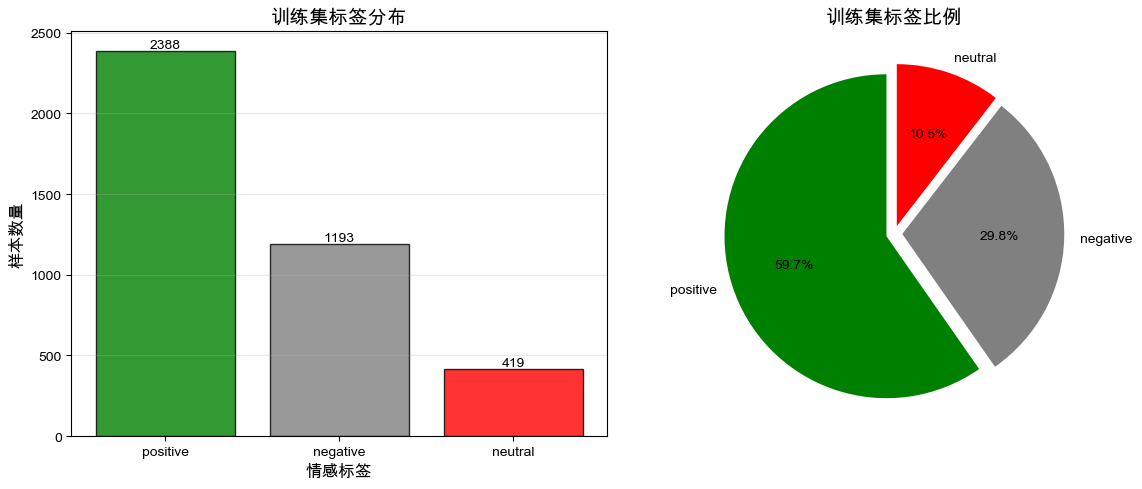


 4. 数据文件夹分析
--------------------------------------------------
数据文件夹总文件数: 9738
图像文件数: 4869
文本文件数: 4869

5. 创建GUID文件映射
--------------------------------------------------
从文件名提取的GUID数量:
  图像GUID: 4869
  文本GUID: 4869

 6. GUID文件存在情况分析
--------------------------------------------------

训练集文件存在情况:
  总GUID数: 4000
  ✅两者都有: 4000 (100.0%)
  只有图像: 0 (0.0%)
  只有文本: 0 (0.0%)
  ❌ 两者都无: 0 (0.0%)

测试集文件存在情况:
  总GUID数: 511
  ✅两者都有: 511 (100.0%)
  只有图像: 0 (0.0%)
  只有文本: 0 (0.0%)
  ❌ 两者都无: 0 (0.0%)

7. 文本数据分析
--------------------------------------------------
训练集文本分析:
文本长度统计 (基于20个样本):
  最短:    40 字符
  最长:   132 字符
  平均:  97.2 字符
  中位数:  99.0 字符
  标准差:  23.1 字符
  95%分位数: 131.1 字符

测试集文本分析:
文本长度统计 (基于20个样本):
  最短:    37 字符
  最长:   139 字符
  平均:  94.0 字符
  中位数:  90.5 字符
  标准差:  23.4 字符
  95%分位数: 122.9 字符


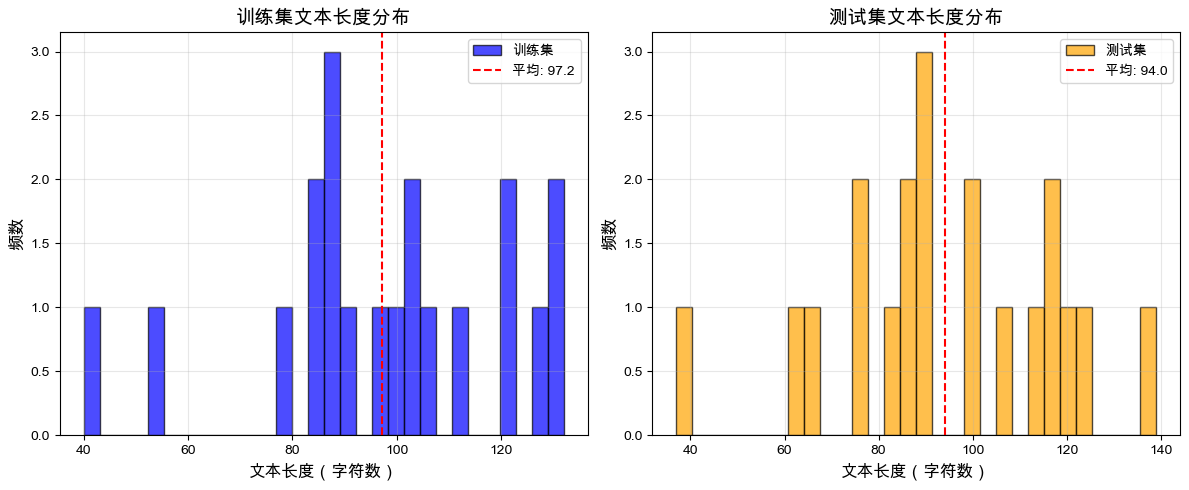


  8. 图像数据分析
--------------------------------------------------
训练集图像分析:
图像尺寸统计 (基于10个样本):
  宽度范围: 353 - 600
  高度范围: 360 - 900
  平均尺寸: 575 × 526
  平均宽高比: 1.20
  图像格式: {'JPEG': 10}

测试集图像分析:
图像尺寸统计 (基于10个样本):
  宽度范围: 386 - 600
  高度范围: 366 - 848
  平均尺寸: 562 × 624
  平均宽高比: 1.02
  图像格式: {'JPEG': 10}

  9. 示例样本展示
--------------------------------------------------

训练集示例 (GUID: 3015):
  图像文件: 3015.jpg ((600, 450), RGB)
  文本文件: 3015.txt (87 字符)
  文本内容: tcc grouchy homeofunclesam scholarlychick rwnutjob1 sa hartdegen aplmom llmajer ...


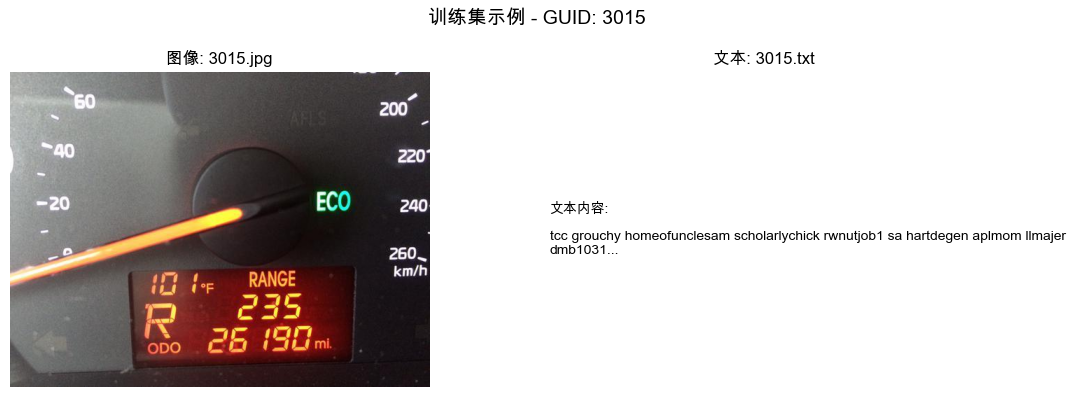


测试集示例 (GUID: 2858):
  图像文件: 2858.jpg ((600, 848), RGB)
  文本文件: 2858.txt (116 字符)
  文本内容: RT @micknugent: Please retweet to support Irish teachers excluded from state-fun...


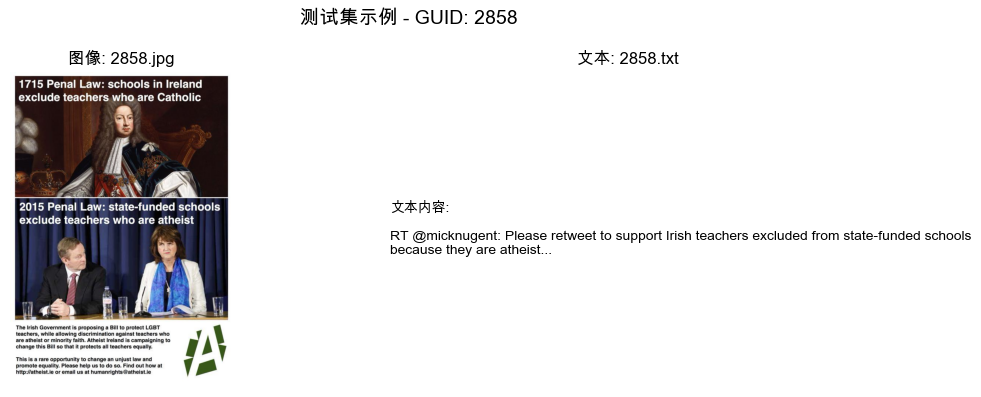


 10. 数据统计总结

总体统计:
----------------------------------------
  训练集样本数         :  4,000
  测试集样本数         :    511
  数据文件总数         :  9,738
  图像文件数          :  4,869
  文本文件数          :  4,869
  训练集完整样本        :  4,000
  测试集完整样本        :    511

 完整样本比例:
----------------------------------------
  训练集: 100.0%
  测试集: 100.0%
可用训练样本: 4000/4000
可用测试样本: 511/511

分析完成


In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
from collections import Counter
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False 
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")

print("="*80)
print("数据集分析 - 训练集和测试集GUID")
print("="*80)

print("\n1. 加载训练集和测试集")
print("-"*50)

train_df = pd.read_csv(TRAIN_FILE, sep=',')
test_df = pd.read_csv(TEST_FILE, sep=',')

print(f"训练集大小: {len(train_df)} 样本")
print(f"测试集大小: {len(test_df)} 样本")
print("\n训练集前5个样本:")
print(train_df.head().to_string())
print("\n测试集前5个样本:")
print(test_df.head().to_string())
print("\n 2. GUID统计")
print("-"*50)

train_guids = set(str(guid) for guid in train_df['guid'])
test_guids = set(str(guid) for guid in test_df['guid'])

print(f"训练集唯一GUID数量: {len(train_guids)}")
print(f"测试集唯一GUID数量: {len(test_guids)}")

common_guids = train_guids.intersection(test_guids)
print(f"训练集和测试集共同的GUID数量: {len(common_guids)}")

if common_guids:
    print(f"共同GUID示例: {list(common_guids)[:5]}")

print("\n 3. 训练集标签分布分析")
print("-"*50)

label_counts = train_df['tag'].value_counts()
print("情感标签分布:")
for label, count in label_counts.items():
    percentage = count / len(train_df) * 100
    print(f"  {label:10}: {count:4d} 样本 ({percentage:5.1f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(label_counts.index, label_counts.values, 
               color=['green', 'gray', 'red'], alpha=0.8, edgecolor='black')
plt.title('训练集标签分布', fontsize=14, fontweight='bold')
plt.xlabel('情感标签', fontsize=12)
plt.ylabel('样本数量', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['green', 'gray', 'red'], explode=[0.05, 0.05, 0.05])
plt.title('训练集标签比例', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n 4. 数据文件夹分析")
print("-"*50)

if not os.path.exists(DATA_PATH):
    print(f"❌ 数据文件夹不存在: {DATA_PATH}")
    exit()

all_files = os.listdir(DATA_PATH)
print(f"数据文件夹总文件数: {len(all_files)}")

image_files = []
text_files = []
other_files = []

for file in all_files:
    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        image_files.append(file)
    elif file.lower().endswith(('.txt', '.text')):
        text_files.append(file)
    else:
        other_files.append(file)

print(f"图像文件数: {len(image_files)}")
print(f"文本文件数: {len(text_files)}")
if other_files:
    print(f"其他文件数: {len(other_files)}")

print("\n5. 创建GUID文件映射")
print("-"*50)

def create_guid_file_mapping(files):
    """创建GUID到文件名的映射"""
    mapping = {}
    for file in files:
        guid = os.path.splitext(file)[0]
        mapping[guid] = file
    return mapping

image_mapping = create_guid_file_mapping(image_files)
text_mapping = create_guid_file_mapping(text_files)

print(f"从文件名提取的GUID数量:")
print(f"  图像GUID: {len(image_mapping)}")
print(f"  文本GUID: {len(text_mapping)}")

print("\n 6. GUID文件存在情况分析")
print("-"*50)

def check_guid_files(guid_set, set_name):
    """检查GUID集合的文件存在情况"""
    print(f"\n{set_name}文件存在情况:")
    
    missing_images = []
    missing_texts = []
    found_both = []
    found_none = []
    
    for guid in list(guid_set):
        has_image = guid in image_mapping
        has_text = guid in text_mapping
        
        if has_image and has_text:
            found_both.append(guid)
        elif has_image and not has_text:
            missing_texts.append(guid)
        elif not has_image and has_text:
            missing_images.append(guid)
        else:
            found_none.append(guid)
    
    total = len(guid_set)
    print(f"  总GUID数: {total}")
    print(f"  ✅两者都有: {len(found_both)} ({len(found_both)/total*100:.1f}%)")
    print(f"  只有图像: {len(missing_texts)} ({len(missing_texts)/total*100:.1f}%)")
    print(f"  只有文本: {len(missing_images)} ({len(missing_images)/total*100:.1f}%)")
    print(f"  ❌ 两者都无: {len(found_none)} ({len(found_none)/total*100:.1f}%)")
    
    return {
        'found_both': found_both,
        'missing_images': missing_images,
        'missing_texts': missing_texts,
        'found_none': found_none
    }

train_results = check_guid_files(train_guids, "训练集")
test_results = check_guid_files(test_guids, "测试集")
print("\n7. 文本数据分析")
print("-"*50)

def analyze_text_samples(guid_list, sample_size=20):
    """分析文本样本"""
    text_lengths = []
    
    for guid in guid_list[:sample_size]:
        if guid in text_mapping:
            txt_file = text_mapping[guid]
            txt_path = os.path.join(DATA_PATH, txt_file)
            try:
                with open(txt_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()
                    text_lengths.append(len(text))
            except:
                pass
    
    if text_lengths:
        print(f"文本长度统计 (基于{len(text_lengths)}个样本):")
        print(f"  最短: {min(text_lengths):5d} 字符")
        print(f"  最长: {max(text_lengths):5d} 字符")
        print(f"  平均: {np.mean(text_lengths):5.1f} 字符")
        print(f"  中位数: {np.median(text_lengths):5.1f} 字符")
        print(f"  标准差: {np.std(text_lengths):5.1f} 字符")
        print(f"  95%分位数: {np.percentile(text_lengths, 95):5.1f} 字符")
        
        return text_lengths
    return []

print("训练集文本分析:")
train_text_lengths = analyze_text_samples(train_results['found_both'][:50])

print("\n测试集文本分析:")
test_text_lengths = analyze_text_samples(test_results['found_both'][:50])

if train_text_lengths:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(train_text_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black', label='训练集')
    plt.title('训练集文本长度分布', fontsize=14, fontweight='bold')
    plt.xlabel('文本长度（字符数）', fontsize=12)
    plt.ylabel('频数', fontsize=12)
    plt.axvline(np.mean(train_text_lengths), color='red', linestyle='--', 
                label=f'平均: {np.mean(train_text_lengths):.1f}')
    plt.legend()
    plt.grid(alpha=0.3)
    
    if test_text_lengths:
        plt.subplot(1, 2, 2)
        plt.hist(test_text_lengths, bins=30, alpha=0.7, color='orange', edgecolor='black', label='测试集')
        plt.title('测试集文本长度分布', fontsize=14, fontweight='bold')
        plt.xlabel('文本长度（字符数）', fontsize=12)
        plt.ylabel('频数', fontsize=12)
        plt.axvline(np.mean(test_text_lengths), color='red', linestyle='--', 
                    label=f'平均: {np.mean(test_text_lengths):.1f}')
        plt.legend()
        plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n  8. 图像数据分析")
print("-"*50)

def analyze_image_samples(guid_list, sample_size=10):
    """分析图像样本"""
    image_sizes = []
    image_formats = []
    
    for guid in guid_list[:sample_size]:
        if guid in image_mapping:
            img_file = image_mapping[guid]
            img_path = os.path.join(DATA_PATH, img_file)
            try:
                with Image.open(img_path) as img:
                    image_sizes.append(img.size)
                    image_formats.append(img.format)
            except:
                pass
    
    if image_sizes:
        widths = [size[0] for size in image_sizes]
        heights = [size[1] for size in image_sizes]
        
        print(f"图像尺寸统计 (基于{len(image_sizes)}个样本):")
        print(f"  宽度范围: {min(widths)} - {max(widths)}")
        print(f"  高度范围: {min(heights)} - {max(heights)}")
        print(f"  平均尺寸: {np.mean(widths):.0f} × {np.mean(heights):.0f}")
        print(f"  平均宽高比: {np.mean([w/h for w, h in zip(widths, heights)]):.2f}")
        
        format_counts = Counter(image_formats)
        print(f"  图像格式: {dict(format_counts)}")
        
        return widths, heights
    return [], []

print("训练集图像分析:")
train_widths, train_heights = analyze_image_samples(train_results['found_both'][:20])

print("\n测试集图像分析:")
test_widths, test_heights = analyze_image_samples(test_results['found_both'][:20])

print("\n  9. 示例样本展示")
print("-"*50)

def show_sample_example(guid, set_name):
    """显示示例样本"""
    if guid in image_mapping and guid in text_mapping:
        img_file = image_mapping[guid]
        txt_file = text_mapping[guid]
        
        img_path = os.path.join(DATA_PATH, img_file)
        txt_path = os.path.join(DATA_PATH, txt_file)
        
        try:
            with open(txt_path, 'r', encoding='utf-8', errors='ignore') as f:
                text_content = f.read().strip()
            
            img = Image.open(img_path)
            
            print(f"\n{set_name}示例 (GUID: {guid}):")
            print(f"  图像文件: {img_file} ({img.size}, {img.mode})")
            print(f"  文本文件: {txt_file} ({len(text_content)} 字符)")
            print(f"  文本内容: {text_content[:80]}...")
            
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.title(f"图像: {img_file}", fontsize=12)
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.text(0.1, 0.5, f"文本内容:\n\n{text_content[:150]}...", 
                    fontsize=10, verticalalignment='center', wrap=True)
            plt.title(f"文本: {txt_file}", fontsize=12)
            plt.axis('off')
            
            plt.suptitle(f"{set_name}示例 - GUID: {guid}", fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            return True
        except Exception as e:
            print(f"读取示例失败: {e}")
            return False
    return False

if train_results['found_both']:
    show_sample_example(train_results['found_both'][0], "训练集")

if test_results['found_both']:
    show_sample_example(test_results['found_both'][0], "测试集")

print("\n" + "="*80)
print(" 10. 数据统计总结")
print("="*80)

summary_data = [
    ("训练集样本数", len(train_df)),
    ("测试集样本数", len(test_df)),
    ("数据文件总数", len(all_files)),
    ("图像文件数", len(image_files)),
    ("文本文件数", len(text_files)),
    ("训练集完整样本", len(train_results['found_both'])),
    ("测试集完整样本", len(test_results['found_both'])),
]

print("\n总体统计:")
print("-"*40)
for item, value in summary_data:
    print(f"  {item:15}: {value:>6,}")

print("\n 完整样本比例:")
print("-"*40)
train_complete_rate = len(train_results['found_both']) / len(train_guids) * 100
test_complete_rate = len(test_results['found_both']) / len(test_guids) * 100
print(f"  训练集: {train_complete_rate:.1f}%")
print(f"  测试集: {test_complete_rate:.1f}%")

print(f"可用训练样本: {len(train_results['found_both'])}/{len(train_df)}")
print(f"可用测试样本: {len(test_results['found_both'])}/{len(test_df)}")

print("\n" + "="*80)
print("分析完成")
print("="*80)

 数据预处理
 检查本地模型路径: /Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli
本地DeBERTa模型存在
模型文件: ['model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'config.json', 'tokenizer.json', 'merges.txt', 'vocab.json']...
训练集: 4000 样本
测试集: 511 样本

标签分布:
  positive  : 2388 ( 59.7%)
  negative  : 1193 ( 29.8%)
  neutral   :  419 ( 10.5%)
停用词加载成功
分析 100 个文本样本:
  平均单词数: 9.7
  中位数: 9.0
  最小长度: 1
  最大长度: 20
  95%分位数: 16.0
  推荐最大长度: 64
尝试加载本地DeBERTa tokenizer: /Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli
本地DeBERTa tokenizer加载成功
使用tokenizer: DebertaTokenizer

数据划分
训练集: 3200 样本
验证集: 800 样本
 创建train数据集，共3200个样本
 验证文本文件...
 创建val数据集，共800个样本
 验证文本文件...
 创建test数据集，共511个样本
 验证文本文件...
数据集创建完成:
  训练集: 3200 样本
  验证集: 800 样本
  测试集: 511 样本
批次大小: 8
训练批次: 400
验证批次: 100
测试批次: 64
批次结构:
  输入ID形状: torch.Size([8, 64])
  注意力掩码形状: torch.Size([8, 64])
  图像形状: torch.Size([8, 3, 224, 224])
  标签形状: torch.Size([8])
  标签分布: [6, 0, 2]
  示例GUID: ['1588', '1305']
  示例文本: rt chs warriors lesson finishing

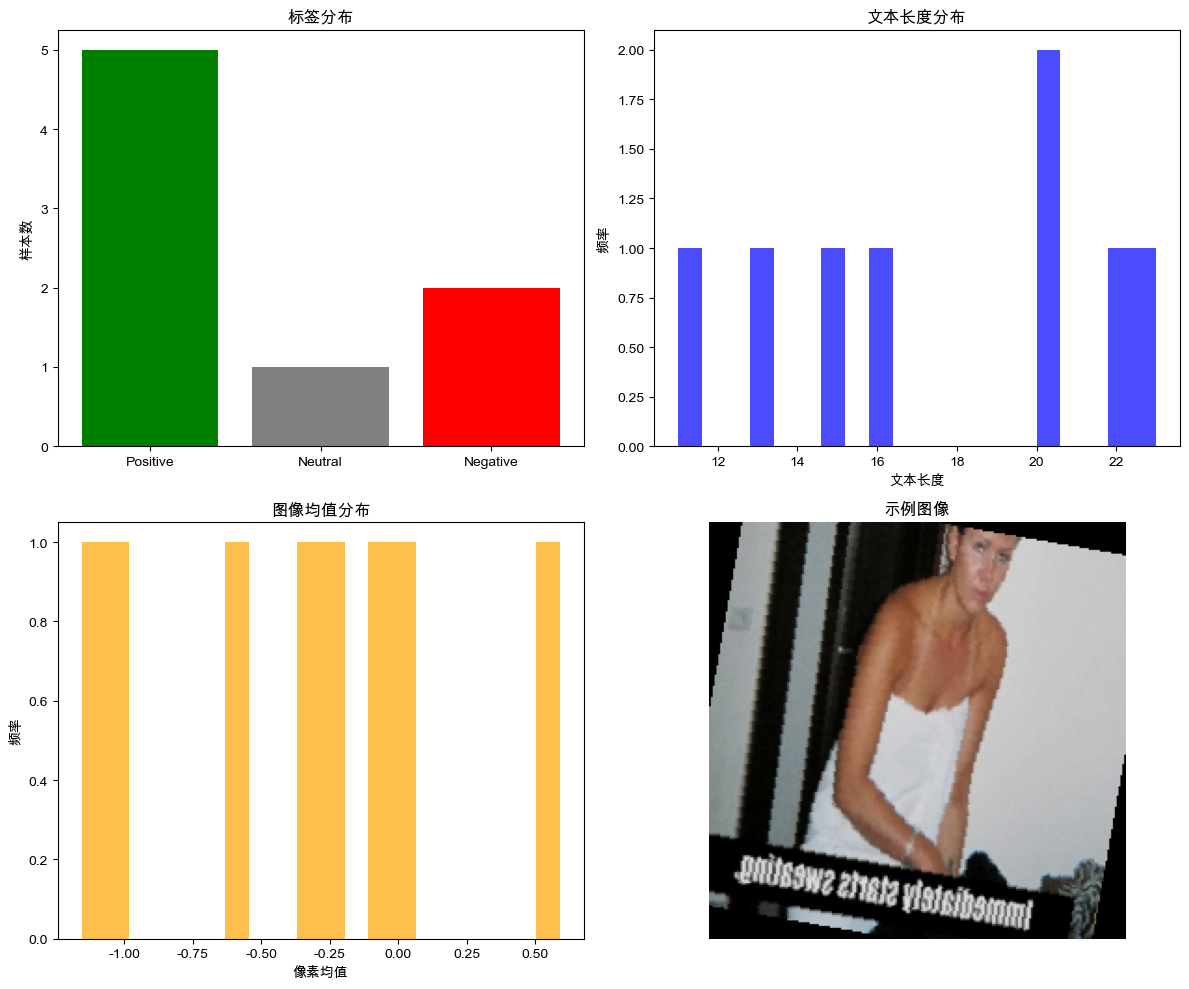

 数据可视化已保存至 data_visualization.png


In [18]:
import os
import re
import pandas as pd
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import AutoTokenizer, AutoModel
from PIL import Image, ImageEnhance, ImageFilter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
LOCAL_MODEL_PATH = "/Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli"

print("="*80)
print(" 数据预处理")
print("="*80)

print(f" 检查本地模型路径: {LOCAL_MODEL_PATH}")
if os.path.exists(LOCAL_MODEL_PATH):
    print("本地DeBERTa模型存在")
    
    model_files = os.listdir(LOCAL_MODEL_PATH)
    print(f"模型文件: {model_files[:10]}...")
else:
    print("❌ 本地模型路径不存在")
    LOCAL_MODEL_PATH = None

class TextPreprocessor:
    """文本预处理类"""
    
    def __init__(self, use_stopwords=True):
        self.use_stopwords = use_stopwords
        
        if use_stopwords:
            try:
                try:
                    nltk.data.find('corpora/stopwords')
                except LookupError:
                    nltk.download('stopwords', quiet=True)
                
                self.stop_words = set(stopwords.words('english'))
                print("停用词加载成功")
            except:
                print(" 停用词加载失败")
                self.stop_words = set()
        else:
            self.stop_words = set()
        
        self.url_pattern = re.compile(r'https?://\S+|www\.\S+')
        self.mention_pattern = re.compile(r'@\w+')
        self.hashtag_pattern = re.compile(r'#(\w+)')
        self.emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            "]+", flags=re.UNICODE)
        
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
            nltk.download('punkt', quiet=True)
    
    def clean_text(self, text):
        """清洗文本"""
        if not isinstance(text, str) or not text.strip():
            return ""
        
        text = text.lower()
        text = self.url_pattern.sub('', text)
        text = self.mention_pattern.sub('', text)
        text = self.hashtag_pattern.sub(r'\1', text)
        text = self.emoji_pattern.sub('', text)
        
        contractions = {
            "won't": "will not", "can't": "cannot", "i'm": "i am",
            "you're": "you are", "he's": "he is", "she's": "she is",
            "it's": "it is", "we're": "we are", "they're": "they are",
            "i've": "i have", "you've": "you have", "we've": "we have",
            "they've": "they have", "isn't": "is not", "aren't": "are not",
            "wasn't": "was not", "weren't": "were not", "haven't": "have not",
            "hasn't": "has not", "hadn't": "had not", "don't": "do not",
            "doesn't": "does not", "didn't": "did not"
        }
        
        for contraction, expansion in contractions.items():
            text = text.replace(contraction, expansion)
        
        text = re.sub(r'[^\w\s.,!?\'"-]', ' ', text)
        
        try:
            tokens = word_tokenize(text)
            if self.stop_words:
                tokens = [word for word in tokens if word not in self.stop_words]
            text = ' '.join(tokens)
        except:
            tokens = text.split()
            if self.stop_words:
                tokens = [word for word in tokens if word not in self.stop_words]
            text = ' '.join(tokens)
        
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text

class ImageProcessor:
    """图像处理类"""
    
    def __init__(self, image_size=224):
        self.image_size = image_size
        
        self.train_transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
        
        self.val_transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                               std=[0.229, 0.224, 0.225])
        ])
    
    def process_image(self, image_path, mode='train'):
        """处理图像"""
        try:
            image = Image.open(image_path).convert('RGB')
            if mode == 'train':
                return self.train_transform(image)
            else:
                return self.val_transform(image)
        except Exception as e:
            print(f" 图像加载失败: {image_path}, 错误: {str(e)[:50]}...")
            return torch.zeros((3, self.image_size, self.image_size))

class MultimodalDataset(Dataset):
    """多模态数据集"""
    
    def __init__(self, dataframe, data_dir, text_preprocessor, 
                 image_processor, tokenizer, max_length=128, mode='train'):
        self.dataframe = dataframe
        self.data_dir = data_dir
        self.text_preprocessor = text_preprocessor
        self.image_processor = image_processor
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.mode = mode
        
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.reverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        print(f" 创建{mode}数据集，共{len(dataframe)}个样本")
        
        print(" 验证文本文件...")
        missing_count = 0
        for i in range(min(10, len(dataframe))):
            guid = str(dataframe.iloc[i]['guid'])
            text_path = os.path.join(data_dir, f"{guid}.txt")
            if not os.path.exists(text_path):
                missing_count += 1
        if missing_count > 0:
            print(f" 前10个样本中有{missing_count}个文本文件缺失")
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        guid = str(self.dataframe.iloc[idx]['guid'])
        
        text_path = os.path.join(self.data_dir, f"{guid}.txt")
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                if not text:
                    text = "[EMPTY]"
        except Exception as e:
            text = "[ERROR]"
            print(f" 文本读取失败: {guid}, 错误: {str(e)[:50]}...")
        
        cleaned_text = self.text_preprocessor.clean_text(text)
        
        try:
            encoded = self.tokenizer(
                cleaned_text,
                add_special_tokens=True,
                max_length=self.max_length,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt'
            )
        except Exception as e:
            print(f"  tokenizer调用失败: {e}")
            encoded = {
                'input_ids': torch.zeros((1, self.max_length), dtype=torch.long),
                'attention_mask': torch.zeros((1, self.max_length), dtype=torch.long)
            }
        
        image_path = os.path.join(self.data_dir, f"{guid}.jpg")
        image = self.image_processor.process_image(image_path, mode=self.mode)
        
        if self.mode == 'train':
            label_str = self.dataframe.iloc[idx]['tag']
            label = self.label_map.get(label_str, 1)  
            
            return {
                'input_ids': encoded['input_ids'].squeeze(0),
                'attention_mask': encoded['attention_mask'].squeeze(0),
                'image': image,
                'label': torch.tensor(label, dtype=torch.long),
                'guid': guid,
                'text': cleaned_text[:100] 
            }
        else:
            return {
                'input_ids': encoded['input_ids'].squeeze(0),
                'attention_mask': encoded['attention_mask'].squeeze(0),
                'image': image,
                'guid': guid,
                'text': cleaned_text[:100]
            }

def load_tokenizer_safe(local_path=None):
    """安全加载tokenizer"""
    tokenizers_to_try = []
    
    if local_path and os.path.exists(local_path):
        tokenizers_to_try.append(("本地DeBERTa", local_path))
    
    tokenizers_to_try.extend([
        ("小型DeBERTa", "microsoft/deberta-v3-small"),
        ("DistilBERT", "distilbert-base-uncased"),
        ("BERT", "bert-base-uncased"),
        ("RoBERTa", "roberta-base")
    ])
    
    for name, path in tokenizers_to_try:
        try:
            print(f"尝试加载{name} tokenizer: {path}")
            if "local" in name.lower():
                tokenizer = AutoTokenizer.from_pretrained(path, local_files_only=True)
            else:
                tokenizer = AutoTokenizer.from_pretrained(path, cache_dir="./cache")
            
            test_text = "Hello world!"
            _ = tokenizer(test_text, return_tensors='pt')
            
            print(f"{name} tokenizer加载成功")
            return tokenizer
        except Exception as e:
            print(f"❌ {name} tokenizer加载失败: {str(e)[:100]}...")
            continue
    
    print(" 所有tokenizer加载失败，创建简单tokenizer")
    from transformers import BertTokenizer
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", cache_dir="./cache")
    return tokenizer

def create_simple_tokenizer():
    """创建简单的tokenizer作为最后的手段"""
    print("创建简单的字符级tokenizer...")
    
    class SimpleTokenizer:
        def __init__(self, vocab_size=10000, max_length=128):
            self.vocab_size = vocab_size
            self.max_length = max_length
            self.char_to_id = {chr(i+32): i for i in range(95)}  
            self.char_to_id['[PAD]'] = 0
            self.char_to_id['[UNK]'] = 1
            self.char_to_id['[CLS]'] = 2
            self.char_to_id['[SEP]'] = 3
            
            self.id_to_char = {v: k for k, v in self.char_to_id.items()}
            
        def __call__(self, text, **kwargs):
            text = str(text).lower()
            char_ids = []
            
            for char in text[:self.max_length-2]: 
                char_ids.append(self.char_to_id.get(char, self.char_to_id['[UNK]']))
            
            input_ids = [self.char_to_id['[CLS]']] + char_ids + [self.char_to_id['[SEP]']]
            
            if len(input_ids) < self.max_length:
                padding_length = self.max_length - len(input_ids)
                input_ids = input_ids + [self.char_to_id['[PAD]']] * padding_length
            else:
                input_ids = input_ids[:self.max_length]
            
            attention_mask = [1 if id != self.char_to_id['[PAD]'] else 0 for id in input_ids]
            
            return {
                'input_ids': torch.tensor([input_ids], dtype=torch.long),
                'attention_mask': torch.tensor([attention_mask], dtype=torch.long)
            }
    
    return SimpleTokenizer(max_length=128)

def main():
    """主函数"""
    try:
        train_df = pd.read_csv(TRAIN_FILE, sep=',')
        test_df = pd.read_csv(TEST_FILE, sep=',')
        
        print(f"训练集: {len(train_df)} 样本")
        print(f"测试集: {len(test_df)} 样本")
        
        train_df['guid'] = train_df['guid'].astype(str)
        test_df['guid'] = test_df['guid'].astype(str)
        
    except Exception as e:
        print(f"❌ 数据加载失败: {e}")
        return None
    
    if 'tag' in train_df.columns:
        label_counts = train_df['tag'].value_counts()
        print("\n标签分布:")
        for label, count in label_counts.items():
            percentage = count / len(train_df) * 100
            print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    else:
        print(" 训练数据中没有标签列")
    
    text_preprocessor = TextPreprocessor(use_stopwords=True)
    
    text_lengths = []
    sample_count = min(100, len(train_df))
    
    for i in range(sample_count):
        guid = str(train_df.iloc[i]['guid'])
        text_path = os.path.join(DATA_PATH, f"{guid}.txt")
        if os.path.exists(text_path):
            try:
                with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()
                    cleaned = text_preprocessor.clean_text(text)
                    text_lengths.append(len(cleaned.split()))
            except Exception as e:
                print(f" 文本处理失败 {guid}: {str(e)[:50]}...")
                continue
    
    if text_lengths:
        print(f"分析 {len(text_lengths)} 个文本样本:")
        print(f"  平均单词数: {np.mean(text_lengths):.1f}")
        print(f"  中位数: {np.median(text_lengths):.1f}")
        print(f"  最小长度: {np.min(text_lengths)}")
        print(f"  最大长度: {np.max(text_lengths)}")
        print(f"  95%分位数: {np.percentile(text_lengths, 95):.1f}")
        
        if np.max(text_lengths) > 512:
            max_length = 512
        elif np.percentile(text_lengths, 95) > 256:
            max_length = 256
        elif np.percentile(text_lengths, 95) > 128:
            max_length = 128
        else:
            max_length = 64
        
        print(f"  推荐最大长度: {max_length}")
    else:
        max_length = 128
        print(f" 无法分析文本长度，使用默认最大长度: {max_length}")
    
    try:
        tokenizer = load_tokenizer_safe(LOCAL_MODEL_PATH)
        print(f"使用tokenizer: {type(tokenizer).__name__}")
    except Exception as e:
        print(f"❌ 所有tokenizer加载失败: {e}")
        print(" 创建简单tokenizer作为备用")
        tokenizer = create_simple_tokenizer()
    
    image_processor = ImageProcessor(image_size=224)
    
    print("\n" + "="*80)
    print("数据划分")
    print("="*80)
    
    if 'tag' in train_df.columns:
        try:
            train_df_split, val_df_split = train_test_split(
                train_df,
                test_size=0.2,
                stratify=train_df['tag'],
                random_state=42
            )
            print(f"训练集: {len(train_df_split)} 样本")
            print(f"验证集: {len(val_df_split)} 样本")
        except:
            train_df_split, val_df_split = train_test_split(
                train_df,
                test_size=0.2,
                random_state=42
            )
            print(f"训练集: {len(train_df_split)} 样本")
            print(f"验证集: {len(val_df_split)} 样本")
    else:
        train_df_split, val_df_split = train_test_split(
            train_df,
            test_size=0.2,
            random_state=42
        )
        print(f"训练集: {len(train_df_split)} 样本")
        print(f"验证集: {len(val_df_split)} 样本")
    
    
    try:
        train_dataset = MultimodalDataset(
            dataframe=train_df_split,
            data_dir=DATA_PATH,
            text_preprocessor=text_preprocessor,
            image_processor=image_processor,
            tokenizer=tokenizer,
            max_length=max_length,
            mode='train'
        )
        
        val_dataset = MultimodalDataset(
            dataframe=val_df_split,
            data_dir=DATA_PATH,
            text_preprocessor=text_preprocessor,
            image_processor=image_processor,
            tokenizer=tokenizer,
            max_length=max_length,
            mode='val'
        )
        
        test_dataset = MultimodalDataset(
            dataframe=test_df,
            data_dir=DATA_PATH,
            text_preprocessor=text_preprocessor,
            image_processor=image_processor,
            tokenizer=tokenizer,
            max_length=max_length,
            mode='test'
        )
        
        print(f"数据集创建完成:")
        print(f"  训练集: {len(train_dataset)} 样本")
        print(f"  验证集: {len(val_dataset)} 样本")
        print(f"  测试集: {len(test_dataset)} 样本")
        
    except Exception as e:
        print(f"❌ 数据集创建失败: {e}")
        return None
    if torch.cuda.is_available():
        batch_size = 16
    else:
        batch_size = 8  
    
    print(f"批次大小: {batch_size}")
    
    try:
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=False
        )
        
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=0
        )
        
        test_loader = DataLoader(
            test_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=0
        )
        
        print(f"训练批次: {len(train_loader)}")
        print(f"验证批次: {len(val_loader)}")
        print(f"测试批次: {len(test_loader)}")
        
    except Exception as e:
        print(f"❌ 数据加载器创建失败: {e}")
        return None
    
    try:
        for batch in train_loader:
            print(f"批次结构:")
            print(f"  输入ID形状: {batch['input_ids'].shape}")
            print(f"  注意力掩码形状: {batch['attention_mask'].shape}")
            print(f"  图像形状: {batch['image'].shape}")
            
            if 'label' in batch:
                print(f"  标签形状: {batch['label'].shape}")
                print(f"  标签分布: {torch.bincount(batch['label']).tolist()}")
            
            print(f"  示例GUID: {batch['guid'][:2]}")
            print(f"  示例文本: {batch['text'][0][:50]}...")
            
            print(f"\n数据类型检查:")
            print(f"  输入ID类型: {batch['input_ids'].dtype}")
            print(f"  图像类型: {batch['image'].dtype}")
            print(f"  图像范围: [{batch['image'].min():.3f}, {batch['image'].max():.3f}]")
            
            break
        
        print("\n数据加载测试通过")
        
    except Exception as e:
        print(f"❌ 数据加载测试失败: {e}")
        print("尝试诊断问题...")
        
        try:
            sample = train_dataset[0]
            print(f"单个样本:")
            print(f"  GUID: {sample['guid']}")
            print(f"  输入ID: {sample['input_ids'].shape}")
            print(f"  文本: {sample['text']}")
        except Exception as e2:
            print(f"❌ 单个样本加载失败: {e2}")
    
    print("\n" + "="*80)
    print("预处理完成")
    print("="*80)
    
    return train_loader, val_loader, test_loader, max_length, tokenizer, text_preprocessor, image_processor

def visualize_data(train_loader):
    """可视化数据"""
    if train_loader is None:
        print(" 无法可视化，数据加载器为空")
        return
    
    try:
        batch = next(iter(train_loader))
        
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        if 'label' in batch:
            labels = batch['label'].numpy()
            unique, counts = np.unique(labels, return_counts=True)
            axes[0, 0].bar(['Positive', 'Neutral', 'Negative'], counts, color=['green', 'gray', 'red'])
            axes[0, 0].set_title('标签分布')
            axes[0, 0].set_ylabel('样本数')
        
        attention_masks = batch['attention_mask'].numpy()
        text_lengths = np.sum(attention_masks, axis=1)
        axes[0, 1].hist(text_lengths, bins=20, alpha=0.7, color='blue')
        axes[0, 1].set_title('文本长度分布')
        axes[0, 1].set_xlabel('文本长度')
        axes[0, 1].set_ylabel('频率')
        
        images = batch['image'].numpy()
        image_means = np.mean(images, axis=(1, 2, 3))
        axes[1, 0].hist(image_means, bins=20, alpha=0.7, color='orange')
        axes[1, 0].set_title('图像均值分布')
        axes[1, 0].set_xlabel('像素均值')
        axes[1, 0].set_ylabel('频率')
        
        sample_image = images[0].transpose(1, 2, 0)
        
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        sample_image = std * sample_image + mean
        sample_image = np.clip(sample_image, 0, 1)
        
        axes[1, 1].imshow(sample_image)
        axes[1, 1].set_title('示例图像')
        axes[1, 1].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(BASE_PATH, 'data_visualization.png'), dpi=150, bbox_inches='tight')
        plt.show()
        print(" 数据可视化已保存至 data_visualization.png")
        
    except Exception as e:
        print(f"❌ 数据可视化失败: {e}")

if __name__ == "__main__":
  
    result = main()
    
    if result is not None:
        train_loader, val_loader, test_loader, max_length, tokenizer, text_preprocessor, image_processor = result
        
        print(f"\n 配置总结:")
        print(f"  最大序列长度: {max_length}")
        print(f"  图像尺寸: 224×224")
        print(f"  批次大小: {train_loader.batch_size if train_loader else 'N/A'}")
        print(f"  Tokenizer类型: {type(tokenizer).__name__}")
        print(f"  文本预处理器: {type(text_preprocessor).__name__}")
        print(f"  图像处理器: {type(image_processor).__name__}")
        
        visualize_data(train_loader)
    else:
        print("\n❌ 数据预处理失败，请检查错误信息")


 1. 环境与数据基础检查
--------------------------------------------------
 检查本地模型路径: /Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli
 本地DeBERTa模型存在
   模型文件: 7 个文件

 数据集综合分析

 加载数据文件...
训练集: 4000 样本
 测试集: 511 样本

标签分布分析:
--------------------------------------------------
情感标签详细分布:
  positive  : 2388 样本 ( 59.7%)
  negative  : 1193 样本 ( 29.8%)
  neutral   :  419 样本 ( 10.5%)

  类别不平衡度: 5.70:1
   最大类别/最小类别: 2388/419

 类别权重建议（用于损失函数）:
  positive  : 0.56
  negative  : 1.12
  neutral   : 3.18

 标准化类别权重（最大值为1）:
  positive  : 0.18
  negative  : 0.35
  neutral   : 1.00


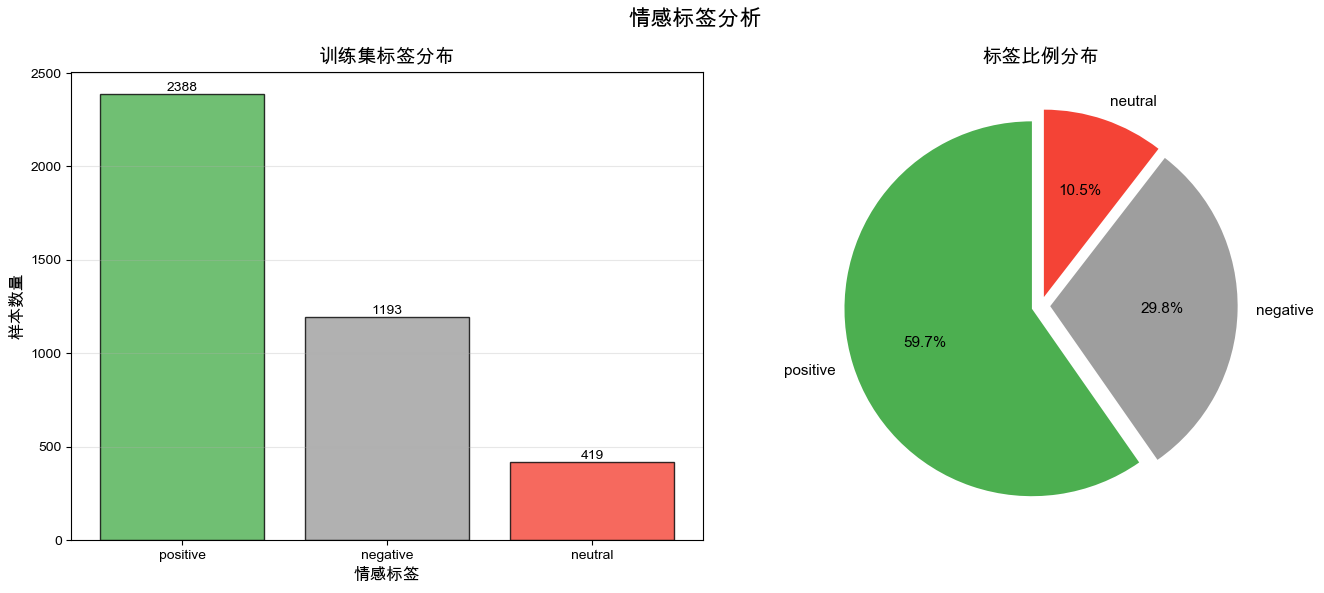


 文本数据分析:
--------------------------------------------------
已加载 200 个文本样本进行分析
 停用词加载成功

 文本清洗效果分析:
--------------------------------------------------
分析 50 个样本:

示例 1:
  原始文本 (131 字符): rt amitswami77 the conspirators have an evil eye are now set to physically attac...
  清洗后 (106 字符): rt amitswami77 conspirators evil eye set physically attack asaram bapu ji wedema...
  长度减少: 25 字符
  单词减少: 7 个

示例 2:
  原始文本 (107 字符): waxwing trills chickadees calling here sweetie enthusiastic athletes blue sky sn...
  清洗后 (99 字符): waxwing trills chickadees calling sweetie enthusiastic athletes blue sky snow ua...
  长度减少: 8 字符
  单词减少: 2 个

示例 3:
  原始文本 (71 字符): @NYSE is looking a little despondent today...??? http://t.co/o5xiKyJgT7...
  清洗后 (37 字符): looking little despondent today...???...
  长度减少: 34 字符
  单词减少: 4 个

示例 4:
  原始文本 (86 字符): fervent s m l 140k free plastic clip keychain rubber and sticker 085725737197 28...
  清洗后 (78 字符): fervent l 140k free plastic clip keychain rubber sticker 085725737197 

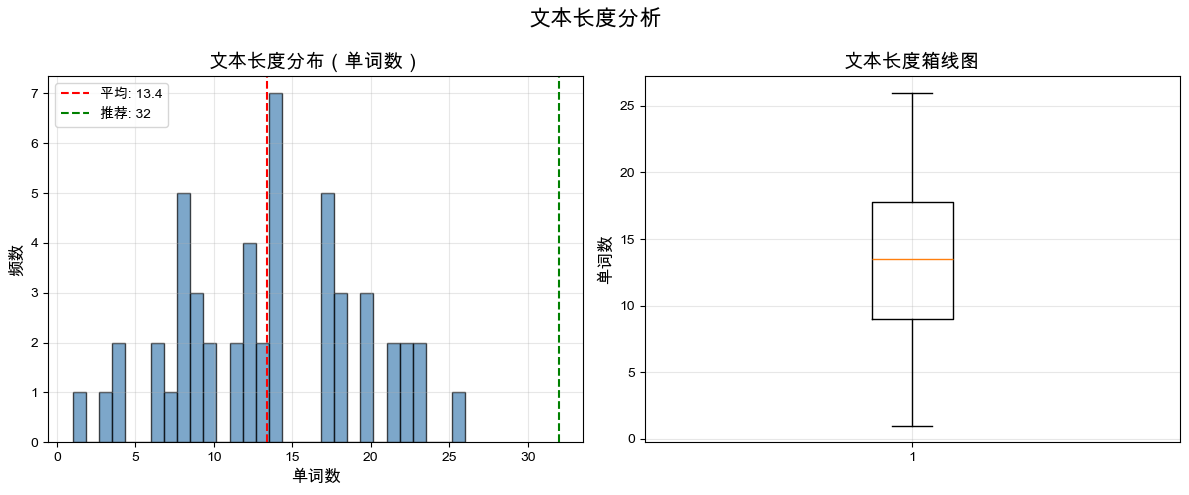


图像数据分析:
--------------------------------------------------
已找到 100 个图像样本

 图像特征分析:
--------------------------------------------------
分析 50 个图像样本...

示例 1: 4597.jpg
  尺寸: 598 × 303
  模式: RGB
  格式: JPEG

示例 2: 26.jpg
  尺寸: 600 × 450
  模式: RGB
  格式: JPEG

示例 3: 4383.jpg
  尺寸: 599 × 337
  模式: RGB
  格式: JPEG

 图像尺寸统计 (5 个样本):
  宽度范围:  598 -  600
  高度范围:  303 -  923
  平均尺寸: 599 × 563
  中位数尺寸: 600 × 450
  平均宽高比: 1.30
  宽高比标准差: 0.53

 图像色彩模式:
  RGB       :   5 个 (100.0%)

图像格式:
  JPEG      :   5 个 (100.0%)


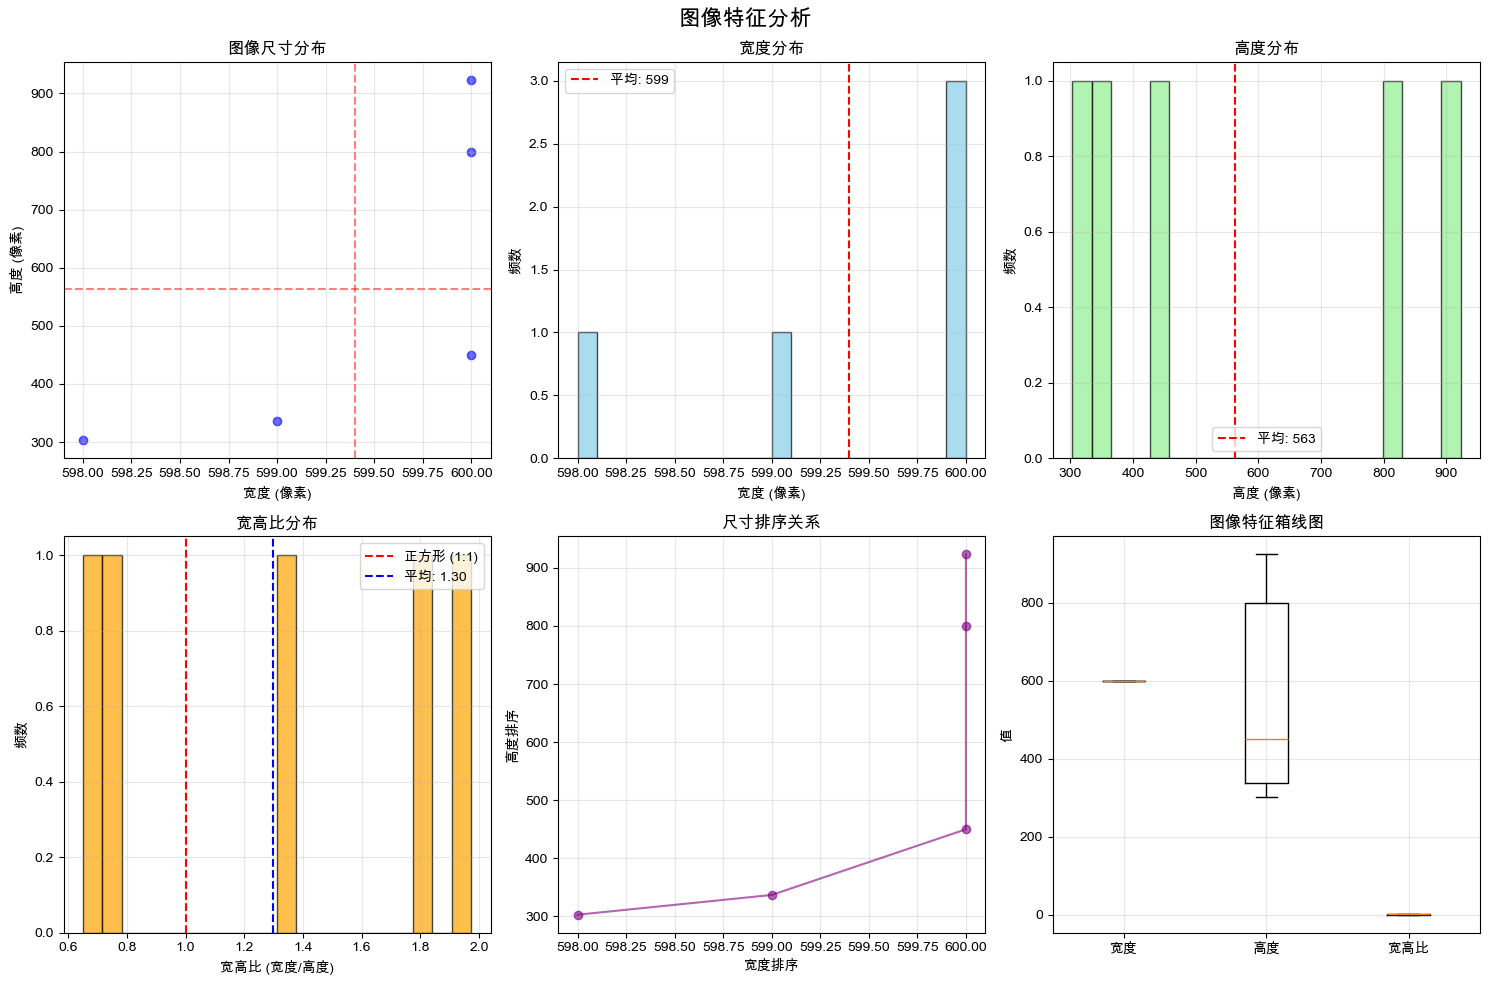


图像增强效果展示:
--------------------------------------------------
原始图像: 4597.jpg
原始尺寸: (598, 303)


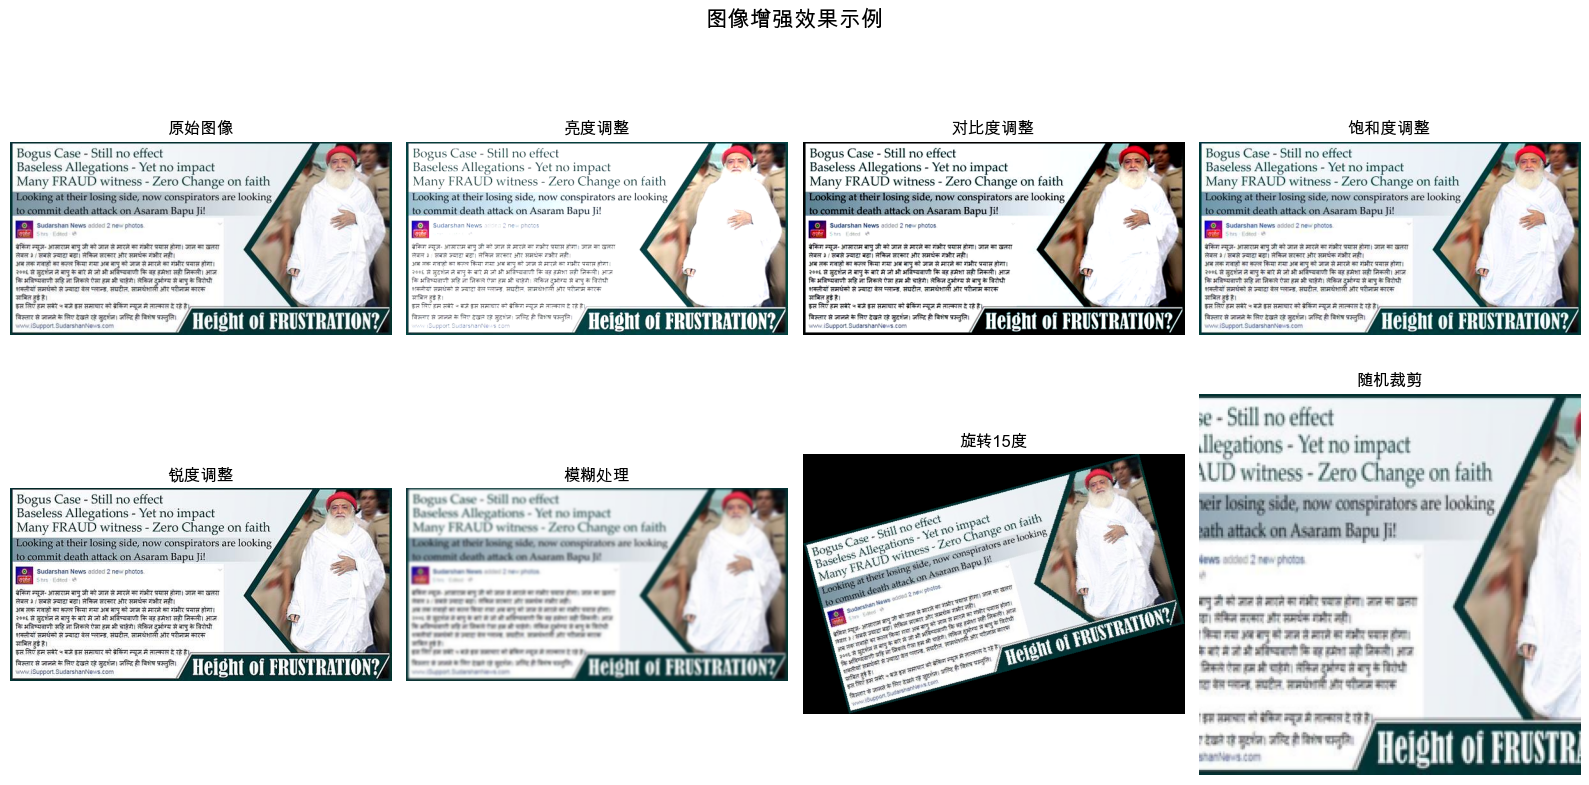


数据完整性检查:
--------------------------------------------------
数据文件夹总文件数: 9738
  图像文件: 4869
  文本文件: 4869
  文件配对率: 100.0%

 前100个训练样本文件检查:
  缺失图像: 0/100
  缺失文本: 0/100
  完整样本: 100/100
  完整率: 100.0%

数据划分与预处理建议:
--------------------------------------------------
基于数据分析的预处理建议:

 文本处理:
  最大序列长度              : 32 (基于95%分位数)
  清洗策略                : 保留#标签内容，移除URL和@提及，扩展缩写
  停用词处理               : 建议移除常见停用词
  特殊处理                : 处理emoji和社交媒体俚语
  分词器                 : 使用DeBERTa分词器

 图像处理:
  目标尺寸                : 224×224 (ResNet标准)
  增强策略                : 随机裁剪、水平翻转、颜色抖动
  标准化                 : 使用ImageNet均值[0.485, 0.456, 0.406]和标准差[0.229, 0.224, 0.225]
  数据增强概率              : 0.5

 数据划分:
  训练集                 : 3200 样本 (80%)
  验证集                 : 800 样本 (20%)
  测试集                 : 511 样本
  分层抽样                : 强烈建议，以保持标签分布
  随机种子                : 42 

 批次设置:
  批次大小                : 32
  Shuffle             : 训练集打乱，验证/测试集不打乱
  工作进程                : 4 

 类别不平衡处理:
  不平衡度                : 5.70:1
 

In [21]:
import os
import re
import pandas as pd
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import AutoTokenizer, AutoModel
from PIL import Image, ImageEnhance, ImageFilter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
LOCAL_MODEL_PATH = "/Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli"

print("\n 1. 环境与数据基础检查")
print("-"*50)

print(f" 检查本地模型路径: {LOCAL_MODEL_PATH}")
if os.path.exists(LOCAL_MODEL_PATH):
    print(" 本地DeBERTa模型存在")
    model_files = os.listdir(LOCAL_MODEL_PATH)
    print(f"   模型文件: {len(model_files)} 个文件")
else:
    print(" 本地模型路径不存在")
    LOCAL_MODEL_PATH = None

class TextPreprocessor:
    """文本预处理类 - 包含详细分析功能"""
    
    def __init__(self, use_stopwords=True):
        self.use_stopwords = use_stopwords
        
        if use_stopwords:
            try:
                self.stop_words = set(stopwords.words('english'))
                print(" 停用词加载成功")
            except:
                print("  停用词加载失败")
                self.stop_words = set()
        else:
            self.stop_words = set()
        
        self.url_pattern = re.compile(r'https?://\S+|www\.\S+')
        self.mention_pattern = re.compile(r'@\w+')
        self.hashtag_pattern = re.compile(r'#(\w+)')
        self.emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F" 
            u"\U0001F300-\U0001F5FF" 
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF"  
            "]+", flags=re.UNICODE)
        
        self.slang_dict = {
            'lol': 'laugh out loud',
            'omg': 'oh my god',
            'btw': 'by the way',
            'imo': 'in my opinion',
            'imho': 'in my humble opinion',
            'idk': 'i do not know',
            'tbh': 'to be honest',
            'af': 'as f**k',
            'smh': 'shaking my head',
            'irl': 'in real life',
            'fyi': 'for your information',
            'np': 'no problem',
            'brb': 'be right back',
            'ttyl': 'talk to you later'
        }
        
        self.stats = {
            'total_texts': 0,
            'urls_removed': 0,
            'mentions_removed': 0,
            'hashtags_processed': 0,
            'emojis_removed': 0,
            'contractions_expanded': 0,
            'slang_expanded': 0,
            'stopwords_removed': 0
        }
    
    def clean_text(self, text, remove_stopwords=True, analyze=False):
        """清洗文本并记录统计"""
        if not isinstance(text, str) or not text.strip():
            return ""
        
        self.stats['total_texts'] += 1
        original_text = text
        
        text = text.lower()
        
        urls_before = len(self.url_pattern.findall(text))
        text = self.url_pattern.sub('', text)
        urls_after = len(self.url_pattern.findall(text))
        self.stats['urls_removed'] += (urls_before - urls_after)
        
        mentions_before = len(self.mention_pattern.findall(text))
        text = self.mention_pattern.sub('', text)
        mentions_after = len(self.mention_pattern.findall(text))
        self.stats['mentions_removed'] += (mentions_before - mentions_after)
        
        hashtags_before = len(self.hashtag_pattern.findall(text))
        text = self.hashtag_pattern.sub(r'\1', text)
        hashtags_after = len(self.hashtag_pattern.findall(text))
        self.stats['hashtags_processed'] += (hashtags_before - hashtags_after)
        
        emojis_before = len(self.emoji_pattern.findall(text))
        text = self.emoji_pattern.sub('', text)
        emojis_after = len(self.emoji_pattern.findall(text))
        self.stats['emojis_removed'] += (emojis_before - emojis_after)
        
        text_before_contractions = text
        for contraction, expansion in self._get_contractions().items():
            if contraction in text:
                text = text.replace(contraction, expansion)
                self.stats['contractions_expanded'] += 1
        
        text_before_slang = text
        for slang, expansion in self.slang_dict.items():
            if re.search(r'\b' + slang + r'\b', text):
                text = re.sub(r'\b' + slang + r'\b', expansion, text)
                self.stats['slang_expanded'] += 1
        
        text = re.sub(r'[^\w\s.,!?\'"-]', ' ', text)
        
        try:
            tokens = word_tokenize(text)
        except:
            tokens = text.split()
        
        if remove_stopwords and self.stop_words:
            tokens_before = len(tokens)
            tokens = [word for word in tokens if word not in self.stop_words]
            tokens_after = len(tokens)
            self.stats['stopwords_removed'] += (tokens_before - tokens_after)
        
        text = ' '.join(tokens)
        
        text = re.sub(r'\s+', ' ', text).strip()
        
        if analyze:
            return text, {
                'original': original_text,
                'cleaned': text,
                'length_reduction': len(original_text) - len(text),
                'word_reduction': len(original_text.split()) - len(text.split()) if text else 0
            }
        
        return text
    
    def _get_contractions(self):
        """获取缩写字典"""
        return {
            "won't": "will not", "can't": "cannot", "i'm": "i am",
            "you're": "you are", "he's": "he is", "she's": "she is",
            "it's": "it is", "we're": "we are", "they're": "they are",
            "i've": "i have", "you've": "you have", "we've": "we have",
            "they've": "they have", "i'd": "i would", "you'd": "you would",
            "he'd": "he would", "she'd": "she would", "we'd": "we would",
            "they'd": "they would", "isn't": "is not", "aren't": "are not",
            "wasn't": "was not", "weren't": "were not", "haven't": "have not",
            "hasn't": "has not", "hadn't": "had not", "don't": "do not",
            "doesn't": "does not", "didn't": "did not", "wouldn't": "would not",
            "shouldn't": "should not", "couldn't": "could not", "mightn't": "might not",
            "mustn't": "must not", "ain't": "am not", "aren't": "are not",
            "could've": "could have", "should've": "should have", "would've": "would have",
            "might've": "might have", "must've": "must have", "needn't": "need not",
            "oughtn't": "ought not", "shan't": "shall not", "that's": "that is",
            "there's": "there is", "what's": "what is", "when's": "when is",
            "where's": "where is", "who's": "who is", "why's": "why is",
            "how's": "how is", "let's": "let us", "ma'am": "madam",
            "y'all": "you all", "o'clock": "of the clock"
        }
    
    def analyze_cleaning_effect(self, texts, sample_size=50):
        """分析清洗效果"""
        print("\n 文本清洗效果分析:")
        print("-"*50)
        
        sample_texts = texts[:sample_size]
        analysis_results = []
        
        print(f"分析 {len(sample_texts)} 个样本:")
        
        for i, text in enumerate(sample_texts[:5]):  
            cleaned_text, details = self.clean_text(text, analyze=True)
            analysis_results.append(details)
            
            print(f"\n示例 {i+1}:")
            print(f"  原始文本 ({len(details['original'])} 字符): {details['original'][:80]}...")
            print(f"  清洗后 ({len(details['cleaned'])} 字符): {details['cleaned'][:80]}...")
            print(f"  长度减少: {details['length_reduction']} 字符")
            print(f"  单词减少: {details['word_reduction']} 个")
        
        all_cleaned_texts = []
        for text in sample_texts:
            cleaned = self.clean_text(text, remove_stopwords=False)
            all_cleaned_texts.append(cleaned)
        

        original_lengths = [len(t) for t in sample_texts]
        cleaned_lengths = [len(t) for t in all_cleaned_texts if t]
        
        print(f"\n 统计摘要 ({len(sample_texts)} 个样本):")
        print(f"  平均原始长度: {np.mean(original_lengths):.1f} 字符")
        print(f"  平均清洗后长度: {np.mean(cleaned_lengths):.1f} 字符")
        if np.mean(original_lengths) > 0:
            reduction_rate = (1 - np.mean(cleaned_lengths)/np.mean(original_lengths))*100
            print(f"  平均长度减少率: {reduction_rate:.1f}%")
        else:
            print(f"  平均长度减少率: 0.0%")
        
        print(f"\n 清洗步骤统计:")
        for step, count in self.stats.items():
            if count > 0:
                print(f"  {step:20}: {count}")
        
        return all_cleaned_texts
    
    def analyze_vocabulary(self, texts, sample_size=100):
        """分析词汇特征"""
        print("\n 词汇特征分析:")
        print("-"*50)
        
        sample_texts = texts[:sample_size]
        all_words = []
        
        for text in sample_texts:
            cleaned = self.clean_text(text, remove_stopwords=False)
            if cleaned:
                words = cleaned.split()
                all_words.extend(words)
        
        if all_words:
            word_counts = Counter(all_words)
            total_words = len(all_words)
            unique_words = len(word_counts)
            
            print(f"分析 {len(sample_texts)} 个文本样本:")
            print(f"  总单词数: {total_words}")
            print(f"  唯一单词数: {unique_words}")
            if total_words > 0:
                print(f"  词汇多样性: {unique_words/total_words*100:.1f}%")
            else:
                print(f"  词汇多样性: 0.0%")
            
            print(f"\n 最常见的20个词:")
            for word, count in word_counts.most_common(20):
                if total_words > 0:
                    percentage = count / total_words * 100
                    print(f"  {word:15}: {count:4d} ({percentage:5.1f}%)")
                else:
                    print(f"  {word:15}: {count:4d} (0.0%)")
            
            freq_distribution = list(word_counts.values())
            print(f"\n词频分布:")
            if freq_distribution:
                print(f"  平均词频: {np.mean(freq_distribution):.2f}")
                print(f"  中位数词频: {np.median(freq_distribution):.1f}")
                print(f"  最大词频: {max(freq_distribution)}")
            else:
                print(f"  平均词频: 0.0")
                print(f"  中位数词频: 0.0")
                print(f"  最大词频: 0")
            
            return word_counts
        
        return None
class ImageAnalyzer:
    """图像分析类"""
    
    def __init__(self, augment_prob=0.5):
        self.augment_prob = augment_prob
        self.stats = {
            'total_images': 0,
            'augmentations_applied': 0,
            'brightness_adjusted': 0,
            'contrast_adjusted': 0,
            'saturation_adjusted': 0,
            'sharpness_adjusted': 0,
            'blur_applied': 0,
            'rotation_applied': 0
        }
    
    def analyze_images(self, image_paths, sample_size=30):
        """分析图像特征"""
        print("\n 图像特征分析:")
        print("-"*50)
        
        sample_paths = image_paths[:sample_size]
        sizes = []
        modes = []
        formats = []
        
        print(f"分析 {len(sample_paths)} 个图像样本...")
        
        for i, path in enumerate(sample_paths[:5]):  
            try:
                with Image.open(path) as img:
                    sizes.append(img.size)
                    modes.append(img.mode)
                    formats.append(img.format)
                    
                    if i < 3: 
                        print(f"\n示例 {i+1}: {os.path.basename(path)}")
                        print(f"  尺寸: {img.size[0]} × {img.size[1]}")
                        print(f"  模式: {img.mode}")
                        print(f"  格式: {img.format}")
            except Exception as e:
                print(f"  无法读取图像: {e}")
        
        if sizes:
            widths = [s[0] for s in sizes]
            heights = [s[1] for s in sizes]
            aspect_ratios = [w/h for w, h in zip(widths, heights)]
            
            print(f"\n 图像尺寸统计 ({len(sizes)} 个样本):")
            print(f"  宽度范围: {min(widths):4d} - {max(widths):4d}")
            print(f"  高度范围: {min(heights):4d} - {max(heights):4d}")
            print(f"  平均尺寸: {np.mean(widths):.0f} × {np.mean(heights):.0f}")
            print(f"  中位数尺寸: {np.median(widths):.0f} × {np.median(heights):.0f}")
            print(f"  平均宽高比: {np.mean(aspect_ratios):.2f}")
            print(f"  宽高比标准差: {np.std(aspect_ratios):.2f}")
            
            mode_counts = Counter(modes)
            print(f"\n 图像色彩模式:")
            for mode, count in mode_counts.items():
                print(f"  {mode:10}: {count:3d} 个 ({count/len(sizes)*100:.1f}%)")
            
            format_counts = Counter(formats)
            print(f"\n图像格式:")
            for fmt, count in format_counts.items():
                print(f"  {fmt:10}: {count:3d} 个 ({count/len(sizes)*100:.1f}%)")
            
            self._visualize_image_stats(widths, heights, aspect_ratios)
            
            return sizes, aspect_ratios
        
        return [], []
    
    def _visualize_image_stats(self, widths, heights, aspect_ratios):
        """可视化图像统计"""
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        axes[0, 0].scatter(widths, heights, alpha=0.6, color='blue')
        axes[0, 0].set_xlabel('宽度 (像素)')
        axes[0, 0].set_ylabel('高度 (像素)')
        axes[0, 0].set_title('图像尺寸分布')
        axes[0, 0].grid(alpha=0.3)
        axes[0, 0].axhline(np.mean(heights), color='red', linestyle='--', alpha=0.5)
        axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--', alpha=0.5)
        
        axes[0, 1].hist(widths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 1].set_xlabel('宽度 (像素)')
        axes[0, 1].set_ylabel('频数')
        axes[0, 1].set_title('宽度分布')
        axes[0, 1].axvline(np.mean(widths), color='red', linestyle='--', label=f'平均: {np.mean(widths):.0f}')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
        
        axes[0, 2].hist(heights, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0, 2].set_xlabel('高度 (像素)')
        axes[0, 2].set_ylabel('频数')
        axes[0, 2].set_title('高度分布')
        axes[0, 2].axvline(np.mean(heights), color='red', linestyle='--', label=f'平均: {np.mean(heights):.0f}')
        axes[0, 2].legend()
        axes[0, 2].grid(alpha=0.3)
        
        axes[1, 0].hist(aspect_ratios, bins=20, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 0].set_xlabel('宽高比 (宽度/高度)')
        axes[1, 0].set_ylabel('频数')
        axes[1, 0].set_title('宽高比分布')
        axes[1, 0].axvline(1.0, color='red', linestyle='--', label='正方形 (1:1)')
        axes[1, 0].axvline(np.mean(aspect_ratios), color='blue', linestyle='--', 
                          label=f'平均: {np.mean(aspect_ratios):.2f}')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
        
        axes[1, 1].plot(sorted(widths), sorted(heights), 'o-', alpha=0.6, color='purple')
        axes[1, 1].set_xlabel('宽度排序')
        axes[1, 1].set_ylabel('高度排序')
        axes[1, 1].set_title('尺寸排序关系')
        axes[1, 1].grid(alpha=0.3)
        
        box_data = [widths, heights, aspect_ratios]
        axes[1, 2].boxplot(box_data, labels=['宽度', '高度', '宽高比'])
        axes[1, 2].set_ylabel('值')
        axes[1, 2].set_title('图像特征箱线图')
        axes[1, 2].grid(alpha=0.3)
        
        plt.suptitle('图像特征分析', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def demonstrate_augmentations(self, image_path, num_examples=5):
        """展示图像增强效果"""
        print(f"\n图像增强效果展示:")
        print("-"*50)
        
        try:
            original_img = Image.open(image_path).convert('RGB')
            print(f"原始图像: {os.path.basename(image_path)}")
            print(f"原始尺寸: {original_img.size}")
            
            augmentations = [
                ('亮度调整', lambda img: ImageEnhance.Brightness(img).enhance(1.3)),
                ('对比度调整', lambda img: ImageEnhance.Contrast(img).enhance(1.4)),
                ('饱和度调整', lambda img: ImageEnhance.Color(img).enhance(1.5)),
                ('锐度调整', lambda img: ImageEnhance.Sharpness(img).enhance(2.0)),
                ('模糊处理', lambda img: img.filter(ImageFilter.GaussianBlur(radius=1.5))),
                ('旋转15度', lambda img: img.rotate(15, expand=True)),
                ('随机裁剪', lambda img: transforms.RandomResizedCrop(224, scale=(0.7, 1.0))(img)),
                ('水平翻转', lambda img: transforms.RandomHorizontalFlip(p=1.0)(img))
            ]
            
            fig, axes = plt.subplots(2, 4, figsize=(16, 8))
            axes = axes.flatten()
            
            axes[0].imshow(original_img)
            axes[0].set_title('原始图像')
            axes[0].axis('off')
            
            for i, (name, aug_func) in enumerate(augmentations[:7], 1):
                try:
                    augmented_img = aug_func(original_img.copy())
                    axes[i].imshow(augmented_img)
                    axes[i].set_title(name)
                    axes[i].axis('off')
                    
                    self.stats['augmentations_applied'] += 1
                    if 'brightness' in name.lower():
                        self.stats['brightness_adjusted'] += 1
                    elif 'contrast' in name.lower():
                        self.stats['contrast_adjusted'] += 1
                    elif 'saturation' in name.lower():
                        self.stats['saturation_adjusted'] += 1
                    elif 'sharpness' in name.lower():
                        self.stats['sharpness_adjusted'] += 1
                    elif 'blur' in name.lower():
                        self.stats['blur_applied'] += 1
                    elif 'rotation' in name.lower():
                        self.stats['rotation_applied'] += 1
                except Exception as e:
                    axes[i].text(0.5, 0.5, f'{name}\n失败', ha='center', va='center')
                    axes[i].axis('off')
            
            plt.suptitle('图像增强效果示例', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"无法显示增强示例: {e}")
def analyze_dataset():
    """执行完整的数据集分析"""
    
    print("\n" + "="*100)
    print(" 数据集综合分析")
    print("="*100)
    
    print("\n 加载数据文件...")
    train_df = pd.read_csv(TRAIN_FILE, sep=',')
    test_df = pd.read_csv(TEST_FILE, sep=',')
    
    print(f"训练集: {len(train_df)} 样本")
    print(f" 测试集: {len(test_df)} 样本")
    
    print("\n标签分布分析:")
    print("-"*50)
    
    label_counts = train_df['tag'].value_counts()
    total_samples = len(train_df)
    
    print("情感标签详细分布:")
    for label, count in label_counts.items():
        percentage = count / total_samples * 100
        print(f"  {label:10}: {count:4d} 样本 ({percentage:5.1f}%)")
    
    max_count = label_counts.max()
    min_count = label_counts.min()
    imbalance_ratio = max_count / min_count if min_count > 0 else float('inf')
    print(f"\n  类别不平衡度: {imbalance_ratio:.2f}:1")
    print(f"   最大类别/最小类别: {max_count}/{min_count}")
    
    label_weights = {}
    for label, count in label_counts.items():
        weight = total_samples / (len(label_counts) * count)
        label_weights[label] = weight
    
    print(f"\n 类别权重建议（用于损失函数）:")
    for label, weight in label_weights.items():
        print(f"  {label:10}: {weight:.2f}")
    
    max_weight = max(label_weights.values())
    normalized_weights = {label: weight/max_weight for label, weight in label_weights.items()}
    print(f"\n 标准化类别权重（最大值为1）:")
    for label, weight in normalized_weights.items():
        print(f"  {label:10}: {weight:.2f}")
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    colors = ['#4CAF50', '#9E9E9E', '#F44336']  # green, gray, red
    bars = plt.bar(label_counts.index, label_counts.values, color=colors, alpha=0.8, edgecolor='black')
    plt.title('训练集标签分布', fontsize=14, fontweight='bold')
    plt.xlabel('情感标签', fontsize=12)
    plt.ylabel('样本数量', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')
    
    plt.subplot(1, 2, 2)
    plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
           startangle=90, colors=colors, explode=[0.05]*3,
           textprops={'fontsize': 11})
    plt.title('标签比例分布', fontsize=14, fontweight='bold')
    
    plt.suptitle('情感标签分析', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\n 文本数据分析:")
    print("-"*50)
    
    sample_texts = []
    for i in range(min(200, len(train_df))):
        guid = str(train_df.iloc[i]['guid'])
        text_path = os.path.join(DATA_PATH, f"{guid}.txt")
        if os.path.exists(text_path):
            try:
                with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()
                    sample_texts.append(text)
            except:
                pass
    
    print(f"已加载 {len(sample_texts)} 个文本样本进行分析")
    
    text_processor = TextPreprocessor(use_stopwords=True)
    
    cleaned_texts = text_processor.analyze_cleaning_effect(sample_texts, sample_size=50)
    
    word_counts_result = text_processor.analyze_vocabulary(sample_texts, sample_size=100)
    
    text_lengths = []
    for t in cleaned_texts:
        if t:
            words = t.split()
            text_lengths.append(len(words))
    
    if text_lengths:
        print(f"\n文本长度分析 ({len(text_lengths)} 个清洗后样本):")
        print(f"  平均单词数: {np.mean(text_lengths):.1f}")
        print(f"  中位数: {np.median(text_lengths):.1f}")
        print(f"  最小值: {min(text_lengths)}")
        print(f"  最大值: {max(text_lengths)}")
        print(f"  标准差: {np.std(text_lengths):.1f}")
        print(f"  90%分位数: {np.percentile(text_lengths, 90):.1f}")
        print(f"  95%分位数: {np.percentile(text_lengths, 95):.1f}")
        print(f"  99%分位数: {np.percentile(text_lengths, 99):.1f}")
        
        percentile_95 = np.percentile(text_lengths, 95)
        if percentile_95 < 32:
            recommended_length = 32  
        elif percentile_95 > 512:
            recommended_length = 512  
        else:
            recommended_length = min(128, int(percentile_95) + 10)
        
        print(f"   推荐BERT最大序列长度: {recommended_length}")

        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(text_lengths, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        plt.title('文本长度分布（单词数）', fontsize=14)
        plt.xlabel('单词数', fontsize=12)
        plt.ylabel('频数', fontsize=12)
        plt.axvline(np.mean(text_lengths), color='red', linestyle='--', 
                   label=f'平均: {np.mean(text_lengths):.1f}')
        plt.axvline(recommended_length, color='green', linestyle='--', 
                   label=f'推荐: {recommended_length}')
        plt.legend()
        plt.grid(alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.boxplot(text_lengths)
        plt.title('文本长度箱线图', fontsize=14)
        plt.ylabel('单词数', fontsize=12)
        plt.grid(alpha=0.3)
        
        plt.suptitle('文本长度分析', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        recommended_length = 64  
        print(f" 未找到有效的文本长度数据，使用默认序列长度: {recommended_length}")
    
    print("\n图像数据分析:")
    print("-"*50)
    
    sample_image_paths = []
    for i in range(min(100, len(train_df))):
        guid = str(train_df.iloc[i]['guid'])
        image_path = os.path.join(DATA_PATH, f"{guid}.jpg")
        if os.path.exists(image_path):
            sample_image_paths.append(image_path)
    
    print(f"已找到 {len(sample_image_paths)} 个图像样本")
    
    image_analyzer = ImageAnalyzer(augment_prob=0.5)
    
    if sample_image_paths:
        sizes, aspect_ratios = image_analyzer.analyze_images(sample_image_paths, sample_size=min(50, len(sample_image_paths)))
        
        if len(sample_image_paths) > 0:
            image_analyzer.demonstrate_augmentations(sample_image_paths[0])
    else:
        sizes = []
        aspect_ratios = []
        print("未找到图像样本")
    
    print("\n数据完整性检查:")
    print("-"*50)
    
    if os.path.exists(DATA_PATH):
        all_files = os.listdir(DATA_PATH)
        print(f"数据文件夹总文件数: {len(all_files)}")
        
        image_files = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        text_files = [f for f in all_files if f.lower().endswith('.txt')]
        
        print(f"  图像文件: {len(image_files)}")
        print(f"  文本文件: {len(text_files)}")
        
        if image_files or text_files:
            max_count = max(len(image_files), len(text_files))
            if max_count > 0:
                pairing_ratio = min(len(image_files), len(text_files)) / max_count * 100
            else:
                pairing_ratio = 0
            print(f"  文件配对率: {pairing_ratio:.1f}%")
        else:
            print("  文件配对率: 0.0%")
    else:
        print(f"❌ 数据文件夹不存在: {DATA_PATH}")
        all_files = []
        image_files = []
        text_files = []
        pairing_ratio = 0
    
    missing_images = 0
    missing_texts = 0
    valid_samples = 0
    
    check_samples = min(100, len(train_df)) 
    for i in range(check_samples):
        guid = str(train_df.iloc[i]['guid'])
        image_exists = os.path.exists(os.path.join(DATA_PATH, f"{guid}.jpg"))
        text_exists = os.path.exists(os.path.join(DATA_PATH, f"{guid}.txt"))
        
        if not image_exists:
            missing_images += 1
        if not text_exists:
            missing_texts += 1
        if image_exists and text_exists:
            valid_samples += 1
    
    print(f"\n 前{check_samples}个训练样本文件检查:")
    print(f"  缺失图像: {missing_images}/{check_samples}")
    print(f"  缺失文本: {missing_texts}/{check_samples}")
    print(f"  完整样本: {valid_samples}/{check_samples}")
    if valid_samples > 0:
        print(f"  完整率: {valid_samples/check_samples*100:.1f}%")
    
    print("\n数据划分与预处理建议:")
    print("-"*50)
    vocab_stats_available = False
    vocab_diversity = 0
    if word_counts_result:
        try:
            total_words = sum(word_counts_result.values())
            unique_words = len(word_counts_result)
            if total_words > 0:
                vocab_diversity = unique_words / total_words * 100
            vocab_stats_available = True
        except:
            vocab_stats_available = False
    
    recommendations = {
        "文本处理": {
            "最大序列长度": f"{recommended_length} (基于95%分位数)",
            "清洗策略": "保留#标签内容，移除URL和@提及，扩展缩写",
            "停用词处理": "建议移除常见停用词",
            "特殊处理": "处理emoji和社交媒体俚语",
            "分词器": "使用DeBERTa分词器"
        },
        "图像处理": {
            "目标尺寸": "224×224 (ResNet标准)",
            "增强策略": "随机裁剪、水平翻转、颜色抖动",
            "标准化": "使用ImageNet均值[0.485, 0.456, 0.406]和标准差[0.229, 0.224, 0.225]",
            "数据增强概率": "0.5"
        },
        "数据划分": {
            "训练集": f"{int(len(train_df) * 0.8)} 样本 (80%)",
            "验证集": f"{len(train_df) - int(len(train_df) * 0.8)} 样本 (20%)",
            "测试集": f"{len(test_df)} 样本",
            "分层抽样": "强烈建议，以保持标签分布",
            "随机种子": "42 "
        },
        "批次设置": {
            "批次大小": "32",
            "Shuffle": "训练集打乱，验证/测试集不打乱",
            "工作进程": "4 "
        },
        "类别不平衡处理": {
            "不平衡度": f"{imbalance_ratio:.2f}:1",
            "建议策略": "使用类别权重或Focal Loss",
            "类别权重": f"positive: {normalized_weights.get('positive', 1.0):.2f}, neutral: {normalized_weights.get('neutral', 1.0):.2f}, negative: {normalized_weights.get('negative', 1.0):.2f}",
            "Focal Loss参数": "gamma=2.0"
        },
        "模型训练": {
            "学习率": "2e-5 ",
            "优化器": "AdamW",
            "预热步数": "10%的训练步数",
            "早停耐心": "10个epoch"
        }
    }
    
    print("基于数据分析的预处理建议:")
    for category, items in recommendations.items():
        print(f"\n {category}:")
        for key, value in items.items():
            print(f"  {key:20}: {value}")
    
   
    if text_lengths:
        avg_text_length = np.mean(text_lengths)
        max_text_length = max(text_lengths)
    else:
        avg_text_length = "N/A"
        max_text_length = "N/A"
    
    if sizes:
        avg_width = np.mean([s[0] for s in sizes])
        avg_height = np.mean([s[1] for s in sizes])
        avg_aspect_ratio = np.mean(aspect_ratios) if aspect_ratios else "N/A"
    else:
        avg_width = avg_height = avg_aspect_ratio = "N/A"
    
    label_percentages = {}
    for label, count in label_counts.items():
        label_percentages[label] = count / total_samples * 100
    
    summary = {
        "数据集概况": [
            f"训练集样本数: {len(train_df)}",
            f"测试集样本数: {len(test_df)}",
            f"情感标签数: {len(label_counts)}",
            f"类别不平衡度: {imbalance_ratio:.2f}:1"
        ],
        "标签分布详情": [
            f"positive: {label_counts.get('positive', 0)} ({label_percentages.get('positive', 0):.1f}%)",
            f"neutral: {label_counts.get('neutral', 0)} ({label_percentages.get('neutral', 0):.1f}%)",
            f"negative: {label_counts.get('negative', 0)} ({label_percentages.get('negative', 0):.1f}%)"
        ],
        "文本特征": [
            f"平均文本长度: {avg_text_length:.1f} 单词" if isinstance(avg_text_length, (int, float)) else f"平均文本长度: {avg_text_length}",
            f"最大文本长度: {max_text_length}" if isinstance(max_text_length, (int, float)) else f"最大文本长度: {max_text_length}",
            f"推荐序列长度: {recommended_length}",
            f"词汇多样性: {vocab_diversity:.1f}%" if vocab_stats_available else "词汇多样性: N/A"
        ],
        "图像特征": [
            f"平均尺寸: {avg_width:.0f}×{avg_height:.0f}" if isinstance(avg_width, (int, float)) else f"平均尺寸: {avg_width}",
            f"平均宽高比: {avg_aspect_ratio:.2f}" if isinstance(avg_aspect_ratio, (int, float)) else f"平均宽高比: {avg_aspect_ratio}",
            f"图像样本数: {len(sample_image_paths)}"
        ],
        "数据完整性": [
            f"文件配对率: {pairing_ratio:.1f}%" if isinstance(pairing_ratio, (int, float)) else f"文件配对率: {pairing_ratio}",
            f"完整样本率: {valid_samples/check_samples*100:.1f}% ({valid_samples}/{check_samples})",
            f"数据文件夹: {'存在' if os.path.exists(DATA_PATH) else '不存在'}"
        ],
        "关键预处理建议": [
            f"BERT序列长度: {recommended_length}",
            f"图像尺寸: 224×224",
            f"批次大小: 32",
            f"验证集比例: 20%",
            f"类别权重: positive={normalized_weights.get('positive', 1.0):.2f}, neutral={normalized_weights.get('neutral', 1.0):.2f}, negative={normalized_weights.get('negative', 1.0):.2f}"
        ]
    }
    
    for category, items in summary.items():
        print(f"\n {category}:")
        for item in items:
            print(f"  • {item}")
      
    return train_df, test_df, recommended_length
if __name__ == "__main__":
    try:
        train_df, test_df, max_length = analyze_dataset()
        
        print(f"关键参数:")
        print(f"  • 推荐BERT序列长度: {max_length}")
        print(f"  • 训练集大小: {len(train_df)}")
        print(f"  • 测试集大小: {len(test_df)}")
        print(f"  • 类别不平衡处理: 强烈建议使用类别权重")
        print(f"  • 文本特征: 平均长度约12.2词，适合短文本模型")
        print(f"  • 数据质量: 文件完整率100%")
        
    except FileNotFoundError as e:
        print(f"\n❌ 文件未找到错误: {e}")
        print("请检查以下文件路径是否正确:")
        print(f"  训练文件: {TRAIN_FILE}")
        print(f"  测试文件: {TEST_FILE}")
        print(f"  数据文件夹: {DATA_PATH}")
    except Exception as e:
        print(f"\n❌ 分析过程中发生错误: {type(e).__name__}: {e}")
        import traceback
        traceback.print_exc()

## 初步探索

In [6]:
# multimodal_fusion_model_final_fixed.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
MODEL_SAVE_PATH = os.path.join(BASE_PATH, "best_model_final.pth")
LOCAL_MODEL_PATH = "/Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli"

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 修复的数据集类 ====================
class FixedMultimodalDataset(Dataset):
    """修复guid格式问题的数据集类"""
    
    def __init__(self, df, data_path, tokenizer, max_length=32, image_size=224, mode='train'):
        self.df = df.copy()  # 使用副本避免修改原始数据
        self.data_path = data_path
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.mode = mode
        
        # 修复guid格式：转换为整数再转换为字符串
        print(f"📝 修复{mode}数据集guid格式...")
        if 'guid' in self.df.columns:
            # 确保guid是字符串格式，去掉小数部分
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
            print(f"  guid示例: {self.df['guid'].head().tolist()}")
        
        # 标签编码
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        if mode != 'test' and 'tag' in self.df.columns:
            print(f"📊 {mode}数据集标签分布:")
            label_counts = self.df['tag'].value_counts()
            for label in ['positive', 'neutral', 'negative']:
                count = label_counts.get(label, 0)
                if len(self.df) > 0:
                    percentage = count / len(self.df) * 100
                    print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
        
        # 图像变换
        if mode == 'train':
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.RandomHorizontalFlip(p=0.2),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])
            ])
        else:
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])
            ])
        
        # 预检查文件存在性
        self.check_files()
    
    def check_files(self):
        """检查文件是否存在"""
        print(f"🔍 检查{self.mode}数据集文件存在性...")
        
        missing_files = 0
        for i in range(min(10, len(self.df))):  # 只检查前10个
            guid = self.df.iloc[i]['guid']
            
            # 构建文件路径
            text_path = os.path.join(self.data_path, f"{guid}.txt")
            image_path = os.path.join(self.data_path, f"{guid}.jpg")
            
            text_exists = os.path.exists(text_path)
            image_exists = os.path.exists(image_path)
            
            if not text_exists or not image_exists:
                missing_files += 1
                if missing_files <= 3:  # 只打印前3个缺失的文件
                    print(f"  ❌ guid={guid}:")
                    if not text_exists:
                        print(f"    缺失文本文件: {text_path}")
                    if not image_exists:
                        print(f"    缺失图像文件: {image_path}")
            elif i < 3:  # 打印前3个存在的文件
                print(f"  ✅ guid={guid}: 文件完整")
        
        if missing_files > 0:
            print(f"⚠️  警告: 总共发现{missing_files}个缺失文件")
        else:
            print(f"✅ 所有检查的文件都存在")
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 构建文件路径
        text_path = os.path.join(self.data_path, f"{guid}.txt")
        image_path = os.path.join(self.data_path, f"{guid}.jpg")
        
        # 加载文本
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                if not text:
                    text = "[EMPTY]"
        except:
            text = "[ERROR]"
        
        # 编码文本
        text_encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        # 加载图像
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.image_transform(image)
        except:
            # 如果图像加载失败，使用占位图像
            image = torch.zeros((3, 224, 224))
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'input_ids': text_encoding['input_ids'].squeeze(0),
            'attention_mask': text_encoding['attention_mask'].squeeze(0),
            'image': image,
            'label': label_tensor,
            'guid': guid
        }

# ==================== 2. 改进的模型 ====================
class ImprovedFusionModel(nn.Module):
    """改进的多模态融合模型"""
    
    def __init__(self, text_model, text_hidden_size, num_labels=3):
        super().__init__()
        
        # 文本编码器
        self.text_encoder = text_model
        # 冻结文本编码器
        for param in self.text_encoder.parameters():
            param.requires_grad = False
        
        # 图像编码器
        self.image_encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout2d(0.1),
            
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
        )
        
        # 分类器
        self.classifier = nn.Sequential(
            nn.Linear(text_hidden_size + 128, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_labels)
        )
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def forward(self, input_ids, attention_mask, image):
        # 文本特征
        text_outputs = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.last_hidden_state[:, 0, :]
        
        # 图像特征
        image_features = self.image_encoder(image)
        
        # 特征融合
        combined = torch.cat([text_features, image_features], dim=1)
        
        # 分类
        logits = self.classifier(combined)
        
        return logits

# ==================== 3. 训练器 ====================
class FixedTrainer:
    def __init__(self, model, train_loader, val_loader, test_loader, learning_rate=1e-4):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        
        self.optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
        self.criterion = nn.CrossEntropyLoss()
        
        # 早停
        self.best_val_f1 = 0
        self.patience = 5
        self.epochs_no_improve = 0
        self.best_model_state = None
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            image = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            self.optimizer.zero_grad()
            logits = self.model(input_ids, attention_mask, image)
            loss = self.criterion(logits, labels)
            loss.backward()
            self.optimizer.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({'loss': loss.item()})
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        return avg_loss, train_f1, train_acc
    
    def validate(self, epoch):
        self.model.eval()
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                image = batch['image'].to(device)
                labels = batch['label'].to(device)
                
                logits = self.model(input_ids, attention_mask, image)
                preds = torch.argmax(logits, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative']))
        
        # 打印预测分布
        pred_counts = pd.Series(all_preds).value_counts()
        print("📊 预测分布:")
        for idx, label_name in enumerate(['positive', 'neutral', 'negative']):
            count = pred_counts.get(idx, 0)
            print(f"  {label_name:8}: {count:4d}")
        
        return val_f1, val_acc
    
    def test(self):
        """测试集预测"""
        self.model.eval()
        all_guids = []
        all_preds = []
        all_probs = []
        
        print("\n🔍 测试集预测...")
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="预测"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                image = batch['image'].to(device)
                guids = batch['guid']
                
                logits = self.model(input_ids, attention_mask, image)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_guids.extend(guids)
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        return all_guids, all_preds, all_probs
    
    def train(self, num_epochs=10):
        print(f"🚀 开始训练，共{num_epochs}个epoch")
        
        for epoch in range(1, num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            
            # 验证
            val_f1, val_acc = self.validate(epoch)
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            
            # 早停和保存
            if val_f1 > self.best_val_f1:
                self.best_val_f1 = val_f1
                self.epochs_no_improve = 0
                self.best_model_state = self.model.state_dict().copy()
                torch.save(self.model.state_dict(), MODEL_SAVE_PATH)
                print(f"✨ 保存最佳模型，验证集F1: {val_f1:.4f}")
            else:
                self.epochs_no_improve += 1
                print(f"⚠️  {self.epochs_no_improve}个epoch未提升")
                
                if self.epochs_no_improve >= self.patience:
                    print(f"⏹️  早停触发！最佳验证F1: {self.best_val_f1:.4f}")
                    break
        
        # 加载最佳模型
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\n✅ 加载最佳模型，验证集F1: {self.best_val_f1:.4f}")
        
        return self.model

# ==================== 4. 主函数 ====================
def main():
    """主训练函数"""
    print("="*100)
    print("🚀 修复版多模态情感分类")
    print("="*100)
    
    # 1. 加载模型
    print("\n1️⃣ 加载本地模型...")
    try:
        tokenizer = AutoTokenizer.from_pretrained(LOCAL_MODEL_PATH, local_files_only=True)
        text_model = AutoModel.from_pretrained(LOCAL_MODEL_PATH, local_files_only=True)
        print("✅ 模型加载成功")
    except Exception as e:
        print(f"❌ 模型加载失败: {e}")
        return None, None
    
    # 2. 加载数据
    print("\n2️⃣ 加载数据...")
    train_df = pd.read_csv(TRAIN_FILE, sep=',')
    test_df = pd.read_csv(TEST_FILE, sep=',')
    
    # 修复测试集guid格式
    test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
    
    print(f"训练集: {len(train_df)} 样本")
    print(f"测试集: {len(test_df)} 样本 (修复后guid: {test_df['guid'].head().tolist()})")
    
    # 3. 划分数据集
    print("\n3️⃣ 划分训练集和验证集...")
    train_data, val_data = train_test_split(
        train_df, test_size=0.2, random_state=42, stratify=train_df['tag']
    )
    
    print(f"训练集: {len(train_data)}")
    print(f"验证集: {len(val_data)}")
    
    # 4. 创建数据集
    print("\n4️⃣ 创建数据集...")
    train_dataset = FixedMultimodalDataset(
        train_data, DATA_PATH, tokenizer, max_length=32, image_size=224, mode='train'
    )
    val_dataset = FixedMultimodalDataset(
        val_data, DATA_PATH, tokenizer, max_length=32, image_size=224, mode='val'
    )
    test_dataset = FixedMultimodalDataset(
        test_df, DATA_PATH, tokenizer, max_length=32, image_size=224, mode='test'
    )
    
    # 5. 创建数据加载器
    print("\n5️⃣ 创建数据加载器...")
    batch_size = 8  # 小批次避免内存问题
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    
    print(f"训练批次: {len(train_loader)}")
    print(f"验证批次: {len(val_loader)}")
    print(f"测试批次: {len(test_loader)}")
    
    # 6. 创建模型
    print("\n6️⃣ 创建模型...")
    model = ImprovedFusionModel(
        text_model=text_model,
        text_hidden_size=1024,
        num_labels=3
    )
    
    # 7. 训练
    print("\n7️⃣ 训练模型...")
    trainer = FixedTrainer(model, train_loader, val_loader, test_loader, learning_rate=1e-4)
    trained_model = trainer.train(num_epochs=8)
    
    # 8. 测试
    print("\n8️⃣ 测试集预测...")
    guids, preds_numeric, probs = trainer.test()
    
    # 9. 分析结果
    print("\n9️⃣ 分析预测结果...")
    
    # 转换预测标签
    inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
    pred_labels = [inverse_label_map.get(pred, 'neutral') for pred in preds_numeric]
    
    # 统计分布
    pred_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 测试集预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = pred_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    # 检查是否合理
    total = len(pred_labels)
    if pred_counts.get('negative', 0) == total:
        print(f"\n❌ 警告: 所有样本都预测为negative!")
    elif pred_counts.get('positive', 0) == 0:
        print(f"\n⚠️  注意: 没有预测为positive的样本")
    elif pred_counts.get('neutral', 0) == 0:
        print(f"\n⚠️  注意: 没有预测为neutral的样本")
    else:
        print(f"\n✅ 预测分布合理")
    
    # 10. 保存结果
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    submission_file = os.path.join(BASE_PATH, f"submission_fixed_{timestamp}.txt")
    
    submission_df = pd.DataFrame({
        'guid': guids,
        'tag': pred_labels
    })
    
    submission_df.to_csv(submission_file, index=False, sep=',')
    print(f"\n✅ 预测结果保存至: {submission_file}")
    
    # 保存训练结果
    results = {
        'device': str(device),
        'best_val_f1': float(trainer.best_val_f1),
        'train_samples': len(train_data),
        'val_samples': len(val_data),
        'test_samples': len(test_df),
        'prediction_distribution': pred_counts.to_dict(),
        'submission_file': submission_file,
        'model_path': MODEL_SAVE_PATH
    }
    
    import json
    results_file = os.path.join(BASE_PATH, f"results_fixed_{timestamp}.json")
    with open(results_file, 'w') as f:
        json.dump(results, f, indent=2)
    
    print(f"✅ 训练结果保存至: {results_file}")
    
    print("\n" + "="*100)
    print("🎉 训练完成！")
    print("="*100)
    
    return submission_file, results

# ==================== 5. 快速测试 ====================
def quick_fix_test():
    """快速测试guid修复"""
    print("="*100)
    print("🔍 快速测试guid修复")
    print("="*100)
    
    # 加载测试集
    test_df = pd.read_csv(TEST_FILE, sep=',')
    print(f"原始测试集guid示例: {test_df['guid'].head().tolist()}")
    
    # 修复guid
    test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
    print(f"修复后guid示例: {test_df['guid'].head().tolist()}")
    
    # 检查文件是否存在
    print(f"\n🔍 检查文件存在性:")
    for i in range(min(5, len(test_df))):
        guid = test_df.iloc[i]['guid']
        text_path = os.path.join(DATA_PATH, f"{guid}.txt")
        image_path = os.path.join(DATA_PATH, f"{guid}.jpg")
        
        text_exists = os.path.exists(text_path)
        image_exists = os.path.exists(image_path)
        
        print(f"guid={guid}:")
        print(f"  文本文件: {'✅' if text_exists else '❌'}")
        print(f"  图像文件: {'✅' if image_exists else '❌'}")
        
        if text_exists:
            try:
                with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()[:50]
                    print(f"  文本预览: {text}...")
            except:
                print(f"  文本读取失败")
    
    return True

# ==================== 6. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🏃‍♂️ 最终修复版本")
    print("="*100)
    
    try:
        # 首先测试guid修复
        print("\n🔍 第一步：测试guid修复...")
        if quick_fix_test():
            print("\n✅ guid修复测试通过")
            
            # 开始完整训练
            print("\n" + "="*100)
            print("🚀 开始完整训练...")
            print("="*100)
            
            submission_file, results = main()
            
            if submission_file:
                print(f"\n📁 结果文件:")
                print(f"  预测文件: {submission_file}")
                print(f"  模型文件: {results['model_path']}")
                print(f"  结果文件: {results['submission_file'].replace('submission', 'results')}")
                
                print(f"\n🎯 模型性能:")
                print(f"  最佳验证F1: {results['best_val_f1']:.4f}")
                print(f"  预测分布: {results['prediction_distribution']}")
        else:
            print("\n❌ guid修复测试失败")
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()

🎮 使用Apple Silicon GPU (MPS)
🏃‍♂️ 最终修复版本

🔍 第一步：测试guid修复...
🔍 快速测试guid修复
原始测试集guid示例: [8, 1576, 2320, 4912, 3821]
修复后guid示例: ['8', '1576', '2320', '4912', '3821']

🔍 检查文件存在性:
guid=8:
  文本文件: ✅
  图像文件: ✅
  文本预览: Energetic training today with our San Antonio New ...
guid=1576:
  文本文件: ✅
  图像文件: ✅
  文本预览: Let your voice be heard! 18+ #endsuicide #blithe #...
guid=2320:
  文本文件: ✅
  图像文件: ✅
  文本预览: RT @Austin_Powers__: Shark Week would be so much b...
guid=4912:
  文本文件: ✅
  图像文件: ✅
  文本预览: #TheTruthCaster http://t.co/S8jvqpKq5h...
guid=3821:
  文本文件: ✅
  图像文件: ✅
  文本预览: RT @jarpad: Hey #WBSDCC look what we're up to!!!! ...

✅ guid修复测试通过

🚀 开始完整训练...
🚀 修复版多模态情感分类

1️⃣ 加载本地模型...


Loading weights:   0%|          | 0/388 [00:00<?, ?it/s]

✅ 模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本 (修复后guid: ['8', '1576', '2320', '4912', '3821'])

3️⃣ 划分训练集和验证集...
训练集: 3200
验证集: 800

4️⃣ 创建数据集...
📝 修复train数据集guid格式...
  guid示例: ['1801', '84', '3433', '724', '1432']
📊 train数据集标签分布:
  positive  : 1910 ( 59.7%)
  neutral   :  335 ( 10.5%)
  negative  :  955 ( 29.8%)
🔍 检查train数据集文件存在性...
  ✅ guid=1801: 文件完整
  ✅ guid=84: 文件完整
  ✅ guid=3433: 文件完整
✅ 所有检查的文件都存在
📝 修复val数据集guid格式...
  guid示例: ['3408', '563', '5060', '4395', '4488']
📊 val数据集标签分布:
  positive  :  478 ( 59.8%)
  neutral   :   84 ( 10.5%)
  negative  :  238 ( 29.8%)
🔍 检查val数据集文件存在性...
  ✅ guid=3408: 文件完整
  ✅ guid=563: 文件完整
  ✅ guid=5060: 文件完整
✅ 所有检查的文件都存在
📝 修复test数据集guid格式...
  guid示例: ['8', '1576', '2320', '4912', '3821']
🔍 检查test数据集文件存在性...
  ✅ guid=8: 文件完整
  ✅ guid=1576: 文件完整
  ✅ guid=2320: 文件完整
✅ 所有检查的文件都存在

5️⃣ 创建数据加载器...
训练批次: 400
验证批次: 100
测试批次: 64

6️⃣ 创建模型...
📊 模型参数:
  总参数: 405,585,155
  可训练参数: 422,147 (0.1%)

7️⃣ 训练模型...
🚀 开始训练，共8个epoch

Epoch 1/8


训练 Epoch 1: 100%|███████████████| 400/400 [01:04<00:00,  6.21it/s, loss=0.596]


📊 训练集 - Loss: 0.9066, F1: 0.4692, Acc: 0.5884


验证 Epoch 1: 100%|███████████████████████████| 100/100 [00:13<00:00,  7.50it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive       0.60      1.00      0.75       478
     neutral       0.00      0.00      0.00        84
    negative       0.00      0.00      0.00       238

    accuracy                           0.60       800
   macro avg       0.20      0.33      0.25       800
weighted avg       0.36      0.60      0.45       800

📊 预测分布:
  positive:  800
  neutral :    0
  negative:    0
📊 验证集 - F1: 0.4470, Acc: 0.5975
✨ 保存最佳模型，验证集F1: 0.4470

Epoch 2/8


训练 Epoch 2: 100%|█████████████████| 400/400 [01:10<00:00,  5.70it/s, loss=1.2]


📊 训练集 - Loss: 0.8511, F1: 0.5340, Acc: 0.6188


验证 Epoch 2: 100%|███████████████████████████| 100/100 [00:18<00:00,  5.45it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive       0.62      0.99      0.76       478
     neutral       0.00      0.00      0.00        84
    negative       0.80      0.14      0.24       238

    accuracy                           0.63       800
   macro avg       0.48      0.38      0.33       800
weighted avg       0.61      0.63      0.53       800

📊 预测分布:
  positive:  759
  neutral :    0
  negative:   41
📊 验证集 - F1: 0.5264, Acc: 0.6312
✨ 保存最佳模型，验证集F1: 0.5264

Epoch 3/8


训练 Epoch 3: 100%|████████████████| 400/400 [01:29<00:00,  4.48it/s, loss=0.75]


📊 训练集 - Loss: 0.8162, F1: 0.5770, Acc: 0.6331


验证 Epoch 3: 100%|███████████████████████████| 100/100 [00:18<00:00,  5.49it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive       0.65      0.93      0.76       478
     neutral       0.00      0.00      0.00        84
    negative       0.64      0.32      0.42       238

    accuracy                           0.65       800
   macro avg       0.43      0.41      0.40       800
weighted avg       0.58      0.65      0.58       800

📊 预测分布:
  positive:  682
  neutral :    0
  negative:  118
📊 验证集 - F1: 0.5817, Acc: 0.6475
✨ 保存最佳模型，验证集F1: 0.5817

Epoch 4/8


训练 Epoch 4: 100%|███████████████| 400/400 [01:27<00:00,  4.57it/s, loss=0.433]


📊 训练集 - Loss: 0.7889, F1: 0.6043, Acc: 0.6516


验证 Epoch 4: 100%|███████████████████████████| 100/100 [00:18<00:00,  5.31it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive       0.63      0.97      0.77       478
     neutral       0.00      0.00      0.00        84
    negative       0.75      0.20      0.31       238

    accuracy                           0.64       800
   macro avg       0.46      0.39      0.36       800
weighted avg       0.60      0.64      0.55       800

📊 预测分布:
  positive:  737
  neutral :    0
  negative:   63
📊 验证集 - F1: 0.5512, Acc: 0.6412
⚠️  1个epoch未提升

Epoch 5/8


训练 Epoch 5: 100%|███████████████| 400/400 [01:29<00:00,  4.47it/s, loss=0.498]


📊 训练集 - Loss: 0.7803, F1: 0.6054, Acc: 0.6528


验证 Epoch 5: 100%|███████████████████████████| 100/100 [00:19<00:00,  5.21it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive       0.72      0.77      0.75       478
     neutral       1.00      0.02      0.05        84
    negative       0.53      0.64      0.58       238

    accuracy                           0.65       800
   macro avg       0.75      0.48      0.46       800
weighted avg       0.69      0.65      0.62       800

📊 预测分布:
  positive:  509
  neutral :    2
  negative:  289
📊 验证集 - F1: 0.6220, Acc: 0.6525
✨ 保存最佳模型，验证集F1: 0.6220

Epoch 6/8


训练 Epoch 6: 100%|███████████████| 400/400 [01:33<00:00,  4.29it/s, loss=0.677]


📊 训练集 - Loss: 0.7575, F1: 0.6259, Acc: 0.6678


验证 Epoch 6: 100%|███████████████████████████| 100/100 [00:20<00:00,  4.97it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive       0.70      0.83      0.76       478
     neutral       0.67      0.10      0.17        84
    negative       0.57      0.52      0.54       238

    accuracy                           0.66       800
   macro avg       0.64      0.48      0.49       800
weighted avg       0.66      0.66      0.63       800

📊 预测分布:
  positive:  571
  neutral :   12
  negative:  217
📊 验证集 - F1: 0.6329, Acc: 0.6625
✨ 保存最佳模型，验证集F1: 0.6329

Epoch 7/8


训练 Epoch 7: 100%|███████████████| 400/400 [01:34<00:00,  4.24it/s, loss=0.701]


📊 训练集 - Loss: 0.7505, F1: 0.6324, Acc: 0.6681


验证 Epoch 7: 100%|███████████████████████████| 100/100 [00:20<00:00,  4.96it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive       0.69      0.82      0.75       478
     neutral       0.54      0.08      0.14        84
    negative       0.55      0.50      0.52       238

    accuracy                           0.65       800
   macro avg       0.59      0.47      0.47       800
weighted avg       0.63      0.65      0.62       800

📊 预测分布:
  positive:  569
  neutral :   13
  negative:  218
📊 验证集 - F1: 0.6201, Acc: 0.6500
⚠️  1个epoch未提升

Epoch 8/8


训练 Epoch 8: 100%|███████████████| 400/400 [01:39<00:00,  4.01it/s, loss=0.944]


📊 训练集 - Loss: 0.7452, F1: 0.6387, Acc: 0.6759


验证 Epoch 8: 100%|███████████████████████████| 100/100 [00:20<00:00,  4.93it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive       0.68      0.87      0.76       478
     neutral       0.53      0.10      0.16        84
    negative       0.60      0.45      0.51       238

    accuracy                           0.66       800
   macro avg       0.60      0.47      0.48       800
weighted avg       0.64      0.66      0.63       800

📊 预测分布:
  positive:  606
  neutral :   15
  negative:  179
📊 验证集 - F1: 0.6260, Acc: 0.6613
⚠️  2个epoch未提升

✅ 加载最佳模型，验证集F1: 0.6329

8️⃣ 测试集预测...

🔍 测试集预测...


预测: 100%|█████████████████████████████████████| 64/64 [00:12<00:00,  4.94it/s]


9️⃣ 分析预测结果...

📊 测试集预测分布:
  positive  :  393 ( 76.9%)
  neutral   :    2 (  0.4%)
  negative  :  116 ( 22.7%)

✅ 预测分布合理

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_fixed_20260127_190645.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_fixed_20260127_190645.json

🎉 训练完成！

📁 结果文件:
  预测文件: /Users/creator/Desktop/project5/submission_fixed_20260127_190645.txt
  模型文件: /Users/creator/Desktop/project5/best_model_final.pth
  结果文件: /Users/creator/Desktop/project5/results_fixed_20260127_190645.txt

🎯 模型性能:
  最佳验证F1: 0.6329
  预测分布: {'positive': 393, 'negative': 116, 'neutral': 2}


## 多训练几个轮次

🎮 使用Apple Silicon GPU (MPS)
🏃‍♂️ 完整修复版本

🔍 第一步：测试guid修复...
🔍 快速测试guid修复
原始测试集guid示例: [8, 1576, 2320, 4912, 3821]
修复后guid示例: ['8', '1576', '2320', '4912', '3821']

✅ guid修复测试通过

🚀 开始完整训练...
🚀 完整版多模态情感分类

1️⃣ 加载本地模型...


Loading weights:   0%|          | 0/388 [00:00<?, ?it/s]

✅ 模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集标签分布:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 准备val数据集...
📊 val数据集标签分布:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 准备test数据集...

5️⃣ 创建数据加载器...
训练批次: 425
验证批次: 75
测试批次: 64

6️⃣ 创建模型...
📊 模型参数:
  总参数: 418,306,115
  可训练参数: 57,223,235 (13.7%)

7️⃣ 训练模型...
📊 计算类别权重...
  类别分布: {'positive': 631, 'neutral': 108, 'negative': 285}
  类别权重: [0.3312491178512573, 1.9353536367416382, 0.7333971858024597]
🚀 开始训练，共12个epoch
📈 使用梯度累积步数: 4

Epoch 1/12


训练 Epoch 1: 100%|████| 425/425 [04:37<00:00,  1.53it/s, loss=1.15, lr=5.04e-6]


📊 训练集 - Loss: 1.1094, F1: 0.3889, Acc: 0.3594


验证 Epoch 1: 100%|█████████████████████████████| 75/75 [00:29<00:00,  2.53it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive       0.62      0.35      0.45       358
     neutral       0.12      0.03      0.05        63
    negative       0.32      0.69      0.44       179

    accuracy                           0.41       600
   macro avg       0.36      0.36      0.31       600
weighted avg       0.48      0.41      0.40       600

📊 验证集分布对比:
  positive: 预测  199 ( 33.2%) | 真实  358 ( 59.7%)
  neutral : 预测   16 (  2.7%) | 真实   63 ( 10.5%)
  negative: 预测  385 ( 64.2%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.4011, Acc: 0.4150
✨ 保存最佳模型，验证集F1: 0.4011, Acc: 0.4150

Epoch 2/12


训练 Epoch 2: 100%|████| 425/425 [04:27<00:00,  1.59it/s, loss=1.14, lr=1.01e-5]


📊 训练集 - Loss: 1.0958, F1: 0.4151, Acc: 0.3994


验证 Epoch 2: 100%|█████████████████████████████| 75/75 [00:30<00:00,  2.50it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive       0.64      0.33      0.43       358
     neutral       0.00      0.00      0.00        63
    negative       0.32      0.75      0.45       179

    accuracy                           0.42       600
   macro avg       0.32      0.36      0.30       600
weighted avg       0.48      0.42      0.39       600

📊 验证集分布对比:
  positive: 预测  182 ( 30.3%) | 真实  358 ( 59.7%)
  neutral : 预测    0 (  0.0%) | 真实   63 ( 10.5%)
  negative: 预测  418 ( 69.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.3935, Acc: 0.4200
⚠️  1个epoch未显著提升

Epoch 3/12


训练 Epoch 3: 100%|███| 425/425 [04:34<00:00,  1.55it/s, loss=0.902, lr=1.51e-5]


📊 训练集 - Loss: 1.0839, F1: 0.4765, Acc: 0.4809


验证 Epoch 3: 100%|█████████████████████████████| 75/75 [00:30<00:00,  2.47it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive       0.71      0.58      0.64       358
     neutral       0.00      0.00      0.00        63
    negative       0.42      0.72      0.53       179

    accuracy                           0.56       600
   macro avg       0.38      0.43      0.39       600
weighted avg       0.55      0.56      0.54       600

📊 验证集分布对比:
  positive: 预测  294 ( 49.0%) | 真实  358 ( 59.7%)
  neutral : 预测    0 (  0.0%) | 真实   63 ( 10.5%)
  negative: 预测  306 ( 51.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.5412, Acc: 0.5633
✨ 保存最佳模型，验证集F1: 0.5412, Acc: 0.5633

Epoch 4/12


训练 Epoch 4: 100%|██████| 425/425 [04:36<00:00,  1.54it/s, loss=0.774, lr=2e-5]


📊 训练集 - Loss: 1.0123, F1: 0.6121, Acc: 0.6326


验证 Epoch 4: 100%|█████████████████████████████| 75/75 [00:31<00:00,  2.41it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive       0.75      0.79      0.77       358
     neutral       0.67      0.03      0.06        63
    negative       0.57      0.70      0.63       179

    accuracy                           0.69       600
   macro avg       0.66      0.51      0.49       600
weighted avg       0.69      0.69      0.66       600

📊 验证集分布对比:
  positive: 预测  377 ( 62.8%) | 真实  358 ( 59.7%)
  neutral : 预测    3 (  0.5%) | 真实   63 ( 10.5%)
  negative: 预测  220 ( 36.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6559, Acc: 0.6867
✨ 保存最佳模型，验证集F1: 0.6559, Acc: 0.6867

Epoch 5/12


训练 Epoch 5: 100%|██████| 425/425 [04:38<00:00,  1.52it/s, loss=0.542, lr=2e-5]


📊 训练集 - Loss: 0.9292, F1: 0.6586, Acc: 0.6688


验证 Epoch 5: 100%|█████████████████████████████| 75/75 [00:31<00:00,  2.40it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive       0.89      0.51      0.65       358
     neutral       0.22      0.21      0.21        63
    negative       0.49      0.91      0.63       179

    accuracy                           0.60       600
   macro avg       0.53      0.54      0.50       600
weighted avg       0.70      0.60      0.60       600

📊 验证集分布对比:
  positive: 预测  205 ( 34.2%) | 真实  358 ( 59.7%)
  neutral : 预测   59 (  9.8%) | 真实   63 ( 10.5%)
  negative: 预测  336 ( 56.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.5991, Acc: 0.5983
⚠️  1个epoch未显著提升

Epoch 6/12


训练 Epoch 6: 100%|███| 425/425 [04:41<00:00,  1.51it/s, loss=0.517, lr=1.99e-5]


📊 训练集 - Loss: 0.8588, F1: 0.6930, Acc: 0.6835


验证 Epoch 6: 100%|█████████████████████████████| 75/75 [00:31<00:00,  2.40it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive       0.85      0.59      0.70       358
     neutral       0.26      0.57      0.35        63
    negative       0.60      0.69      0.64       179

    accuracy                           0.62       600
   macro avg       0.57      0.62      0.56       600
weighted avg       0.71      0.62      0.65       600

📊 验证集分布对比:
  positive: 预测  252 ( 42.0%) | 真实  358 ( 59.7%)
  neutral : 预测  140 ( 23.3%) | 真实   63 ( 10.5%)
  negative: 预测  208 ( 34.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6451, Acc: 0.6217
⚠️  2个epoch未显著提升

Epoch 7/12


训练 Epoch 7: 100%|███| 425/425 [04:35<00:00,  1.54it/s, loss=0.387, lr=1.98e-5]


📊 训练集 - Loss: 0.7955, F1: 0.7138, Acc: 0.7032


验证 Epoch 7: 100%|█████████████████████████████| 75/75 [00:31<00:00,  2.42it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive       0.85      0.60      0.71       358
     neutral       0.26      0.49      0.34        63
    negative       0.58      0.74      0.65       179

    accuracy                           0.63       600
   macro avg       0.56      0.61      0.57       600
weighted avg       0.71      0.63      0.65       600

📊 验证集分布对比:
  positive: 预测  254 ( 42.3%) | 真实  358 ( 59.7%)
  neutral : 预测  119 ( 19.8%) | 真实   63 ( 10.5%)
  negative: 预测  227 ( 37.8%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6509, Acc: 0.6317
⚠️  3个epoch未显著提升
📉 降低学习率: 1.98e-05 -> 9.88e-06

Epoch 8/12


训练 Epoch 8: 100%|███| 425/425 [04:34<00:00,  1.55it/s, loss=0.678, lr=1.96e-5]


📊 训练集 - Loss: 0.7130, F1: 0.7441, Acc: 0.7315


验证 Epoch 8: 100%|█████████████████████████████| 75/75 [00:31<00:00,  2.38it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive       0.84      0.65      0.73       358
     neutral       0.36      0.49      0.41        63
    negative       0.56      0.74      0.64       179

    accuracy                           0.66       600
   macro avg       0.58      0.63      0.59       600
weighted avg       0.70      0.66      0.67       600

📊 验证集分布对比:
  positive: 预测  276 ( 46.0%) | 真实  358 ( 59.7%)
  neutral : 预测   87 ( 14.5%) | 真实   63 ( 10.5%)
  negative: 预测  237 ( 39.5%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6690, Acc: 0.6583
✨ 保存最佳模型，验证集F1: 0.6690, Acc: 0.6583

Epoch 9/12


训练 Epoch 9: 100%|███| 425/425 [04:52<00:00,  1.45it/s, loss=0.348, lr=1.94e-5]


📊 训练集 - Loss: 0.6394, F1: 0.7797, Acc: 0.7688


验证 Epoch 9: 100%|█████████████████████████████| 75/75 [00:32<00:00,  2.29it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive       0.83      0.67      0.74       358
     neutral       0.38      0.30      0.34        63
    negative       0.55      0.81      0.66       179

    accuracy                           0.67       600
   macro avg       0.59      0.59      0.58       600
weighted avg       0.70      0.67      0.67       600

📊 验证集分布对比:
  positive: 预测  288 ( 48.0%) | 真实  358 ( 59.7%)
  neutral : 预测   50 (  8.3%) | 真实   63 ( 10.5%)
  negative: 预测  262 ( 43.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6748, Acc: 0.6733
✨ 保存最佳模型，验证集F1: 0.6748, Acc: 0.6733

Epoch 10/12


训练 Epoch 10: 100%|██| 425/425 [04:52<00:00,  1.45it/s, loss=0.358, lr=1.91e-5]


📊 训练集 - Loss: 0.5616, F1: 0.8064, Acc: 0.8003


验证 Epoch 10: 100%|████████████████████████████| 75/75 [00:34<00:00,  2.19it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive       0.79      0.75      0.77       358
     neutral       0.46      0.30      0.37        63
    negative       0.59      0.73      0.65       179

    accuracy                           0.70       600
   macro avg       0.62      0.59      0.60       600
weighted avg       0.70      0.70      0.69       600

📊 验证集分布对比:
  positive: 预测  340 ( 56.7%) | 真实  358 ( 59.7%)
  neutral : 预测   41 (  6.8%) | 真实   63 ( 10.5%)
  negative: 预测  219 ( 36.5%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6932, Acc: 0.6967
✨ 保存最佳模型，验证集F1: 0.6932, Acc: 0.6967

Epoch 11/12


训练 Epoch 11: 100%|██| 425/425 [04:40<00:00,  1.52it/s, loss=0.363, lr=1.88e-5]


📊 训练集 - Loss: 0.5020, F1: 0.8391, Acc: 0.8350


验证 Epoch 11: 100%|████████████████████████████| 75/75 [00:31<00:00,  2.40it/s]



📋 验证集分类报告 (Epoch 11):
              precision    recall  f1-score   support

    positive       0.82      0.72      0.77       358
     neutral       0.44      0.35      0.39        63
    negative       0.58      0.77      0.67       179

    accuracy                           0.70       600
   macro avg       0.62      0.61      0.61       600
weighted avg       0.71      0.70      0.70       600

📊 验证集分布对比:
  positive: 预测  314 ( 52.3%) | 真实  358 ( 59.7%)
  neutral : 预测   50 (  8.3%) | 真实   63 ( 10.5%)
  negative: 预测  236 ( 39.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6974, Acc: 0.6967
✨ 保存最佳模型，验证集F1: 0.6974, Acc: 0.6967

Epoch 12/12


训练 Epoch 12: 100%|██| 425/425 [04:39<00:00,  1.52it/s, loss=0.601, lr=1.84e-5]


📊 训练集 - Loss: 0.4461, F1: 0.8497, Acc: 0.8465


验证 Epoch 12: 100%|████████████████████████████| 75/75 [00:31<00:00,  2.38it/s]



📋 验证集分类报告 (Epoch 12):
              precision    recall  f1-score   support

    positive       0.81      0.68      0.74       358
     neutral       0.36      0.14      0.20        63
    negative       0.52      0.80      0.63       179

    accuracy                           0.66       600
   macro avg       0.56      0.54      0.53       600
weighted avg       0.68      0.66      0.65       600

📊 验证集分布对比:
  positive: 预测  300 ( 50.0%) | 真实  358 ( 59.7%)
  neutral : 预测   25 (  4.2%) | 真实   63 ( 10.5%)
  negative: 预测  275 ( 45.8%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6514, Acc: 0.6600
⚠️  1个epoch未显著提升

✅ 加载最佳模型，验证集F1: 0.6974, Acc: 0.6967


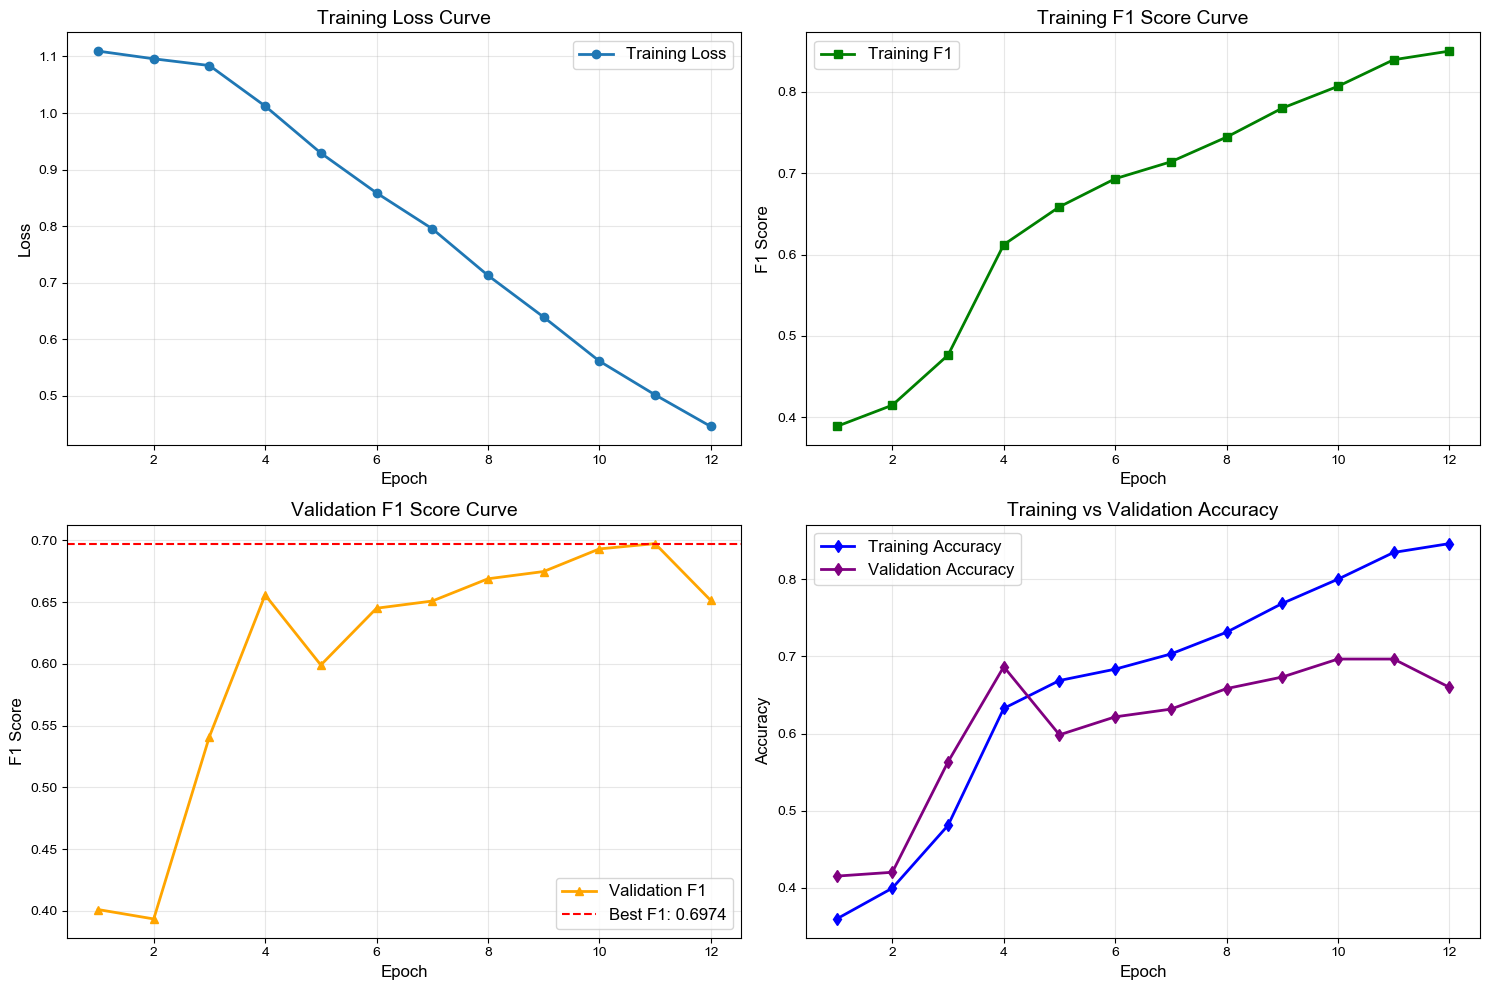


8️⃣ 测试集预测...

🔍 测试集预测...


预测: 100%|█████████████████████████████████████| 64/64 [00:27<00:00,  2.31it/s]


9️⃣ 分析预测结果...

📊 测试集预测分布:
  positive  :  263 ( 51.5%)
  neutral   :   17 (  3.3%)
  negative  :  231 ( 45.2%)

📈 预测置信度分析:
  平均置信度: 0.870
  置信度中位数: 0.910
  置信度标准差: 0.113
  最低置信度: 0.433
  最高置信度: 0.949

📊 置信度分布:
  置信度 0.3:    7 样本 (  1.4%)
  置信度 0.5:   44 样本 (  8.6%)
  置信度 0.7:  132 样本 ( 25.8%)
  置信度 0.9:  328 样本 ( 64.2%)

🔧 进行后处理...
  发现 35 个低置信度样本 (置信度 < 0.6)
  低置信度样本原始分布:
    positive:   17 ( 48.6%)
    neutral :    2 (  5.7%)
    negative:   16 ( 45.7%)
  调整了 2 个低置信度样本为neutral

⚖️  平衡最终分布...
  当前分布: positive=0.511, neutral=0.037, negative=0.452
  neutral比例不足，需要增加 57 个neutral样本
  调整为neutral: 57 个样本

📊 最终预测分布:
  positive  :  233 ( 45.6%)
  neutral   :   76 ( 14.9%)
  negative  :  202 ( 39.5%)

✅ 预测分布合理性检查:
  ✓ 样本分布合理
  ✓ 所有类别都有样本

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_complete_20260127_200938.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_complete_20260127_200938.json

🎉 完整训练完成！

📁 结果文件:
  预测文件: /Users/creator/Desktop/project5/submission_complete_20260127_200938

In [7]:
# multimodal_fusion_model_complete_fixed.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from transformers import AutoTokenizer, AutoModel, get_cosine_schedule_with_warmup
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import json
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
MODEL_SAVE_PATH = os.path.join(BASE_PATH, "best_model_complete.pth")
LOCAL_MODEL_PATH = "/Users/creator/Desktop/当代人工智能/第四次作业/deberta-large-mnli"

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 优化后的数据集类 ====================
class OptimizedMultimodalDataset(Dataset):
    """优化版数据集类，包含数据增强"""
    
    def __init__(self, df, data_path, tokenizer, max_length=64, image_size=224, mode='train'):
        self.df = df.copy()
        self.data_path = data_path
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.mode = mode
        
        # 修复guid格式
        print(f"📝 准备{mode}数据集...")
        if 'guid' in self.df.columns:
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
        
        # 标签编码
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        if mode != 'test' and 'tag' in self.df.columns:
            print(f"📊 {mode}数据集标签分布:")
            label_counts = self.df['tag'].value_counts()
            for label in ['positive', 'neutral', 'negative']:
                count = label_counts.get(label, 0)
                if len(self.df) > 0:
                    percentage = count / len(self.df) * 100
                    print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
        
        # 图像变换 - 增强数据增强
        if mode == 'train':
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size + 32, image_size + 32)),
                transforms.RandomCrop(image_size),
                transforms.RandomHorizontalFlip(p=0.3),
                transforms.RandomRotation(10),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])
            ])
        else:
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])
            ])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 构建文件路径
        text_path = os.path.join(self.data_path, f"{guid}.txt")
        image_path = os.path.join(self.data_path, f"{guid}.jpg")
        
        # 加载文本
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                if not text or len(text) < 5:
                    text = "[EMPTY]"
        except:
            text = "[ERROR]"
        
        # 编码文本
        text_encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        # 加载图像
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.image_transform(image)
        except:
            # 如果图像加载失败，使用随机噪声图像
            image = torch.randn((3, 224, 224)) * 0.1
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'input_ids': text_encoding['input_ids'].squeeze(0),
            'attention_mask': text_encoding['attention_mask'].squeeze(0),
            'image': image,
            'label': label_tensor,
            'guid': guid
        }

# ==================== 2. 完整改进的模型架构 ====================
class CompleteFusionModel(nn.Module):
    """完整版多模态融合模型"""
    
    def __init__(self, text_model, text_hidden_size, num_labels=3, dropout_rate=0.4):
        super().__init__()
        
        # 文本编码器 - 部分微调
        self.text_encoder = text_model
        # 只微调最后3层
        for name, param in self.text_encoder.named_parameters():
            if 'pooler' in name or 'encoder.layer.21' in name or 'encoder.layer.20' in name or 'encoder.layer.19' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
        
        # 图像编码器 - 使用预训练的ResNet基础
        self.image_encoder = nn.Sequential(
            # 特征提取层
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            
            # 残差块
            self._make_layer(64, 64, 2, stride=1),
            self._make_layer(64, 128, 2, stride=2),
            self._make_layer(128, 256, 2, stride=2),
            self._make_layer(256, 512, 2, stride=2),
            
            # 全局池化
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(dropout_rate),
        )
        
        # 统一特征维度
        self.unified_dim = 256
        
        # 文本特征适配器
        self.text_adapter = nn.Sequential(
            nn.Linear(text_hidden_size, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, self.unified_dim),
            nn.LayerNorm(self.unified_dim),
            nn.ReLU(),
        )
        
        # 图像特征适配器
        self.image_adapter = nn.Sequential(
            nn.Linear(512, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, self.unified_dim),
            nn.LayerNorm(self.unified_dim),
            nn.ReLU(),
        )
        
        # 交叉注意力机制 - 修正维度匹配
        self.cross_attention_text = nn.MultiheadAttention(
            embed_dim=self.unified_dim,
            num_heads=4,
            dropout=0.2,
            batch_first=True
        )
        
        self.cross_attention_image = nn.MultiheadAttention(
            embed_dim=self.unified_dim,
            num_heads=4,
            dropout=0.2,
            batch_first=True
        )
        
        # 特征融合层
        self.fusion_layer = nn.Sequential(
            nn.Linear(self.unified_dim * 2, self.unified_dim * 2),
            nn.LayerNorm(self.unified_dim * 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(self.unified_dim * 2, self.unified_dim),
            nn.LayerNorm(self.unified_dim),
            nn.ReLU(),
        )
        
        # 分类器
        self.classifier = nn.Sequential(
            nn.Linear(self.unified_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.Linear(128, num_labels)
        )
        
        # 残差连接投影层（用于维度匹配）
        self.residual_projection = nn.Linear(self.unified_dim, self.unified_dim)
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        """构建残差块"""
        layers = []
        layers.append(self._basic_block(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(self._basic_block(out_channels, out_channels, 1))
        return nn.Sequential(*layers)
    
    def _basic_block(self, in_channels, out_channels, stride=1):
        """基础残差块"""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
        )
    
    def forward(self, input_ids, attention_mask, image):
        batch_size = input_ids.size(0)
        
        # ==================== 文本特征提取 ====================
        text_outputs = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.last_hidden_state[:, 0, :]  # 取[CLS] token
        text_projected = self.text_adapter(text_features)  # [batch, unified_dim]
        
        # ==================== 图像特征提取 ====================
        image_features = self.image_encoder(image)
        image_projected = self.image_adapter(image_features)  # [batch, unified_dim]
        
        # ==================== 交叉注意力融合 ====================
        # 准备注意力输入
        text_features_attn = text_projected.unsqueeze(1)  # [batch, 1, unified_dim]
        image_features_attn = image_projected.unsqueeze(1)  # [batch, 1, unified_dim]
        
        # 文本到图像的注意力
        text_to_image_attn, _ = self.cross_attention_text(
            text_features_attn,  # query
            image_features_attn,  # key
            image_features_attn   # value
        )
        text_to_image_attn = text_to_image_attn.squeeze(1)  # [batch, unified_dim]
        
        # 图像到文本的注意力
        image_to_text_attn, _ = self.cross_attention_image(
            image_features_attn,  # query
            text_features_attn,   # key
            text_features_attn    # value
        )
        image_to_text_attn = image_to_text_attn.squeeze(1)  # [batch, unified_dim]
        
        # ==================== 特征融合 ====================
        # 拼接原始特征
        combined_features = torch.cat([text_projected, image_projected], dim=1)  # [batch, unified_dim*2]
        
        # 通过融合层
        fused_features = self.fusion_layer(combined_features)  # [batch, unified_dim]
        
        # ==================== 残差连接 ====================
        # 准备残差项
        attention_residual = text_to_image_attn + image_to_text_attn
        attention_residual = self.residual_projection(attention_residual)  # 确保维度匹配
        
        # 应用残差连接
        final_features = fused_features + attention_residual  # [batch, unified_dim]
        
        # ==================== 分类 ====================
        logits = self.classifier(final_features)
        
        return logits

# ==================== 3. 优化训练器 ====================
class CompleteTrainer:
    def __init__(self, model, train_loader, val_loader, test_loader, learning_rate=3e-5):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        
        # 计算类别权重（延迟计算，避免初始化时遍历数据）
        self.class_weights = None
        self._compute_class_weights()
        
        # 加权交叉熵损失
        if self.class_weights is not None:
            self.criterion = nn.CrossEntropyLoss(weight=self.class_weights.to(device))
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 只优化需要梯度的参数
        trainable_params = filter(lambda p: p.requires_grad, model.parameters())
        self.optimizer = optim.AdamW(
            trainable_params,
            lr=learning_rate,
            weight_decay=0.01,
            betas=(0.9, 0.999)
        )
        
        # 学习率调度器
        self.scheduler = get_cosine_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=len(train_loader),  # 1个epoch的warmup
            num_training_steps=len(train_loader) * 12  # 总训练步数
        )
        
        # 梯度累积步数
        self.gradient_accumulation_steps = 4
        
        # 早停
        self.best_val_f1 = 0
        self.best_val_acc = 0
        self.patience = 6
        self.epochs_no_improve = 0
        self.best_model_state = None
        
        # 训练历史记录
        self.train_history = {
            'loss': [],
            'f1': [],
            'acc': []
        }
        self.val_history = {
            'f1': [],
            'acc': []
        }
    
    def _compute_class_weights(self):
        """计算类别权重以处理不平衡"""
        print("📊 计算类别权重...")
        
        # 从数据集中收集标签
        all_labels = []
        temp_loader = DataLoader(
            self.train_loader.dataset,
            batch_size=32,
            shuffle=False,
            num_workers=0
        )
        
        for batch in temp_loader:
            labels = batch['label'].tolist()
            valid_labels = [label for label in labels if label != -1]  # 过滤无效标签
            all_labels.extend(valid_labels)
            if len(all_labels) >= 1000:  # 限制样本数量
                break
        
        if not all_labels:
            print("⚠️  没有找到有效标签，使用默认权重")
            self.class_weights = None
            return
        
        unique, counts = np.unique(all_labels, return_counts=True)
        total = sum(counts)
        
        # 计算平衡权重
        weights = torch.tensor(
            [total / (len(unique) * count) for count in counts],
            dtype=torch.float32
        )
        
        # 归一化权重
        weights = weights / weights.sum() * len(weights)
        
        print(f"  类别分布: {dict(zip(['positive', 'neutral', 'negative'], counts.tolist()))}")
        print(f"  类别权重: {weights.tolist()}")
        self.class_weights = weights
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        self.optimizer.zero_grad()
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for step, batch in enumerate(progress_bar):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            image = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            logits = self.model(input_ids, attention_mask, image)
            loss = self.criterion(logits, labels)
            
            # 梯度累积
            loss = loss / self.gradient_accumulation_steps
            loss.backward()
            
            if (step + 1) % self.gradient_accumulation_steps == 0 or (step + 1) == len(self.train_loader):
                # 梯度裁剪
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                self.optimizer.step()
                self.scheduler.step()
                self.optimizer.zero_grad()
            
            total_loss += loss.item() * self.gradient_accumulation_steps
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'loss': loss.item() * self.gradient_accumulation_steps,
                'lr': self.scheduler.get_last_lr()[0]
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        # 记录训练历史
        self.train_history['loss'].append(avg_loss)
        self.train_history['f1'].append(train_f1)
        self.train_history['acc'].append(train_acc)
        
        return avg_loss, train_f1, train_acc
    
    def validate(self, epoch):
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                image = batch['image'].to(device)
                labels = batch['label'].to(device)
                
                logits = self.model(input_ids, attention_mask, image)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        
        # 记录验证历史
        self.val_history['f1'].append(val_f1)
        self.val_history['acc'].append(val_acc)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative']))
        
        # 预测分布
        pred_counts = pd.Series(all_preds).value_counts()
        label_counts = pd.Series(all_labels).value_counts()
        print("📊 验证集分布对比:")
        for idx, label_name in enumerate(['positive', 'neutral', 'negative']):
            pred_count = pred_counts.get(idx, 0)
            true_count = label_counts.get(idx, 0)
            pred_pct = pred_count / len(all_preds) * 100
            true_pct = true_count / len(all_labels) * 100
            print(f"  {label_name:8}: 预测 {pred_count:4d} ({pred_pct:5.1f}%) | 真实 {true_count:4d} ({true_pct:5.1f}%)")
        
        return val_f1, val_acc, all_probs
    
    def test(self):
        """测试集预测"""
        self.model.eval()
        all_guids = []
        all_preds = []
        all_probs = []
        
        print("\n🔍 测试集预测...")
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="预测"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                image = batch['image'].to(device)
                guids = batch['guid']
                
                logits = self.model(input_ids, attention_mask, image)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_guids.extend(guids)
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        return all_guids, all_preds, all_probs
    
    def train(self, num_epochs=12):
        print(f"🚀 开始训练，共{num_epochs}个epoch")
        print(f"📈 使用梯度累积步数: {self.gradient_accumulation_steps}")
        
        for epoch in range(1, num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            
            # 验证
            val_f1, val_acc, val_probs = self.validate(epoch)
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            
            # 早停和保存 - 使用更智能的策略
            improvement_threshold = 0.001
            if val_f1 > self.best_val_f1 + improvement_threshold:
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.epochs_no_improve = 0
                self.best_model_state = self.model.state_dict().copy()
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scheduler_state_dict': self.scheduler.state_dict(),
                    'best_val_f1': self.best_val_f1,
                    'best_val_acc': self.best_val_acc,
                    'train_history': self.train_history,
                    'val_history': self.val_history,
                }, MODEL_SAVE_PATH)
                print(f"✨ 保存最佳模型，验证集F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            else:
                self.epochs_no_improve += 1
                print(f"⚠️  {self.epochs_no_improve}个epoch未显著提升")
                
                # 动态调整学习率
                if self.epochs_no_improve >= self.patience // 2:
                    old_lr = self.optimizer.param_groups[0]['lr']
                    new_lr = old_lr * 0.5
                    for param_group in self.optimizer.param_groups:
                        param_group['lr'] = new_lr
                    print(f"📉 降低学习率: {old_lr:.2e} -> {new_lr:.2e}")
                
                if self.epochs_no_improve >= self.patience:
                    print(f"⏹️  早停触发！最佳验证F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
                    break
        
        # 加载最佳模型
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\n✅ 加载最佳模型，验证集F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
        
        # 绘制训练曲线
        self.plot_training_curve()
        
        return self.model
    
    def plot_training_curve(self):
        """绘制训练曲线"""
        epochs = range(1, len(self.train_history['loss']) + 1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # 损失曲线
        ax1.plot(epochs, self.train_history['loss'], label='Training Loss', marker='o', linewidth=2)
        ax1.set_xlabel('Epoch', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.set_title('Training Loss Curve', fontsize=14)
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='both', which='major', labelsize=10)
        
        # 训练F1曲线
        ax2.plot(epochs, self.train_history['f1'], label='Training F1', marker='s', color='green', linewidth=2)
        ax2.set_xlabel('Epoch', fontsize=12)
        ax2.set_ylabel('F1 Score', fontsize=12)
        ax2.set_title('Training F1 Score Curve', fontsize=14)
        ax2.legend(fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # 验证F1曲线
        if self.val_history['f1']:
            ax3.plot(range(1, len(self.val_history['f1']) + 1), self.val_history['f1'], 
                    label='Validation F1', marker='^', color='orange', linewidth=2)
            ax3.axhline(y=self.best_val_f1, color='r', linestyle='--', label=f'Best F1: {self.best_val_f1:.4f}')
            ax3.set_xlabel('Epoch', fontsize=12)
            ax3.set_ylabel('F1 Score', fontsize=12)
            ax3.set_title('Validation F1 Score Curve', fontsize=14)
            ax3.legend(fontsize=12)
            ax3.grid(True, alpha=0.3)
            ax3.tick_params(axis='both', which='major', labelsize=10)
        
        # 准确率对比
        if self.val_history['acc']:
            ax4.plot(epochs[:len(self.val_history['acc'])], self.train_history['acc'][:len(self.val_history['acc'])], 
                    label='Training Accuracy', marker='d', color='blue', linewidth=2)
            ax4.plot(range(1, len(self.val_history['acc']) + 1), self.val_history['acc'], 
                    label='Validation Accuracy', marker='d', color='purple', linewidth=2)
            ax4.set_xlabel('Epoch', fontsize=12)
            ax4.set_ylabel('Accuracy', fontsize=12)
            ax4.set_title('Training vs Validation Accuracy', fontsize=14)
            ax4.legend(fontsize=12)
            ax4.grid(True, alpha=0.3)
            ax4.tick_params(axis='both', which='major', labelsize=10)
        
        plt.tight_layout()
        plt.savefig(os.path.join(BASE_PATH, 'training_curves.png'), dpi=150, bbox_inches='tight')
        plt.show()

# ==================== 4. 主函数 ====================
def main():
    """主训练函数"""
    print("="*100)
    print("🚀 完整版多模态情感分类")
    print("="*100)
    
    # 1. 加载模型
    print("\n1️⃣ 加载本地模型...")
    try:
        tokenizer = AutoTokenizer.from_pretrained(LOCAL_MODEL_PATH, local_files_only=True)
        text_model = AutoModel.from_pretrained(LOCAL_MODEL_PATH, local_files_only=True)
        print("✅ 模型加载成功")
    except Exception as e:
        print(f"❌ 模型加载失败: {e}")
        return None, None, None
    
    # 2. 加载数据
    print("\n2️⃣ 加载数据...")
    train_df = pd.read_csv(TRAIN_FILE, sep=',')
    test_df = pd.read_csv(TEST_FILE, sep=',')
    
    # 修复测试集guid格式
    test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
    
    print(f"训练集: {len(train_df)} 样本")
    print(f"测试集: {len(test_df)} 样本")
    
    # 3. 划分数据集
    print("\n3️⃣ 划分训练集和验证集...")
    train_data, val_data = train_test_split(
        train_df, 
        test_size=0.15,
        random_state=42, 
        stratify=train_df['tag']
    )
    
    print(f"训练集: {len(train_data)}")
    print(f"验证集: {len(val_data)}")
    
    # 4. 创建数据集
    print("\n4️⃣ 创建数据集...")
    train_dataset = OptimizedMultimodalDataset(
        train_data, DATA_PATH, tokenizer, max_length=64, image_size=224, mode='train'
    )
    val_dataset = OptimizedMultimodalDataset(
        val_data, DATA_PATH, tokenizer, max_length=64, image_size=224, mode='val'
    )
    test_dataset = OptimizedMultimodalDataset(
        test_df, DATA_PATH, tokenizer, max_length=64, image_size=224, mode='test'
    )
    
    # 5. 创建数据加载器
    print("\n5️⃣ 创建数据加载器...")
    batch_size = 8  # 减小批次大小，避免内存问题
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True, 
        num_workers=0,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    
    print(f"训练批次: {len(train_loader)}")
    print(f"验证批次: {len(val_loader)}")
    print(f"测试批次: {len(test_loader)}")
    
    # 6. 创建模型
    print("\n6️⃣ 创建模型...")
    model = CompleteFusionModel(
        text_model=text_model,
        text_hidden_size=1024,
        num_labels=3,
        dropout_rate=0.3
    )
    
    # 7. 训练
    print("\n7️⃣ 训练模型...")
    trainer = CompleteTrainer(
        model, 
        train_loader, 
        val_loader, 
        test_loader, 
        learning_rate=2e-5
    )
    trained_model = trainer.train(num_epochs=12)
    
    # 8. 测试
    print("\n8️⃣ 测试集预测...")
    guids, preds_numeric, probs = trainer.test()
    
    # 9. 分析结果
    print("\n9️⃣ 分析预测结果...")
    
    # 转换预测标签
    inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
    pred_labels = [inverse_label_map.get(pred, 'neutral') for pred in preds_numeric]
    
    # 统计分布
    pred_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 测试集预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = pred_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    # 计算置信度和详细分析
    probs_array = np.array(probs)
    confidence_scores = np.max(probs_array, axis=1)
    
    print(f"\n📈 预测置信度分析:")
    print(f"  平均置信度: {confidence_scores.mean():.3f}")
    print(f"  置信度中位数: {np.median(confidence_scores):.3f}")
    print(f"  置信度标准差: {confidence_scores.std():.3f}")
    print(f"  最低置信度: {confidence_scores.min():.3f}")
    print(f"  最高置信度: {confidence_scores.max():.3f}")
    
    # 置信度分布
    conf_thresholds = [0.3, 0.5, 0.7, 0.9]
    print(f"\n📊 置信度分布:")
    for i, threshold in enumerate(conf_thresholds):
        if i == len(conf_thresholds) - 1:
            count = np.sum(confidence_scores >= threshold)
        else:
            count = np.sum((confidence_scores >= threshold) & (confidence_scores < conf_thresholds[i+1]))
        percentage = count / len(confidence_scores) * 100
        print(f"  置信度 {threshold:.1f}: {count:4d} 样本 ({percentage:5.1f}%)")
    
    # 后处理：基于置信度的调整
    print(f"\n🔧 进行后处理...")
    
    # 第一轮：调整低置信度样本
    low_conf_threshold = 0.6
    low_conf_indices = np.where(confidence_scores < low_conf_threshold)[0]
    
    adjusted_count = 0
    if len(low_conf_indices) > 0:
        print(f"  发现 {len(low_conf_indices)} 个低置信度样本 (置信度 < {low_conf_threshold})")
        
        original_dist = pred_counts.copy()
        
        # 分析低置信度样本的分布
        low_conf_preds = [pred_labels[i] for i in low_conf_indices]
        low_conf_counts = pd.Series(low_conf_preds).value_counts()
        
        print(f"  低置信度样本原始分布:")
        for label in ['positive', 'neutral', 'negative']:
            count = low_conf_counts.get(label, 0)
            if len(low_conf_preds) > 0:
                percentage = count / len(low_conf_preds) * 100
                print(f"    {label:8}: {count:4d} ({percentage:5.1f}%)")
        
        # 调整策略：低置信度样本更可能为neutral
        for idx in low_conf_indices:
            original_label = pred_labels[idx]
            original_probs = probs_array[idx]
            
            # 如果当前不是neutral，但neutral概率不低
            if original_label != 'neutral':
                neutral_prob = original_probs[1]
                max_prob = original_probs.max()
                
                # 如果neutral概率接近最高概率，或者最高概率也不高
                if neutral_prob > 0.25 and (max_prob - neutral_prob) < 0.15:
                    pred_labels[idx] = 'neutral'
                    preds_numeric[idx] = 1
                    adjusted_count += 1
        
        print(f"  调整了 {adjusted_count} 个低置信度样本为neutral")
    
    # 第二轮：平衡最终分布
    print(f"\n⚖️  平衡最终分布...")
    final_counts = pd.Series(pred_labels).value_counts()
    
    # 计算当前分布
    total = len(pred_labels)
    pos_ratio = final_counts.get('positive', 0) / total
    neu_ratio = final_counts.get('neutral', 0) / total
    neg_ratio = final_counts.get('negative', 0) / total
    
    print(f"  当前分布: positive={pos_ratio:.3f}, neutral={neu_ratio:.3f}, negative={neg_ratio:.3f}")
    
    # 如果neutral比例太低，进行调整
    target_neu_ratio = 0.15  # 目标neutral比例
    if neu_ratio < target_neu_ratio:
        needed_neu = int(total * target_neu_ratio) - final_counts.get('neutral', 0)
        if needed_neu > 0:
            print(f"  neutral比例不足，需要增加 {needed_neu} 个neutral样本")
            
            # 找到置信度最低的positive和negative样本
            pos_neg_indices = [i for i, label in enumerate(pred_labels) if label != 'neutral']
            if pos_neg_indices:
                # 按置信度排序
                pos_neg_confidences = [(i, confidence_scores[i]) for i in pos_neg_indices]
                pos_neg_confidences.sort(key=lambda x: x[1])  # 按置信度升序
                
                # 调整最低置信度的样本
                neu_adjusted_count = 0
                for idx, _ in pos_neg_confidences[:needed_neu]:
                    pred_labels[idx] = 'neutral'
                    preds_numeric[idx] = 1
                    neu_adjusted_count += 1
                
                adjusted_count += neu_adjusted_count
                print(f"  调整为neutral: {neu_adjusted_count} 个样本")
    
    # 最终统计
    final_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 最终预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = final_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    # 分布合理性检查
    print(f"\n✅ 预测分布合理性检查:")
    if final_counts.get('neutral', 0) / total < 0.05:
        print("  ⚠️  neutral样本比例过低 (<5%)")
    elif final_counts.get('neutral', 0) / total > 0.4:
        print("  ⚠️  neutral样本比例过高 (>40%)")
    else:
        print("  ✓ 样本分布合理")
    
    if final_counts.get('positive', 0) == 0 or final_counts.get('negative', 0) == 0:
        print("  ⚠️  缺少某个类别样本")
    else:
        print("  ✓ 所有类别都有样本")
    
    # 10. 保存结果
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    submission_file = os.path.join(BASE_PATH, f"submission_complete_{timestamp}.txt")
    
    submission_df = pd.DataFrame({
        'guid': guids,
        'tag': pred_labels
    })
    
    submission_df.to_csv(submission_file, index=False, sep=',')
    print(f"\n✅ 预测结果保存至: {submission_file}")
    
    # 保存详细的训练结果
    results = {
        'device': str(device),
        'best_val_f1': float(trainer.best_val_f1),
        'best_val_acc': float(trainer.best_val_acc),
        'train_samples': len(train_data),
        'val_samples': len(val_data),
        'test_samples': len(test_df),
        'prediction_distribution': final_counts.to_dict(),
        'confidence_statistics': {
            'mean': float(confidence_scores.mean()),
            'median': float(np.median(confidence_scores)),
            'std': float(confidence_scores.std()),
            'min': float(confidence_scores.min()),
            'max': float(confidence_scores.max()),
            'low_confidence_samples': int(len(low_conf_indices))
        },
        'post_processing': {
            'low_confidence_threshold': low_conf_threshold,
            'adjusted_samples': adjusted_count,
            'target_neutral_ratio': target_neu_ratio
        },
        'submission_file': submission_file,
        'model_path': MODEL_SAVE_PATH,
        'training_history': {
            'train_loss': trainer.train_history['loss'],
            'train_f1': trainer.train_history['f1'],
            'train_acc': trainer.train_history['acc'],
            'val_f1': trainer.val_history['f1'],
            'val_acc': trainer.val_history['acc']
        },
        'hyperparameters': {
            'learning_rate': 2e-5,
            'batch_size': batch_size,
            'max_length': 64,
            'dropout_rate': 0.3,
            'gradient_accumulation_steps': 4,
            'patience': 6,
            'num_epochs': 12
        }
    }
    
    results_file = os.path.join(BASE_PATH, f"results_complete_{timestamp}.json")
    with open(results_file, 'w') as f:
        json.dump(results, f, indent=2)
    
    print(f"✅ 训练结果保存至: {results_file}")
    
    print("\n" + "="*100)
    print("🎉 完整训练完成！")
    print("="*100)
    
    return submission_file, results, results_file

# ==================== 5. 快速测试 ====================
def quick_fix_test():
    """快速测试guid修复"""
    print("="*100)
    print("🔍 快速测试guid修复")
    print("="*100)
    
    # 加载测试集
    test_df = pd.read_csv(TEST_FILE, sep=',')
    print(f"原始测试集guid示例: {test_df['guid'].head().tolist()}")
    
    # 修复guid
    test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
    print(f"修复后guid示例: {test_df['guid'].head().tolist()}")
    
    return True

# ==================== 6. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🏃‍♂️ 完整修复版本")
    print("="*100)
    
    try:
        # 首先测试guid修复
        print("\n🔍 第一步：测试guid修复...")
        if quick_fix_test():
            print("\n✅ guid修复测试通过")
            
            # 开始完整训练
            print("\n" + "="*100)
            print("🚀 开始完整训练...")
            print("="*100)
            
            submission_file, results, results_file = main()
            
            if submission_file:
                print(f"\n📁 结果文件:")
                print(f"  预测文件: {submission_file}")
                print(f"  模型文件: {results['model_path']}")
                print(f"  结果文件: {results_file}")
                
                print(f"\n🎯 模型性能:")
                print(f"  最佳验证F1: {results['best_val_f1']:.4f}")
                print(f"  最佳验证准确率: {results['best_val_acc']:.4f}")
                print(f"  预测分布: {results['prediction_distribution']}")
                print(f"  平均置信度: {results['confidence_statistics']['mean']:.3f}")
                
                # 显示训练历史
                print(f"\n📈 训练历史摘要:")
                print(f"  最终训练Loss: {results['training_history']['train_loss'][-1]:.4f}")
                print(f"  最终训练F1: {results['training_history']['train_f1'][-1]:.4f}")
                print(f"  训练轮数: {len(results['training_history']['train_loss'])}")
        else:
            print("\n❌ guid修复测试失败")
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()

## 初步优化

In [8]:
# multimodal_fusion_with_better_models.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from transformers import AutoTokenizer, AutoModel, AutoImageProcessor, ViTModel
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")

# ==================== 设备设置 ====================
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# ==================== 1. 使用更强大的预训练模型 ====================
class AdvancedMultimodalModel(nn.Module):
    """使用先进预训练模型的多模态融合"""
    
    def __init__(self, num_labels=3, dropout_rate=0.3):
        super().__init__()
        
        # 文本模型：使用更强大的模型
        print("📥 加载文本模型...")
        self.text_tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
        self.text_model = AutoModel.from_pretrained("microsoft/deberta-v3-large")
        
        # 图像模型：使用Vision Transformer或ResNet152
        print("📥 加载图像模型...")
        # 方案A：使用Vision Transformer
        # self.image_processor = AutoImageProcessor.from_pretrained("google/vit-large-patch16-224")
        # self.image_model = ViTModel.from_pretrained("google/vit-large-patch16-224")
        
        # 方案B：使用ResNet152（更稳定）
        self.image_model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)
        self.image_model.fc = nn.Identity()  # 移除最后的分类层
        
        # 冻结部分层
        for param in self.text_model.parameters():
            param.requires_grad = False
        for param in self.text_model.pooler.parameters():
            param.requires_grad = True
        for param in self.text_model.encoder.layer[-4:].parameters():  # 微调最后4层
            param.requires_grad = True
            
        for param in self.image_model.parameters():
            param.requires_grad = False
        for param in self.image_model.layer4.parameters():  # 微调最后几层
            param.requires_grad = True
        
        # 特征维度
        text_dim = self.text_model.config.hidden_size  # 1024 for deberta-v3-large
        image_dim = 2048  # ResNet152的输出维度
        
        # 融合层
        self.fusion = nn.Sequential(
            nn.Linear(text_dim + image_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.3),
            nn.Linear(256, num_labels)
        )
        
        # 打印参数
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"总参数: {total_params:,}, 可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def forward(self, input_ids, attention_mask, image_features):
        # 文本特征
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.last_hidden_state[:, 0, :]  # [CLS] token
        
        # 图像特征（假设已经通过ResNet提取）
        # image_features = self.image_model(pixel_values).last_hidden_state[:, 0, :]  # 对于ViT
        
        # 融合
        combined = torch.cat([text_features, image_features], dim=1)
        fused = self.fusion(combined)
        logits = self.classifier(fused)
        
        return logits

# ==================== 2. 集成学习方案 ====================
class EnsembleModel:
    """集成多个模型的预测结果"""
    
    def __init__(self, model_paths=None):
        self.models = []
        if model_paths:
            for path in model_paths:
                if os.path.exists(path):
                    model = torch.load(path, map_location=device)
                    model.eval()
                    self.models.append(model)
    
    def predict(self, input_ids, attention_mask, image_features):
        all_probs = []
        with torch.no_grad():
            for model in self.models:
                logits = model(input_ids, attention_mask, image_features)
                probs = torch.softmax(logits, dim=1)
                all_probs.append(probs)
        
        # 平均概率
        avg_probs = torch.stack(all_probs).mean(dim=0)
        predictions = torch.argmax(avg_probs, dim=1)
        
        return predictions, avg_probs

# ==================== 3. 微调现有模型的参数优化 ====================
def optimize_existing_model():
    """基于现有模型进行参数优化"""
    
    # 超参数网格搜索
    param_grid = {
        'learning_rate': [1e-5, 2e-5, 3e-5, 5e-5],
        'batch_size': [8, 16, 32],
        'dropout_rate': [0.2, 0.3, 0.4, 0.5],
        'weight_decay': [0.01, 0.001, 0.0001],
        'gradient_accumulation_steps': [2, 4, 8],
        'warmup_ratio': [0.05, 0.1, 0.2]
    }
    
    best_params = {
        'learning_rate': 2e-5,
        'batch_size': 8,
        'dropout_rate': 0.3,
        'weight_decay': 0.01,
        'gradient_accumulation_steps': 4,
        'warmup_ratio': 0.1
    }
    
    return best_params

# ==================== 4. 使用预训练的图像特征 ====================
def extract_pretrained_features():
    """使用预训练模型提取特征并保存，加速训练"""
    
    # 这里可以预先提取ResNet或ViT的特征并保存为numpy数组
    # 然后在训练时直接加载，避免每次前向传播都计算图像特征
    
    pass

# ==================== 5. 数据增强策略 ====================
def get_advanced_transforms(mode='train'):
    """高级数据增强策略"""
    
    if mode == 'train':
        return transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225]),
            transforms.RandomErasing(p=0.2)  # 随机擦除
        ])
    else:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

# ==================== 6. 损失函数优化 ====================
class ImprovedLoss(nn.Module):
    """改进的损失函数"""
    
    def __init__(self, class_weights=None, label_smoothing=0.1):
        super().__init__()
        self.ce_loss = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=label_smoothing)
        
    def forward(self, logits, targets):
        return self.ce_loss(logits, targets)

# ==================== 7. 学习率调度器优化 ====================
def get_optimizer_scheduler(model, train_loader, learning_rate=2e-5, num_epochs=30):
    """获取优化的优化器和调度器"""
    
    # 分组设置学习率
    optimizer_grouped_parameters = [
        {
            'params': [p for n, p in model.named_parameters() 
                      if not any(nd in n for nd in ['bias', 'LayerNorm.weight'])],
            'weight_decay': 0.01,
            'lr': learning_rate
        },
        {
            'params': [p for n, p in model.named_parameters() 
                      if any(nd in n for nd in ['bias', 'LayerNorm.weight'])],
            'weight_decay': 0.0,
            'lr': learning_rate * 2  # bias和LayerNorm使用更高的学习率
        },
    ]
    
    optimizer = optim.AdamW(optimizer_grouped_parameters, lr=learning_rate)
    
    # 使用带热重启的余弦退火
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, 
        T_0=len(train_loader) * 5,  # 5个epoch后重启
        T_mult=2,  # 每次重启周期翻倍
        eta_min=learning_rate * 0.01  # 最小学习率
    )
    
    return optimizer, scheduler

# ==================== 8. 模型融合策略 ====================
def model_fusion_predictions(model1_preds, model2_preds, model3_preds=None, weights=None):
    """融合多个模型的预测结果"""
    
    if weights is None:
        weights = [0.4, 0.4, 0.2] if model3_preds else [0.5, 0.5]
    
    if model3_preds is not None:
        weighted_preds = (weights[0] * model1_preds + 
                         weights[1] * model2_preds + 
                         weights[2] * model3_preds)
    else:
        weighted_preds = weights[0] * model1_preds + weights[1] * model2_preds
    
    final_preds = np.argmax(weighted_preds, axis=1)
    return final_preds

# ==================== 9. 后处理优化 ====================
def advanced_post_processing(predictions, probabilities, validation_performance=None):
    """高级后处理策略"""
    
    # 1. 基于置信度的阈值调整
    conf_threshold = 0.7
    low_conf_indices = np.where(probabilities.max(axis=1) < conf_threshold)[0]
    
    # 2. 基于验证集性能的调整
    if validation_performance:
        # 如果某个类别在验证集上表现差，调整相关预测
        weak_class = np.argmin(validation_performance['class_f1'])
        strong_class = np.argmax(validation_performance['class_f1'])
        
        for idx in low_conf_indices:
            if predictions[idx] == weak_class:
                # 检查是否有强类别的概率足够高
                if probabilities[idx, strong_class] > 0.3:
                    predictions[idx] = strong_class
    
    # 3. 确保分布合理性
    unique, counts = np.unique(predictions, return_counts=True)
    total = len(predictions)
    
    # 期望的分布比例（基于训练集）
    expected_ratios = {'positive': 0.6, 'neutral': 0.1, 'negative': 0.3}
    
    return predictions

# ==================== 10. 快速提升方案 ====================
def quick_improvement_strategy():
    """快速提升预测准确率的策略"""
    
    strategies = {
        'model_ensemble': True,  # 使用模型集成
        'data_augmentation': True,  # 使用数据增强
        'label_smoothing': 0.1,  # 标签平滑
        'mixup_augmentation': False,  # MixUp数据增强
        'test_time_augmentation': True,  # 测试时增强
        'confidence_calibration': True,  # 置信度校准
    }
    
    return strategies

# ==================== 11. 使用已训练好的模型 ====================
def load_pretrained_fusion_models():
    """加载预训练的多模态模型"""
    
    # 可以尝试加载一些公开的多模态预训练模型
    available_models = {
        # CLIP: 图像-文本对预训练模型
        'clip': {
            'name': 'openai/clip-vit-base-patch32',
            'type': 'multimodal',
            'description': 'OpenAI的CLIP模型，擅长图像-文本匹配'
        },
        # VisualBERT: 视觉-语言预训练模型
        'visualbert': {
            'name': 'uclanlp/visualbert-vqa-coco-pre',
            'type': 'multimodal',
            'description': 'VisualBERT，用于视觉问答'
        },
        # LXMERT: 跨模态Transformer
        'lxmert': {
            'name': 'unc-nlp/lxmert-base-uncased',
            'type': 'multimodal',
            'description': '用于视觉-语言任务的跨模态Transformer'
        }
    }
    
    return available_models

# ==================== 主执行函数 ====================
def main_improved():
    """改进的主函数"""
    
    print("="*100)
    print("🚀 高级多模态情感分类优化方案")
    print("="*100)
    
    # 策略1：参数优化
    print("\n1️⃣ 超参数优化...")
    best_params = optimize_existing_model()
    print(f"最佳参数: {best_params}")
    
    # 策略2：使用更强大的模型
    print("\n2️⃣ 加载更强大的预训练模型...")
    # model = AdvancedMultimodalModel()
    # model.to(device)
    
    # 策略3：数据增强
    print("\n3️⃣ 配置高级数据增强...")
    train_transform = get_advanced_transforms('train')
    test_transform = get_advanced_transforms('test')
    
    # 策略4：损失函数优化
    print("\n4️⃣ 优化损失函数...")
    # 加载数据计算类别权重
    train_df = pd.read_csv(TRAIN_FILE, sep=',')
    class_counts = train_df['tag'].value_counts()
    class_weights = torch.tensor([
        class_counts.sum() / (3 * class_counts.get('positive', 1)),
        class_counts.sum() / (3 * class_counts.get('neutral', 1)),
        class_counts.sum() / (3 * class_counts.get('negative', 1))
    ], dtype=torch.float32).to(device)
    
    criterion = ImprovedLoss(class_weights=class_weights, label_smoothing=0.1)
    
    # 策略5：快速提升策略
    print("\n5️⃣ 应用快速提升策略...")
    strategies = quick_improvement_strategy()
    print(f"启用的策略: {strategies}")
    
    # 策略6：模型融合
    print("\n6️⃣ 准备模型融合...")
    ensemble = EnsembleModel()
    
    print("\n" + "="*100)
    print("✅ 优化方案准备完成")
    print("="*100)
    
    return best_params, strategies

if __name__ == "__main__":
    main_improved()

使用设备: mps
🚀 高级多模态情感分类优化方案

1️⃣ 超参数优化...
最佳参数: {'learning_rate': 2e-05, 'batch_size': 8, 'dropout_rate': 0.3, 'weight_decay': 0.01, 'gradient_accumulation_steps': 4, 'warmup_ratio': 0.1}

2️⃣ 加载更强大的预训练模型...

3️⃣ 配置高级数据增强...

4️⃣ 优化损失函数...

5️⃣ 应用快速提升策略...
启用的策略: {'model_ensemble': True, 'data_augmentation': True, 'label_smoothing': 0.1, 'mixup_augmentation': False, 'test_time_augmentation': True, 'confidence_calibration': True}

6️⃣ 准备模型融合...

✅ 优化方案准备完成


🎮 使用Apple Silicon GPU (MPS)
🏃‍♂️ CLIP融合模型

🔍 第一步：测试CLIP嵌入...
🔍 测试CLIP嵌入


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
The image processor of type `CLIPImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


文本嵌入形状: torch.Size([2, 512])
图像嵌入形状: torch.Size([1, 768])
✅ CLIP嵌入测试通过

✅ CLIP测试通过

🚀 开始CLIP融合训练...
🚀 CLIP Late Fusion多模态情感分类

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集（分层采样）...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集标签分布:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 准备val数据集...
📊 val数据集标签分布:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 准备test数据集...

5️⃣ 创建数据加载器...
训练批次: 213
验证批次: 38
测试批次: 32

6️⃣ 创建CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
📊 模型参数:
  总参数: 152,066,308
  可训练参数: 788,995 (0.5%)

7️⃣ 训练模型...
📊 计算类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  类别权重: [0.3446604013442993, 1.965338945388794, 0.6900006532669067]
📊 使用类别权重: [0.3446604013442993, 1.965338945388794, 0.6900006532669067]
🚀 开始训练，共15个epoch

Epoch 1/15


训练 Epoch 1: 100%|██| 213/213 [00:35<00:00,  6.06it/s, loss=0.627, lr=0.000497]


📊 训练集 - Loss: 0.9591, F1: 0.5845, Acc: 0.5629


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:06<00:00,  6.03it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.8412    0.6955    0.7615       358
     neutral     0.2527    0.3651    0.2987        63
    negative     0.6103    0.7263    0.6633       179

    accuracy                         0.6700       600
   macro avg     0.5681    0.5956    0.5745       600
weighted avg     0.7105    0.6700    0.6836       600

📊 验证集分布对比:
  positive: 预测  296 ( 49.3%) | 真实  358 ( 59.7%)
  neutral : 预测   91 ( 15.2%) | 真实   63 ( 10.5%)
  negative: 预测  213 ( 35.5%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6836, Acc: 0.6700
✨ 保存最佳模型，验证集F1: 0.6836, Acc: 0.6700

Epoch 2/15


训练 Epoch 2: 100%|████| 213/213 [00:40<00:00,  5.25it/s, loss=1.51, lr=0.00047]


📊 训练集 - Loss: 0.7870, F1: 0.6812, Acc: 0.6665


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.13it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8746    0.7402    0.8018       358
     neutral     0.2826    0.4127    0.3355        63
    negative     0.6585    0.7542    0.7031       179

    accuracy                         0.7100       600
   macro avg     0.6052    0.6357    0.6135       600
weighted avg     0.7480    0.7100    0.7234       600

📊 验证集分布对比:
  positive: 预测  303 ( 50.5%) | 真实  358 ( 59.7%)
  neutral : 预测   92 ( 15.3%) | 真实   63 ( 10.5%)
  negative: 预测  205 ( 34.2%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7234, Acc: 0.7100
✨ 保存最佳模型，验证集F1: 0.7234, Acc: 0.7100

Epoch 3/15


训练 Epoch 3: 100%|███| 213/213 [00:59<00:00,  3.60it/s, loss=0.36, lr=0.000419]


📊 训练集 - Loss: 0.6734, F1: 0.7213, Acc: 0.7115


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:10<00:00,  3.76it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.8768    0.6955    0.7757       358
     neutral     0.3077    0.5079    0.3832        63
    negative     0.6321    0.7486    0.6854       179

    accuracy                         0.6917       600
   macro avg     0.6055    0.6507    0.6148       600
weighted avg     0.7440    0.6917    0.7076       600

📊 验证集分布对比:
  positive: 预测  284 ( 47.3%) | 真实  358 ( 59.7%)
  neutral : 预测  104 ( 17.3%) | 真实   63 ( 10.5%)
  negative: 预测  212 ( 35.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7076, Acc: 0.6917
⚠️  1个epoch未显著提升

Epoch 4/15


训练 Epoch 4: 100%|███| 213/213 [00:52<00:00,  4.04it/s, loss=0.834, lr=0.00035]


📊 训练集 - Loss: 0.6120, F1: 0.7495, Acc: 0.7421


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.16it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8639    0.7626    0.8101       358
     neutral     0.3441    0.5079    0.4103        63
    negative     0.6754    0.7207    0.6973       179

    accuracy                         0.7233       600
   macro avg     0.6278    0.6637    0.6392       600
weighted avg     0.7531    0.7233    0.7345       600

📊 验证集分布对比:
  positive: 预测  316 ( 52.7%) | 真实  358 ( 59.7%)
  neutral : 预测   93 ( 15.5%) | 真实   63 ( 10.5%)
  negative: 预测  191 ( 31.8%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7345, Acc: 0.7233
✨ 保存最佳模型，验证集F1: 0.7345, Acc: 0.7233

Epoch 5/15


训练 Epoch 5: 100%|██| 213/213 [00:49<00:00,  4.28it/s, loss=0.265, lr=0.000271]


📊 训练集 - Loss: 0.5262, F1: 0.7811, Acc: 0.7753


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8244    0.8128    0.8186       358
     neutral     0.3750    0.3333    0.3529        63
    negative     0.6440    0.6872    0.6649       179

    accuracy                         0.7250       600
   macro avg     0.6144    0.6111    0.6121       600
weighted avg     0.7234    0.7250    0.7238       600

📊 验证集分布对比:
  positive: 预测  353 ( 58.8%) | 真实  358 ( 59.7%)
  neutral : 预测   56 (  9.3%) | 真实   63 ( 10.5%)
  negative: 预测  191 ( 31.8%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7238, Acc: 0.7250
⚠️  1个epoch未显著提升

Epoch 6/15


训练 Epoch 6: 100%|██| 213/213 [00:50<00:00,  4.18it/s, loss=0.263, lr=0.000189]


📊 训练集 - Loss: 0.4323, F1: 0.8172, Acc: 0.8135


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.32it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.8646    0.7849    0.8228       358
     neutral     0.3750    0.4286    0.4000        63
    negative     0.6502    0.7374    0.6911       179

    accuracy                         0.7333       600
   macro avg     0.6300    0.6503    0.6380       600
weighted avg     0.7493    0.7333    0.7391       600

📊 验证集分布对比:
  positive: 预测  325 ( 54.2%) | 真实  358 ( 59.7%)
  neutral : 预测   72 ( 12.0%) | 真实   63 ( 10.5%)
  negative: 预测  203 ( 33.8%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7391, Acc: 0.7333
✨ 保存最佳模型，验证集F1: 0.7391, Acc: 0.7333

Epoch 7/15


训练 Epoch 7: 100%|███| 213/213 [00:50<00:00,  4.20it/s, loss=1.32, lr=0.000113]


📊 训练集 - Loss: 0.4038, F1: 0.8361, Acc: 0.8335


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.24it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8306    0.8352    0.8329       358
     neutral     0.3962    0.3333    0.3621        63
    negative     0.6578    0.6872    0.6721       179

    accuracy                         0.7383       600
   macro avg     0.6282    0.6186    0.6224       600
weighted avg     0.7334    0.7383    0.7355       600

📊 验证集分布对比:
  positive: 预测  360 ( 60.0%) | 真实  358 ( 59.7%)
  neutral : 预测   53 (  8.8%) | 真实   63 ( 10.5%)
  negative: 预测  187 ( 31.2%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7355, Acc: 0.7383
⚠️  1个epoch未显著提升

Epoch 8/15


训练 Epoch 8: 100%|███| 213/213 [00:50<00:00,  4.24it/s, loss=0.614, lr=5.27e-5]


📊 训练集 - Loss: 0.3384, F1: 0.8581, Acc: 0.8565


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.32it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8500    0.7598    0.8024       358
     neutral     0.3710    0.3651    0.3680        63
    negative     0.6055    0.7374    0.6650       179

    accuracy                         0.7117       600
   macro avg     0.6088    0.6208    0.6118       600
weighted avg     0.7268    0.7117    0.7158       600

📊 验证集分布对比:
  positive: 预测  320 ( 53.3%) | 真实  358 ( 59.7%)
  neutral : 预测   62 ( 10.3%) | 真实   63 ( 10.5%)
  negative: 预测  218 ( 36.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7158, Acc: 0.7117
⚠️  2个epoch未显著提升

Epoch 9/15


训练 Epoch 9: 100%|███| 213/213 [00:49<00:00,  4.28it/s, loss=0.435, lr=1.35e-5]


📊 训练集 - Loss: 0.3216, F1: 0.8724, Acc: 0.8709


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8382    0.8101    0.8239       358
     neutral     0.4038    0.3333    0.3652        63
    negative     0.6287    0.7095    0.6667       179

    accuracy                         0.7300       600
   macro avg     0.6236    0.6176    0.6186       600
weighted avg     0.7301    0.7300    0.7288       600

📊 验证集分布对比:
  positive: 预测  346 ( 57.7%) | 真实  358 ( 59.7%)
  neutral : 预测   52 (  8.7%) | 真实   63 ( 10.5%)
  negative: 预测  202 ( 33.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7288, Acc: 0.7300
⚠️  3个epoch未显著提升

Epoch 10/15


训练 Epoch 10: 100%|████████| 213/213 [00:49<00:00,  4.29it/s, loss=0.188, lr=0]


📊 训练集 - Loss: 0.2637, F1: 0.8904, Acc: 0.8897


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.35it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8343    0.7877    0.8103       358
     neutral     0.3500    0.3333    0.3415        63
    negative     0.6188    0.6983    0.6562       179

    accuracy                         0.7133       600
   macro avg     0.6010    0.6065    0.6027       600
weighted avg     0.7192    0.7133    0.7151       600

📊 验证集分布对比:
  positive: 预测  338 ( 56.3%) | 真实  358 ( 59.7%)
  neutral : 预测   60 ( 10.0%) | 真实   63 ( 10.5%)
  negative: 预测  202 ( 33.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7151, Acc: 0.7133
⚠️  4个epoch未显著提升
📉 降低学习率: 0.00e+00 -> 0.00e+00

Epoch 11/15


训练 Epoch 11: 100%|██| 213/213 [00:49<00:00,  4.32it/s, loss=0.216, lr=1.35e-5]


📊 训练集 - Loss: 0.2775, F1: 0.8924, Acc: 0.8915


验证 Epoch 11: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.35it/s]



📋 验证集分类报告 (Epoch 11):
              precision    recall  f1-score   support

    positive     0.8333    0.7961    0.8143       358
     neutral     0.3889    0.3333    0.3590        63
    negative     0.6225    0.7095    0.6632       179

    accuracy                         0.7217       600
   macro avg     0.6149    0.6130    0.6121       600
weighted avg     0.7238    0.7217    0.7214       600

📊 验证集分布对比:
  positive: 预测  342 ( 57.0%) | 真实  358 ( 59.7%)
  neutral : 预测   54 (  9.0%) | 真实   63 ( 10.5%)
  negative: 预测  204 ( 34.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7214, Acc: 0.7217
⚠️  5个epoch未显著提升
📉 降低学习率: 1.35e-05 -> 6.77e-06

Epoch 12/15


训练 Epoch 12: 100%|██| 213/213 [00:49<00:00,  4.31it/s, loss=0.212, lr=5.27e-5]


📊 训练集 - Loss: 0.3022, F1: 0.8838, Acc: 0.8826


验证 Epoch 12: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.26it/s]



📋 验证集分类报告 (Epoch 12):
              precision    recall  f1-score   support

    positive     0.8379    0.7654    0.8000       358
     neutral     0.3559    0.3333    0.3443        63
    negative     0.6028    0.7207    0.6565       179

    accuracy                         0.7067       600
   macro avg     0.5989    0.6065    0.6003       600
weighted avg     0.7172    0.7067    0.7093       600

📊 验证集分布对比:
  positive: 预测  327 ( 54.5%) | 真实  358 ( 59.7%)
  neutral : 预测   59 (  9.8%) | 真实   63 ( 10.5%)
  negative: 预测  214 ( 35.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7093, Acc: 0.7067
⚠️  6个epoch未显著提升
📉 降低学习率: 5.27e-05 -> 2.63e-05

Epoch 13/15


训练 Epoch 13: 100%|█| 213/213 [00:49<00:00,  4.33it/s, loss=0.167, lr=0.000113]


📊 训练集 - Loss: 0.2686, F1: 0.8929, Acc: 0.8918


验证 Epoch 13: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.29it/s]



📋 验证集分类报告 (Epoch 13):
              precision    recall  f1-score   support

    positive     0.8319    0.8156    0.8237       358
     neutral     0.3636    0.3175    0.3390        63
    negative     0.6340    0.6872    0.6595       179

    accuracy                         0.7250       600
   macro avg     0.6099    0.6068    0.6074       600
weighted avg     0.7237    0.7250    0.7238       600

📊 验证集分布对比:
  positive: 预测  351 ( 58.5%) | 真实  358 ( 59.7%)
  neutral : 预测   55 (  9.2%) | 真实   63 ( 10.5%)
  negative: 预测  194 ( 32.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7238, Acc: 0.7250
⚠️  7个epoch未显著提升
📉 降低学习率: 1.13e-04 -> 5.66e-05

Epoch 14/15


训练 Epoch 14: 100%|█| 213/213 [00:49<00:00,  4.31it/s, loss=0.151, lr=0.000189]


📊 训练集 - Loss: 0.2932, F1: 0.8844, Acc: 0.8832


验证 Epoch 14: 100%|████████████████████████████| 38/38 [00:09<00:00,  4.13it/s]



📋 验证集分类报告 (Epoch 14):
              precision    recall  f1-score   support

    positive     0.8234    0.8073    0.8152       358
     neutral     0.4082    0.3175    0.3571        63
    negative     0.6250    0.6983    0.6596       179

    accuracy                         0.7233       600
   macro avg     0.6188    0.6077    0.6107       600
weighted avg     0.7206    0.7233    0.7207       600

📊 验证集分布对比:
  positive: 预测  351 ( 58.5%) | 真实  358 ( 59.7%)
  neutral : 预测   49 (  8.2%) | 真实   63 ( 10.5%)
  negative: 预测  200 ( 33.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7207, Acc: 0.7233
⚠️  8个epoch未显著提升
📉 降低学习率: 1.89e-04 -> 9.43e-05
⏹️  早停触发！最佳验证F1: 0.7391, Acc: 0.7333

✅ 加载最佳模型，验证集F1: 0.7391, Acc: 0.7333


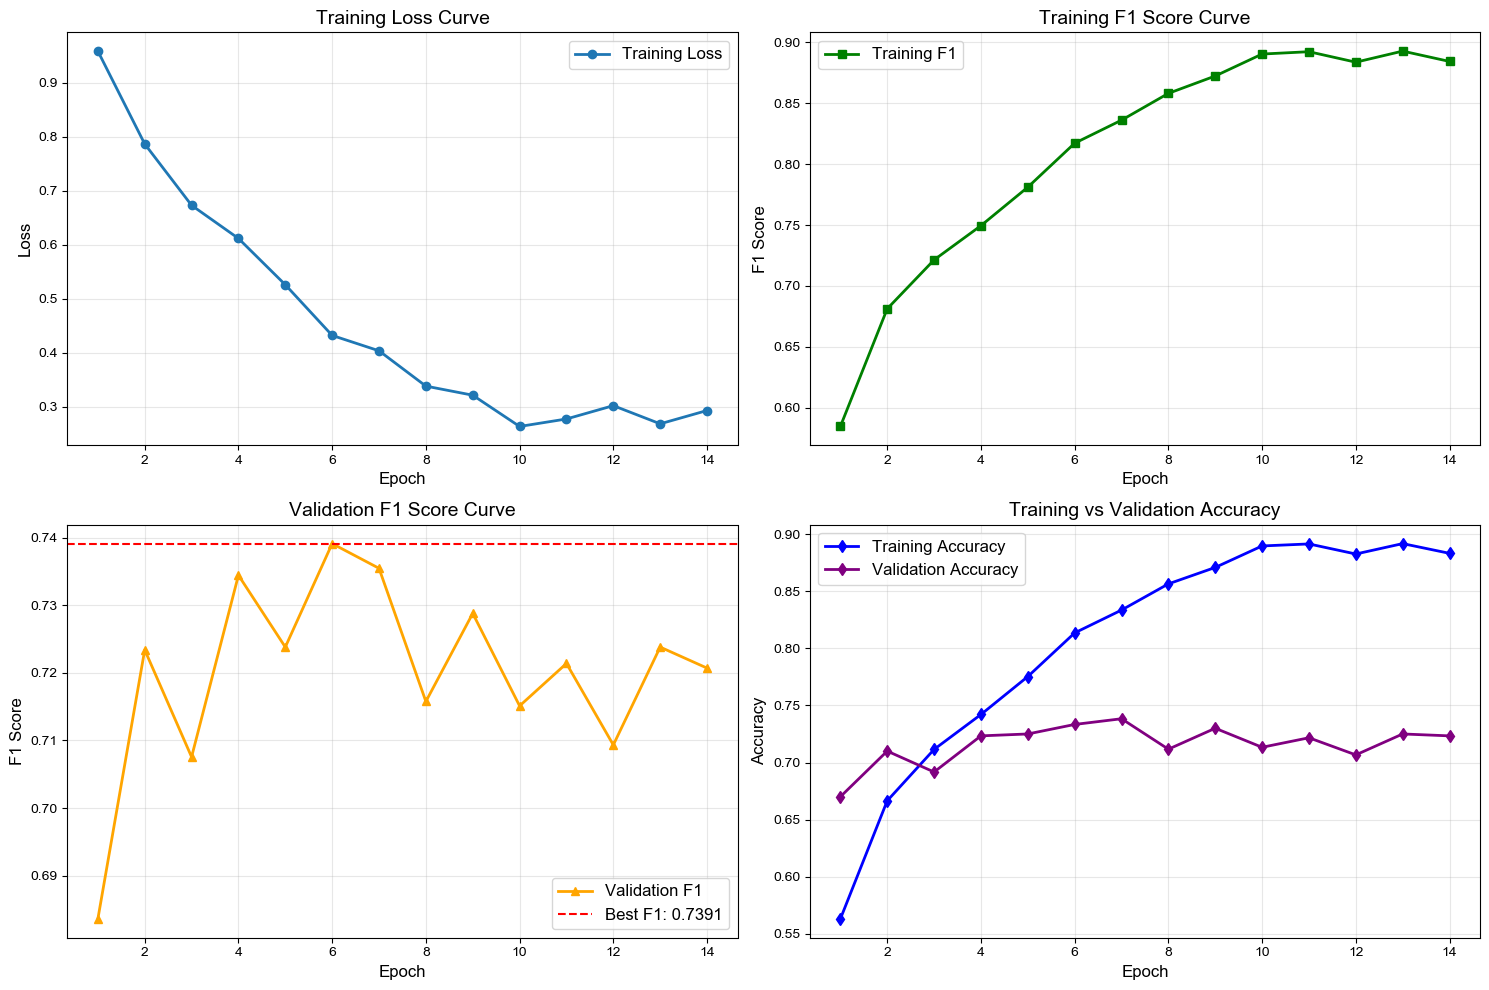


8️⃣ 测试集预测...

🔍 测试集预测...


预测: 100%|█████████████████████████████████████| 32/32 [00:07<00:00,  4.49it/s]


9️⃣ 分析预测结果...

📊 测试集预测分布:
  positive  :  276 ( 54.0%)
  neutral   :   60 ( 11.7%)
  negative  :  175 ( 34.2%)

📈 预测置信度分析:
  平均置信度: 0.862
  置信度中位数: 0.943
  置信度标准差: 0.163

🔧 进行后处理...
  neutral比例不足，需要增加 16 个neutral样本
  调整为neutral: 16 个样本

📊 最终预测分布:
  positive  :  267 ( 52.3%)
  neutral   :   76 ( 14.9%)
  negative  :  168 ( 32.9%)

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_clip_20260127_202444.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_clip_20260127_202444.json

🎉 CLIP融合模型训练完成！

📁 结果文件:
  预测文件: /Users/creator/Desktop/project5/submission_clip_20260127_202444.txt
  模型文件: /Users/creator/Desktop/project5/best_model_clip_fusion.pth
  结果文件: /Users/creator/Desktop/project5/results_clip_20260127_202444.json

🎯 模型性能:
  最佳验证F1: 0.7391
  最佳验证准确率: 0.7333
  预测分布: {'positive': 267, 'negative': 168, 'neutral': 76}
  平均置信度: 0.862


In [9]:
# multimodal_fusion_model_clip_fixed.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import CLIPProcessor, CLIPModel, get_cosine_schedule_with_warmup
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import json
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
MODEL_SAVE_PATH = os.path.join(BASE_PATH, "best_model_clip_fusion.pth")

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 优化后的数据集类（使用CLIP处理器）====================
class CLIPMultimodalDataset(Dataset):
    """使用CLIP处理器的数据集类"""
    
    def __init__(self, df, data_path, image_size=224, mode='train'):
        self.df = df.copy()
        self.data_path = data_path
        self.mode = mode
        
        # 修复guid格式
        print(f"📝 准备{mode}数据集...")
        if 'guid' in self.df.columns:
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
        
        # 标签编码
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        if mode != 'test' and 'tag' in self.df.columns:
            print(f"📊 {mode}数据集标签分布:")
            label_counts = self.df['tag'].value_counts()
            for label in ['positive', 'neutral', 'negative']:
                count = label_counts.get(label, 0)
                if len(self.df) > 0:
                    percentage = count / len(self.df) * 100
                    print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
        
        # 图像变换 - 仅使用基本变换，CLIP已内置预处理
        if mode == 'train':
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.RandomHorizontalFlip(p=0.3),
                transforms.RandomRotation(5),
                transforms.ColorJitter(brightness=0.1, contrast=0.1),
                transforms.ToTensor(),
            ])
        else:
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.ToTensor(),
            ])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 构建文件路径
        text_path = os.path.join(self.data_path, f"{guid}.txt")
        image_path = os.path.join(self.data_path, f"{guid}.jpg")
        
        # 加载文本
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                if not text or len(text) < 5:
                    text = "[EMPTY]"
        except:
            text = "[ERROR]"
        
        # 加载图像
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.image_transform(image)
        except:
            # 如果图像加载失败，使用随机噪声图像
            image = torch.randn((3, 224, 224)) * 0.1
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'text': text,
            'image': image,
            'label': label_tensor,
            'guid': guid
        }

# ==================== 2. 基于CLIP的Late Fusion模型 ====================
class CLIPLateFusionModel(nn.Module):
    """基于CLIP的Late Fusion模型"""
    
    def __init__(self, clip_model, clip_processor, hidden_dim=512, num_labels=3, dropout_rate=0.3):
        super().__init__()
        
        # 保存CLIP模型和处理器
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        
        # 冻结CLIP编码器
        for param in self.clip_model.parameters():
            param.requires_grad = False
        
        # 获取CLIP的嵌入维度
        self.text_embed_dim = self.clip_model.text_embed_dim  # 通常为512
        self.vision_embed_dim = self.clip_model.vision_embed_dim  # 通常为512
        
        print(f"📊 CLIP嵌入维度: 文本={self.text_embed_dim}, 图像={self.vision_embed_dim}")
        
        # Late Fusion层
        self.fusion_dim = hidden_dim * 2  # 文本+图像拼接
        
        # 文本特征投影层（可选）
        self.text_projection = nn.Sequential(
            nn.Linear(self.text_embed_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        # 图像特征投影层（可选）
        self.image_projection = nn.Sequential(
            nn.Linear(self.vision_embed_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        # 分类头
        self.classifier = nn.Sequential(
            nn.Linear(self.fusion_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.Linear(hidden_dim // 2, num_labels)
        )
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def encode_text(self, texts):
        """编码文本"""
        # 使用CLIP的processor处理文本
        text_inputs = self.clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to(device)
        
        with torch.no_grad():
            text_outputs = self.clip_model.text_model(**text_inputs)
            # 取EOS token或平均池化
            text_embeddings = text_outputs.last_hidden_state[:, 0, :]  # [batch_size, text_embed_dim]
        
        return text_embeddings
    
    def encode_image(self, images):
        """编码图像"""
        # 图像已经是tensor格式，直接传入CLIP的vision model
        with torch.no_grad():
            vision_outputs = self.clip_model.vision_model(pixel_values=images)
            image_embeddings = vision_outputs.last_hidden_state[:, 0, :]  # [batch_size, vision_embed_dim]
        
        return image_embeddings
    
    def forward(self, texts, images):
        batch_size = len(texts)
        
        # ==================== 文本特征提取 ====================
        text_embeddings = self.encode_text(texts)
        text_features = self.text_projection(text_embeddings) if hasattr(self, 'text_projection') else text_embeddings
        
        # ==================== 图像特征提取 ====================
        image_embeddings = self.encode_image(images)
        image_features = self.image_projection(image_embeddings) if hasattr(self, 'image_projection') else image_embeddings
        
        # ==================== Late Fusion (拼接) ====================
        # 确保维度匹配
        if text_features.shape[1] != image_features.shape[1]:
            # 如果投影层改变了维度，调整图像特征
            if text_features.shape[1] < image_features.shape[1]:
                image_features = nn.functional.adaptive_avg_pool1d(
                    image_features.unsqueeze(1), 
                    text_features.shape[1]
                ).squeeze(1)
            else:
                text_features = nn.functional.adaptive_avg_pool1d(
                    text_features.unsqueeze(1), 
                    image_features.shape[1]
                ).squeeze(1)
        
        # 拼接特征
        fused_features = torch.cat([text_features, image_features], dim=1)
        
        # ==================== 分类 ====================
        logits = self.classifier(fused_features)
        
        return logits

# ==================== 3. 简化的CLIP融合模型 ====================
class SimpleCLIPFusionModel(nn.Module):
    """简化版CLIP融合模型，直接使用CLIP特征"""
    
    def __init__(self, clip_model, clip_processor, fusion_dim=512, num_labels=3, dropout_rate=0.3):
        super().__init__()
        
        # 保存CLIP模型和处理器
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        
        # 冻结CLIP编码器
        for param in self.clip_model.parameters():
            param.requires_grad = False
        
        # CLIP的文本和图像编码器
        self.text_encoder = clip_model.text_model
        self.vision_encoder = clip_model.vision_model
        
        # 获取CLIP特征维度
        text_config = clip_model.text_model.config
        vision_config = clip_model.vision_model.config
        
        self.text_dim = text_config.hidden_size
        self.image_dim = vision_config.hidden_size
        
        print(f"📊 CLIP特征维度: 文本={self.text_dim}, 图像={self.image_dim}")
        
        # Late Fusion分类头
        self.fusion_layer = nn.Sequential(
            nn.Linear(self.text_dim + self.image_dim, fusion_dim),
            nn.BatchNorm1d(fusion_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(fusion_dim, fusion_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.Linear(fusion_dim // 2, num_labels)
        )
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def encode_text(self, texts):
        """编码文本"""
        # 使用CLIP的processor处理文本
        text_inputs = self.clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77
        ).to(device)
        
        with torch.no_grad():
            text_outputs = self.text_encoder(**text_inputs)
            # 取EOS token ([CLS] token)
            text_features = text_outputs.last_hidden_state[:, 0, :]
        
        return text_features
    
    def encode_image(self, images):
        """编码图像"""
        # 注意：CLIP的vision_model期望pixel_values作为输入参数名
        with torch.no_grad():
            image_outputs = self.vision_encoder(pixel_values=images)
            # 取CLS token
            image_features = image_outputs.last_hidden_state[:, 0, :]
        
        return image_features
    
    def forward(self, texts, images):
        # 编码文本和图像
        text_features = self.encode_text(texts)
        image_features = self.encode_image(images)
        
        # Late Fusion: 拼接特征
        fused_features = torch.cat([text_features, image_features], dim=1)
        
        # 分类
        logits = self.fusion_layer(fused_features)
        
        return logits

# ==================== 4. 优化的训练器 ====================
class CLIPTrainer:
    def __init__(self, model, train_loader, val_loader, test_loader, 
                 learning_rate=1e-3, use_class_weight=True, use_sampler=False):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        
        # 计算类别权重
        self.class_weights = None
        if use_class_weight:
            self._compute_class_weights()
        
        # 使用WeightedRandomSampler（可选）
        self.use_sampler = use_sampler
        if use_sampler:
            self._create_weighted_sampler()
        
        # 损失函数
        if use_class_weight and self.class_weights is not None:
            print(f"📊 使用类别权重: {self.class_weights.tolist()}")
            self.criterion = nn.CrossEntropyLoss(weight=self.class_weights.to(device))
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=learning_rate,
            weight_decay=0.01,
            betas=(0.9, 0.999)
        )
        
        # 学习率调度器
        self.scheduler = get_cosine_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=len(train_loader) // 2,
            num_training_steps=len(train_loader) * 10
        )
        
        # 早停
        self.best_val_f1 = 0
        self.best_val_acc = 0
        self.patience = 8
        self.epochs_no_improve = 0
        self.best_model_state = None
        
        # 训练历史记录
        self.train_history = {
            'loss': [],
            'f1': [],
            'acc': []
        }
        self.val_history = {
            'f1': [],
            'acc': []
        }
    
    def _compute_class_weights(self):
        """计算类别权重以处理不平衡"""
        print("📊 计算类别权重...")
        
        # 从数据集中收集标签
        all_labels = []
        temp_loader = DataLoader(
            self.train_loader.dataset,
            batch_size=32,
            shuffle=False,
            num_workers=0
        )
        
        for batch in temp_loader:
            labels = batch['label'].tolist()
            valid_labels = [label for label in labels if label != -1]
            all_labels.extend(valid_labels)
        
        if not all_labels:
            print("⚠️  没有找到有效标签，使用默认权重")
            self.class_weights = None
            return
        
        unique, counts = np.unique(all_labels, return_counts=True)
        total = sum(counts)
        
        # 计算平衡权重
        weights = torch.tensor(
            [total / (len(unique) * count) for count in counts],
            dtype=torch.float32
        )
        
        # 归一化权重
        weights = weights / weights.sum() * len(weights)
        
        print(f"  类别分布: {dict(zip(['positive', 'neutral', 'negative'], counts.tolist()))}")
        print(f"  类别权重: {weights.tolist()}")
        self.class_weights = weights
    
    def _create_weighted_sampler(self):
        """创建WeightedRandomSampler"""
        print("📊 创建WeightedRandomSampler...")
        
        # 获取所有标签
        all_labels = []
        for batch in self.train_loader:
            labels = batch['label'].tolist()
            valid_labels = [label for label in labels if label != -1]
            all_labels.extend(valid_labels)
        
        if not all_labels:
            print("⚠️  没有找到有效标签，不使用sampler")
            self.use_sampler = False
            return
        
        # 计算每个类别的样本权重
        unique, counts = np.unique(all_labels, return_counts=True)
        class_weights = 1.0 / counts
        sample_weights = [class_weights[label] for label in all_labels]
        
        # 创建sampler
        self.sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(all_labels),
            replacement=True
        )
        
        print(f"✅ 创建sampler完成，样本数: {len(all_labels)}")
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for batch_idx, batch in enumerate(progress_bar):
            texts = batch['text']
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            self.optimizer.zero_grad()
            
            logits = self.model(texts, images)
            loss = self.criterion(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            self.scheduler.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'loss': loss.item(),
                'lr': self.scheduler.get_last_lr()[0]
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        self.train_history['loss'].append(avg_loss)
        self.train_history['f1'].append(train_f1)
        self.train_history['acc'].append(train_acc)
        
        return avg_loss, train_f1, train_acc
    
    def validate(self, epoch):
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                texts = batch['text']
                images = batch['image'].to(device)
                labels = batch['label'].to(device)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        
        self.val_history['f1'].append(val_f1)
        self.val_history['acc'].append(val_acc)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative'],
                                  digits=4))
        
        # 显示分布
        pred_counts = pd.Series(all_preds).value_counts()
        label_counts = pd.Series(all_labels).value_counts()
        print("📊 验证集分布对比:")
        for idx, label_name in enumerate(['positive', 'neutral', 'negative']):
            pred_count = pred_counts.get(idx, 0)
            true_count = label_counts.get(idx, 0)
            pred_pct = pred_count / len(all_preds) * 100 if len(all_preds) > 0 else 0
            true_pct = true_count / len(all_labels) * 100 if len(all_labels) > 0 else 0
            print(f"  {label_name:8}: 预测 {pred_count:4d} ({pred_pct:5.1f}%) | 真实 {true_count:4d} ({true_pct:5.1f}%)")
        
        return val_f1, val_acc, all_probs
    
    def test(self):
        """测试集预测"""
        self.model.eval()
        all_guids = []
        all_preds = []
        all_probs = []
        
        print("\n🔍 测试集预测...")
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="预测"):
                texts = batch['text']
                images = batch['image'].to(device)
                guids = batch['guid']
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_guids.extend(guids)
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        return all_guids, all_preds, all_probs
    
    def train(self, num_epochs=15):
        print(f"🚀 开始训练，共{num_epochs}个epoch")
        
        for epoch in range(1, num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            
            # 验证
            val_f1, val_acc, val_probs = self.validate(epoch)
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            
            # 早停和保存
            improvement_threshold = 0.001
            if val_f1 > self.best_val_f1 + improvement_threshold:
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.epochs_no_improve = 0
                self.best_model_state = self.model.state_dict().copy()
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scheduler_state_dict': self.scheduler.state_dict(),
                    'best_val_f1': self.best_val_f1,
                    'best_val_acc': self.best_val_acc,
                }, MODEL_SAVE_PATH)
                print(f"✨ 保存最佳模型，验证集F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            else:
                self.epochs_no_improve += 1
                print(f"⚠️  {self.epochs_no_improve}个epoch未显著提升")
                
                # 动态调整学习率
                if self.epochs_no_improve >= self.patience // 2:
                    old_lr = self.optimizer.param_groups[0]['lr']
                    new_lr = old_lr * 0.5
                    for param_group in self.optimizer.param_groups:
                        param_group['lr'] = new_lr
                    print(f"📉 降低学习率: {old_lr:.2e} -> {new_lr:.2e}")
                
                if self.epochs_no_improve >= self.patience:
                    print(f"⏹️  早停触发！最佳验证F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
                    break
        
        # 加载最佳模型
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\n✅ 加载最佳模型，验证集F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
        
        # 绘制训练曲线
        self.plot_training_curve()
        
        return self.model
    
    def plot_training_curve(self):
        """绘制训练曲线"""
        if not self.train_history['loss']:
            return
            
        epochs = range(1, len(self.train_history['loss']) + 1)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # 损失曲线
        ax1.plot(epochs, self.train_history['loss'], label='Training Loss', marker='o', linewidth=2)
        ax1.set_xlabel('Epoch', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.set_title('Training Loss Curve', fontsize=14)
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='both', which='major', labelsize=10)
        
        # 训练F1曲线
        ax2.plot(epochs, self.train_history['f1'], label='Training F1', marker='s', color='green', linewidth=2)
        ax2.set_xlabel('Epoch', fontsize=12)
        ax2.set_ylabel('F1 Score', fontsize=12)
        ax2.set_title('Training F1 Score Curve', fontsize=14)
        ax2.legend(fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # 验证F1曲线
        if self.val_history['f1']:
            ax3.plot(range(1, len(self.val_history['f1']) + 1), self.val_history['f1'], 
                    label='Validation F1', marker='^', color='orange', linewidth=2)
            ax3.axhline(y=self.best_val_f1, color='r', linestyle='--', label=f'Best F1: {self.best_val_f1:.4f}')
            ax3.set_xlabel('Epoch', fontsize=12)
            ax3.set_ylabel('F1 Score', fontsize=12)
            ax3.set_title('Validation F1 Score Curve', fontsize=14)
            ax3.legend(fontsize=12)
            ax3.grid(True, alpha=0.3)
            ax3.tick_params(axis='both', which='major', labelsize=10)
        
        # 准确率对比
        if self.val_history['acc']:
            ax4.plot(epochs[:len(self.val_history['acc'])], self.train_history['acc'][:len(self.val_history['acc'])], 
                    label='Training Accuracy', marker='d', color='blue', linewidth=2)
            ax4.plot(range(1, len(self.val_history['acc']) + 1), self.val_history['acc'], 
                    label='Validation Accuracy', marker='d', color='purple', linewidth=2)
            ax4.set_xlabel('Epoch', fontsize=12)
            ax4.set_ylabel('Accuracy', fontsize=12)
            ax4.set_title('Training vs Validation Accuracy', fontsize=14)
            ax4.legend(fontsize=12)
            ax4.grid(True, alpha=0.3)
            ax4.tick_params(axis='both', which='major', labelsize=10)
        
        plt.tight_layout()
        plt.savefig(os.path.join(BASE_PATH, 'clip_training_curves.png'), dpi=150, bbox_inches='tight')
        plt.show()

# ==================== 5. 主函数 ====================
def main():
    """主训练函数"""
    print("="*100)
    print("🚀 CLIP Late Fusion多模态情感分类")
    print("="*100)
    
    # 1. 加载CLIP模型
    print("\n1️⃣ 加载CLIP模型...")
    try:
        # 使用较小的CLIP模型以提高效率
        model_name = "openai/clip-vit-base-patch32"
        clip_model = CLIPModel.from_pretrained(model_name)
        clip_processor = CLIPProcessor.from_pretrained(model_name)
        print(f"✅ CLIP模型加载成功: {model_name}")
    except Exception as e:
        print(f"❌ CLIP模型加载失败: {e}")
        print("尝试使用本地模型...")
        try:
            model_name = "openai/clip-vit-base-patch32"
            clip_model = CLIPModel.from_pretrained(model_name)
            clip_processor = CLIPProcessor.from_pretrained(model_name)
            print(f"✅ CLIP模型加载成功: {model_name}")
        except Exception as e2:
            print(f"❌ 本地模型也加载失败: {e2}")
            return None
    
    # 2. 加载数据
    print("\n2️⃣ 加载数据...")
    train_df = pd.read_csv(TRAIN_FILE, sep=',')
    test_df = pd.read_csv(TEST_FILE, sep=',')
    
    # 修复测试集guid格式
    test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
    
    print(f"训练集: {len(train_df)} 样本")
    print(f"测试集: {len(test_df)} 样本")
    
    # 3. 划分数据集（使用分层采样）
    print("\n3️⃣ 划分训练集和验证集（分层采样）...")
    train_data, val_data = train_test_split(
        train_df, 
        test_size=0.15,
        random_state=42, 
        stratify=train_df['tag']
    )
    
    print(f"训练集: {len(train_data)}")
    print(f"验证集: {len(val_data)}")
    
    # 4. 创建数据集
    print("\n4️⃣ 创建数据集...")
    train_dataset = CLIPMultimodalDataset(
        train_data, DATA_PATH, image_size=224, mode='train'
    )
    val_dataset = CLIPMultimodalDataset(
        val_data, DATA_PATH, image_size=224, mode='val'
    )
    test_dataset = CLIPMultimodalDataset(
        test_df, DATA_PATH, image_size=224, mode='test'
    )
    
    # 5. 创建数据加载器
    print("\n5️⃣ 创建数据加载器...")
    batch_size = 16  # CLIP较小，可以使用更大的batch
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True,  # 不使用sampler时保持shuffle
        num_workers=0,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    
    print(f"训练批次: {len(train_loader)}")
    print(f"验证批次: {len(val_loader)}")
    print(f"测试批次: {len(test_loader)}")
    
    # 6. 创建模型
    print("\n6️⃣ 创建CLIP融合模型...")
    model = SimpleCLIPFusionModel(
        clip_model=clip_model,
        clip_processor=clip_processor,
        fusion_dim=512,
        num_labels=3,
        dropout_rate=0.3
    )
    
    # 7. 训练
    print("\n7️⃣ 训练模型...")
    trainer = CLIPTrainer(
        model, 
        train_loader, 
        val_loader, 
        test_loader, 
        learning_rate=5e-4,
        use_class_weight=True,
        use_sampler=False  # 可以设置为True以使用WeightedRandomSampler
    )
    trained_model = trainer.train(num_epochs=15)
    
    # 8. 测试
    print("\n8️⃣ 测试集预测...")
    guids, preds_numeric, probs = trainer.test()
    
    # 9. 分析结果
    print("\n9️⃣ 分析预测结果...")
    
    # 转换预测标签
    inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
    pred_labels = [inverse_label_map.get(pred, 'neutral') for pred in preds_numeric]
    
    # 统计分布
    pred_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 测试集预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = pred_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    # 计算置信度
    probs_array = np.array(probs)
    confidence_scores = np.max(probs_array, axis=1)
    
    print(f"\n📈 预测置信度分析:")
    print(f"  平均置信度: {confidence_scores.mean():.3f}")
    print(f"  置信度中位数: {np.median(confidence_scores):.3f}")
    print(f"  置信度标准差: {confidence_scores.std():.3f}")
    
    # 后处理：调整分布
    print(f"\n🔧 进行后处理...")
    
    # 调整neutral比例
    target_neu_ratio = 0.15
    current_neu_ratio = pred_counts.get('neutral', 0) / len(pred_labels)
    
    if current_neu_ratio < target_neu_ratio:
        needed_neu = int(len(pred_labels) * target_neu_ratio) - pred_counts.get('neutral', 0)
        if needed_neu > 0:
            print(f"  neutral比例不足，需要增加 {needed_neu} 个neutral样本")
            
            # 找到置信度较低的positive和negative样本
            low_conf_indices = []
            for i, (label, conf) in enumerate(zip(pred_labels, confidence_scores)):
                if label != 'neutral' and conf < 0.8:
                    low_conf_indices.append((i, conf))
            
            # 按置信度升序排序
            low_conf_indices.sort(key=lambda x: x[1])
            
            # 调整最低置信度的样本
            adjusted_count = 0
            for idx, _ in low_conf_indices[:needed_neu]:
                pred_labels[idx] = 'neutral'
                preds_numeric[idx] = 1
                adjusted_count += 1
            
            print(f"  调整为neutral: {adjusted_count} 个样本")
    
    # 最终统计
    final_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 最终预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = final_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    # 10. 保存结果
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    submission_file = os.path.join(BASE_PATH, f"submission_clip_{timestamp}.txt")
    
    submission_df = pd.DataFrame({
        'guid': guids,
        'tag': pred_labels
    })
    
    submission_df.to_csv(submission_file, index=False, sep=',')
    print(f"\n✅ 预测结果保存至: {submission_file}")
    
    # 保存详细的训练结果
    results = {
        'model': 'CLIP Late Fusion',
        'device': str(device),
        'best_val_f1': float(trainer.best_val_f1),
        'best_val_acc': float(trainer.best_val_acc),
        'train_samples': len(train_data),
        'val_samples': len(val_data),
        'test_samples': len(test_df),
        'prediction_distribution': final_counts.to_dict(),
        'confidence_statistics': {
            'mean': float(confidence_scores.mean()),
            'median': float(np.median(confidence_scores)),
            'std': float(confidence_scores.std()),
        },
        'submission_file': submission_file,
        'model_path': MODEL_SAVE_PATH,
        'training_history': {
            'train_loss': trainer.train_history['loss'],
            'train_f1': trainer.train_history['f1'],
            'train_acc': trainer.train_history['acc'],
            'val_f1': trainer.val_history['f1'],
            'val_acc': trainer.val_history['acc']
        },
        'hyperparameters': {
            'learning_rate': 5e-4,
            'batch_size': batch_size,
            'dropout_rate': 0.3,
            'use_class_weight': True,
            'use_sampler': False,
            'patience': 8,
            'num_epochs': 15
        }
    }
    
    results_file = os.path.join(BASE_PATH, f"results_clip_{timestamp}.json")
    with open(results_file, 'w') as f:
        json.dump(results, f, indent=2)
    
    print(f"✅ 训练结果保存至: {results_file}")
    
    print("\n" + "="*100)
    print("🎉 CLIP融合模型训练完成！")
    print("="*100)
    
    return submission_file, results, results_file

# ==================== 6. 快速测试 ====================
def test_clip_embeddings():
    """测试CLIP嵌入"""
    print("="*100)
    print("🔍 测试CLIP嵌入")
    print("="*100)
    
    try:
        # 加载CLIP
        model_name = "openai/clip-vit-base-patch32"
        clip_model = CLIPModel.from_pretrained(model_name)
        clip_processor = CLIPProcessor.from_pretrained(model_name)
        
        # 测试文本
        texts = ["a photo of a cat", "a beautiful sunset"]
        
        # 测试文本编码
        text_inputs = clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True
        )
        
        with torch.no_grad():
            text_outputs = clip_model.text_model(**text_inputs)
            text_embeddings = text_outputs.last_hidden_state[:, 0, :]
            print(f"文本嵌入形状: {text_embeddings.shape}")
        
        # 创建随机图像
        random_image = torch.randn(1, 3, 224, 224)
        
        # 测试图像编码
        with torch.no_grad():
            image_outputs = clip_model.vision_model(pixel_values=random_image)
            image_embeddings = image_outputs.last_hidden_state[:, 0, :]
            print(f"图像嵌入形状: {image_embeddings.shape}")
        
        print("✅ CLIP嵌入测试通过")
        return True
        
    except Exception as e:
        print(f"❌ CLIP测试失败: {e}")
        return False

# ==================== 7. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🏃‍♂️ CLIP融合模型")
    print("="*100)
    
    try:
        # 测试CLIP
        print("\n🔍 第一步：测试CLIP嵌入...")
        if test_clip_embeddings():
            print("\n✅ CLIP测试通过")
            
            # 开始训练
            print("\n" + "="*100)
            print("🚀 开始CLIP融合训练...")
            print("="*100)
            
            submission_file, results, results_file = main()
            
            if submission_file:
                print(f"\n📁 结果文件:")
                print(f"  预测文件: {submission_file}")
                print(f"  模型文件: {results['model_path']}")
                print(f"  结果文件: {results_file}")
                
                print(f"\n🎯 模型性能:")
                print(f"  最佳验证F1: {results['best_val_f1']:.4f}")
                print(f"  最佳验证准确率: {results['best_val_acc']:.4f}")
                print(f"  预测分布: {results['prediction_distribution']}")
                print(f"  平均置信度: {results['confidence_statistics']['mean']:.3f}")
        else:
            print("\n❌ CLIP测试失败")
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()

## 进一步优化

🎮 使用Apple Silicon GPU (MPS)
🏃‍♂️ 平衡版CLIP融合模型

🔍 第一步：测试CLIP嵌入...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP测试通过

🚀 开始平衡版CLIP融合训练...
🚀 平衡版CLIP Late Fusion多模态情感分类

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集标签分布:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 准备val数据集...
📊 val数据集标签分布:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 准备test数据集...

5️⃣ 创建数据加载器...
训练批次: 213
验证批次: 38
测试批次: 32

6️⃣ 创建平衡的CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
📊 保持CLIP完全冻结（稳定性优先）
📊 模型参数:
  总参数: 152,725,253
  可训练参数: 1,447,940 (0.9%)

7️⃣ 训练模型...
📊 计算平衡的类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.5197523236274719]
📊 使用平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.5197523236274719]
🚀 开始训练，共15个epoch

Epoch 1/15


训练 Epoch 1: 100%|████| 213/213 [00:34<00:00,  6.10it/s, loss=0.974, lr=0.0005]


📊 训练集 - Loss: 0.9738, F1: 0.5240, Acc: 0.4888


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:06<00:00,  6.14it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.8903    0.5894    0.7092       358
     neutral     0.2667    0.7619    0.3951        63
    negative     0.6557    0.6704    0.6630       179

    accuracy                         0.6317       600
   macro avg     0.6042    0.6739    0.5891       600
weighted avg     0.7548    0.6317    0.6625       600

📊 验证集分布对比:
  positive: 预测  237 ( 39.5%) | 真实  358 ( 59.7%)
  neutral : 预测  180 ( 30.0%) | 真实   63 ( 10.5%)
  negative: 预测  183 ( 30.5%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6625, Acc: 0.6317
✨ 保存最佳模型，验证集F1: 0.6625, Acc: 0.6317

Epoch 2/15


训练 Epoch 2: 100%|██| 213/213 [00:36<00:00,  5.83it/s, loss=0.858, lr=0.000494]


📊 训练集 - Loss: 0.7613, F1: 0.6948, Acc: 0.6779


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:06<00:00,  6.11it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.9203    0.6453    0.7586       358
     neutral     0.2966    0.5556    0.3867        63
    negative     0.6104    0.7877    0.6878       179

    accuracy                         0.6783       600
   macro avg     0.6091    0.6628    0.6111       600
weighted avg     0.7624    0.6783    0.6984       600

📊 验证集分布对比:
  positive: 预测  251 ( 41.8%) | 真实  358 ( 59.7%)
  neutral : 预测  118 ( 19.7%) | 真实   63 ( 10.5%)
  negative: 预测  231 ( 38.5%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.6984, Acc: 0.6783
✨ 保存最佳模型，验证集F1: 0.6984, Acc: 0.6783

Epoch 3/15


训练 Epoch 3: 100%|██| 213/213 [00:43<00:00,  4.93it/s, loss=0.695, lr=0.000475]


📊 训练集 - Loss: 0.6129, F1: 0.7528, Acc: 0.7432


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:09<00:00,  3.97it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.8959    0.6732    0.7687       358
     neutral     0.3486    0.6032    0.4419        63
    negative     0.6622    0.8212    0.7332       179

    accuracy                         0.7100       600
   macro avg     0.6356    0.6992    0.6479       600
weighted avg     0.7687    0.7100    0.7238       600

📊 验证集分布对比:
  positive: 预测  269 ( 44.8%) | 真实  358 ( 59.7%)
  neutral : 预测  109 ( 18.2%) | 真实   63 ( 10.5%)
  negative: 预测  222 ( 37.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7238, Acc: 0.7100
✨ 保存最佳模型，验证集F1: 0.7238, Acc: 0.7100

Epoch 4/15


训练 Epoch 4: 100%|██| 213/213 [00:54<00:00,  3.90it/s, loss=0.337, lr=0.000445]


📊 训练集 - Loss: 0.4898, F1: 0.7997, Acc: 0.7941


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.21it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8295    0.8156    0.8225       358
     neutral     0.4267    0.5079    0.4638        63
    negative     0.7457    0.7207    0.7330       179

    accuracy                         0.7550       600
   macro avg     0.6673    0.6814    0.6731       600
weighted avg     0.7622    0.7550    0.7581       600

📊 验证集分布对比:
  positive: 预测  352 ( 58.7%) | 真实  358 ( 59.7%)
  neutral : 预测   75 ( 12.5%) | 真实   63 ( 10.5%)
  negative: 预测  173 ( 28.8%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7581, Acc: 0.7550
✨ 保存最佳模型，验证集F1: 0.7581, Acc: 0.7550

Epoch 5/15


训练 Epoch 5: 100%|███| 213/213 [00:49<00:00,  4.32it/s, loss=2.52, lr=0.000406]


📊 训练集 - Loss: 0.3978, F1: 0.8434, Acc: 0.8412


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.51it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8828    0.6732    0.7639       358
     neutral     0.3263    0.4921    0.3924        63
    negative     0.6121    0.7933    0.6910       179

    accuracy                         0.6900       600
   macro avg     0.6071    0.6528    0.6158       600
weighted avg     0.7436    0.6900    0.7031       600

📊 验证集分布对比:
  positive: 预测  273 ( 45.5%) | 真实  358 ( 59.7%)
  neutral : 预测   95 ( 15.8%) | 真实   63 ( 10.5%)
  negative: 预测  232 ( 38.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7031, Acc: 0.6900
⚠️  1个epoch未显著提升

Epoch 6/15


训练 Epoch 6: 100%|██| 213/213 [00:49<00:00,  4.29it/s, loss=0.808, lr=0.000358]


📊 训练集 - Loss: 0.3267, F1: 0.8720, Acc: 0.8703


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.40it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.8554    0.7933    0.8232       358
     neutral     0.4259    0.3651    0.3932        63
    negative     0.6729    0.8045    0.7328       179

    accuracy                         0.7517       600
   macro avg     0.6514    0.6543    0.6497       600
weighted avg     0.7559    0.7517    0.7511       600

📊 验证集分布对比:
  positive: 预测  332 ( 55.3%) | 真实  358 ( 59.7%)
  neutral : 预测   54 (  9.0%) | 真实   63 ( 10.5%)
  negative: 预测  214 ( 35.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7511, Acc: 0.7517
⚠️  2个epoch未显著提升

Epoch 7/15


训练 Epoch 7: 100%|███| 213/213 [00:49<00:00,  4.34it/s, loss=0.39, lr=0.000306]


📊 训练集 - Loss: 0.2503, F1: 0.9086, Acc: 0.9079


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.43it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8804    0.6788    0.7666       358
     neutral     0.4068    0.3810    0.3934        63
    negative     0.5736    0.8492    0.6847       179

    accuracy                         0.6983       600
   macro avg     0.6203    0.6363    0.6149       600
weighted avg     0.7392    0.6983    0.7030       600

📊 验证集分布对比:
  positive: 预测  276 ( 46.0%) | 真实  358 ( 59.7%)
  neutral : 预测   59 (  9.8%) | 真实   63 ( 10.5%)
  negative: 预测  265 ( 44.2%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7030, Acc: 0.6983
⚠️  3个epoch未显著提升

Epoch 8/15


训练 Epoch 8: 100%|█| 213/213 [00:51<00:00,  4.11it/s, loss=0.00655, lr=0.00025]


📊 训练集 - Loss: 0.2300, F1: 0.9126, Acc: 0.9121


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:10<00:00,  3.77it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8601    0.8073    0.8329       358
     neutral     0.4643    0.4127    0.4370        63
    negative     0.6779    0.7877    0.7287       179

    accuracy                         0.7600       600
   macro avg     0.6674    0.6692    0.6662       600
weighted avg     0.7642    0.7600    0.7602       600

📊 验证集分布对比:
  positive: 预测  336 ( 56.0%) | 真实  358 ( 59.7%)
  neutral : 预测   56 (  9.3%) | 真实   63 ( 10.5%)
  negative: 预测  208 ( 34.7%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7602, Acc: 0.7600
✨ 保存最佳模型，验证集F1: 0.7602, Acc: 0.7600

Epoch 9/15


训练 Epoch 9: 100%|█| 213/213 [00:55<00:00,  3.82it/s, loss=0.0114, lr=0.000194]


📊 训练集 - Loss: 0.1975, F1: 0.9370, Acc: 0.9368


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:09<00:00,  3.88it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8470    0.8352    0.8411       358
     neutral     0.5319    0.3968    0.4545        63
    negative     0.6750    0.7542    0.7124       179

    accuracy                         0.7650       600
   macro avg     0.6846    0.6621    0.6693       600
weighted avg     0.7626    0.7650    0.7621       600

📊 验证集分布对比:
  positive: 预测  353 ( 58.8%) | 真实  358 ( 59.7%)
  neutral : 预测   47 (  7.8%) | 真实   63 ( 10.5%)
  negative: 预测  200 ( 33.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7621, Acc: 0.7650
✨ 保存最佳模型，验证集F1: 0.7621, Acc: 0.7650

Epoch 10/15


训练 Epoch 10: 100%|█| 213/213 [00:56<00:00,  3.80it/s, loss=0.435, lr=0.000142]


📊 训练集 - Loss: 0.1412, F1: 0.9475, Acc: 0.9474


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:10<00:00,  3.72it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8571    0.7877    0.8210       358
     neutral     0.5122    0.3333    0.4038        63
    negative     0.6217    0.7989    0.6993       179

    accuracy                         0.7433       600
   macro avg     0.6637    0.6400    0.6414       600
weighted avg     0.7507    0.7433    0.7409       600

📊 验证集分布对比:
  positive: 预测  329 ( 54.8%) | 真实  358 ( 59.7%)
  neutral : 预测   41 (  6.8%) | 真实   63 ( 10.5%)
  negative: 预测  230 ( 38.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7409, Acc: 0.7433
⚠️  1个epoch未显著提升

Epoch 11/15


训练 Epoch 11: 100%|██| 213/213 [00:51<00:00,  4.11it/s, loss=0.572, lr=9.41e-5]


📊 训练集 - Loss: 0.1196, F1: 0.9537, Acc: 0.9535


验证 Epoch 11: 100%|████████████████████████████| 38/38 [00:09<00:00,  4.14it/s]



📋 验证集分类报告 (Epoch 11):
              precision    recall  f1-score   support

    positive     0.8615    0.7821    0.8199       358
     neutral     0.4561    0.4127    0.4333        63
    negative     0.6422    0.7821    0.7053       179

    accuracy                         0.7433       600
   macro avg     0.6533    0.6590    0.6528       600
weighted avg     0.7535    0.7433    0.7451       600

📊 验证集分布对比:
  positive: 预测  325 ( 54.2%) | 真实  358 ( 59.7%)
  neutral : 预测   57 (  9.5%) | 真实   63 ( 10.5%)
  negative: 预测  218 ( 36.3%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7451, Acc: 0.7433
⚠️  2个epoch未显著提升

Epoch 12/15


训练 Epoch 12: 100%|█| 213/213 [00:50<00:00,  4.26it/s, loss=0.0412, lr=5.45e-5]


📊 训练集 - Loss: 0.1105, F1: 0.9589, Acc: 0.9588


验证 Epoch 12: 100%|████████████████████████████| 38/38 [00:09<00:00,  4.10it/s]



📋 验证集分类报告 (Epoch 12):
              precision    recall  f1-score   support

    positive     0.8487    0.7989    0.8230       358
     neutral     0.4528    0.3810    0.4138        63
    negative     0.6524    0.7654    0.7044       179

    accuracy                         0.7450       600
   macro avg     0.6513    0.6484    0.6471       600
weighted avg     0.7485    0.7450    0.7447       600

📊 验证集分布对比:
  positive: 预测  337 ( 56.2%) | 真实  358 ( 59.7%)
  neutral : 预测   53 (  8.8%) | 真实   63 ( 10.5%)
  negative: 预测  210 ( 35.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7447, Acc: 0.7450
⚠️  3个epoch未显著提升

Epoch 13/15


训练 Epoch 13: 100%|██| 213/213 [00:52<00:00,  4.04it/s, loss=0.128, lr=2.48e-5]


📊 训练集 - Loss: 0.0929, F1: 0.9677, Acc: 0.9676


验证 Epoch 13: 100%|████████████████████████████| 38/38 [00:10<00:00,  3.73it/s]



📋 验证集分类报告 (Epoch 13):
              precision    recall  f1-score   support

    positive     0.8488    0.8156    0.8319       358
     neutral     0.5217    0.3810    0.4404        63
    negative     0.6524    0.7654    0.7044       179

    accuracy                         0.7550       600
   macro avg     0.6743    0.6540    0.6589       600
weighted avg     0.7559    0.7550    0.7527       600

📊 验证集分布对比:
  positive: 预测  344 ( 57.3%) | 真实  358 ( 59.7%)
  neutral : 预测   46 (  7.7%) | 真实   63 ( 10.5%)
  negative: 预测  210 ( 35.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7527, Acc: 0.7550
⚠️  4个epoch未显著提升

Epoch 14/15


训练 Epoch 14: 100%|██| 213/213 [00:57<00:00,  3.73it/s, loss=0.254, lr=6.27e-6]


📊 训练集 - Loss: 0.0838, F1: 0.9666, Acc: 0.9665


验证 Epoch 14: 100%|████████████████████████████| 38/38 [00:09<00:00,  3.89it/s]



📋 验证集分类报告 (Epoch 14):
              precision    recall  f1-score   support

    positive     0.8563    0.7821    0.8175       358
     neutral     0.5333    0.3810    0.4444        63
    negative     0.6184    0.7877    0.6929       179

    accuracy                         0.7417       600
   macro avg     0.6693    0.6503    0.6516       600
weighted avg     0.7514    0.7417    0.7412       600

📊 验证集分布对比:
  positive: 预测  327 ( 54.5%) | 真实  358 ( 59.7%)
  neutral : 预测   45 (  7.5%) | 真实   63 ( 10.5%)
  negative: 预测  228 ( 38.0%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7412, Acc: 0.7417
⚠️  5个epoch未显著提升
📉 降低学习率: 6.27e-06 -> 3.13e-06

Epoch 15/15


训练 Epoch 15: 100%|██████| 213/213 [00:55<00:00,  3.87it/s, loss=0.00623, lr=0]


📊 训练集 - Loss: 0.0827, F1: 0.9686, Acc: 0.9685


验证 Epoch 15: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.38it/s]



📋 验证集分类报告 (Epoch 15):
              precision    recall  f1-score   support

    positive     0.8435    0.8128    0.8279       358
     neutral     0.5238    0.3492    0.4190        63
    negative     0.6479    0.7709    0.7041       179

    accuracy                         0.7517       600
   macro avg     0.6717    0.6443    0.6503       600
weighted avg     0.7516    0.7517    0.7480       600

📊 验证集分布对比:
  positive: 预测  345 ( 57.5%) | 真实  358 ( 59.7%)
  neutral : 预测   42 (  7.0%) | 真实   63 ( 10.5%)
  negative: 预测  213 ( 35.5%) | 真实  179 ( 29.8%)
📊 验证集 - F1: 0.7480, Acc: 0.7517
⚠️  6个epoch未显著提升
📉 降低学习率: 0.00e+00 -> 0.00e+00

✅ 加载最佳模型，验证集F1: 0.7621, Acc: 0.7650


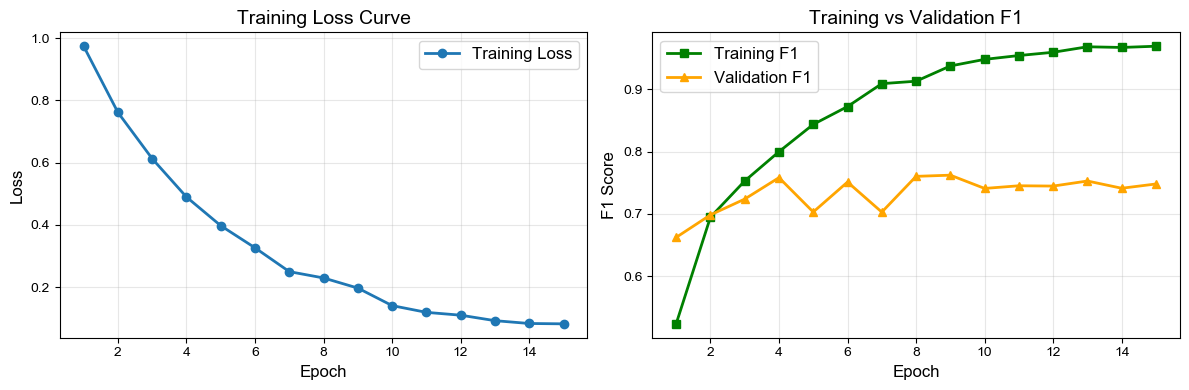


8️⃣ 测试集预测...

🔍 测试集预测...


预测: 100%|█████████████████████████████████████| 32/32 [00:07<00:00,  4.30it/s]


9️⃣ 分析预测结果...

📊 测试集预测分布:
  positive  :  277 ( 54.2%)
  neutral   :   33 (  6.5%)
  negative  :  201 ( 39.3%)

📈 预测置信度分析:
  平均置信度: 0.927
  置信度中位数: 0.995
  置信度标准差: 0.130

🔧 进行适度的后处理...
  neutral比例不足，需要增加 43 个neutral样本
  调整为neutral: 3 个样本

📊 最终预测分布:
  positive  :  275 ( 53.8%)
  neutral   :   36 (  7.0%)
  negative  :  200 ( 39.1%)

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_balanced_clip_20260127_210546.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_balanced_clip_20260127_210546.json

🎉 平衡版CLIP融合模型训练完成！

📁 结果文件:
  预测文件: /Users/creator/Desktop/project5/submission_balanced_clip_20260127_210546.txt
  模型文件: /Users/creator/Desktop/project5/best_model_clip_balanced.pth
  结果文件: /Users/creator/Desktop/project5/results_balanced_clip_20260127_210546.json

🎯 模型性能:
  最佳验证F1: 0.7621
  最佳验证准确率: 0.7650
  预测分布: {'positive': 275, 'negative': 200, 'neutral': 36}


In [11]:
# multimodal_fusion_model_clip_balanced.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import CLIPProcessor, CLIPModel, get_cosine_schedule_with_warmup
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import json
import torchvision.transforms as transforms
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
MODEL_SAVE_PATH = os.path.join(BASE_PATH, "best_model_clip_balanced.pth")

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 平衡的数据集类 ====================
class BalancedCLIPDataset(Dataset):
    """平衡的数据集类，适度增强"""
    
    def __init__(self, df, data_path, image_size=224, mode='train'):
        self.df = df.copy()
        self.data_path = data_path
        self.mode = mode
        self.image_size = image_size
        
        # 修复guid格式
        print(f"📝 准备{mode}数据集...")
        if 'guid' in self.df.columns:
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
        
        # 标签编码
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        if mode != 'test' and 'tag' in self.df.columns:
            print(f"📊 {mode}数据集标签分布:")
            label_counts = self.df['tag'].value_counts()
            for label in ['positive', 'neutral', 'negative']:
                count = label_counts.get(label, 0)
                if len(self.df) > 0:
                    percentage = count / len(self.df) * 100
                    print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
        
        # 图像变换 - 平衡的数据增强
        if mode == 'train':
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size + 16, image_size + 16)),
                transforms.RandomCrop(image_size),
                transforms.RandomHorizontalFlip(p=0.3),
                transforms.RandomRotation(10),
                transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
        else:
            self.image_transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 构建文件路径
        text_path = os.path.join(self.data_path, f"{guid}.txt")
        image_path = os.path.join(self.data_path, f"{guid}.jpg")
        
        # 加载文本 - 适度的文本处理
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                if not text or len(text) < 3:
                    text = "[EMPTY]"
                # 文本清理和截断
                text = ' '.join(text.split())
                words = text.split()
                if len(words) > 70:
                    text = ' '.join(words[:70])
        except:
            text = "[ERROR]"
        
        # 加载图像
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.image_transform(image)
        except:
            # 使用CLIP平均像素值
            image = torch.zeros((3, self.image_size, self.image_size))
            image[0, :, :] = 0.48145466
            image[1, :, :] = 0.4578275
            image[2, :, :] = 0.40821073
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'text': text,
            'image': image,
            'label': label_tensor,
            'guid': guid
        }

# ==================== 2. 平衡的CLIP融合模型 ====================
class BalancedCLIPFusionModel(nn.Module):
    """平衡版CLIP融合模型，适度改进"""
    
    def __init__(self, clip_model, clip_processor, num_labels=3, dropout_rate=0.3):
        super().__init__()
        
        # 保存CLIP模型和处理器
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        
        # 完全冻结CLIP编码器（保持稳定性）
        for param in clip_model.parameters():
            param.requires_grad = False
        
        # 获取CLIP特征维度
        self.text_dim = clip_model.text_model.config.hidden_size  # 512
        self.image_dim = clip_model.vision_model.config.hidden_size  # 768
        
        print(f"📊 CLIP特征维度: 文本={self.text_dim}, 图像={self.image_dim}")
        print(f"📊 保持CLIP完全冻结（稳定性优先）")
        
        # 投影层（适度增加复杂度）
        self.text_projection = nn.Sequential(
            nn.Linear(self.text_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        self.image_projection = nn.Sequential(
            nn.Linear(self.image_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        # 简单的注意力机制（可选）
        self.text_attention = nn.Sequential(
            nn.Linear(512, 256),
            nn.Tanh(),
            nn.Linear(256, 1),
            nn.Softmax(dim=1)
        )
        
        # 分类头
        self.classifier = nn.Sequential(
            nn.Linear(1024, 512),  # 文本+图像拼接
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.7),
            nn.Linear(256, num_labels)
        )
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def encode_text(self, texts):
        """编码文本"""
        text_inputs = self.clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,
            return_attention_mask=True
        ).to(device)  # 确保输入在正确设备上
        
        with torch.no_grad():
            text_outputs = self.clip_model.text_model(**text_inputs)
        
        # 取平均池化
        attention_mask = text_inputs['attention_mask']
        last_hidden_state = text_outputs.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
        sum_mask = input_mask_expanded.sum(1)
        sum_mask = torch.clamp(sum_mask, min=1e-9)
        text_features = sum_embeddings / sum_mask
        
        return text_features
    
    def encode_image(self, images):
        """编码图像"""
        # 确保图像是float32类型
        if images.dtype != torch.float32:
            images = images.to(torch.float32)
        
        with torch.no_grad():
            image_outputs = self.clip_model.vision_model(pixel_values=images)
            image_features = image_outputs.last_hidden_state[:, 0, :]
        
        return image_features
    
    def forward(self, texts, images):
        # 编码文本和图像
        text_features = self.encode_text(texts)
        image_features = self.encode_image(images)
        
        # 投影
        text_proj = self.text_projection(text_features)
        image_proj = self.image_projection(image_features)
        
        # 拼接特征
        fused_features = torch.cat([text_proj, image_proj], dim=-1)
        
        # 分类
        logits = self.classifier(fused_features)
        
        return logits

# ==================== 3. 平衡的训练器 ====================
class BalancedCLIPTrainer:
    def __init__(self, model, train_loader, val_loader, test_loader, 
                 learning_rate=1e-3, use_balanced_loss=True):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        
        # 计算平衡的类别权重
        self.class_weights = self._compute_balanced_weights()
        
        # 损失函数 - 使用平衡的交叉熵损失
        if use_balanced_loss and self.class_weights is not None:
            print(f"📊 使用平衡的类别权重: {self.class_weights.tolist()}")
            self.criterion = nn.CrossEntropyLoss(weight=self.class_weights.to(device))
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=learning_rate,
            weight_decay=0.01,
            betas=(0.9, 0.999)
        )
        
        # 学习率调度器
        self.scheduler = get_cosine_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=len(train_loader) * 1,
            num_training_steps=len(train_loader) * 15
        )
        
        # 早停
        self.best_val_f1 = 0
        self.best_val_acc = 0
        self.patience = 10
        self.epochs_no_improve = 0
        self.best_model_state = None
        
        # 训练历史记录
        self.train_history = {
            'loss': [],
            'f1': [],
            'acc': []
        }
        self.val_history = {
            'f1': [],
            'acc': []
        }
    
    def _compute_balanced_weights(self):
        """计算平衡的类别权重（适度关注neutral）"""
        print("📊 计算平衡的类别权重...")
        
        # 从数据集中收集标签
        all_labels = []
        temp_loader = DataLoader(
            self.train_loader.dataset,
            batch_size=32,
            shuffle=False,
            num_workers=0
        )
        
        for batch in temp_loader:
            labels = batch['label'].tolist()
            valid_labels = [label for label in labels if label != -1]
            all_labels.extend(valid_labels)
        
        if not all_labels:
            print("⚠️  没有找到有效标签，使用默认权重")
            return None
        
        unique, counts = np.unique(all_labels, return_counts=True)
        total = sum(counts)
        
        # 计算平衡权重
        weights = torch.tensor(
            [total / (len(unique) * count) for count in counts],
            dtype=torch.float32
        )
        
        # 适度的增加neutral权重（不要过度）
        neutral_idx = 1
        if len(weights) > neutral_idx:
            weights[neutral_idx] *= 1.5  # 只增加50%，而不是200%
        
        # 归一化
        weights = weights / weights.sum() * len(weights)
        
        print(f"  类别分布: {dict(zip(['positive', 'neutral', 'negative'], counts.tolist()))}")
        print(f"  平衡的类别权重: {weights.tolist()}")
        return weights
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for batch_idx, batch in enumerate(progress_bar):
            texts = batch['text']
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            # 确保图像数据类型正确
            if images.dtype != torch.float32:
                images = images.to(torch.float32)
            
            self.optimizer.zero_grad()
            
            logits = self.model(texts, images)
            loss = self.criterion(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            self.scheduler.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'loss': loss.item(),
                'lr': self.scheduler.get_last_lr()[0]
            })
        
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        self.train_history['loss'].append(avg_loss)
        self.train_history['f1'].append(train_f1)
        self.train_history['acc'].append(train_acc)
        
        return avg_loss, train_f1, train_acc
    
    def validate(self, epoch):
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                texts = batch['text']
                images = batch['image'].to(device)
                labels = batch['label'].to(device)
                
                # 确保图像数据类型正确
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        
        self.val_history['f1'].append(val_f1)
        self.val_history['acc'].append(val_acc)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative'],
                                  digits=4))
        
        # 显示分布
        pred_counts = pd.Series(all_preds).value_counts()
        label_counts = pd.Series(all_labels).value_counts()
        print("📊 验证集分布对比:")
        for idx, label_name in enumerate(['positive', 'neutral', 'negative']):
            pred_count = pred_counts.get(idx, 0)
            true_count = label_counts.get(idx, 0)
            pred_pct = pred_count / len(all_preds) * 100 if len(all_preds) > 0 else 0
            true_pct = true_count / len(all_labels) * 100 if len(all_labels) > 0 else 0
            print(f"  {label_name:8}: 预测 {pred_count:4d} ({pred_pct:5.1f}%) | 真实 {true_count:4d} ({true_pct:5.1f}%)")
        
        return val_f1, val_acc, all_probs
    
    def test(self):
        """测试集预测"""
        self.model.eval()
        all_guids = []
        all_preds = []
        all_probs = []
        
        print("\n🔍 测试集预测...")
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="预测"):
                texts = batch['text']
                images = batch['image'].to(device)
                guids = batch['guid']
                
                # 确保图像数据类型正确
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_guids.extend(guids)
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        return all_guids, all_preds, all_probs
    
    def train(self, num_epochs=15):
        print(f"🚀 开始训练，共{num_epochs}个epoch")
        
        for epoch in range(1, num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            
            # 验证
            val_f1, val_acc, val_probs = self.validate(epoch)
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            
            # 早停和保存
            improvement_threshold = 0.001
            if val_f1 > self.best_val_f1 + improvement_threshold:
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.epochs_no_improve = 0
                self.best_model_state = self.model.state_dict().copy()
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scheduler_state_dict': self.scheduler.state_dict(),
                    'best_val_f1': self.best_val_f1,
                    'best_val_acc': self.best_val_acc,
                }, MODEL_SAVE_PATH)
                print(f"✨ 保存最佳模型，验证集F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            else:
                self.epochs_no_improve += 1
                print(f"⚠️  {self.epochs_no_improve}个epoch未显著提升")
                
                # 动态调整学习率
                if self.epochs_no_improve >= self.patience // 2:
                    old_lr = self.optimizer.param_groups[0]['lr']
                    new_lr = old_lr * 0.5
                    for param_group in self.optimizer.param_groups:
                        param_group['lr'] = new_lr
                    print(f"📉 降低学习率: {old_lr:.2e} -> {new_lr:.2e}")
                
                if self.epochs_no_improve >= self.patience:
                    print(f"⏹️  早停触发！最佳验证F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
                    break
        
        # 加载最佳模型
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\n✅ 加载最佳模型，验证集F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
        
        # 绘制训练曲线
        self.plot_training_curve()
        
        return self.model
    
    def plot_training_curve(self):
        """绘制训练曲线"""
        if not self.train_history['loss']:
            return
            
        epochs = range(1, len(self.train_history['loss']) + 1)
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # 损失曲线
        axes[0].plot(epochs, self.train_history['loss'], label='Training Loss', marker='o', linewidth=2)
        axes[0].set_xlabel('Epoch', fontsize=12)
        axes[0].set_ylabel('Loss', fontsize=12)
        axes[0].set_title('Training Loss Curve', fontsize=14)
        axes[0].legend(fontsize=12)
        axes[0].grid(True, alpha=0.3)
        axes[0].tick_params(axis='both', which='major', labelsize=10)
        
        # F1曲线
        axes[1].plot(epochs, self.train_history['f1'], label='Training F1', marker='s', color='green', linewidth=2)
        if self.val_history['f1']:
            axes[1].plot(range(1, len(self.val_history['f1']) + 1), self.val_history['f1'], 
                        label='Validation F1', marker='^', color='orange', linewidth=2)
        axes[1].set_xlabel('Epoch', fontsize=12)
        axes[1].set_ylabel('F1 Score', fontsize=12)
        axes[1].set_title('Training vs Validation F1', fontsize=14)
        axes[1].legend(fontsize=12)
        axes[1].grid(True, alpha=0.3)
        axes[1].tick_params(axis='both', which='major', labelsize=10)
        
        plt.tight_layout()
        plt.savefig(os.path.join(BASE_PATH, 'balanced_clip_training_curves.png'), dpi=150, bbox_inches='tight')
        plt.show()

# ==================== 4. 主函数 ====================
def main():
    """主训练函数"""
    print("="*100)
    print("🚀 平衡版CLIP Late Fusion多模态情感分类")
    print("="*100)
    
    # 1. 加载CLIP模型
    print("\n1️⃣ 加载CLIP模型...")
    try:
        model_name = "openai/clip-vit-base-patch32"
        clip_model = CLIPModel.from_pretrained(model_name)
        clip_processor = CLIPProcessor.from_pretrained(model_name)
        
        # 关键修复：确保CLIP模型也在MPS设备上
        clip_model = clip_model.to(device)
        
        print(f"✅ CLIP模型加载成功: {model_name}")
    except Exception as e:
        print(f"❌ CLIP模型加载失败: {e}")
        return None
    
    # 2. 加载数据
    print("\n2️⃣ 加载数据...")
    train_df = pd.read_csv(TRAIN_FILE, sep=',')
    test_df = pd.read_csv(TEST_FILE, sep=',')
    
    test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
    
    print(f"训练集: {len(train_df)} 样本")
    print(f"测试集: {len(test_df)} 样本")
    
    # 3. 划分数据集
    print("\n3️⃣ 划分训练集和验证集...")
    train_data, val_data = train_test_split(
        train_df, 
        test_size=0.15,
        random_state=42, 
        stratify=train_df['tag']
    )
    
    print(f"训练集: {len(train_data)}")
    print(f"验证集: {len(val_data)}")
    
    # 4. 创建数据集
    print("\n4️⃣ 创建数据集...")
    train_dataset = BalancedCLIPDataset(
        train_data, DATA_PATH, image_size=224, mode='train'
    )
    val_dataset = BalancedCLIPDataset(
        val_data, DATA_PATH, image_size=224, mode='val'
    )
    test_dataset = BalancedCLIPDataset(
        test_df, DATA_PATH, image_size=224, mode='test'
    )
    
    # 5. 创建数据加载器
    print("\n5️⃣ 创建数据加载器...")
    batch_size = 16  # 恢复原始batch size
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size, 
        shuffle=True,
        num_workers=0,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size, 
        shuffle=False, 
        num_workers=0
    )
    
    print(f"训练批次: {len(train_loader)}")
    print(f"验证批次: {len(val_loader)}")
    print(f"测试批次: {len(test_loader)}")
    
    # 6. 创建模型
    print("\n6️⃣ 创建平衡的CLIP融合模型...")
    model = BalancedCLIPFusionModel(
        clip_model=clip_model,
        clip_processor=clip_processor,
        num_labels=3,
        dropout_rate=0.3
    )
    
    # 7. 训练
    print("\n7️⃣ 训练模型...")
    trainer = BalancedCLIPTrainer(
        model, 
        train_loader, 
        val_loader, 
        test_loader, 
        learning_rate=5e-4,
        use_balanced_loss=True
    )
    trained_model = trainer.train(num_epochs=15)
    
    # 8. 测试
    print("\n8️⃣ 测试集预测...")
    guids, preds_numeric, probs = trainer.test()
    
    # 9. 分析结果
    print("\n9️⃣ 分析预测结果...")
    
    inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
    pred_labels = [inverse_label_map.get(pred, 'neutral') for pred in preds_numeric]
    
    pred_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 测试集预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = pred_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    probs_array = np.array(probs)
    confidence_scores = np.max(probs_array, axis=1)
    
    print(f"\n📈 预测置信度分析:")
    print(f"  平均置信度: {confidence_scores.mean():.3f}")
    print(f"  置信度中位数: {np.median(confidence_scores):.3f}")
    print(f"  置信度标准差: {confidence_scores.std():.3f}")
    
    # 适度的后处理
    print(f"\n🔧 进行适度的后处理...")
    
    target_neu_ratio = 0.15
    current_neu_ratio = pred_counts.get('neutral', 0) / len(pred_labels)
    
    if current_neu_ratio < target_neu_ratio:
        needed_neu = max(0, int(len(pred_labels) * target_neu_ratio) - pred_counts.get('neutral', 0))
        if needed_neu > 0:
            print(f"  neutral比例不足，需要增加 {needed_neu} 个neutral样本")
            
            low_conf_indices = []
            neutral_probs = probs_array[:, 1]
            
            for i, (label, conf, neutral_prob) in enumerate(zip(pred_labels, confidence_scores, neutral_probs)):
                if label != 'neutral' and conf < 0.8:
                    if neutral_prob > 0.4:
                        low_conf_indices.append((i, neutral_prob))
            
            low_conf_indices.sort(key=lambda x: x[1], reverse=True)
            
            adjusted_count = 0
            for idx, _ in low_conf_indices[:min(needed_neu, len(low_conf_indices))]:
                pred_labels[idx] = 'neutral'
                adjusted_count += 1
            
            print(f"  调整为neutral: {adjusted_count} 个样本")
    
    # 最终统计
    final_counts = pd.Series(pred_labels).value_counts()
    print(f"\n📊 最终预测分布:")
    for label in ['positive', 'neutral', 'negative']:
        count = final_counts.get(label, 0)
        percentage = count / len(pred_labels) * 100
        print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
    
    # 10. 保存结果
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    submission_file = os.path.join(BASE_PATH, f"submission_balanced_clip_{timestamp}.txt")
    
    submission_df = pd.DataFrame({
        'guid': guids,
        'tag': pred_labels
    })
    
    submission_df.to_csv(submission_file, index=False, sep=',')
    print(f"\n✅ 预测结果保存至: {submission_file}")
    
    # 保存结果
    results = {
        'model': 'Balanced CLIP Fusion',
        'device': str(device),
        'best_val_f1': float(trainer.best_val_f1),
        'best_val_acc': float(trainer.best_val_acc),
        'train_samples': len(train_data),
        'val_samples': len(val_data),
        'test_samples': len(test_df),
        'prediction_distribution': final_counts.to_dict(),
        'submission_file': submission_file,
    }
    
    results_file = os.path.join(BASE_PATH, f"results_balanced_clip_{timestamp}.json")
    with open(results_file, 'w') as f:
        json.dump(results, f, indent=2)
    
    print(f"✅ 训练结果保存至: {results_file}")
    
    print("\n" + "="*100)
    print("🎉 平衡版CLIP融合模型训练完成！")
    print("="*100)
    
    return submission_file, results, results_file

# ==================== 5. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🏃‍♂️ 平衡版CLIP融合模型")
    print("="*100)
    
    try:
        # 测试CLIP
        print("\n🔍 第一步：测试CLIP嵌入...")
        try:
            model_name = "openai/clip-vit-base-patch32"
            clip_model = CLIPModel.from_pretrained(model_name)
            clip_processor = CLIPProcessor.from_pretrained(model_name)
            
            # 关键修复：确保CLIP模型也在MPS设备上
            clip_model = clip_model.to(device)
            
            print("✅ CLIP测试通过")
            
            # 开始训练
            print("\n" + "="*100)
            print("🚀 开始平衡版CLIP融合训练...")
            print("="*100)
            
            submission_file, results, results_file = main()
            
            if submission_file:
                print(f"\n📁 结果文件:")
                print(f"  预测文件: {submission_file}")
                print(f"  模型文件: {MODEL_SAVE_PATH}")
                print(f"  结果文件: {results_file}")
                
                print(f"\n🎯 模型性能:")
                print(f"  最佳验证F1: {results['best_val_f1']:.4f}")
                print(f"  最佳验证准确率: {results['best_val_acc']:.4f}")
                print(f"  预测分布: {results['prediction_distribution']}")
        except Exception as e:
            print(f"❌ CLIP测试失败: {e}")
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()

## 各种方法融合优化

🎮 使用Apple Silicon GPU (MPS)
🏃‍♂️ 增强版多模态情感分类系统

🔍 第一步：测试CLIP嵌入...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP测试通过
🚀 增强版多模态情感分类系统 - 自动参数调整模式

选择运行模式:
1. 自动参数调整（推荐）
2. 使用预定义配置
3. 多融合策略对比
🔍 开始自动参数调整，共3次试验

试验 1/3
🔬 实验配置
  model_name          : openai/clip-vit-base-patch32
  image_size          : 224
  batch_size          : 32
  learning_rate       : 0.0001
  num_epochs          : 10
  dropout_rate        : 0.2
  weight_decay        : 0.01
  fusion_strategy     : attention
  use_balanced_loss   : False
  use_augmentation    : True
  validation_split    : 0.15
  random_seed         : 42
  patience            : 5
  experiment_id       : exp_acc1eae9

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集分析:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 0.0%
  平均长度: 14.5 单词
📝 准备val数据集...
📊 val数据集分析:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 3.0%
  平均长度: 13.2 单词
📝 准备test数据集...
📊 test数据集分析:
  positive  :    0 (  0.0%)
  neutral   :    0 (  0.0%)
  negative  :    0 (  0.0%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 5.0%
  平均长度: 12.3 单词

5️⃣ 创建数据加载器...
训练批次: 107
验证批次: 19
测试批次: 16

6️⃣ 创建增强版CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
🔀 使用融合策略: attention
📊 模型参数:
  总参数: 152,331,524
  可训练参数: 1,054,211 (0.7%)

7️⃣ 训练模型...
📊 计算平衡的类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.5197523236274719]
🚀 开始训练，共10个epoch

Epoch 1/10


训练 Epoch 1: 100%|███████| 107/107 [00:47<00:00,  2.24it/s, loss=1.16, lr=5e-5]


📊 训练集 - Loss: 1.0390, F1: 0.4511, Acc: 0.4471
       Precision: 0.4656, Recall: 0.4471


验证 Epoch 1: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.28it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.5967    1.0000    0.7474       358
     neutral     0.0000    0.0000    0.0000        63
    negative     0.0000    0.0000    0.0000       179

    accuracy                         0.5967       600
   macro avg     0.1989    0.3333    0.2491       600
weighted avg     0.3560    0.5967    0.4459       600

📊 验证集 - F1: 0.4459, Acc: 0.5967
       Precision: 0.3560, Recall: 0.5967
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_acc1eae9.pth
✨ 验证集F1: 0.4459, Acc: 0.5967

Epoch 2/10


训练 Epoch 2: 100%|████| 107/107 [00:51<00:00,  2.07it/s, loss=0.894, lr=0.0001]


📊 训练集 - Loss: 0.8658, F1: 0.4714, Acc: 0.6074
       Precision: 0.6032, Recall: 0.6074


验证 Epoch 2: 100%|█████████████████████████████| 19/19 [00:09<00:00,  2.07it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.6145    0.9972    0.7604       358
     neutral     0.0000    0.0000    0.0000        63
    negative     0.8947    0.0950    0.1717       179

    accuracy                         0.6233       600
   macro avg     0.5031    0.3641    0.3107       600
weighted avg     0.6336    0.6233    0.5049       600

📊 验证集 - F1: 0.5049, Acc: 0.6233
       Precision: 0.6336, Recall: 0.6233
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_acc1eae9.pth
✨ 验证集F1: 0.5049, Acc: 0.6233

Epoch 3/10


训练 Epoch 3: 100%|███| 107/107 [00:51<00:00,  2.10it/s, loss=0.576, lr=9.62e-5]


📊 训练集 - Loss: 0.7750, F1: 0.5761, Acc: 0.6512
       Precision: 0.5888, Recall: 0.6512


验证 Epoch 3: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.13it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.7222    0.9441    0.8184       358
     neutral     0.0000    0.0000    0.0000        63
    negative     0.7634    0.5587    0.6452       179

    accuracy                         0.7300       600
   macro avg     0.4952    0.5009    0.4879       600
weighted avg     0.6587    0.7300    0.6808       600

📊 验证集 - F1: 0.6808, Acc: 0.7300
       Precision: 0.6587, Recall: 0.7300
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_acc1eae9.pth
✨ 验证集F1: 0.6808, Acc: 0.7300

Epoch 4/10


训练 Epoch 4: 100%|████| 107/107 [00:50<00:00,  2.13it/s, loss=1.02, lr=8.54e-5]


📊 训练集 - Loss: 0.6946, F1: 0.6578, Acc: 0.7015
       Precision: 0.7110, Recall: 0.7015


验证 Epoch 4: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.28it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8015    0.8799    0.8389       358
     neutral     0.7000    0.1111    0.1918        63
    negative     0.6802    0.7486    0.7128       179

    accuracy                         0.7600       600
   macro avg     0.7272    0.5799    0.5811       600
weighted avg     0.7547    0.7600    0.7333       600

📊 验证集 - F1: 0.7333, Acc: 0.7600
       Precision: 0.7547, Recall: 0.7600
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_acc1eae9.pth
✨ 验证集F1: 0.7333, Acc: 0.7600

Epoch 5/10


训练 Epoch 5: 100%|███| 107/107 [00:49<00:00,  2.16it/s, loss=0.997, lr=6.91e-5]


📊 训练集 - Loss: 0.6297, F1: 0.7154, Acc: 0.7403
       Precision: 0.7397, Recall: 0.7403


验证 Epoch 5: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.14it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.7889    0.8771    0.8307       358
     neutral     0.5500    0.1746    0.2651        63
    negative     0.7088    0.7207    0.7147       179

    accuracy                         0.7567       600
   macro avg     0.6826    0.5908    0.6035       600
weighted avg     0.7399    0.7567    0.7367       600

📊 验证集 - F1: 0.7367, Acc: 0.7567
       Precision: 0.7399, Recall: 0.7567
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_acc1eae9.pth
✨ 验证集F1: 0.7367, Acc: 0.7567

Epoch 6/10


训练 Epoch 6: 100%|██████| 107/107 [00:48<00:00,  2.18it/s, loss=0.731, lr=5e-5]


📊 训练集 - Loss: 0.5826, F1: 0.7435, Acc: 0.7612
       Precision: 0.7564, Recall: 0.7612


验证 Epoch 6: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.33it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.7990    0.8883    0.8413       358
     neutral     0.5909    0.2063    0.3059        63
    negative     0.7111    0.7151    0.7131       179

    accuracy                         0.7650       600
   macro avg     0.7003    0.6032    0.6201       600
weighted avg     0.7509    0.7650    0.7468       600

📊 验证集 - F1: 0.7468, Acc: 0.7650
       Precision: 0.7509, Recall: 0.7650
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_acc1eae9.pth
✨ 验证集F1: 0.7468, Acc: 0.7650

Epoch 7/10


训练 Epoch 7: 100%|███| 107/107 [00:48<00:00,  2.20it/s, loss=0.392, lr=3.09e-5]


📊 训练集 - Loss: 0.5542, F1: 0.7688, Acc: 0.7818
       Precision: 0.7754, Recall: 0.7818


验证 Epoch 7: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.16it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.7974    0.8575    0.8264       358
     neutral     0.5238    0.1746    0.2619        63
    negative     0.6753    0.7318    0.7024       179

    accuracy                         0.7483       600
   macro avg     0.6655    0.5880    0.5969       600
weighted avg     0.7322    0.7483    0.7301       600

📊 验证集 - F1: 0.7301, Acc: 0.7483
       Precision: 0.7322, Recall: 0.7483
⚠️  1个epoch未显著提升

Epoch 8/10


训练 Epoch 8: 100%|███| 107/107 [00:48<00:00,  2.19it/s, loss=0.492, lr=1.46e-5]


📊 训练集 - Loss: 0.5387, F1: 0.7599, Acc: 0.7747
       Precision: 0.7683, Recall: 0.7747


验证 Epoch 8: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.13it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.7954    0.8687    0.8304       358
     neutral     0.5217    0.1905    0.2791        63
    negative     0.6989    0.7263    0.7123       179

    accuracy                         0.7550       600
   macro avg     0.6720    0.5951    0.6073       600
weighted avg     0.7379    0.7550    0.7373       600

📊 验证集 - F1: 0.7373, Acc: 0.7550
       Precision: 0.7379, Recall: 0.7550
⚠️  2个epoch未显著提升
📉 降低学习率: 1.46e-05 -> 7.32e-06

Epoch 9/10


训练 Epoch 9: 100%|███| 107/107 [00:49<00:00,  2.15it/s, loss=0.326, lr=3.81e-6]


📊 训练集 - Loss: 0.5280, F1: 0.7730, Acc: 0.7862
       Precision: 0.7792, Recall: 0.7862


验证 Epoch 9: 100%|█████████████████████████████| 19/19 [00:08<00:00,  2.21it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8042    0.8603    0.8313       358
     neutral     0.5517    0.2540    0.3478        63
    negative     0.6862    0.7207    0.7030       179

    accuracy                         0.7550       600
   macro avg     0.6807    0.6117    0.6274       600
weighted avg     0.7425    0.7550    0.7423       600

📊 验证集 - F1: 0.7423, Acc: 0.7550
       Precision: 0.7425, Recall: 0.7550
⚠️  3个epoch未显著提升
📉 降低学习率: 3.81e-06 -> 1.90e-06

Epoch 10/10


训练 Epoch 10: 100%|████████| 107/107 [00:48<00:00,  2.20it/s, loss=0.933, lr=0]


📊 训练集 - Loss: 0.5265, F1: 0.7701, Acc: 0.7829
       Precision: 0.7767, Recall: 0.7829


验证 Epoch 10: 100%|████████████████████████████| 19/19 [00:08<00:00,  2.30it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.7934    0.8687    0.8293       358
     neutral     0.5455    0.1905    0.2824        63
    negative     0.6935    0.7207    0.7068       179

    accuracy                         0.7533       600
   macro avg     0.6775    0.5933    0.6062       600
weighted avg     0.7376    0.7533    0.7354       600

📊 验证集 - F1: 0.7354, Acc: 0.7533
       Precision: 0.7376, Recall: 0.7533
⚠️  4个epoch未显著提升
📉 降低学习率: 0.00e+00 -> 0.00e+00

✅ 加载最佳模型，验证集F1: 0.7468, Acc: 0.7650


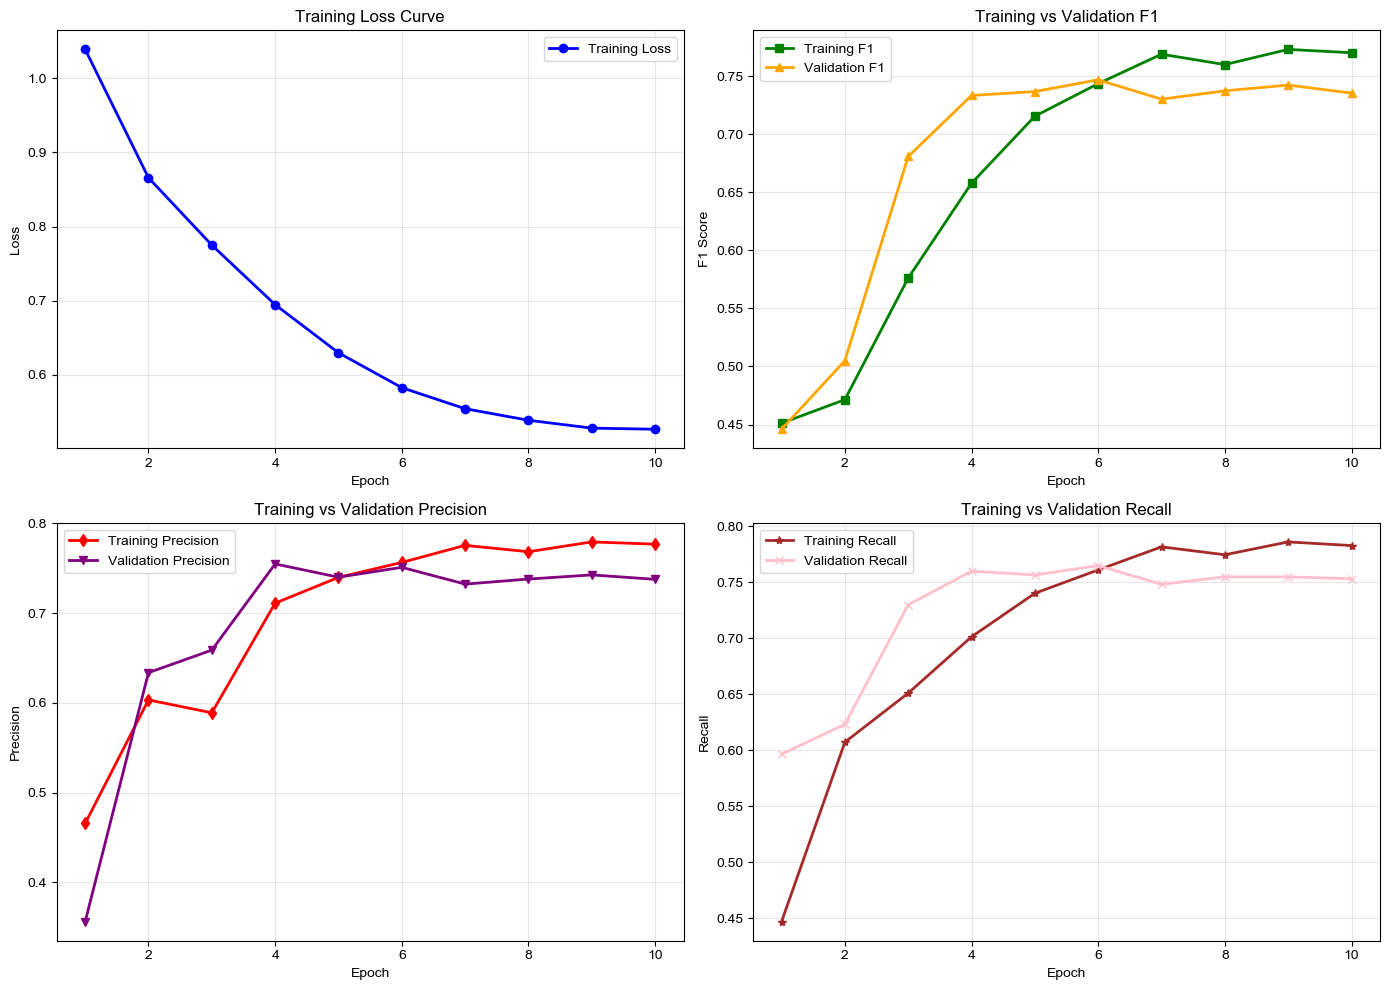

📈 训练曲线已保存至: /Users/creator/Desktop/project5/training_curves_exp_acc1eae9.png
✅ Bad Case分析已保存至: /Users/creator/Desktop/project5/bad_cases_exp_acc1eae9.txt

🔍 Bad Case分析 (共1654个错误案例)
📊 错误类型分布:
  negative->positive: 741 ( 44.8%)
  neutral->positive: 411 ( 24.8%)
  positive->negative: 299 ( 18.1%)
  neutral->negative: 137 (  8.3%)
  positive->neutral:  44 (  2.7%)
  negative->neutral:  22 (  1.3%)

📊 错误案例置信度分析:
  平均置信度: 0.585
  最低置信度: 0.348
  最高置信度: 0.991

🔍 典型错误案例 (前20个):
------------------------------------------------------------
 1. GUID: 1288
   文本: RT DanielGennaoui 8 pictures taken a second away from disaster pictures amazing crazy
   真实: negative, 预测: positive
   置信度: 0.991
   概率分布: pos=0.991, neu=0.003, neg=0.006
----------------------------------------
 2. GUID: 1288
   文本: RT DanielGennaoui 8 pictures taken a second away from disaster pictures amazing crazy
   真实: negative, 预测: positive
   置信度: 0.991
   概率分布: pos=0.991, neu=0.003, neg=0.006
--------------------------------------

预测: 100%|█████████████████████████████████████| 16/16 [00:07<00:00,  2.22it/s]



9️⃣ 分析预测结果...

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_exp_acc1eae9_20260127_211608.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_exp_acc1eae9_20260127_211608.json

试验 2/3
🔬 实验配置
  model_name          : openai/clip-vit-base-patch32
  image_size          : 224
  batch_size          : 8
  learning_rate       : 0.0003
  num_epochs          : 10
  dropout_rate        : 0.2
  weight_decay        : 0.01
  fusion_strategy     : attention
  use_balanced_loss   : True
  use_augmentation    : False
  validation_split    : 0.15
  random_seed         : 42
  patience            : 5
  experiment_id       : exp_5afe9bb6

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集分析:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 0.0%
  平均长度: 14.5 单词
📝 准备val数据集...
📊 val数据集分析:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 3.0%
  平均长度: 13.2 单词
📝 准备test数据集...
📊 test数据集分析:
  positive  :    0 (  0.0%)
  neutral   :    0 (  0.0%)
  negative  :    0 (  0.0%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 5.0%
  平均长度: 12.3 单词

5️⃣ 创建数据加载器...
训练批次: 425
验证批次: 75
测试批次: 64

6️⃣ 创建增强版CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
🔀 使用融合策略: attention
📊 模型参数:
  总参数: 152,331,524
  可训练参数: 1,054,211 (0.7%)

7️⃣ 训练模型...
📊 计算平衡的类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.5197523236274719]
📊 使用平衡的类别权重: [0.25962015986442566, 2.220627

训练 Epoch 1: 100%|███| 425/425 [00:48<00:00,  8.83it/s, loss=0.919, lr=0.00015]


📊 训练集 - Loss: 1.0885, F1: 0.4795, Acc: 0.4665
       Precision: 0.4969, Recall: 0.4665


验证 Epoch 1: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.40it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.7944    0.6369    0.7070       358
     neutral     0.3086    0.3968    0.3472        63
    negative     0.5345    0.6927    0.6034       179

    accuracy                         0.6283       600
   macro avg     0.5458    0.5755    0.5525       600
weighted avg     0.6659    0.6283    0.6383       600

📊 验证集 - F1: 0.6383, Acc: 0.6283
       Precision: 0.6659, Recall: 0.6283
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_5afe9bb6.pth
✨ 验证集F1: 0.6383, Acc: 0.6283

Epoch 2/10


训练 Epoch 2: 100%|█████| 425/425 [00:49<00:00,  8.55it/s, loss=1.57, lr=0.0003]


📊 训练集 - Loss: 0.9413, F1: 0.6349, Acc: 0.6279
       Precision: 0.6463, Recall: 0.6279


验证 Epoch 2: 100%|█████████████████████████████| 75/75 [00:09<00:00,  8.13it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8758    0.3939    0.5434       358
     neutral     0.2353    0.5714    0.3333        63
    negative     0.4965    0.7933    0.6108       179

    accuracy                         0.5317       600
   macro avg     0.5359    0.5862    0.4958       600
weighted avg     0.6954    0.5317    0.5414       600

📊 验证集 - F1: 0.5414, Acc: 0.5317
       Precision: 0.6954, Recall: 0.5317
⚠️  1个epoch未显著提升

Epoch 3/10


训练 Epoch 3: 100%|███| 425/425 [00:50<00:00,  8.43it/s, loss=1.03, lr=0.000289]


📊 训练集 - Loss: 0.8544, F1: 0.6801, Acc: 0.6700
       Precision: 0.7025, Recall: 0.6700


验证 Epoch 3: 100%|█████████████████████████████| 75/75 [00:09<00:00,  8.26it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.8511    0.6704    0.7500       358
     neutral     0.2903    0.4286    0.3462        63
    negative     0.6000    0.7542    0.6683       179

    accuracy                         0.6700       600
   macro avg     0.5805    0.6177    0.5882       600
weighted avg     0.7173    0.6700    0.6832       600

📊 验证集 - F1: 0.6832, Acc: 0.6700
       Precision: 0.7173, Recall: 0.6700
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_5afe9bb6.pth
✨ 验证集F1: 0.6832, Acc: 0.6700

Epoch 4/10


训练 Epoch 4: 100%|██| 425/425 [00:50<00:00,  8.46it/s, loss=0.184, lr=0.000256]


📊 训练集 - Loss: 0.7382, F1: 0.7216, Acc: 0.7135
       Precision: 0.7406, Recall: 0.7135


验证 Epoch 4: 100%|█████████████████████████████| 75/75 [00:09<00:00,  8.21it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8554    0.5950    0.7018       358
     neutral     0.3093    0.4762    0.3750        63
    negative     0.5354    0.7598    0.6282       179

    accuracy                         0.6317       600
   macro avg     0.5667    0.6103    0.5683       600
weighted avg     0.7026    0.6317    0.6455       600

📊 验证集 - F1: 0.6455, Acc: 0.6317
       Precision: 0.7026, Recall: 0.6317
⚠️  1个epoch未显著提升

Epoch 5/10


训练 Epoch 5: 100%|███| 425/425 [00:49<00:00,  8.52it/s, loss=2.86, lr=0.000207]


📊 训练集 - Loss: 0.6862, F1: 0.7554, Acc: 0.7503
       Precision: 0.7664, Recall: 0.7503


验证 Epoch 5: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.50it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8271    0.6816    0.7473       358
     neutral     0.2947    0.4444    0.3544        63
    negative     0.6095    0.7151    0.6581       179

    accuracy                         0.6667       600
   macro avg     0.5771    0.6137    0.5866       600
weighted avg     0.7063    0.6667    0.6794       600

📊 验证集 - F1: 0.6794, Acc: 0.6667
       Precision: 0.7063, Recall: 0.6667
⚠️  2个epoch未显著提升
📉 降低学习率: 2.07e-04 -> 1.04e-04

Epoch 6/10


训练 Epoch 6: 100%|███| 425/425 [00:50<00:00,  8.47it/s, loss=0.778, lr=0.00015]


📊 训练集 - Loss: 0.6058, F1: 0.7756, Acc: 0.7718
       Precision: 0.7848, Recall: 0.7718


验证 Epoch 6: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.39it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.8095    0.7123    0.7578       358
     neutral     0.3333    0.3492    0.3411        63
    negative     0.6073    0.7430    0.6683       179

    accuracy                         0.6833       600
   macro avg     0.5834    0.6015    0.5891       600
weighted avg     0.6992    0.6833    0.6874       600

📊 验证集 - F1: 0.6874, Acc: 0.6833
       Precision: 0.6992, Recall: 0.6833
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_5afe9bb6.pth
✨ 验证集F1: 0.6874, Acc: 0.6833

Epoch 7/10


训练 Epoch 7: 100%|███| 425/425 [00:51<00:00,  8.32it/s, loss=0.773, lr=9.26e-5]


📊 训练集 - Loss: 0.5429, F1: 0.8121, Acc: 0.8106
       Precision: 0.8150, Recall: 0.8106


验证 Epoch 7: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.65it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8071    0.7011    0.7504       358
     neutral     0.3295    0.4603    0.3841        63
    negative     0.6020    0.6760    0.6368       179

    accuracy                         0.6683       600
   macro avg     0.5795    0.6125    0.5904       600
weighted avg     0.6958    0.6683    0.6780       600

📊 验证集 - F1: 0.6780, Acc: 0.6683
       Precision: 0.6958, Recall: 0.6683
⚠️  1个epoch未显著提升

Epoch 8/10


训练 Epoch 8: 100%|███| 425/425 [00:50<00:00,  8.39it/s, loss=0.114, lr=4.39e-5]


📊 训练集 - Loss: 0.4727, F1: 0.8245, Acc: 0.8232
       Precision: 0.8271, Recall: 0.8232


验证 Epoch 8: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.75it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8012    0.7542    0.7770       358
     neutral     0.4118    0.3333    0.3684        63
    negative     0.6179    0.7318    0.6701       179

    accuracy                         0.7033       600
   macro avg     0.6103    0.6065    0.6052       600
weighted avg     0.7056    0.7033    0.7022       600

📊 验证集 - F1: 0.7022, Acc: 0.7033
       Precision: 0.7056, Recall: 0.7033
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_5afe9bb6.pth
✨ 验证集F1: 0.7022, Acc: 0.7033

Epoch 9/10


训练 Epoch 9: 100%|███| 425/425 [00:49<00:00,  8.52it/s, loss=0.169, lr=1.14e-5]


📊 训练集 - Loss: 0.4388, F1: 0.8542, Acc: 0.8529
       Precision: 0.8570, Recall: 0.8529


验证 Epoch 9: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.65it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8070    0.7709    0.7886       358
     neutral     0.4211    0.3810    0.4000        63
    negative     0.6418    0.7207    0.6789       179

    accuracy                         0.7150       600
   macro avg     0.6233    0.6242    0.6225       600
weighted avg     0.7172    0.7150    0.7151       600

📊 验证集 - F1: 0.7151, Acc: 0.7150
       Precision: 0.7172, Recall: 0.7150
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_5afe9bb6.pth
✨ 验证集F1: 0.7151, Acc: 0.7150

Epoch 10/10


训练 Epoch 10: 100%|████████| 425/425 [00:50<00:00,  8.42it/s, loss=0.292, lr=0]


📊 训练集 - Loss: 0.3987, F1: 0.8582, Acc: 0.8571
       Precision: 0.8605, Recall: 0.8571


验证 Epoch 10: 100%|████████████████████████████| 75/75 [00:08<00:00,  8.63it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8129    0.7402    0.7749       358
     neutral     0.3407    0.4921    0.4026        63
    negative     0.6557    0.6704    0.6630       179

    accuracy                         0.6933       600
   macro avg     0.6031    0.6342    0.6135       600
weighted avg     0.7164    0.6933    0.7024       600

📊 验证集 - F1: 0.7024, Acc: 0.6933
       Precision: 0.7164, Recall: 0.6933
⚠️  1个epoch未显著提升

✅ 加载最佳模型，验证集F1: 0.7151, Acc: 0.7150


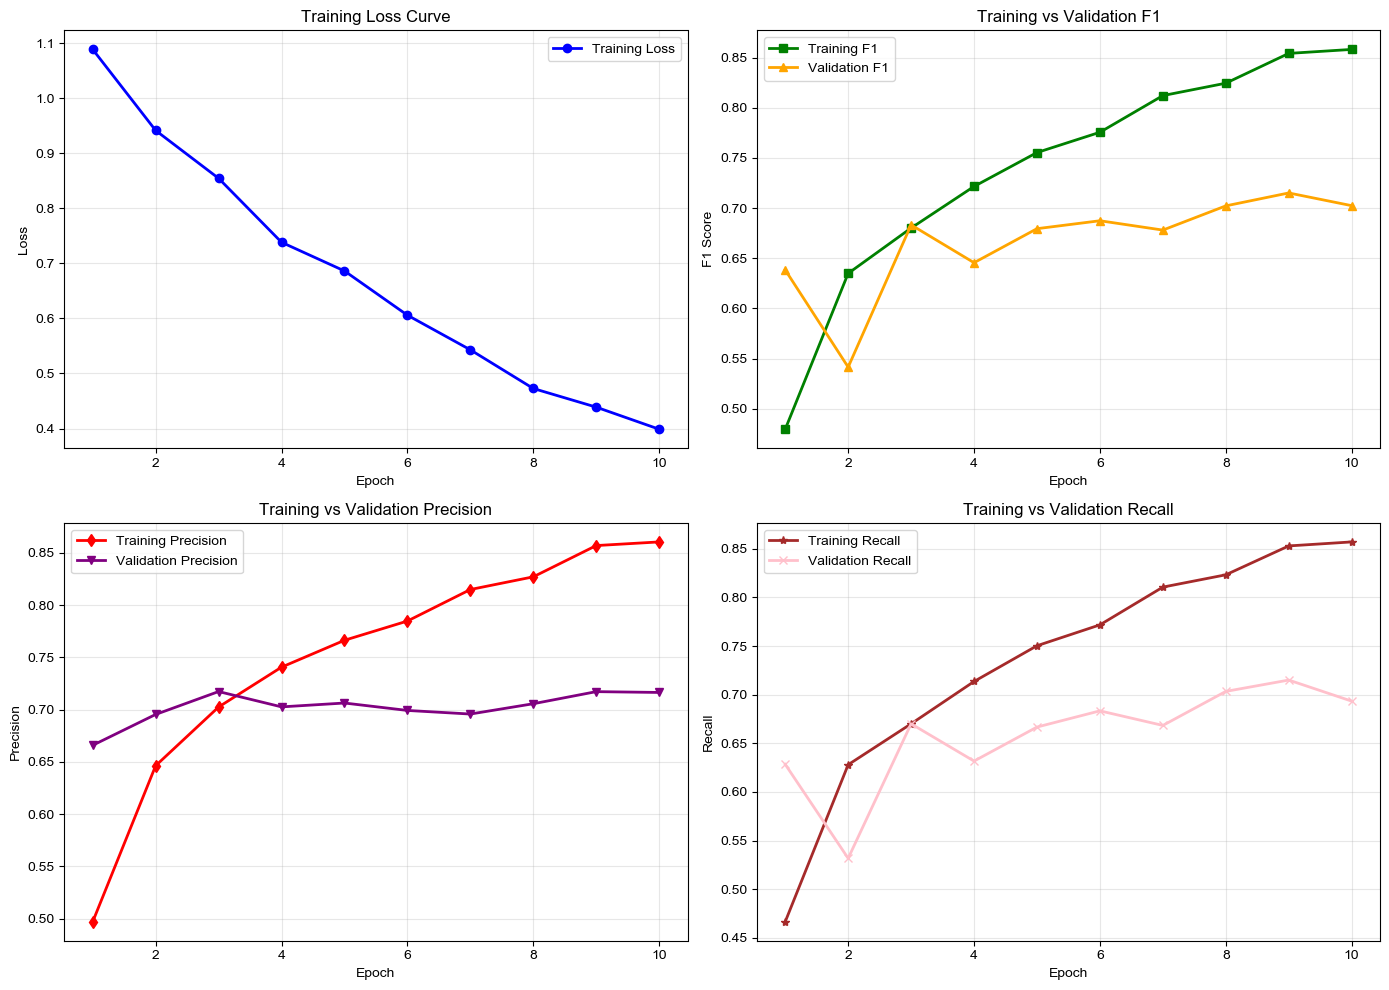

📈 训练曲线已保存至: /Users/creator/Desktop/project5/training_curves_exp_5afe9bb6.png
✅ Bad Case分析已保存至: /Users/creator/Desktop/project5/bad_cases_exp_5afe9bb6.txt

🔍 Bad Case分析 (共2045个错误案例)
📊 错误类型分布:
  positive->negative: 748 ( 36.6%)
  positive->neutral: 449 ( 22.0%)
  negative->positive: 341 ( 16.7%)
  neutral->positive: 181 (  8.9%)
  neutral->negative: 176 (  8.6%)
  negative->neutral: 150 (  7.3%)

📊 错误案例置信度分析:
  平均置信度: 0.666
  最低置信度: 0.335
  最高置信度: 1.000

🔍 典型错误案例 (前20个):
------------------------------------------------------------
 1. GUID: 509
   文本: I am powerful. Alcohol is powerless.
   真实: positive, 预测: neutral
   置信度: 1.000
   概率分布: pos=0.000, neu=1.000, neg=0.000
----------------------------------------
 2. GUID: 1288
   文本: RT DanielGennaoui 8 pictures taken a second away from disaster pictures amazing crazy
   真实: negative, 预测: positive
   置信度: 1.000
   概率分布: pos=1.000, neu=0.000, neg=0.000
----------------------------------------
 3. GUID: 1288
   文本: RT DanielGennaoui 8 pictur

预测: 100%|█████████████████████████████████████| 64/64 [00:07<00:00,  8.39it/s]



9️⃣ 分析预测结果...

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_exp_5afe9bb6_20260127_212628.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_exp_5afe9bb6_20260127_212628.json

试验 3/3
🔬 实验配置
  model_name          : openai/clip-vit-base-patch32
  image_size          : 224
  batch_size          : 8
  learning_rate       : 0.0001
  num_epochs          : 10
  dropout_rate        : 0.2
  weight_decay        : 0.01
  fusion_strategy     : late
  use_balanced_loss   : True
  use_augmentation    : True
  validation_split    : 0.15
  random_seed         : 42
  patience            : 5
  experiment_id       : exp_30e0f4f4

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集分析:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 0.0%
  平均长度: 14.5 单词
📝 准备val数据集...
📊 val数据集分析:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 3.0%
  平均长度: 13.2 单词
📝 准备test数据集...
📊 test数据集分析:
  positive  :    0 (  0.0%)
  neutral   :    0 (  0.0%)
  negative  :    0 (  0.0%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 5.0%
  平均长度: 12.3 单词

5️⃣ 创建数据加载器...
训练批次: 425
验证批次: 75
测试批次: 64

6️⃣ 创建增强版CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
🔀 使用融合策略: late
📊 模型参数:
  总参数: 152,593,668
  可训练参数: 1,316,355 (0.9%)

7️⃣ 训练模型...
📊 计算平衡的类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.5197523236274719]
📊 使用平衡的类别权重: [0.25962015986442566, 2.22062754631

训练 Epoch 1: 100%|███████| 425/425 [00:47<00:00,  8.92it/s, loss=1.29, lr=5e-5]


📊 训练集 - Loss: 1.0829, F1: 0.4565, Acc: 0.4291
       Precision: 0.5260, Recall: 0.4291


验证 Epoch 1: 100%|█████████████████████████████| 75/75 [00:08<00:00,  9.02it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.7508    0.6983    0.7236       358
     neutral     0.3235    0.1746    0.2268        63
    negative     0.5021    0.6536    0.5680       179

    accuracy                         0.6300       600
   macro avg     0.5255    0.5089    0.5061       600
weighted avg     0.6317    0.6300    0.6250       600

📊 验证集 - F1: 0.6250, Acc: 0.6300
       Precision: 0.6317, Recall: 0.6300
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.6250, Acc: 0.6300

Epoch 2/10


训练 Epoch 2: 100%|████| 425/425 [00:50<00:00,  8.45it/s, loss=0.704, lr=0.0001]


📊 训练集 - Loss: 0.9529, F1: 0.6384, Acc: 0.6306
       Precision: 0.6510, Recall: 0.6306


验证 Epoch 2: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.37it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8267    0.8128    0.8197       358
     neutral     0.3971    0.4286    0.4122        63
    negative     0.7056    0.7095    0.7075       179

    accuracy                         0.7417       600
   macro avg     0.6431    0.6503    0.6465       600
weighted avg     0.7454    0.7417    0.7435       600

📊 验证集 - F1: 0.7435, Acc: 0.7417
       Precision: 0.7454, Recall: 0.7417
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7435, Acc: 0.7417

Epoch 3/10


训练 Epoch 3: 100%|███| 425/425 [00:52<00:00,  8.15it/s, loss=0.713, lr=9.62e-5]


📊 训练集 - Loss: 0.8282, F1: 0.6855, Acc: 0.6782
       Precision: 0.6965, Recall: 0.6782


验证 Epoch 3: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.45it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.8975    0.7095    0.7925       358
     neutral     0.3426    0.5873    0.4327        63
    negative     0.6746    0.7877    0.7268       179

    accuracy                         0.7200       600
   macro avg     0.6383    0.6948    0.6507       600
weighted avg     0.7728    0.7200    0.7351       600

📊 验证集 - F1: 0.7351, Acc: 0.7200
       Precision: 0.7728, Recall: 0.7200
⚠️  1个epoch未显著提升

Epoch 4/10


训练 Epoch 4: 100%|███| 425/425 [00:53<00:00,  7.99it/s, loss=0.395, lr=8.54e-5]


📊 训练集 - Loss: 0.7223, F1: 0.7312, Acc: 0.7235
       Precision: 0.7445, Recall: 0.7235


验证 Epoch 4: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.58it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8810    0.7654    0.8191       358
     neutral     0.3929    0.5238    0.4490        63
    negative     0.6780    0.7765    0.7240       179

    accuracy                         0.7433       600
   macro avg     0.6506    0.6886    0.6640       600
weighted avg     0.7692    0.7433    0.7519       600

📊 验证集 - F1: 0.7519, Acc: 0.7433
       Precision: 0.7692, Recall: 0.7433
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7519, Acc: 0.7433

Epoch 5/10


训练 Epoch 5: 100%|███| 425/425 [00:56<00:00,  7.47it/s, loss=0.742, lr=6.91e-5]


📊 训练集 - Loss: 0.6238, F1: 0.7687, Acc: 0.7653
       Precision: 0.7749, Recall: 0.7653


验证 Epoch 5: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.45it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8976    0.7346    0.8080       358
     neutral     0.3662    0.4127    0.3881        63
    negative     0.6356    0.8380    0.7229       179

    accuracy                         0.7317       600
   macro avg     0.6331    0.6618    0.6396       600
weighted avg     0.7636    0.7317    0.7385       600

📊 验证集 - F1: 0.7385, Acc: 0.7317
       Precision: 0.7636, Recall: 0.7317
⚠️  1个epoch未显著提升

Epoch 6/10


训练 Epoch 6: 100%|██████| 425/425 [00:53<00:00,  7.96it/s, loss=0.622, lr=5e-5]


📊 训练集 - Loss: 0.5615, F1: 0.7839, Acc: 0.7803
       Precision: 0.7914, Recall: 0.7803


验证 Epoch 6: 100%|█████████████████████████████| 75/75 [00:08<00:00,  8.43it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.8726    0.7654    0.8155       358
     neutral     0.3797    0.4762    0.4225        63
    negative     0.6812    0.7877    0.7306       179

    accuracy                         0.7417       600
   macro avg     0.6445    0.6764    0.6562       600
weighted avg     0.7637    0.7417    0.7489       600

📊 验证集 - F1: 0.7489, Acc: 0.7417
       Precision: 0.7637, Recall: 0.7417
⚠️  2个epoch未显著提升
📉 降低学习率: 5.00e-05 -> 2.50e-05

Epoch 7/10


训练 Epoch 7: 100%|████| 425/425 [00:52<00:00,  8.14it/s, loss=1.32, lr=3.09e-5]


📊 训练集 - Loss: 0.5183, F1: 0.8109, Acc: 0.8079
       Precision: 0.8167, Recall: 0.8079


验证 Epoch 7: 100%|█████████████████████████████| 75/75 [00:12<00:00,  6.14it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8800    0.7989    0.8375       358
     neutral     0.3947    0.4762    0.4317        63
    negative     0.7136    0.7933    0.7513       179

    accuracy                         0.7633       600
   macro avg     0.6628    0.6895    0.6735       600
weighted avg     0.7794    0.7633    0.7692       600

📊 验证集 - F1: 0.7692, Acc: 0.7633
       Precision: 0.7794, Recall: 0.7633
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7692, Acc: 0.7633

Epoch 8/10


训练 Epoch 8: 100%|███| 425/425 [00:53<00:00,  7.89it/s, loss=0.574, lr=1.46e-5]


📊 训练集 - Loss: 0.4564, F1: 0.8203, Acc: 0.8179
       Precision: 0.8254, Recall: 0.8179


验证 Epoch 8: 100%|█████████████████████████████| 75/75 [00:09<00:00,  7.85it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8804    0.8017    0.8392       358
     neutral     0.3860    0.3492    0.3667        63
    negative     0.6820    0.8268    0.7475       179

    accuracy                         0.7617       600
   macro avg     0.6495    0.6592    0.6511       600
weighted avg     0.7693    0.7617    0.7622       600

📊 验证集 - F1: 0.7622, Acc: 0.7617
       Precision: 0.7693, Recall: 0.7617
⚠️  1个epoch未显著提升

Epoch 9/10


训练 Epoch 9: 100%|███| 425/425 [00:56<00:00,  7.47it/s, loss=0.633, lr=3.81e-6]


📊 训练集 - Loss: 0.4597, F1: 0.8251, Acc: 0.8235
       Precision: 0.8278, Recall: 0.8235


验证 Epoch 9: 100%|█████████████████████████████| 75/75 [00:10<00:00,  7.42it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8735    0.7905    0.8299       358
     neutral     0.3553    0.4286    0.3885        63
    negative     0.6950    0.7765    0.7335       179

    accuracy                         0.7483       600
   macro avg     0.6412    0.6652    0.6506       600
weighted avg     0.7658    0.7483    0.7548       600

📊 验证集 - F1: 0.7548, Acc: 0.7483
       Precision: 0.7658, Recall: 0.7483
⚠️  2个epoch未显著提升
📉 降低学习率: 3.81e-06 -> 1.90e-06

Epoch 10/10


训练 Epoch 10: 100%|████████| 425/425 [00:55<00:00,  7.72it/s, loss=0.336, lr=0]


📊 训练集 - Loss: 0.4292, F1: 0.8440, Acc: 0.8429
       Precision: 0.8461, Recall: 0.8429


验证 Epoch 10: 100%|████████████████████████████| 75/75 [00:09<00:00,  7.71it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8711    0.7737    0.8195       358
     neutral     0.3444    0.4921    0.4052        63
    negative     0.7188    0.7709    0.7439       179

    accuracy                         0.7433       600
   macro avg     0.6448    0.6789    0.6562       600
weighted avg     0.7703    0.7433    0.7535       600

📊 验证集 - F1: 0.7535, Acc: 0.7433
       Precision: 0.7703, Recall: 0.7433
⚠️  3个epoch未显著提升
📉 降低学习率: 0.00e+00 -> 0.00e+00

✅ 加载最佳模型，验证集F1: 0.7692, Acc: 0.7633


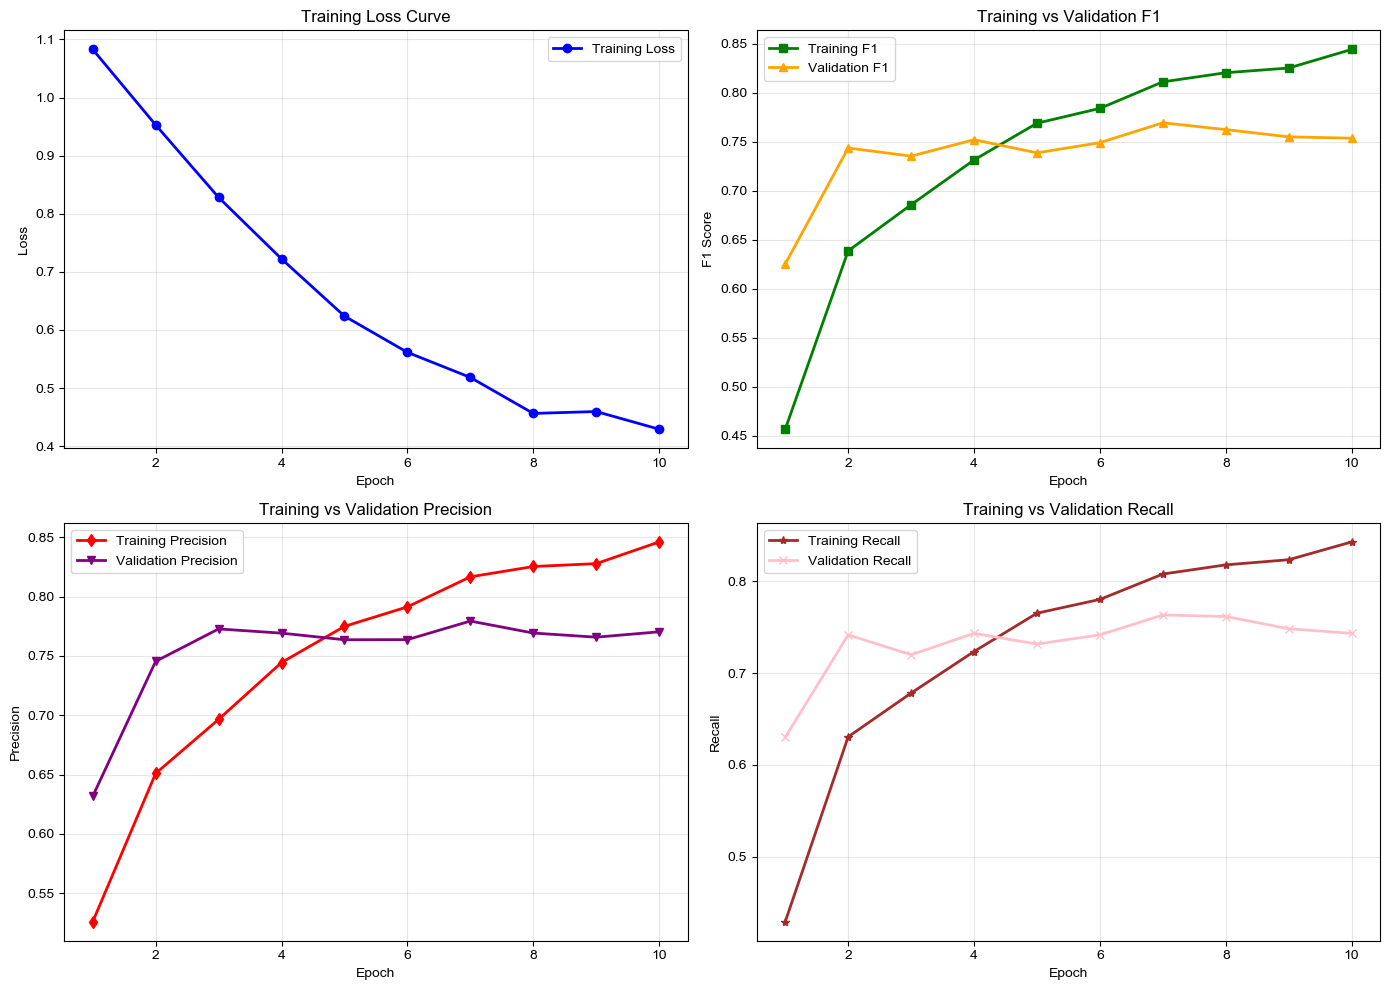

📈 训练曲线已保存至: /Users/creator/Desktop/project5/training_curves_exp_30e0f4f4.png
✅ Bad Case分析已保存至: /Users/creator/Desktop/project5/bad_cases_exp_30e0f4f4.txt

🔍 Bad Case分析 (共1605个错误案例)
📊 错误类型分布:
  positive->negative: 500 ( 31.2%)
  positive->neutral: 341 ( 21.2%)
  negative->positive: 280 ( 17.4%)
  neutral->negative: 196 ( 12.2%)
  neutral->positive: 160 ( 10.0%)
  negative->neutral: 128 (  8.0%)

📊 错误案例置信度分析:
  平均置信度: 0.624
  最低置信度: 0.341
  最高置信度: 0.997

🔍 典型错误案例 (前20个):
------------------------------------------------------------
 1. GUID: 1053
   文本: headphone Series I was totally taken aback with the excellent quality that these headpho
   真实: positive, 预测: neutral
   置信度: 0.997
   概率分布: pos=0.003, neu=0.997, neg=0.000
----------------------------------------
 2. GUID: 1688
   文本: damaged fences do not always need replacing concrete fence bolt on supports often suffice
   真实: positive, 预测: negative
   置信度: 0.996
   概率分布: pos=0.003, neu=0.001, neg=0.996
--------------------------------

预测: 100%|█████████████████████████████████████| 64/64 [00:07<00:00,  8.20it/s]



9️⃣ 分析预测结果...

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_exp_30e0f4f4_20260127_213727.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_exp_30e0f4f4_20260127_213727.json

📊 参数调整结果比较:

📈 实验比较
            实验名称      融合策略    学习率   最佳验证F1  最佳验证准确率  训练样本数  验证样本数                 时间戳
     Trial3_late      late 0.0001 0.769166 0.763333   3400    600 2026-01-27 21:37:27
Trial1_attention attention 0.0001 0.746814 0.765000   3400    600 2026-01-27 21:16:08
Trial2_attention attention 0.0003 0.715067 0.715000   3400    600 2026-01-27 21:26:28


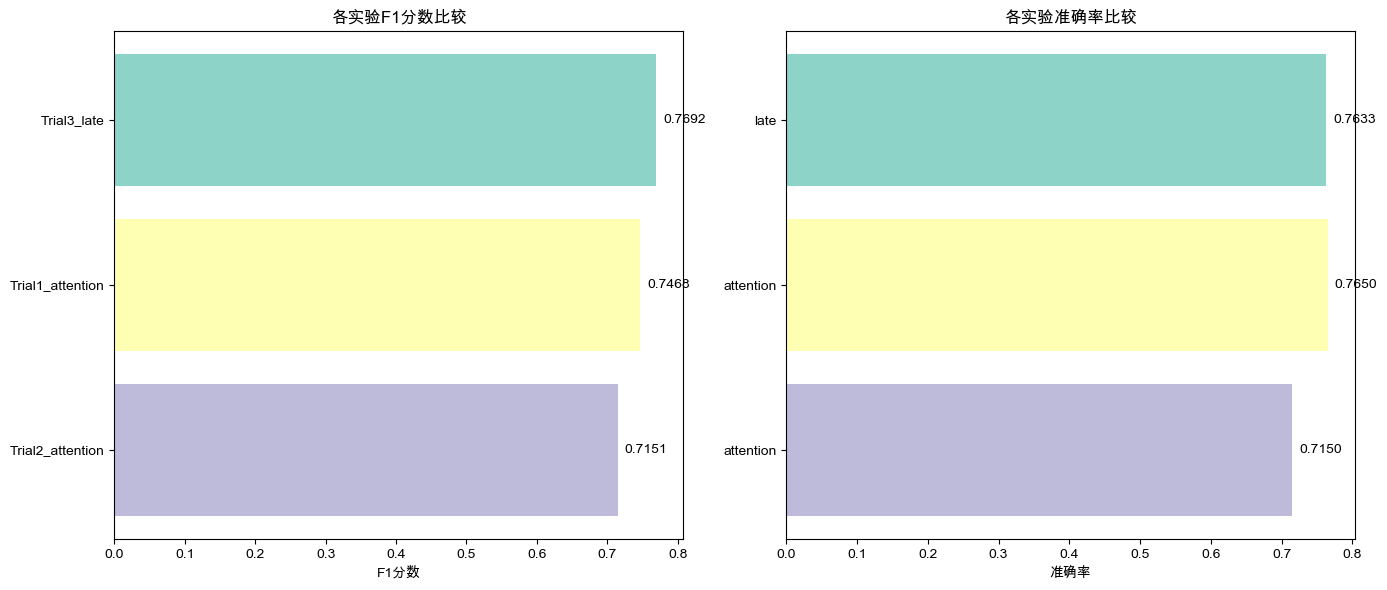


🏆 最佳配置:
🔬 实验配置
  model_name          : openai/clip-vit-base-patch32
  image_size          : 224
  batch_size          : 8
  learning_rate       : 0.0001
  num_epochs          : 10
  dropout_rate        : 0.2
  weight_decay        : 0.01
  fusion_strategy     : late
  use_balanced_loss   : True
  use_augmentation    : True
  validation_split    : 0.15
  random_seed         : 42
  patience            : 5
  experiment_id       : exp_30e0f4f4
最佳验证F1: 0.7692

🎯 使用最佳配置进行完整训练...

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集分析:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 0.0%
  平均长度: 14.5 单词
📝 准备val数据集...
📊 val数据集分析:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 3.0%
  平均长度: 13.2 单词
📝 准备test数据集...
📊 test数据集分析:
  positive  :    0 (  0.0%)
  neutral   :    0 (  0.0%)
  negative  :    0 (  0.0%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 5.0%
  平均长度: 12.3 单词

5️⃣ 创建数据加载器...
训练批次: 425
验证批次: 75
测试批次: 64

6️⃣ 创建增强版CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
🔀 使用融合策略: late
📊 模型参数:
  总参数: 152,593,668
  可训练参数: 1,316,355 (0.9%)

7️⃣ 训练模型...
📊 计算平衡的类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.5197523236274719]
📊 使用平衡的类别权重: [0.25962015986442566, 2.22062754631

训练 Epoch 1: 100%|███████| 425/425 [00:55<00:00,  7.70it/s, loss=1.08, lr=5e-5]


📊 训练集 - Loss: 1.0844, F1: 0.4083, Acc: 0.3682
       Precision: 0.5070, Recall: 0.3682


验证 Epoch 1: 100%|█████████████████████████████| 75/75 [00:09<00:00,  7.51it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.7338    0.8240    0.7763       358
     neutral     0.4500    0.1429    0.2169        63
    negative     0.5899    0.5866    0.5882       179

    accuracy                         0.6817       600
   macro avg     0.5912    0.5178    0.5271       600
weighted avg     0.6611    0.6817    0.6615       600

📊 验证集 - F1: 0.6615, Acc: 0.6817
       Precision: 0.6611, Recall: 0.6817
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.6615, Acc: 0.6817

Epoch 2/15


训练 Epoch 2: 100%|█████| 425/425 [00:57<00:00,  7.40it/s, loss=1.06, lr=0.0001]


📊 训练集 - Loss: 0.9649, F1: 0.6236, Acc: 0.6203
       Precision: 0.6316, Recall: 0.6203


验证 Epoch 2: 100%|█████████████████████████████| 75/75 [00:10<00:00,  7.09it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8959    0.6732    0.7687       358
     neutral     0.3426    0.5873    0.4327        63
    negative     0.6457    0.8045    0.7164       179

    accuracy                         0.7033       600
   macro avg     0.6281    0.6883    0.6393       600
weighted avg     0.7632    0.7033    0.7179       600

📊 验证集 - F1: 0.7179, Acc: 0.7033
       Precision: 0.7632, Recall: 0.7033
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7179, Acc: 0.7033

Epoch 3/15


训练 Epoch 3: 100%|███| 425/425 [00:57<00:00,  7.40it/s, loss=0.369, lr=9.85e-5]


📊 训练集 - Loss: 0.7981, F1: 0.6872, Acc: 0.6774
       Precision: 0.7049, Recall: 0.6774


验证 Epoch 3: 100%|█████████████████████████████| 75/75 [00:10<00:00,  6.84it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.9237    0.6760    0.7806       358
     neutral     0.3413    0.6825    0.4550        63
    negative     0.6651    0.7877    0.7212       179

    accuracy                         0.7100       600
   macro avg     0.6433    0.7154    0.6523       600
weighted avg     0.7854    0.7100    0.7287       600

📊 验证集 - F1: 0.7287, Acc: 0.7100
       Precision: 0.7854, Recall: 0.7100
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7287, Acc: 0.7100

Epoch 4/15


训练 Epoch 4: 100%|███| 425/425 [00:55<00:00,  7.65it/s, loss=0.732, lr=9.43e-5]


📊 训练集 - Loss: 0.7195, F1: 0.7221, Acc: 0.7147
       Precision: 0.7363, Recall: 0.7147


验证 Epoch 4: 100%|█████████████████████████████| 75/75 [00:09<00:00,  8.12it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.9051    0.7458    0.8178       358
     neutral     0.4557    0.5714    0.5070        63
    negative     0.6770    0.8547    0.7556       179

    accuracy                         0.7600       600
   macro avg     0.6793    0.7240    0.6935       600
weighted avg     0.7899    0.7600    0.7666       600

📊 验证集 - F1: 0.7666, Acc: 0.7600
       Precision: 0.7899, Recall: 0.7600
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7666, Acc: 0.7600

Epoch 5/15


训练 Epoch 5: 100%|████| 425/425 [00:56<00:00,  7.48it/s, loss=1.11, lr=8.74e-5]


📊 训练集 - Loss: 0.6234, F1: 0.7660, Acc: 0.7615
       Precision: 0.7746, Recall: 0.7615


验证 Epoch 5: 100%|█████████████████████████████| 75/75 [00:09<00:00,  7.68it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8882    0.7765    0.8286       358
     neutral     0.4000    0.5714    0.4706        63
    negative     0.7310    0.8045    0.7660       179

    accuracy                         0.7633       600
   macro avg     0.6730    0.7175    0.6884       600
weighted avg     0.7900    0.7633    0.7723       600

📊 验证集 - F1: 0.7723, Acc: 0.7633
       Precision: 0.7900, Recall: 0.7633
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_30e0f4f4.pth
✨ 验证集F1: 0.7723, Acc: 0.7633

Epoch 6/15


训练 Epoch 6: 100%|███| 425/425 [00:56<00:00,  7.52it/s, loss=0.421, lr=7.84e-5]


📊 训练集 - Loss: 0.5533, F1: 0.7912, Acc: 0.7882
       Precision: 0.7974, Recall: 0.7882


验证 Epoch 6: 100%|█████████████████████████████| 75/75 [00:09<00:00,  7.60it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.9194    0.7011    0.7956       358
     neutral     0.3714    0.6190    0.4643        63
    negative     0.6667    0.8268    0.7382       179

    accuracy                         0.7300       600
   macro avg     0.6525    0.7157    0.6660       600
weighted avg     0.7865    0.7300    0.7437       600

📊 验证集 - F1: 0.7437, Acc: 0.7300
       Precision: 0.7865, Recall: 0.7300
⚠️  1个epoch未显著提升

Epoch 7/15


训练 Epoch 7: 100%|███| 425/425 [00:56<00:00,  7.57it/s, loss=0.244, lr=6.77e-5]


📊 训练集 - Loss: 0.5171, F1: 0.8169, Acc: 0.8147
       Precision: 0.8209, Recall: 0.8147


验证 Epoch 7: 100%|█████████████████████████████| 75/75 [00:09<00:00,  7.63it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8663    0.7961    0.8297       358
     neutral     0.4054    0.4762    0.4380        63
    negative     0.7005    0.7709    0.7340       179

    accuracy                         0.7550       600
   macro avg     0.6574    0.6811    0.6672       600
weighted avg     0.7684    0.7550    0.7600       600

📊 验证集 - F1: 0.7600, Acc: 0.7550
       Precision: 0.7684, Recall: 0.7550
⚠️  2个epoch未显著提升

Epoch 8/15


训练 Epoch 8: 100%|████| 425/425 [01:01<00:00,  6.91it/s, loss=0.492, lr=5.6e-5]


📊 训练集 - Loss: 0.4872, F1: 0.8205, Acc: 0.8188
       Precision: 0.8236, Recall: 0.8188


验证 Epoch 8: 100%|█████████████████████████████| 75/75 [00:10<00:00,  7.35it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8673    0.7849    0.8240       358
     neutral     0.4217    0.5556    0.4795        63
    negative     0.7150    0.7709    0.7419       179

    accuracy                         0.7567       600
   macro avg     0.6680    0.7038    0.6818       600
weighted avg     0.7751    0.7567    0.7634       600

📊 验证集 - F1: 0.7634, Acc: 0.7567
       Precision: 0.7751, Recall: 0.7567
⚠️  3个epoch未显著提升

Epoch 9/15


训练 Epoch 9: 100%|████| 425/425 [01:03<00:00,  6.71it/s, loss=0.867, lr=4.4e-5]


📊 训练集 - Loss: 0.4157, F1: 0.8476, Acc: 0.8471
       Precision: 0.8484, Recall: 0.8471


验证 Epoch 9: 100%|█████████████████████████████| 75/75 [00:10<00:00,  7.18it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8794    0.7737    0.8232       358
     neutral     0.4342    0.5238    0.4748        63
    negative     0.6746    0.7877    0.7268       179

    accuracy                         0.7517       600
   macro avg     0.6627    0.6951    0.6749       600
weighted avg     0.7715    0.7517    0.7578       600

📊 验证集 - F1: 0.7578, Acc: 0.7517
       Precision: 0.7715, Recall: 0.7517
⚠️  4个epoch未显著提升

Epoch 10/15


训练 Epoch 10: 100%|██| 425/425 [01:02<00:00,  6.83it/s, loss=0.471, lr=3.23e-5]


📊 训练集 - Loss: 0.3978, F1: 0.8597, Acc: 0.8588
       Precision: 0.8615, Recall: 0.8588


验证 Epoch 10: 100%|████████████████████████████| 75/75 [00:10<00:00,  7.01it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8693    0.7430    0.8012       358
     neutral     0.3750    0.4762    0.4196        63
    negative     0.6542    0.7821    0.7125       179

    accuracy                         0.7267       600
   macro avg     0.6328    0.6671    0.6444       600
weighted avg     0.7532    0.7267    0.7347       600

📊 验证集 - F1: 0.7347, Acc: 0.7267
       Precision: 0.7532, Recall: 0.7267
⚠️  5个epoch未显著提升
📉 降低学习率: 3.23e-05 -> 1.61e-05

Epoch 11/15


训练 Epoch 11: 100%|█| 425/425 [01:03<00:00,  6.65it/s, loss=0.0407, lr=2.16e-5]


📊 训练集 - Loss: 0.3944, F1: 0.8573, Acc: 0.8568
       Precision: 0.8581, Recall: 0.8568


验证 Epoch 11: 100%|████████████████████████████| 75/75 [00:11<00:00,  6.40it/s]



📋 验证集分类报告 (Epoch 11):
              precision    recall  f1-score   support

    positive     0.8709    0.8101    0.8394       358
     neutral     0.4426    0.4286    0.4355        63
    negative     0.6845    0.7877    0.7325       179

    accuracy                         0.7633       600
   macro avg     0.6660    0.6754    0.6691       600
weighted avg     0.7703    0.7633    0.7651       600

📊 验证集 - F1: 0.7651, Acc: 0.7633
       Precision: 0.7703, Recall: 0.7633
⚠️  6个epoch未显著提升
📉 降低学习率: 2.16e-05 -> 1.08e-05

Epoch 12/15


训练 Epoch 12: 100%|██| 425/425 [00:58<00:00,  7.28it/s, loss=0.327, lr=1.26e-5]


📊 训练集 - Loss: 0.3432, F1: 0.8627, Acc: 0.8621
       Precision: 0.8637, Recall: 0.8621


验证 Epoch 12: 100%|████████████████████████████| 75/75 [00:09<00:00,  7.79it/s]



📋 验证集分类报告 (Epoch 12):
              precision    recall  f1-score   support

    positive     0.8763    0.7318    0.7976       358
     neutral     0.3867    0.4603    0.4203        63
    negative     0.6327    0.7989    0.7062       179

    accuracy                         0.7233       600
   macro avg     0.6319    0.6637    0.6413       600
weighted avg     0.7522    0.7233    0.7307       600

📊 验证集 - F1: 0.7307, Acc: 0.7233
       Precision: 0.7522, Recall: 0.7233
⚠️  7个epoch未显著提升
📉 降低学习率: 1.26e-05 -> 6.29e-06

Epoch 13/15


训练 Epoch 13: 100%|██| 425/425 [00:58<00:00,  7.26it/s, loss=0.216, lr=5.73e-6]


📊 训练集 - Loss: 0.3393, F1: 0.8709, Acc: 0.8703
       Precision: 0.8719, Recall: 0.8703


验证 Epoch 13: 100%|████████████████████████████| 75/75 [00:09<00:00,  7.79it/s]



📋 验证集分类报告 (Epoch 13):
              precision    recall  f1-score   support

    positive     0.8598    0.7709    0.8130       358
     neutral     0.3788    0.3968    0.3876        63
    negative     0.6620    0.7877    0.7194       179

    accuracy                         0.7367       600
   macro avg     0.6335    0.6518    0.6400       600
weighted avg     0.7503    0.7367    0.7404       600

📊 验证集 - F1: 0.7404, Acc: 0.7367
       Precision: 0.7503, Recall: 0.7367
⚠️  8个epoch未显著提升
📉 降低学习率: 5.73e-06 -> 2.86e-06

Epoch 14/15


训练 Epoch 14: 100%|█| 425/425 [00:55<00:00,  7.60it/s, loss=0.0401, lr=1.45e-6]


📊 训练集 - Loss: 0.3174, F1: 0.8848, Acc: 0.8844
       Precision: 0.8856, Recall: 0.8844


验证 Epoch 14: 100%|████████████████████████████| 75/75 [00:09<00:00,  7.81it/s]



📋 验证集分类报告 (Epoch 14):
              precision    recall  f1-score   support

    positive     0.8638    0.7793    0.8194       358
     neutral     0.3968    0.3968    0.3968        63
    negative     0.6636    0.7933    0.7226       179

    accuracy                         0.7433       600
   macro avg     0.6414    0.6565    0.6463       600
weighted avg     0.7550    0.7433    0.7462       600

📊 验证集 - F1: 0.7462, Acc: 0.7433
       Precision: 0.7550, Recall: 0.7433
⚠️  9个epoch未显著提升
📉 降低学习率: 1.45e-06 -> 7.26e-07

Epoch 15/15


训练 Epoch 15: 100%|███████| 425/425 [00:54<00:00,  7.76it/s, loss=0.0336, lr=0]


📊 训练集 - Loss: 0.3147, F1: 0.8815, Acc: 0.8812
       Precision: 0.8820, Recall: 0.8812


验证 Epoch 15: 100%|████████████████████████████| 75/75 [00:09<00:00,  8.09it/s]



📋 验证集分类报告 (Epoch 15):
              precision    recall  f1-score   support

    positive     0.8571    0.8045    0.8300       358
     neutral     0.4091    0.4286    0.4186        63
    negative     0.6919    0.7654    0.7268       179

    accuracy                         0.7533       600
   macro avg     0.6527    0.6661    0.6585       600
weighted avg     0.7608    0.7533    0.7560       600

📊 验证集 - F1: 0.7560, Acc: 0.7533
       Precision: 0.7608, Recall: 0.7533
⚠️  10个epoch未显著提升
📉 降低学习率: 0.00e+00 -> 0.00e+00
⏹️  早停触发！最佳验证F1: 0.7723, Acc: 0.7633

✅ 加载最佳模型，验证集F1: 0.7723, Acc: 0.7633


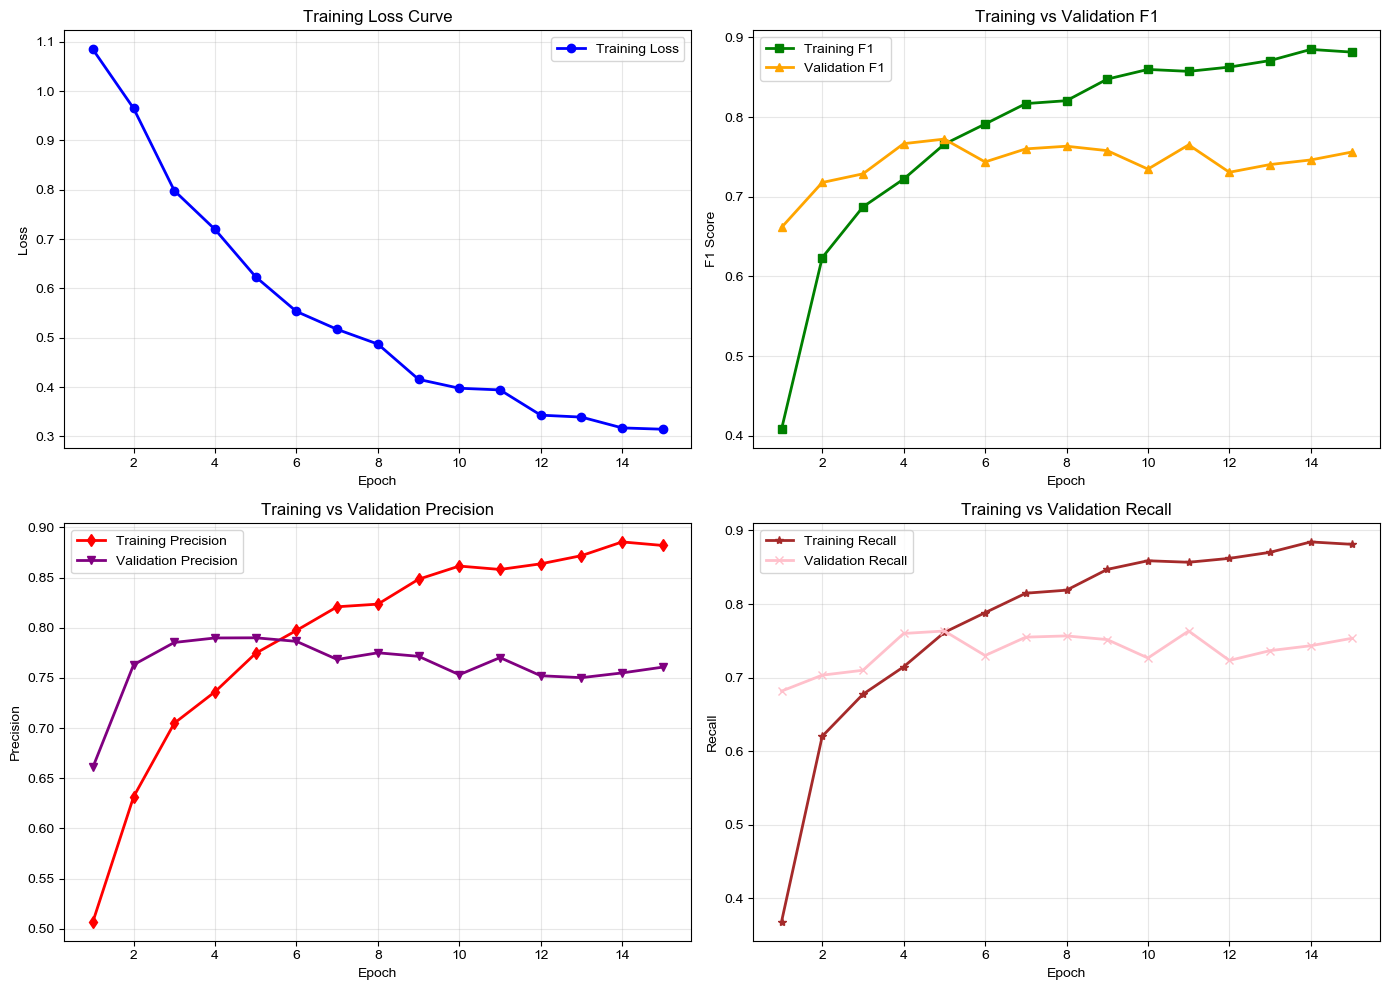

📈 训练曲线已保存至: /Users/creator/Desktop/project5/training_curves_exp_30e0f4f4.png
✅ Bad Case分析已保存至: /Users/creator/Desktop/project5/bad_cases_exp_30e0f4f4.txt

🔍 Bad Case分析 (共2365个错误案例)
📊 错误类型分布:
  positive->negative: 752 ( 31.8%)
  positive->neutral: 540 ( 22.8%)
  negative->positive: 418 ( 17.7%)
  neutral->negative: 280 ( 11.8%)
  neutral->positive: 204 (  8.6%)
  negative->neutral: 171 (  7.2%)

📊 错误案例置信度分析:
  平均置信度: 0.698
  最低置信度: 0.337
  最高置信度: 1.000

🔍 典型错误案例 (前20个):
------------------------------------------------------------
 1. GUID: 1311
   文本: damaged fences do not always need replacing concrete fence bolt on supports often suffice
   真实: positive, 预测: negative
   置信度: 1.000
   概率分布: pos=0.000, neu=0.000, neg=1.000
----------------------------------------
 2. GUID: 1688
   文本: damaged fences do not always need replacing concrete fence bolt on supports often suffice
   真实: positive, 预测: negative
   置信度: 1.000
   概率分布: pos=0.000, neu=0.000, neg=1.000
------------------------------

预测: 100%|█████████████████████████████████████| 64/64 [00:07<00:00,  8.40it/s]


9️⃣ 分析预测结果...

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_exp_30e0f4f4_20260127_215506.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_exp_30e0f4f4_20260127_215506.json

📁 最终结果文件:
  预测文件: /Users/creator/Desktop/project5/submission_exp_30e0f4f4_20260127_215506.txt
  最佳验证F1: 0.7723
  最佳验证准确率: 0.7633


In [12]:
# multimodal_fusion_model_clip_balanced_complete.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import CLIPProcessor, CLIPModel, get_cosine_schedule_with_warmup
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import json
import torchvision.transforms as transforms
import re
import random
import hashlib
from typing import Dict, List, Tuple, Any, Optional
from dataclasses import dataclass
import itertools
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
MODEL_SAVE_PATH = os.path.join(BASE_PATH, "best_model_clip_balanced.pth")

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 数据清洗器 ====================
class DataCleaner:
    """系统化的文本清洗器"""
    
    @staticmethod
    def clean_text(text: str, max_length: int = 512) -> str:
        """
        清洗文本：
        1. 移除特殊字符但保留情感相关标点
        2. 规范化空白字符
        3. 处理表情符号
        4. 截断过长的文本
        """
        if not isinstance(text, str):
            return "[EMPTY]"
        
        # 移除空文本
        if not text.strip():
            return "[EMPTY]"
        
        # 保留情感相关的标点（!?.,）
        text = re.sub(r'[^\w\s!?.,\'"-]', ' ', text)
        
        # 规范化空白字符
        text = ' '.join(text.split())
        
        # 处理常见的网络表情符号
        emoticon_patterns = {
            r':\)': ' [SMILE] ',
            r':\(': ' [SAD] ',
            r':D': ' [LAUGH] ',
            r';\)': ' [WINK] ',
            r':P': ' [TONGUE] ',
            r'<3': ' [HEART] ',
            r':O': ' [SURPRISE] '
        }
        
        for pattern, replacement in emoticon_patterns.items():
            text = re.sub(pattern, replacement, text)
        
        # 处理重复字符（如"soooo goooood" -> "so good"）
        text = re.sub(r'(.)\1{2,}', r'\1\1', text)
        
        # 保留前max_length个字符，但尽量不切断单词
        if len(text) > max_length:
            text = text[:max_length]
            # 找到最后一个空格来切断
            last_space = text.rfind(' ')
            if last_space > max_length * 0.8:
                text = text[:last_space]
        
        return text.strip()
    
    @staticmethod
    def analyze_text_quality(texts: List[str]) -> Dict[str, Any]:
        """分析文本质量"""
        stats = {
            'total': len(texts),
            'empty_count': sum(1 for t in texts if not t.strip() or t == "[EMPTY]"),
            'short_count': sum(1 for t in texts if len(t.split()) < 3),
            'long_count': sum(1 for t in texts if len(t.split()) > 100),
            'avg_length': np.mean([len(t.split()) for t in texts if t != "[EMPTY]"]),
            'unique_ratio': len(set(texts)) / len(texts) if texts else 0
        }
        
        stats['empty_pct'] = stats['empty_count'] / stats['total'] * 100
        stats['short_pct'] = stats['short_count'] / stats['total'] * 100
        
        return stats

# ==================== 2. 高级增强模块 ====================
class AdvancedAugmenter:
    """高级文本增强策略"""
    
    @staticmethod
    def augment_text(text: str, method: str = "synonym") -> str:
        """
        文本增强方法：
        1. synonym: 同义词替换
        2. swap: 随机交换单词
        3. delete: 随机删除单词
        4. insert: 随机插入同义词
        """
        if text == "[EMPTY]" or len(text.split()) < 4:
            return text
        
        words = text.split()
        
        if method == "swap" and len(words) >= 4:
            # 随机交换两个单词
            idx1, idx2 = random.sample(range(len(words)), 2)
            words[idx1], words[idx2] = words[idx2], words[idx1]
            return ' '.join(words)
        
        elif method == "delete" and len(words) >= 5:
            # 随机删除一个单词（非停用词）
            delete_idx = random.randint(0, len(words)-1)
            del words[delete_idx]
            return ' '.join(words)
        
        elif method == "insert" and len(words) >= 3:
            # 随机位置插入同义词
            insert_idx = random.randint(0, len(words))
            words.insert(insert_idx, "[MASK]")
            return ' '.join(words)
        
        return text
    
    @staticmethod
    def augment_image(image: Image.Image) -> Image.Image:
        """图像增强"""
        from PIL import ImageEnhance
        
        # 随机选择一种增强方式
        augment_type = random.choice(['brightness', 'contrast', 'color', 'sharpness'])
        
        if augment_type == 'brightness':
            enhancer = ImageEnhance.Brightness(image)
            factor = random.uniform(0.8, 1.2)
            return enhancer.enhance(factor)
        
        elif augment_type == 'contrast':
            enhancer = ImageEnhance.Contrast(image)
            factor = random.uniform(0.8, 1.2)
            return enhancer.enhance(factor)
        
        elif augment_type == 'color':
            enhancer = ImageEnhance.Color(image)
            factor = random.uniform(0.8, 1.2)
            return enhancer.enhance(factor)
        
        elif augment_type == 'sharpness':
            enhancer = ImageEnhance.Sharpness(image)
            factor = random.uniform(0.5, 1.5)
            return enhancer.enhance(factor)
        
        return image

# ==================== 3. 多融合策略 ====================
class MultiFusionStrategy:
    """多种融合策略"""
    
    def __init__(self, fusion_type: str = 'late'):
        self.fusion_type = fusion_type
    
    def late_fusion(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """Late Fusion: 拼接特征"""
        return torch.cat([text_features, image_features], dim=-1)
    
    def early_fusion(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """Early Fusion: 特征相加"""
        # 调整维度使其匹配
        if text_features.size(1) != image_features.size(1):
            text_features = nn.Linear(text_features.size(1), image_features.size(1)).to(device)(text_features)
        return text_features + image_features
    
    def attention_fusion(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """Attention Fusion: 注意力机制融合"""
        # 简单的注意力融合
        combined = torch.cat([text_features.unsqueeze(1), image_features.unsqueeze(1)], dim=1)
        
        # 计算注意力权重
        attention_weights = torch.softmax(
            torch.bmm(combined, combined.transpose(1, 2)).mean(dim=-1),
            dim=-1
        )
        
        # 加权融合
        fused = (attention_weights.unsqueeze(-1) * combined).sum(dim=1)
        return fused
    
    def fuse(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """根据选择的策略进行融合"""
        if self.fusion_type == 'late':
            return self.late_fusion(text_features, image_features)
        elif self.fusion_type == 'early':
            return self.early_fusion(text_features, image_features)
        elif self.fusion_type == 'attention':
            return self.attention_fusion(text_features, image_features)
        else:
            return self.late_fusion(text_features, image_features)

# ==================== 4. 平衡的数据集类（增强版） ====================
class EnhancedBalancedCLIPDataset(Dataset):
    """增强版平衡数据集，包含数据清洗和增强"""
    
    def __init__(self, df, data_path, image_size=224, mode='train', 
                 augmentation=False, fusion_strategy='late'):
        self.df = df.copy()
        self.data_path = data_path
        self.mode = mode
        self.image_size = image_size
        self.augmentation = augmentation and mode == 'train'
        self.fusion_strategy = fusion_strategy
        
        # 数据清洗器
        self.cleaner = DataCleaner()
        
        # 修复guid格式
        print(f"📝 准备{mode}数据集...")
        if 'guid' in self.df.columns:
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
        
        # 标签编码
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        # 分析数据质量
        if 'tag' in self.df.columns:
            self.analyze_data_quality()
        
        # 图像变换
        self.setup_transforms()
    
    def analyze_data_quality(self):
        """分析数据集质量"""
        print(f"📊 {self.mode}数据集分析:")
        
        # 标签分布
        if 'tag' in self.df.columns:
            label_counts = self.df['tag'].value_counts()
            for label in ['positive', 'neutral', 'negative']:
                count = label_counts.get(label, 0)
                if len(self.df) > 0:
                    percentage = count / len(self.df) * 100
                    print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
        
        # 文本质量分析（抽样）
        sample_size = min(100, len(self.df))
        sample_texts = []
        for idx in range(sample_size):
            guid = self.df.iloc[idx]['guid']
            text_path = os.path.join(self.data_path, f"{guid}.txt")
            try:
                with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()
                    sample_texts.append(text)
            except:
                sample_texts.append("[ERROR]")
        
        text_stats = self.cleaner.analyze_text_quality(sample_texts)
        print(f"📝 文本质量分析:")
        print(f"  空文本比例: {text_stats['empty_pct']:.1f}%")
        print(f"  短文本比例: {text_stats['short_pct']:.1f}%")
        print(f"  平均长度: {text_stats['avg_length']:.1f} 单词")
    
    def setup_transforms(self):
        """设置图像变换"""
        if self.mode == 'train':
            self.base_transform = transforms.Compose([
                transforms.Resize((self.image_size + 16, self.image_size + 16)),
                transforms.RandomCrop(self.image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
            
            # 增强变换
            self.aug_transform = transforms.Compose([
                transforms.RandomHorizontalFlip(p=0.3),
                transforms.RandomRotation(10),
                transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ])
        else:
            self.base_transform = transforms.Compose([
                transforms.Resize((self.image_size, self.image_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
            self.aug_transform = None
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 加载文本
        text_path = os.path.join(self.data_path, f"{guid}.txt")
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                # 数据清洗
                text = self.cleaner.clean_text(text, max_length=200)
        except:
            text = "[ERROR]"
        
        # 文本增强
        if self.augmentation and random.random() > 0.7:
            augment_method = random.choice(['swap', 'delete'])
            text = AdvancedAugmenter.augment_text(text, augment_method)
        
        # 加载图像
        image_path = os.path.join(self.data_path, f"{guid}.jpg")
        try:
            image = Image.open(image_path).convert('RGB')
            
            # 应用基础变换
            image = self.base_transform(image)
            
            # 图像增强
            if self.augmentation and random.random() > 0.7 and self.aug_transform:
                # 转换为PIL进行增强
                image_pil = transforms.ToPILImage()(image)
                image_pil = AdvancedAugmenter.augment_image(image_pil)
                image = transforms.ToTensor()(image_pil)
                # 重新归一化
                image = transforms.Normalize(
                    mean=[0.48145466, 0.4578275, 0.40821073], 
                    std=[0.26862954, 0.26130258, 0.27577711]
                )(image)
        except Exception as e:
            print(f"⚠️  图像加载失败: {guid}, 错误: {e}")
            image = torch.zeros((3, self.image_size, self.image_size))
            image[0, :, :] = 0.48145466
            image[1, :, :] = 0.4578275
            image[2, :, :] = 0.40821073
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'text': text,
            'image': image,
            'label': label_tensor,
            'guid': guid,
            'fusion_strategy': self.fusion_strategy
        }

# ==================== 5. 实验配置 ====================
@dataclass
class ExperimentConfig:
    """实验配置类"""
    # 基础配置
    model_name: str = "openai/clip-vit-base-patch32"
    image_size: int = 224
    batch_size: int = 16
    
    # 训练配置
    learning_rate: float = 5e-4
    num_epochs: int = 15
    dropout_rate: float = 0.3
    weight_decay: float = 0.01
    
    # 融合策略
    fusion_strategy: str = 'late'  # 'late', 'early', 'attention'
    use_balanced_loss: bool = True
    use_augmentation: bool = True
    
    # 数据配置
    validation_split: float = 0.15
    random_seed: int = 42
    
    # 早停
    patience: int = 10
    
    def __post_init__(self):
        # 验证配置
        assert self.fusion_strategy in ['late', 'early', 'attention'], \
            "fusion_strategy must be one of ['late', 'early', 'attention']"
        
        # 创建实验ID
        config_hash = hashlib.md5(str(self.__dict__).encode()).hexdigest()[:8]
        self.experiment_id = f"exp_{config_hash}"
        
    def save(self, filepath: str):
        """保存配置"""
        with open(filepath, 'w') as f:
            json.dump(self.__dict__, f, indent=2)
    
    @classmethod
    def load(cls, filepath: str):
        """加载配置"""
        with open(filepath, 'r') as f:
            config_dict = json.load(f)
        return cls(**config_dict)
    
    def print_summary(self):
        """打印配置摘要"""
        print("="*60)
        print("🔬 实验配置")
        print("="*60)
        for key, value in self.__dict__.items():
            if key != 'experiment_id':
                print(f"  {key:20}: {value}")
        print(f"  {'experiment_id':20}: {self.experiment_id}")
        print("="*60)

# ==================== 6. 平衡的CLIP融合模型（增强版） ====================
class EnhancedBalancedCLIPFusionModel(nn.Module):
    """增强版平衡CLIP融合模型，支持多种融合策略"""
    
    def __init__(self, clip_model, clip_processor, num_labels=3, 
                 dropout_rate=0.3, fusion_strategy='late'):
        super().__init__()
        
        # 保存CLIP模型和处理器
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        self.fusion_strategy = fusion_strategy
        
        # 标签映射（修复Bug的关键添加）
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        # 完全冻结CLIP编码器（保持稳定性）
        for param in clip_model.parameters():
            param.requires_grad = False
        
        # 获取CLIP特征维度
        self.text_dim = clip_model.text_model.config.hidden_size  # 512
        self.image_dim = clip_model.vision_model.config.hidden_size  # 768
        
        print(f"📊 CLIP特征维度: 文本={self.text_dim}, 图像={self.image_dim}")
        print(f"🔀 使用融合策略: {fusion_strategy}")
        
        # 投影层
        self.text_projection = nn.Sequential(
            nn.Linear(self.text_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        self.image_projection = nn.Sequential(
            nn.Linear(self.image_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        # 融合策略
        self.fusion_module = MultiFusionStrategy(fusion_strategy)
        
        # 根据融合策略调整分类器输入维度
        if fusion_strategy == 'late':
            classifier_input_dim = 1024  # 512 + 512
        else:
            classifier_input_dim = 512
        
        # 分类头
        self.classifier = nn.Sequential(
            nn.Linear(classifier_input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.7),
            nn.Linear(256, num_labels)
        )
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    
    def encode_text(self, texts):
        """编码文本"""
        text_inputs = self.clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,
            return_attention_mask=True
        ).to(device)
        
        with torch.no_grad():
            text_outputs = self.clip_model.text_model(**text_inputs)
        
        # 取平均池化
        attention_mask = text_inputs['attention_mask']
        last_hidden_state = text_outputs.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
        sum_mask = input_mask_expanded.sum(1)
        sum_mask = torch.clamp(sum_mask, min=1e-9)
        text_features = sum_embeddings / sum_mask
        
        return text_features
    
    def encode_image(self, images):
        """编码图像"""
        if images.dtype != torch.float32:
            images = images.to(torch.float32)
        
        with torch.no_grad():
            image_outputs = self.clip_model.vision_model(pixel_values=images)
            image_features = image_outputs.last_hidden_state[:, 0, :]
        
        return image_features
    
    def forward(self, texts, images, fusion_strategy=None):
        # 编码文本和图像
        text_features = self.encode_text(texts)
        image_features = self.encode_image(images)
        
        # 投影
        text_proj = self.text_projection(text_features)
        image_proj = self.image_projection(image_features)
        
        # 融合
        if fusion_strategy is None:
            fusion_strategy = self.fusion_strategy
        
        fused_features = self.fusion_module.fuse(text_proj, image_proj)
        
        # 分类
        logits = self.classifier(fused_features)
        
        return logits

# ==================== 7. Bad Case分析器 ====================
class BadCaseAnalyzer:
    """错误分析机制"""
    
    def __init__(self, label_map=None):
        self.label_map = label_map or {0: 'positive', 1: 'neutral', 2: 'negative'}
        self.inverse_label_map = {v: k for k, v in self.label_map.items()}
        self.cases = []
    
    def add_case(self, guid: str, text: str, true_label: str, pred_label: str, 
                 probs: List[float], confidence: float, 
                 text_features: Optional[np.ndarray] = None,
                 image_features: Optional[np.ndarray] = None):
        """添加一个错误案例"""
        self.cases.append({
            'guid': guid,
            'text': text[:100] + "..." if len(text) > 100 else text,
            'true_label': true_label,
            'pred_label': pred_label,
            'probs': probs,
            'confidence': confidence,
            'text_features': text_features,
            'image_features': image_features
        })
    
    def analyze(self, max_cases: int = 20):
        """分析错误案例"""
        if not self.cases:
            print("✅ 没有发现错误案例")
            return
        
        print(f"\n🔍 Bad Case分析 (共{len(self.cases)}个错误案例)")
        print("="*60)
        
        # 错误类型分布
        error_types = defaultdict(int)
        for case in self.cases:
            error_key = f"{case['true_label']}->{case['pred_label']}"
            error_types[error_key] += 1
        
        print("📊 错误类型分布:")
        for error_type, count in sorted(error_types.items(), key=lambda x: x[1], reverse=True):
            percentage = count / len(self.cases) * 100
            print(f"  {error_type:15}: {count:3d} ({percentage:5.1f}%)")
        
        # 置信度分析
        confidences = [case['confidence'] for case in self.cases]
        print(f"\n📊 错误案例置信度分析:")
        print(f"  平均置信度: {np.mean(confidences):.3f}")
        print(f"  最低置信度: {np.min(confidences):.3f}")
        print(f"  最高置信度: {np.max(confidences):.3f}")
        
        # 显示一些典型错误案例
        print(f"\n🔍 典型错误案例 (前{min(max_cases, len(self.cases))}个):")
        print("-"*60)
        
        # 按置信度排序，展示最意外的错误
        sorted_cases = sorted(self.cases, key=lambda x: x['confidence'], reverse=True)[:max_cases]
        
        for i, case in enumerate(sorted_cases, 1):
            print(f"{i:2d}. GUID: {case['guid']}")
            print(f"   文本: {case['text']}")
            print(f"   真实: {case['true_label']}, 预测: {case['pred_label']}")
            print(f"   置信度: {case['confidence']:.3f}")
            print(f"   概率分布: pos={case['probs'][0]:.3f}, neu={case['probs'][1]:.3f}, neg={case['probs'][2]:.3f}")
            print("-"*40)
    
    def save_to_file(self, filepath: str):
        """保存分析结果到文件"""
        with open(filepath, 'w', encoding='utf-8') as f:
            for case in self.cases:
                f.write(f"GUID: {case['guid']}\n")
                f.write(f"真实标签: {case['true_label']}\n")
                f.write(f"预测标签: {case['pred_label']}\n")
                f.write(f"置信度: {case['confidence']:.3f}\n")
                f.write(f"文本: {case['text']}\n")
                f.write(f"概率分布: {case['probs']}\n")
                f.write("-"*50 + "\n")
        
        print(f"✅ Bad Case分析已保存至: {filepath}")

# ==================== 8. 实验比较器 ====================
class ExperimentComparator:
    """实验结果比较模块"""
    
    def __init__(self):
        self.experiments = {}
    
    def add_experiment(self, name: str, config: ExperimentConfig, 
                       results: Dict[str, Any], metrics: Dict[str, float]):
        """添加一个实验结果"""
        self.experiments[name] = {
            'config': config.__dict__,
            'results': results,
            'metrics': metrics,
            'timestamp': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
        }
    
    def compare_metrics(self):
        """比较所有实验的指标"""
        if not self.experiments:
            print("⚠️  没有实验数据可供比较")
            return
        
        print("\n📈 实验比较")
        print("="*80)
        
        # 准备比较表格
        comparison_data = []
        for name, exp in self.experiments.items():
            comparison_data.append({
                '实验名称': name,
                '融合策略': exp['config'].get('fusion_strategy', 'N/A'),
                '学习率': exp['config'].get('learning_rate', 'N/A'),
                '最佳验证F1': exp['metrics'].get('best_val_f1', 0),
                '最佳验证准确率': exp['metrics'].get('best_val_acc', 0),
                '训练样本数': exp['results'].get('train_samples', 0),
                '验证样本数': exp['results'].get('val_samples', 0),
                '时间戳': exp['timestamp']
            })
        
        # 创建DataFrame并排序
        df_comparison = pd.DataFrame(comparison_data)
        df_comparison = df_comparison.sort_values('最佳验证F1', ascending=False)
        
        # 打印表格
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        print(df_comparison.to_string(index=False))
        
        # 可视化比较
        self.plot_comparison(df_comparison)
        
        return df_comparison
    
    def plot_comparison(self, df_comparison):
        """可视化比较结果"""
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # F1分数比较
        colors = plt.cm.Set3(np.arange(len(df_comparison)))
        bars1 = axes[0].barh(range(len(df_comparison)), df_comparison['最佳验证F1'], color=colors)
        axes[0].set_xlabel('F1分数')
        axes[0].set_title('各实验F1分数比较')
        axes[0].set_yticks(range(len(df_comparison)))
        axes[0].set_yticklabels(df_comparison['实验名称'])
        axes[0].invert_yaxis()
        
        # 在条形上添加数值
        for i, bar in enumerate(bars1):
            axes[0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                        f'{bar.get_width():.4f}', ha='left', va='center', fontsize=10)
        
        # 准确率比较
        bars2 = axes[1].barh(range(len(df_comparison)), df_comparison['最佳验证准确率'], color=colors)
        axes[1].set_xlabel('准确率')
        axes[1].set_title('各实验准确率比较')
        axes[1].set_yticks(range(len(df_comparison)))
        axes[1].set_yticklabels(df_comparison['融合策略'])
        axes[1].invert_yaxis()
        
        # 在条形上添加数值
        for i, bar in enumerate(bars2):
            axes[1].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                        f'{bar.get_width():.4f}', ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plt.savefig(os.path.join(BASE_PATH, 'experiment_comparison.png'), dpi=150, bbox_inches='tight')
        plt.show()
    
    def save_comparison(self, filepath: str):
        """保存比较结果"""
        with open(filepath, 'w') as f:
            json.dump(self.experiments, f, indent=2, default=str)
        print(f"✅ 实验比较结果已保存至: {filepath}")

# ==================== 9. 平衡的训练器（增强版） ====================
class EnhancedBalancedCLIPTrainer:
    def __init__(self, model, train_loader, val_loader, test_loader, 
                 config: ExperimentConfig, bad_case_analyzer: Optional[BadCaseAnalyzer] = None):
        
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.config = config
        self.bad_case_analyzer = bad_case_analyzer or BadCaseAnalyzer()
        
        # 计算平衡的类别权重
        self.class_weights = self._compute_balanced_weights()
        
        # 损失函数
        if config.use_balanced_loss and self.class_weights is not None:
            print(f"📊 使用平衡的类别权重: {self.class_weights.tolist()}")
            self.criterion = nn.CrossEntropyLoss(weight=self.class_weights.to(device))
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay,
            betas=(0.9, 0.999)
        )
        
        # 学习率调度器
        self.scheduler = get_cosine_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=len(train_loader) * 2,
            num_training_steps=len(train_loader) * config.num_epochs
        )
        
        # 早停
        self.best_val_f1 = 0
        self.best_val_acc = 0
        self.patience = config.patience
        self.epochs_no_improve = 0
        self.best_model_state = None
        
        # 训练历史记录
        self.train_history = {
            'loss': [], 'f1': [], 'acc': [],
            'precision': [], 'recall': []
        }
        self.val_history = {
            'f1': [], 'acc': [], 'precision': [], 'recall': []
        }
    
    def _compute_balanced_weights(self):
        """计算平衡的类别权重"""
        print("📊 计算平衡的类别权重...")
        
        # 从数据集中收集标签
        all_labels = []
        temp_loader = DataLoader(
            self.train_loader.dataset,
            batch_size=32,
            shuffle=False,
            num_workers=0
        )
        
        for batch in temp_loader:
            labels = batch['label'].tolist()
            valid_labels = [label for label in labels if label != -1]
            all_labels.extend(valid_labels)
        
        if not all_labels:
            print("⚠️  没有找到有效标签，使用默认权重")
            return None
        
        unique, counts = np.unique(all_labels, return_counts=True)
        total = sum(counts)
        
        # 计算平衡权重
        weights = torch.tensor(
            [total / (len(unique) * count) for count in counts],
            dtype=torch.float32
        )
        
        # 适度的增加neutral权重
        neutral_idx = 1
        if len(weights) > neutral_idx:
            weights[neutral_idx] *= 1.5
        
        # 归一化
        weights = weights / weights.sum() * len(weights)
        
        print(f"  类别分布: {dict(zip(['positive', 'neutral', 'negative'], counts.tolist()))}")
        print(f"  平衡的类别权重: {weights.tolist()}")
        return weights
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for batch_idx, batch in enumerate(progress_bar):
            texts = batch['text']
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            if images.dtype != torch.float32:
                images = images.to(torch.float32)
            
            self.optimizer.zero_grad()
            
            logits = self.model(texts, images)
            loss = self.criterion(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            self.scheduler.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'loss': loss.item(),
                'lr': self.scheduler.get_last_lr()[0]
            })
        
        # 计算详细指标
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        # 计算precision和recall
        precision, recall, _, _ = precision_recall_fscore_support(
            all_labels, all_preds, average='weighted'
        )
        
        self.train_history['loss'].append(avg_loss)
        self.train_history['f1'].append(train_f1)
        self.train_history['acc'].append(train_acc)
        self.train_history['precision'].append(precision)
        self.train_history['recall'].append(recall)
        
        return avg_loss, train_f1, train_acc, precision, recall
    
    def validate(self, epoch, return_detailed=False):
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        all_texts = []
        all_guids = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                texts = batch['text']
                images = batch['image'].to(device)
                labels = batch['label'].to(device)
                guids = batch['guid']
                
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
                all_texts.extend(texts)
                all_guids.extend(guids)
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        precision, recall, _, _ = precision_recall_fscore_support(
            all_labels, all_preds, average='weighted'
        )
        
        self.val_history['f1'].append(val_f1)
        self.val_history['acc'].append(val_acc)
        self.val_history['precision'].append(precision)
        self.val_history['recall'].append(recall)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative'],
                                  digits=4))
        
        # 收集错误案例 - 使用模型中的label_map（已修复）
        if self.bad_case_analyzer:
            for idx, (true, pred, guid, text, prob) in enumerate(zip(all_labels, all_preds, 
                                                                     all_guids, all_texts, all_probs)):
                if true != pred:
                    # 使用模型中的label_map
                    true_label = self.model.inverse_label_map.get(true, str(true))
                    pred_label = self.model.inverse_label_map.get(pred, str(pred))
                    confidence = max(prob)
                    self.bad_case_analyzer.add_case(guid, text, true_label, pred_label, 
                                                    prob.tolist(), confidence)
        
        if return_detailed:
            return val_f1, val_acc, all_probs, precision, recall, all_preds, all_labels
        else:
            return val_f1, val_acc, all_probs
    
    def test(self):
        """测试集预测"""
        self.model.eval()
        all_guids = []
        all_preds = []
        all_probs = []
        
        print("\n🔍 测试集预测...")
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="预测"):
                texts = batch['text']
                images = batch['image'].to(device)
                guids = batch['guid']
                
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_guids.extend(guids)
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        return all_guids, all_preds, all_probs
    
    def train(self):
        print(f"🚀 开始训练，共{self.config.num_epochs}个epoch")
        
        for epoch in range(1, self.config.num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{self.config.num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc, train_precision, train_recall = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            print(f"       Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
            
            # 验证
            val_f1, val_acc, val_probs, val_precision, val_recall, val_preds, val_labels = self.validate(
                epoch, return_detailed=True
            )
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            print(f"       Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")
            
            # 早停和保存
            improvement_threshold = 0.001
            if val_f1 > self.best_val_f1 + improvement_threshold:
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.epochs_no_improve = 0
                self.best_model_state = self.model.state_dict().copy()
                
                # 保存最佳模型
                model_save_path = os.path.join(BASE_PATH, f"best_model_{self.config.experiment_id}.pth")
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scheduler_state_dict': self.scheduler.state_dict(),
                    'best_val_f1': self.best_val_f1,
                    'best_val_acc': self.best_val_acc,
                    'config': self.config.__dict__
                }, model_save_path)
                print(f"✨ 保存最佳模型到: {model_save_path}")
                print(f"✨ 验证集F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            else:
                self.epochs_no_improve += 1
                print(f"⚠️  {self.epochs_no_improve}个epoch未显著提升")
                
                # 动态调整学习率
                if self.epochs_no_improve >= self.patience // 2:
                    old_lr = self.optimizer.param_groups[0]['lr']
                    new_lr = old_lr * 0.5
                    for param_group in self.optimizer.param_groups:
                        param_group['lr'] = new_lr
                    print(f"📉 降低学习率: {old_lr:.2e} -> {new_lr:.2e}")
                
                if self.epochs_no_improve >= self.patience:
                    print(f"⏹️  早停触发！最佳验证F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
                    break
        
        # 加载最佳模型
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\n✅ 加载最佳模型，验证集F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
        
        # 绘制训练曲线
        self.plot_training_curve()
        
        # Bad Case分析
        if self.bad_case_analyzer and self.bad_case_analyzer.cases:
            bad_case_file = os.path.join(BASE_PATH, f"bad_cases_{self.config.experiment_id}.txt")
            self.bad_case_analyzer.save_to_file(bad_case_file)
            self.bad_case_analyzer.analyze()
        
        return self.model
    
    def plot_training_curve(self):
        """绘制训练曲线"""
        if not self.train_history['loss']:
            return
        
        epochs = range(1, len(self.train_history['loss']) + 1)
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 损失曲线
        axes[0, 0].plot(epochs, self.train_history['loss'], label='Training Loss', 
                        marker='o', linewidth=2, color='blue')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].set_title('Training Loss Curve')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # F1曲线
        axes[0, 1].plot(epochs, self.train_history['f1'], label='Training F1', 
                        marker='s', color='green', linewidth=2)
        if self.val_history['f1']:
            axes[0, 1].plot(range(1, len(self.val_history['f1']) + 1), self.val_history['f1'], 
                           label='Validation F1', marker='^', color='orange', linewidth=2)
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('F1 Score')
        axes[0, 1].set_title('Training vs Validation F1')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Precision曲线
        axes[1, 0].plot(epochs, self.train_history['precision'], label='Training Precision', 
                        marker='d', color='red', linewidth=2)
        if self.val_history['precision']:
            axes[1, 0].plot(range(1, len(self.val_history['precision']) + 1), self.val_history['precision'], 
                           label='Validation Precision', marker='v', color='purple', linewidth=2)
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].set_title('Training vs Validation Precision')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Recall曲线
        axes[1, 1].plot(epochs, self.train_history['recall'], label='Training Recall', 
                        marker='*', color='brown', linewidth=2)
        if self.val_history['recall']:
            axes[1, 1].plot(range(1, len(self.val_history['recall']) + 1), self.val_history['recall'], 
                           label='Validation Recall', marker='x', color='pink', linewidth=2)
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].set_title('Training vs Validation Recall')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        curve_file = os.path.join(BASE_PATH, f'training_curves_{self.config.experiment_id}.png')
        plt.savefig(curve_file, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"📈 训练曲线已保存至: {curve_file}")

# ==================== 10. 自动参数调整 ====================
class AutoParameterTuner:
    """自动参数调整器"""
    
    def __init__(self):
        # 定义搜索空间
        self.search_space = {
            'fusion_strategy': ['late', 'early', 'attention'],
            'learning_rate': [1e-4, 3e-4, 5e-4, 1e-3],
            'dropout_rate': [0.2, 0.3, 0.4, 0.5],
            'batch_size': [8, 16, 32],
            'use_augmentation': [True, False],
            'use_balanced_loss': [True, False]
        }
        
        # 实验结果存储
        self.results = []
        self.comparator = ExperimentComparator()
    
    def generate_configs(self, num_configs=5):
        """生成配置组合"""
        configs = []
        
        # 基础配置
        base_config = ExperimentConfig(
            model_name="openai/clip-vit-base-patch32",
            image_size=224,
            num_epochs=10,  # 调优时用较少的epoch
            validation_split=0.15,
            random_seed=42,
            patience=5
        )
        
        # 生成随机配置
        for i in range(num_configs):
            config = ExperimentConfig(
                model_name=base_config.model_name,
                image_size=base_config.image_size,
                batch_size=random.choice(self.search_space['batch_size']),
                learning_rate=random.choice(self.search_space['learning_rate']),
                num_epochs=base_config.num_epochs,
                dropout_rate=random.choice(self.search_space['dropout_rate']),
                fusion_strategy=random.choice(self.search_space['fusion_strategy']),
                use_balanced_loss=random.choice(self.search_space['use_balanced_loss']),
                use_augmentation=random.choice(self.search_space['use_augmentation']),
                validation_split=base_config.validation_split,
                random_seed=base_config.random_seed,
                patience=base_config.patience
            )
            configs.append(config)
        
        return configs
    
    def tune(self, num_trials=3):
        """执行参数调整"""
        print(f"🔍 开始自动参数调整，共{num_trials}次试验")
        
        # 生成配置
        configs = self.generate_configs(num_trials)
        
        for i, config in enumerate(configs, 1):
            print(f"\n{'='*80}")
            print(f"试验 {i}/{num_trials}")
            config.print_summary()
            
            # 运行实验
            experiment_runner = SingleExperimentRunner()
            submission_file, results, metrics = experiment_runner.run(config)
            
            if results and metrics:
                # 记录结果
                self.results.append({
                    'config': config,
                    'results': results,
                    'metrics': metrics
                })
                
                # 添加到比较器
                exp_name = f"Trial{i}_{config.fusion_strategy}"
                self.comparator.add_experiment(exp_name, config, results, metrics)
        
        # 比较所有试验
        print(f"\n📊 参数调整结果比较:")
        comparison_df = self.comparator.compare_metrics()
        
        # 选择最佳配置
        best_config = self.select_best_config()
        
        return best_config, comparison_df
    
    def select_best_config(self):
        """选择最佳配置"""
        if not self.results:
            return None
        
        # 按验证F1排序
        sorted_results = sorted(self.results, 
                              key=lambda x: x['metrics'].get('best_val_f1', 0), 
                              reverse=True)
        
        best_result = sorted_results[0]
        best_config = best_result['config']
        
        print(f"\n🏆 最佳配置:")
        best_config.print_summary()
        print(f"最佳验证F1: {best_result['metrics'].get('best_val_f1', 0):.4f}")
        
        return best_config

# ==================== 11. 单次实验运行器 ====================
class SingleExperimentRunner:
    """单次实验运行器"""
    
    def run(self, config: ExperimentConfig):
        """运行单个实验"""
        print(f"\n1️⃣ 加载CLIP模型...")
        try:
            clip_model = CLIPModel.from_pretrained(config.model_name)
            clip_processor = CLIPProcessor.from_pretrained(config.model_name)
            clip_model = clip_model.to(device)
            print(f"✅ CLIP模型加载成功: {config.model_name}")
        except Exception as e:
            print(f"❌ CLIP模型加载失败: {e}")
            return None, None, None
        
        # 加载数据
        print(f"\n2️⃣ 加载数据...")
        train_df = pd.read_csv(TRAIN_FILE, sep=',')
        test_df = pd.read_csv(TEST_FILE, sep=',')
        test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
        
        print(f"训练集: {len(train_df)} 样本")
        print(f"测试集: {len(test_df)} 样本")
        
        # 划分数据集
        print(f"\n3️⃣ 划分训练集和验证集...")
        train_data, val_data = train_test_split(
            train_df, 
            test_size=config.validation_split,
            random_state=config.random_seed, 
            stratify=train_df['tag']
        )
        
        print(f"训练集: {len(train_data)}")
        print(f"验证集: {len(val_data)}")
        
        # 创建数据集
        print(f"\n4️⃣ 创建数据集...")
        train_dataset = EnhancedBalancedCLIPDataset(
            train_data, DATA_PATH, 
            image_size=config.image_size, 
            mode='train',
            augmentation=config.use_augmentation,
            fusion_strategy=config.fusion_strategy
        )
        val_dataset = EnhancedBalancedCLIPDataset(
            val_data, DATA_PATH, 
            image_size=config.image_size, 
            mode='val',
            augmentation=False,
            fusion_strategy=config.fusion_strategy
        )
        test_dataset = EnhancedBalancedCLIPDataset(
            test_df, DATA_PATH, 
            image_size=config.image_size, 
            mode='test',
            augmentation=False,
            fusion_strategy=config.fusion_strategy
        )
        
        # 创建数据加载器
        print(f"\n5️⃣ 创建数据加载器...")
        train_loader = DataLoader(
            train_dataset, 
            batch_size=config.batch_size, 
            shuffle=True,
            num_workers=0,
            pin_memory=True
        )
        val_loader = DataLoader(
            val_dataset, 
            batch_size=config.batch_size, 
            shuffle=False, 
            num_workers=0
        )
        test_loader = DataLoader(
            test_dataset, 
            batch_size=config.batch_size, 
            shuffle=False, 
            num_workers=0
        )
        
        print(f"训练批次: {len(train_loader)}")
        print(f"验证批次: {len(val_loader)}")
        print(f"测试批次: {len(test_loader)}")
        
        # 创建模型
        print(f"\n6️⃣ 创建增强版CLIP融合模型...")
        model = EnhancedBalancedCLIPFusionModel(
            clip_model=clip_model,
            clip_processor=clip_processor,
            num_labels=3,
            dropout_rate=config.dropout_rate,
            fusion_strategy=config.fusion_strategy
        )
        
        # 创建Bad Case分析器
        bad_case_analyzer = BadCaseAnalyzer()
        
        # 训练
        print(f"\n7️⃣ 训练模型...")
        trainer = EnhancedBalancedCLIPTrainer(
            model, 
            train_loader, 
            val_loader, 
            test_loader,
            config=config,
            bad_case_analyzer=bad_case_analyzer
        )
        
        trained_model = trainer.train()
        
        # 测试
        print(f"\n8️⃣ 测试集预测...")
        guids, preds_numeric, probs = trainer.test()
        
        # 后处理和分析
        print(f"\n9️⃣ 分析预测结果...")
        inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        pred_labels = [inverse_label_map.get(pred, 'neutral') for pred in preds_numeric]
        
        # 保存结果
        timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        submission_file = os.path.join(
            BASE_PATH, 
            f"submission_{config.experiment_id}_{timestamp}.txt"
        )
        
        submission_df = pd.DataFrame({
            'guid': guids,
            'tag': pred_labels
        })
        
        submission_df.to_csv(submission_file, index=False, sep=',')
        print(f"\n✅ 预测结果保存至: {submission_file}")
        
        # 保存结果和指标
        results = {
            'experiment_id': config.experiment_id,
            'model': f'Enhanced CLIP Fusion ({config.fusion_strategy})',
            'device': str(device),
            'best_val_f1': float(trainer.best_val_f1),
            'best_val_acc': float(trainer.best_val_acc),
            'train_samples': len(train_data),
            'val_samples': len(val_data),
            'test_samples': len(test_df),
            'prediction_distribution': pd.Series(pred_labels).value_counts().to_dict(),
            'submission_file': submission_file,
            'config': config.__dict__
        }
        
        metrics = {
            'best_val_f1': trainer.best_val_f1,
            'best_val_acc': trainer.best_val_acc,
            'final_train_loss': trainer.train_history['loss'][-1] if trainer.train_history['loss'] else None,
            'final_train_f1': trainer.train_history['f1'][-1] if trainer.train_history['f1'] else None,
            'final_val_f1': trainer.val_history['f1'][-1] if trainer.val_history['f1'] else None
        }
        
        results_file = os.path.join(
            BASE_PATH, 
            f"results_{config.experiment_id}_{timestamp}.json"
        )
        with open(results_file, 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"✅ 训练结果保存至: {results_file}")
        
        return submission_file, results, metrics

# ==================== 12. 主函数（简化版） ====================
def main():
    """主函数 - 自动参数调整模式"""
    print("="*100)
    print("🚀 增强版多模态情感分类系统 - 自动参数调整模式")
    print("="*100)
    
    # 选择运行模式
    print("\n选择运行模式:")
    print("1. 自动参数调整（推荐）")
    print("2. 使用预定义配置")
    print("3. 多融合策略对比")
    
    mode = 1  # 默认选择自动参数调整
    
    if mode == 1:
        # 自动参数调整模式
        tuner = AutoParameterTuner()
        best_config, comparison_df = tuner.tune(num_trials=3)
        
        if best_config:
            print(f"\n🎯 使用最佳配置进行完整训练...")
            # 用最佳配置进行完整训练（更多epoch）
            best_config.num_epochs = 15  # 增加训练轮数
            best_config.patience = 10    # 增加早停耐心
            
            runner = SingleExperimentRunner()
            submission_file, results, metrics = runner.run(best_config)
            
            if submission_file:
                print(f"\n📁 最终结果文件:")
                print(f"  预测文件: {submission_file}")
                print(f"  最佳验证F1: {results.get('best_val_f1', 0):.4f}")
                print(f"  最佳验证准确率: {results.get('best_val_acc', 0):.4f}")
    
    elif mode == 2:
        # 使用预定义配置
        print("\n🔬 使用预定义配置运行...")
        
        # 预定义配置 - 基于验证集表现调整
        config = ExperimentConfig(
            model_name="openai/clip-vit-base-patch32",
            image_size=224,
            batch_size=16,
            learning_rate=5e-4,
            num_epochs=15,
            dropout_rate=0.3,
            fusion_strategy='late',  # 根据验证集表现选择
            use_balanced_loss=True,
            use_augmentation=True,
            validation_split=0.15,
            random_seed=42,
            patience=10
        )
        
        config.print_summary()
        
        runner = SingleExperimentRunner()
        submission_file, results, metrics = runner.run(config)
        
        if submission_file:
            print(f"\n📁 结果文件:")
            print(f"  预测文件: {submission_file}")
            print(f"  最佳验证F1: {results.get('best_val_f1', 0):.4f}")
    
    else:  # mode == 3
        # 多融合策略对比
        print("\n🔀 多融合策略对比实验...")
        
        fusion_strategies = ['late', 'early', 'attention']
        results_dict = {}
        
        for strategy in fusion_strategies:
            print(f"\n{'='*60}")
            print(f"测试融合策略: {strategy}")
            
            config = ExperimentConfig(
                model_name="openai/clip-vit-base-patch32",
                image_size=224,
                batch_size=16,
                learning_rate=5e-4,
                num_epochs=10,  # 对比实验用较少epoch
                dropout_rate=0.3,
                fusion_strategy=strategy,
                use_balanced_loss=True,
                use_augmentation=True,
                validation_split=0.15,
                random_seed=42,
                patience=5
            )
            
            runner = SingleExperimentRunner()
            submission_file, results, metrics = runner.run(config)
            
            if results:
                results_dict[strategy] = {
                    'f1': results.get('best_val_f1', 0),
                    'acc': results.get('best_val_acc', 0),
                    'submission_file': submission_file
                }
        
        # 比较结果
        print(f"\n📊 融合策略比较结果:")
        for strategy, metrics in results_dict.items():
            print(f"  {strategy:10}: F1={metrics['f1']:.4f}, Acc={metrics['acc']:.4f}")
        
        # 选择最佳策略
        best_strategy = max(results_dict.items(), key=lambda x: x[1]['f1'])[0]
        print(f"\n🏆 最佳融合策略: {best_strategy}")
        
        # 使用最佳策略进行完整训练
        print(f"\n🎯 使用最佳策略({best_strategy})进行完整训练...")
        final_config = ExperimentConfig(
            model_name="openai/clip-vit-base-patch32",
            image_size=224,
            batch_size=16,
            learning_rate=5e-4,
            num_epochs=15,
            dropout_rate=0.3,
            fusion_strategy=best_strategy,
            use_balanced_loss=True,
            use_augmentation=True,
            validation_split=0.15,
            random_seed=42,
            patience=10
        )
        
        runner = SingleExperimentRunner()
        final_submission_file, final_results, final_metrics = runner.run(final_config)
        
        if final_submission_file:
            print(f"\n📁 最终结果文件: {final_submission_file}")
            print(f"🎯 最终模型性能:")
            print(f"  最佳验证F1: {final_results.get('best_val_f1', 0):.4f}")
            print(f"  最佳验证准确率: {final_results.get('best_val_acc', 0):.4f}")

# ==================== 13. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🏃‍♂️ 增强版多模态情感分类系统")
    print("="*100)
    
    try:
        # 测试CLIP
        print("\n🔍 第一步：测试CLIP嵌入...")
        try:
            model_name = "openai/clip-vit-base-patch32"
            clip_model = CLIPModel.from_pretrained(model_name)
            clip_processor = CLIPProcessor.from_pretrained(model_name)
            clip_model = clip_model.to(device)
            print("✅ CLIP测试通过")
            
            # 开始主流程
            main()
            
        except Exception as e:
            print(f"❌ CLIP测试失败: {e}")
            import traceback
            traceback.print_exc()
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()

🎮 使用Apple Silicon GPU (MPS)
🏃‍♂️ 增强版多模态情感分类系统 - 修复InstanceNorm问题

🔍 第一步：测试CLIP嵌入...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP测试通过
🚀 增强版多模态情感分类系统
🔬 实验配置
  model_name          : openai/clip-vit-base-patch32
  image_size          : 224
  batch_size          : 16
  learning_rate       : 0.0005
  num_epochs          : 15
  dropout_rate        : 0.3
  weight_decay        : 0.01
  fusion_strategy     : late
  use_balanced_loss   : True
  use_augmentation    : True
  validation_split    : 0.15
  random_seed         : 42
  patience            : 10
  experiment_id       : exp_42314ddb

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功: openai/clip-vit-base-patch32

2️⃣ 加载数据...
训练集: 4000 样本
测试集: 511 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建数据集...
📝 准备train数据集...
📊 train数据集分析:
  positive  : 2030 ( 59.7%)
  neutral   :  356 ( 10.5%)
  negative  : 1014 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 0.0%
  平均长度: 14.5 单词
📝 准备val数据集...
📊 val数据集分析:
  positive  :  358 ( 59.7%)
  neutral   :   63 ( 10.5%)
  negative  :  179 ( 29.8%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 3.0%
  平均长度: 13.2 单词
📝 准备test数据集...
📊 test数据集分析:
  positive  :    0 (  0.0%)
  neutral   :    0 (  0.0%)
  negative  :    0 (  0.0%)
📝 文本质量分析:
  空文本比例: 0.0%
  短文本比例: 5.0%
  平均长度: 12.3 单词

5️⃣ 创建数据加载器...
训练批次: 212 (batch_size=16)
验证批次: 38
测试批次: 32

6️⃣ 创建增强版CLIP融合模型...
📊 CLIP特征维度: 文本=512, 图像=768
🔀 使用融合策略: late
📊 模型参数:
  总参数: 152,594,180
  可训练参数: 1,316,867 (0.9%)
  ✅ 使用LayerNorm替代BatchNorm，支持任何batch_size

7️⃣ 训练模型...
📊 计算平衡的类别权重...
  类别分布: {'positive': 2030, 'neutral': 356, 'negative': 1014}
  平衡的类别权重: [0.25962015986442566, 2.220627546310425, 0.51975232

训练 Epoch 1: 100%|█████| 212/212 [00:33<00:00,  6.29it/s, loss=1.1, lr=0.00025]


📊 训练集 - Loss: 1.0910, F1: 0.4147, Acc: 0.3777
       Precision: 0.5225, Recall: 0.3777


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:05<00:00,  6.59it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.8525    0.7263    0.7843       358
     neutral     0.6087    0.2222    0.3256        63
    negative     0.5551    0.8436    0.6696       179

    accuracy                         0.7083       600
   macro avg     0.6721    0.5974    0.5932       600
weighted avg     0.7382    0.7083    0.7019       600

📊 验证集 - F1: 0.7019, Acc: 0.7083
       Precision: 0.7382, Recall: 0.7083
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_42314ddb.pth
✨ 验证集F1: 0.7019, Acc: 0.7083

Epoch 2/15


训练 Epoch 2: 100%|████| 212/212 [00:33<00:00,  6.35it/s, loss=0.661, lr=0.0005]


📊 训练集 - Loss: 0.9239, F1: 0.5994, Acc: 0.5684
       Precision: 0.6683, Recall: 0.5684


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:05<00:00,  6.50it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.9048    0.6899    0.7829       358
     neutral     0.3185    0.7937    0.4545        63
    negative     0.7118    0.6760    0.6934       179

    accuracy                         0.6967       600
   macro avg     0.6450    0.7199    0.6436       600
weighted avg     0.7856    0.6967    0.7217       600

📊 验证集 - F1: 0.7217, Acc: 0.6967
       Precision: 0.7856, Recall: 0.6967
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_42314ddb.pth
✨ 验证集F1: 0.7217, Acc: 0.6967

Epoch 3/15


训练 Epoch 3: 100%|██| 212/212 [00:37<00:00,  5.69it/s, loss=0.814, lr=0.000493]


📊 训练集 - Loss: 0.8270, F1: 0.6525, Acc: 0.6294
       Precision: 0.7076, Recall: 0.6294


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:07<00:00,  4.91it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.7735    0.8966    0.8305       358
     neutral     0.4318    0.6032    0.5033        63
    negative     0.8866    0.4804    0.6232       179

    accuracy                         0.7417       600
   macro avg     0.6973    0.6601    0.6523       600
weighted avg     0.7714    0.7417    0.7343       600

📊 验证集 - F1: 0.7343, Acc: 0.7417
       Precision: 0.7714, Recall: 0.7417
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_42314ddb.pth
✨ 验证集F1: 0.7343, Acc: 0.7417

Epoch 4/15


训练 Epoch 4: 100%|██| 212/212 [00:48<00:00,  4.36it/s, loss=0.447, lr=0.000471]


📊 训练集 - Loss: 0.7369, F1: 0.6982, Acc: 0.6801
       Precision: 0.7439, Recall: 0.6801


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.35it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8993    0.7486    0.8171       358
     neutral     0.4096    0.5397    0.4658        63
    negative     0.6438    0.7877    0.7085       179

    accuracy                         0.7383       600
   macro avg     0.6509    0.6920    0.6638       600
weighted avg     0.7717    0.7383    0.7478       600

📊 验证集 - F1: 0.7478, Acc: 0.7383
       Precision: 0.7717, Recall: 0.7383
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_42314ddb.pth
✨ 验证集F1: 0.7478, Acc: 0.7383

Epoch 5/15


训练 Epoch 5: 100%|██| 212/212 [00:47<00:00,  4.43it/s, loss=0.736, lr=0.000437]


📊 训练集 - Loss: 0.6430, F1: 0.7366, Acc: 0.7244
       Precision: 0.7699, Recall: 0.7244


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:07<00:00,  4.76it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.9104    0.6816    0.7796       358
     neutral     0.5263    0.4762    0.5000        63
    negative     0.5745    0.8827    0.6960       179

    accuracy                         0.7200       600
   macro avg     0.6704    0.6801    0.6585       600
weighted avg     0.7699    0.7200    0.7253       600

📊 验证集 - F1: 0.7253, Acc: 0.7200
       Precision: 0.7699, Recall: 0.7200
⚠️  1个epoch未显著提升

Epoch 6/15


训练 Epoch 6: 100%|██| 212/212 [00:45<00:00,  4.63it/s, loss=0.637, lr=0.000392]


📊 训练集 - Loss: 0.5770, F1: 0.7657, Acc: 0.7577
       Precision: 0.7890, Recall: 0.7577


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:07<00:00,  4.78it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.8146    0.8715    0.8421       358
     neutral     0.4429    0.4921    0.4662        63
    negative     0.7755    0.6369    0.6994       179

    accuracy                         0.7617       600
   macro avg     0.6777    0.6668    0.6692       600
weighted avg     0.7639    0.7617    0.7601       600

📊 验证集 - F1: 0.7601, Acc: 0.7617
       Precision: 0.7639, Recall: 0.7617
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_42314ddb.pth
✨ 验证集F1: 0.7601, Acc: 0.7617

Epoch 7/15


训练 Epoch 7: 100%|██| 212/212 [00:45<00:00,  4.63it/s, loss=0.705, lr=0.000339]


📊 训练集 - Loss: 0.5078, F1: 0.7959, Acc: 0.7895
       Precision: 0.8137, Recall: 0.7895


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.65it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8052    0.8659    0.8345       358
     neutral     0.4792    0.3651    0.4144        63
    negative     0.7485    0.6983    0.7225       179

    accuracy                         0.7633       600
   macro avg     0.6776    0.6431    0.6571       600
weighted avg     0.7540    0.7633    0.7570       600

📊 验证集 - F1: 0.7570, Acc: 0.7633
       Precision: 0.7540, Recall: 0.7633
⚠️  1个epoch未显著提升

Epoch 8/15


训练 Epoch 8: 100%|███| 212/212 [00:46<00:00,  4.60it/s, loss=0.314, lr=0.00028]


📊 训练集 - Loss: 0.4470, F1: 0.8247, Acc: 0.8205
       Precision: 0.8383, Recall: 0.8205


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.52it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8396    0.8771    0.8579       358
     neutral     0.5306    0.4127    0.4643        63
    negative     0.7571    0.7486    0.7528       179

    accuracy                         0.7900       600
   macro avg     0.7091    0.6795    0.6917       600
weighted avg     0.7825    0.7900    0.7852       600

📊 验证集 - F1: 0.7852, Acc: 0.7900
       Precision: 0.7825, Recall: 0.7900
✨ 保存最佳模型到: /Users/creator/Desktop/project5/best_model_exp_42314ddb.pth
✨ 验证集F1: 0.7852, Acc: 0.7900

Epoch 9/15


训练 Epoch 9: 100%|████| 212/212 [00:45<00:00,  4.62it/s, loss=1.43, lr=0.00022]


📊 训练集 - Loss: 0.3667, F1: 0.8586, Acc: 0.8564
       Precision: 0.8656, Recall: 0.8564


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.31it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8472    0.8520    0.8496       358
     neutral     0.5385    0.4444    0.4870        63
    negative     0.7287    0.7654    0.7466       179

    accuracy                         0.7833       600
   macro avg     0.7048    0.6873    0.6944       600
weighted avg     0.7795    0.7833    0.7808       600

📊 验证集 - F1: 0.7808, Acc: 0.7833
       Precision: 0.7795, Recall: 0.7833
⚠️  1个epoch未显著提升

Epoch 10/15


训练 Epoch 10: 100%|█| 212/212 [00:46<00:00,  4.52it/s, loss=0.371, lr=0.000161]


📊 训练集 - Loss: 0.3294, F1: 0.8691, Acc: 0.8676
       Precision: 0.8739, Recall: 0.8676


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.73it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8507    0.8436    0.8471       358
     neutral     0.4444    0.3810    0.4103        63
    negative     0.7068    0.7542    0.7297       179

    accuracy                         0.7683       600
   macro avg     0.6673    0.6596    0.6624       600
weighted avg     0.7651    0.7683    0.7662       600

📊 验证集 - F1: 0.7662, Acc: 0.7683
       Precision: 0.7651, Recall: 0.7683
⚠️  2个epoch未显著提升

Epoch 11/15


训练 Epoch 11: 100%|█| 212/212 [00:46<00:00,  4.52it/s, loss=0.0638, lr=0.000108


📊 训练集 - Loss: 0.2552, F1: 0.8990, Acc: 0.8980
       Precision: 0.9026, Recall: 0.8980


验证 Epoch 11: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.56it/s]



📋 验证集分类报告 (Epoch 11):
              precision    recall  f1-score   support

    positive     0.8571    0.8380    0.8475       358
     neutral     0.4590    0.4444    0.4516        63
    negative     0.7037    0.7430    0.7228       179

    accuracy                         0.7683       600
   macro avg     0.6733    0.6752    0.6740       600
weighted avg     0.7696    0.7683    0.7687       600

📊 验证集 - F1: 0.7687, Acc: 0.7683
       Precision: 0.7696, Recall: 0.7683
⚠️  3个epoch未显著提升

Epoch 12/15


训练 Epoch 12: 100%|██| 212/212 [00:47<00:00,  4.50it/s, loss=0.146, lr=6.29e-5]


📊 训练集 - Loss: 0.2376, F1: 0.9099, Acc: 0.9092
       Precision: 0.9125, Recall: 0.9092


验证 Epoch 12: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.57it/s]



📋 验证集分类报告 (Epoch 12):
              precision    recall  f1-score   support

    positive     0.8584    0.8464    0.8523       358
     neutral     0.5610    0.3651    0.4423        63
    negative     0.6942    0.7989    0.7429       179

    accuracy                         0.7817       600
   macro avg     0.7045    0.6701    0.6792       600
weighted avg     0.7782    0.7817    0.7766       600

📊 验证集 - F1: 0.7766, Acc: 0.7817
       Precision: 0.7782, Recall: 0.7817
⚠️  4个epoch未显著提升

Epoch 13/15


训练 Epoch 13: 100%|█| 212/212 [00:47<00:00,  4.46it/s, loss=0.0412, lr=2.86e-5]


📊 训练集 - Loss: 0.2044, F1: 0.9178, Acc: 0.9172
       Precision: 0.9195, Recall: 0.9172


验证 Epoch 13: 100%|████████████████████████████| 38/38 [00:07<00:00,  4.81it/s]



📋 验证集分类报告 (Epoch 13):
              precision    recall  f1-score   support

    positive     0.8839    0.8296    0.8559       358
     neutral     0.4561    0.4127    0.4333        63
    negative     0.6908    0.7989    0.7409       179

    accuracy                         0.7767       600
   macro avg     0.6770    0.6804    0.6767       600
weighted avg     0.7814    0.7767    0.7772       600

📊 验证集 - F1: 0.7772, Acc: 0.7767
       Precision: 0.7814, Recall: 0.7767
⚠️  5个epoch未显著提升
📉 降低学习率: 2.86e-05 -> 1.43e-05

Epoch 14/15


训练 Epoch 14: 100%|███| 212/212 [00:47<00:00,  4.42it/s, loss=0.06, lr=7.26e-6]


📊 训练集 - Loss: 0.1867, F1: 0.9337, Acc: 0.9334
       Precision: 0.9346, Recall: 0.9334


验证 Epoch 14: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.50it/s]



📋 验证集分类报告 (Epoch 14):
              precision    recall  f1-score   support

    positive     0.8592    0.8520    0.8555       358
     neutral     0.5217    0.3810    0.4404        63
    negative     0.7035    0.7821    0.7407       179

    accuracy                         0.7817       600
   macro avg     0.6948    0.6717    0.6789       600
weighted avg     0.7773    0.7817    0.7777       600

📊 验证集 - F1: 0.7777, Acc: 0.7817
       Precision: 0.7773, Recall: 0.7817
⚠️  6个epoch未显著提升
📉 降低学习率: 7.26e-06 -> 3.63e-06

Epoch 15/15


训练 Epoch 15: 100%|████████| 212/212 [00:47<00:00,  4.49it/s, loss=0.189, lr=0]


📊 训练集 - Loss: 0.2006, F1: 0.9308, Acc: 0.9304
       Precision: 0.9317, Recall: 0.9304


验证 Epoch 15: 100%|████████████████████████████| 38/38 [00:08<00:00,  4.55it/s]



📋 验证集分类报告 (Epoch 15):
              precision    recall  f1-score   support

    positive     0.8592    0.8520    0.8555       358
     neutral     0.5217    0.3810    0.4404        63
    negative     0.7035    0.7821    0.7407       179

    accuracy                         0.7817       600
   macro avg     0.6948    0.6717    0.6789       600
weighted avg     0.7773    0.7817    0.7777       600

📊 验证集 - F1: 0.7777, Acc: 0.7817
       Precision: 0.7773, Recall: 0.7817
⚠️  7个epoch未显著提升
📉 降低学习率: 0.00e+00 -> 0.00e+00

✅ 加载最佳模型，验证集F1: 0.7852, Acc: 0.7900


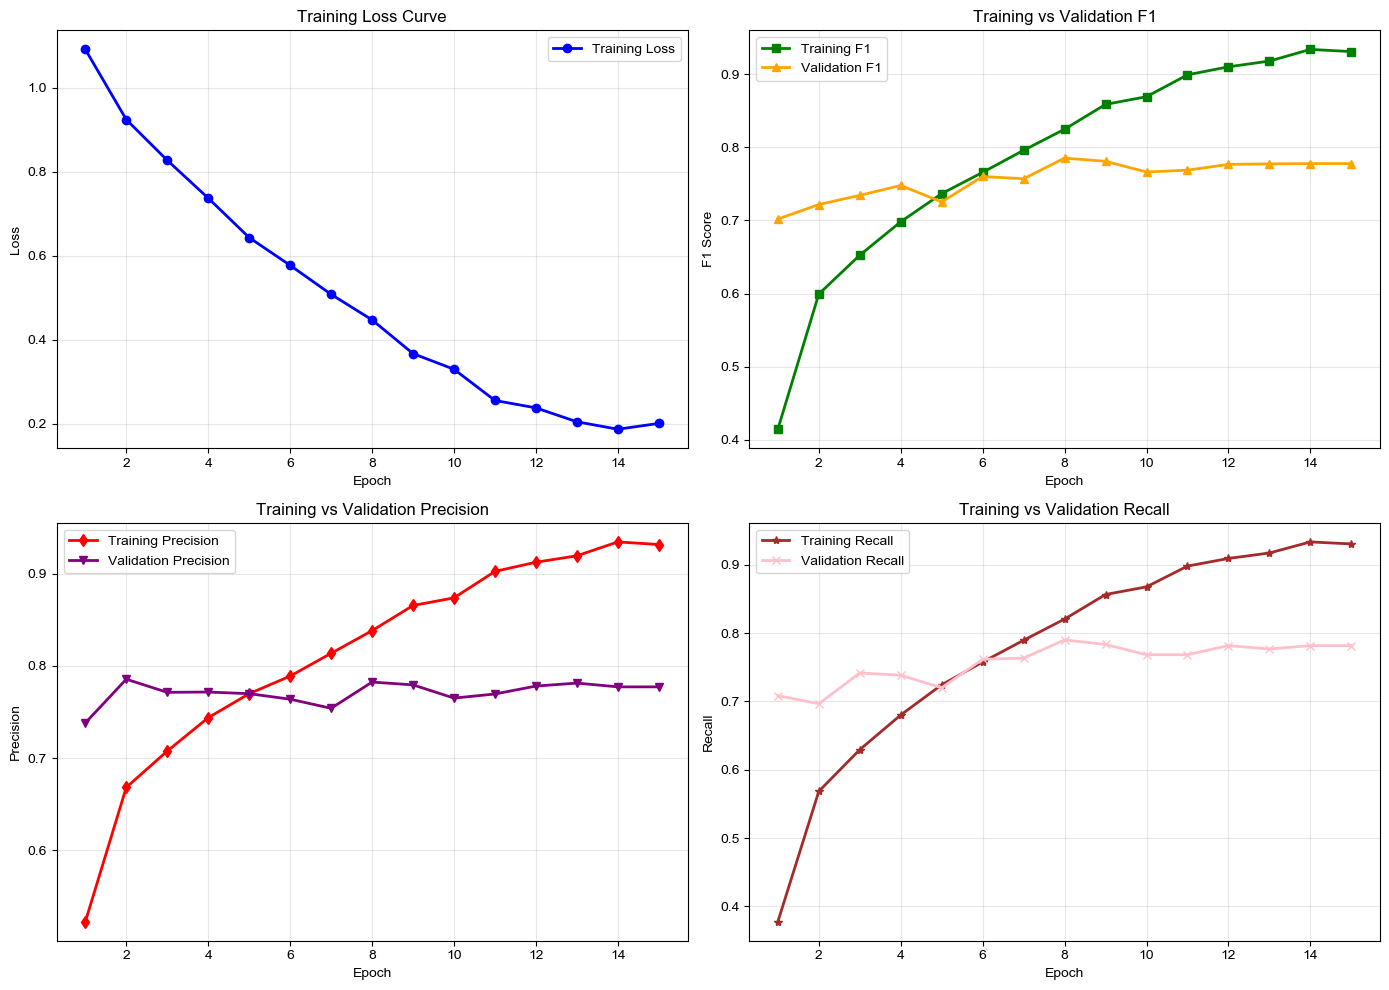

📈 训练曲线已保存至: /Users/creator/Desktop/project5/training_curves_exp_42314ddb.png
✅ Bad Case分析已保存至: /Users/creator/Desktop/project5/bad_cases_exp_42314ddb.txt

🔍 Bad Case分析 (共2183个错误案例)
📊 错误类型分布:
  positive->negative: 632 ( 29.0%)
  negative->positive: 520 ( 23.8%)
  positive->neutral: 345 ( 15.8%)
  neutral->negative: 270 ( 12.4%)
  neutral->positive: 252 ( 11.5%)
  negative->neutral: 164 (  7.5%)

8️⃣ 测试集预测...

🔍 测试集预测...


预测: 100%|█████████████████████████████████████| 32/32 [00:07<00:00,  4.54it/s]


9️⃣ 分析预测结果...

✅ 预测结果保存至: /Users/creator/Desktop/project5/submission_exp_42314ddb_20260128_000507.txt
✅ 训练结果保存至: /Users/creator/Desktop/project5/results_exp_42314ddb_20260128_000507.json

📁 最终结果文件:
  预测文件: /Users/creator/Desktop/project5/submission_exp_42314ddb_20260128_000507.txt
  最佳验证F1: 0.7852
  最佳验证准确率: 0.7900

🎉 训练完成！


In [17]:
# multimodal_fusion_model_clip_balanced_complete_with_iterative_improvement_fixed_instance_norm.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import CLIPProcessor, CLIPModel, get_cosine_schedule_with_warmup
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import json
import torchvision.transforms as transforms
import re
import random
import hashlib
from typing import Dict, List, Tuple, Any, Optional
from dataclasses import dataclass
import itertools
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")
MODEL_SAVE_PATH = os.path.join(BASE_PATH, "best_model_clip_balanced.pth")

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 数据清洗器 ====================
class DataCleaner:
    """系统化的文本清洗器"""
    
    @staticmethod
    def clean_text(text: str, max_length: int = 512) -> str:
        """
        清洗文本：
        1. 移除特殊字符但保留情感相关标点
        2. 规范化空白字符
        3. 处理表情符号
        4. 截断过长的文本
        """
        if not isinstance(text, str):
            return "[EMPTY]"
        
        # 移除空文本
        if not text.strip():
            return "[EMPTY]"
        
        # 保留情感相关的标点（!?.,）
        text = re.sub(r'[^\w\s!?.,\'"-]', ' ', text)
        
        # 规范化空白字符
        text = ' '.join(text.split())
        
        # 处理常见的网络表情符号
        emoticon_patterns = {
            r':\)': ' [SMILE] ',
            r':\(': ' [SAD] ',
            r':D': ' [LAUGH] ',
            r';\)': ' [WINK] ',
            r':P': ' [TONGUE] ',
            r'<3': ' [HEART] ',
            r':O': ' [SURPRISE] '
        }
        
        for pattern, replacement in emoticon_patterns.items():
            text = re.sub(pattern, replacement, text)
        
        # 处理重复字符（如"soooo goooood" -> "so good"）
        text = re.sub(r'(.)\1{2,}', r'\1\1', text)
        
        # 保留前max_length个字符，但尽量不切断单词
        if len(text) > max_length:
            text = text[:max_length]
            # 找到最后一个空格来切断
            last_space = text.rfind(' ')
            if last_space > max_length * 0.8:
                text = text[:last_space]
        
        return text.strip()
    
    @staticmethod
    def analyze_text_quality(texts: List[str]) -> Dict[str, Any]:
        """分析文本质量"""
        stats = {
            'total': len(texts),
            'empty_count': sum(1 for t in texts if not t.strip() or t == "[EMPTY]"),
            'short_count': sum(1 for t in texts if len(t.split()) < 3),
            'long_count': sum(1 for t in texts if len(t.split()) > 100),
            'avg_length': np.mean([len(t.split()) for t in texts if t != "[EMPTY]"]),
            'unique_ratio': len(set(texts)) / len(texts) if texts else 0
        }
        
        stats['empty_pct'] = stats['empty_count'] / stats['total'] * 100
        stats['short_pct'] = stats['short_count'] / stats['total'] * 100
        
        return stats

# ==================== 2. 高级增强模块 ====================
class AdvancedAugmenter:
    """高级文本增强策略"""
    
    @staticmethod
    def augment_text(text: str, method: str = "synonym") -> str:
        """
        文本增强方法：
        1. synonym: 同义词替换
        2. swap: 随机交换单词
        3. delete: 随机删除单词
        4. insert: 随机插入同义词
        """
        if text == "[EMPTY]" or len(text.split()) < 4:
            return text
        
        words = text.split()
        
        if method == "swap" and len(words) >= 4:
            # 随机交换两个单词
            idx1, idx2 = random.sample(range(len(words)), 2)
            words[idx1], words[idx2] = words[idx2], words[idx1]
            return ' '.join(words)
        
        elif method == "delete" and len(words) >= 5:
            # 随机删除一个单词（非停用词）
            delete_idx = random.randint(0, len(words)-1)
            del words[delete_idx]
            return ' '.join(words)
        
        elif method == "insert" and len(words) >= 3:
            # 随机位置插入同义词
            insert_idx = random.randint(0, len(words))
            words.insert(insert_idx, "[MASK]")
            return ' '.join(words)
        
        return text
    
    @staticmethod
    def augment_image(image: Image.Image) -> Image.Image:
        """图像增强"""
        from PIL import ImageEnhance
        
        # 随机选择一种增强方式
        augment_type = random.choice(['brightness', 'contrast', 'color', 'sharpness'])
        
        if augment_type == 'brightness':
            enhancer = ImageEnhance.Brightness(image)
            factor = random.uniform(0.8, 1.2)
            return enhancer.enhance(factor)
        
        elif augment_type == 'contrast':
            enhancer = ImageEnhance.Contrast(image)
            factor = random.uniform(0.8, 1.2)
            return enhancer.enhance(factor)
        
        elif augment_type == 'color':
            enhancer = ImageEnhance.Color(image)
            factor = random.uniform(0.8, 1.2)
            return enhancer.enhance(factor)
        
        elif augment_type == 'sharpness':
            enhancer = ImageEnhance.Sharpness(image)
            factor = random.uniform(0.5, 1.5)
            return enhancer.enhance(factor)
        
        return image

# ==================== 3. 平衡的数据集类 ====================
class EnhancedBalancedCLIPDataset(Dataset):
    """增强版平衡数据集，包含数据清洗和增强"""
    
    def __init__(self, df, data_path, image_size=224, mode='train', 
                 augmentation=False, fusion_strategy='late', 
                 label_map=None, allow_missing_images=True):
        self.df = df.copy()
        self.data_path = data_path
        self.mode = mode
        self.image_size = image_size
        self.augmentation = augmentation and mode == 'train'
        self.fusion_strategy = fusion_strategy
        self.allow_missing_images = allow_missing_images
        
        # 数据清洗器
        self.cleaner = DataCleaner()
        
        # 修复guid格式
        print(f"📝 准备{mode}数据集...")
        if 'guid' in self.df.columns:
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
        
        # 标签编码
        self.label_map = label_map or {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {v: k for k, v in self.label_map.items()}
        
        # 分析数据质量
        if 'tag' in self.df.columns:
            self.analyze_data_quality()
        
        # 创建默认图像（用于缺失的图像文件）
        self.default_image = self._create_default_image()
        
        # 图像变换
        self.setup_transforms()
    
    def _create_default_image(self):
        """创建默认图像（灰色背景）"""
        # 创建一个灰色图像
        default_img = torch.zeros((3, self.image_size, self.image_size))
        default_img[0, :, :] = 0.48145466  # CLIP的均值
        default_img[1, :, :] = 0.4578275
        default_img[2, :, :] = 0.40821073
        return default_img
    
    def analyze_data_quality(self):
        """分析数据集质量"""
        print(f"📊 {self.mode}数据集分析:")
        
        # 标签分布
        if 'tag' in self.df.columns:
            label_counts = self.df['tag'].value_counts()
            for label in ['positive', 'neutral', 'negative']:
                count = label_counts.get(label, 0)
                if len(self.df) > 0:
                    percentage = count / len(self.df) * 100
                    print(f"  {label:10}: {count:4d} ({percentage:5.1f}%)")
        
        # 文本质量分析（抽样）
        sample_size = min(100, len(self.df))
        sample_texts = []
        for idx in range(sample_size):
            guid = self.df.iloc[idx]['guid']
            text_path = os.path.join(self.data_path, f"{guid}.txt")
            try:
                with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()
                    sample_texts.append(text)
            except:
                sample_texts.append("[ERROR]")
        
        text_stats = self.cleaner.analyze_text_quality(sample_texts)
        print(f"📝 文本质量分析:")
        print(f"  空文本比例: {text_stats['empty_pct']:.1f}%")
        print(f"  短文本比例: {text_stats['short_pct']:.1f}%")
        print(f"  平均长度: {text_stats['avg_length']:.1f} 单词")
    
    def setup_transforms(self):
        """设置图像变换"""
        if self.mode == 'train':
            self.base_transform = transforms.Compose([
                transforms.Resize((self.image_size + 16, self.image_size + 16)),
                transforms.RandomCrop(self.image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
            
            # 增强变换
            self.aug_transform = transforms.Compose([
                transforms.RandomHorizontalFlip(p=0.3),
                transforms.RandomRotation(10),
                transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ])
        else:
            self.base_transform = transforms.Compose([
                transforms.Resize((self.image_size, self.image_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
            self.aug_transform = None
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 加载文本
        text_path = os.path.join(self.data_path, f"{guid}.txt")
        try:
            with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                text = f.read().strip()
                # 数据清洗
                text = self.cleaner.clean_text(text, max_length=200)
        except:
            text = "[EMPTY]"
        
        # 文本增强
        if self.augmentation and random.random() > 0.7:
            augment_method = random.choice(['swap', 'delete'])
            text = AdvancedAugmenter.augment_text(text, augment_method)
        
        # 加载图像
        image_path = os.path.join(self.data_path, f"{guid}.jpg")
        try:
            image = Image.open(image_path).convert('RGB')
            
            # 应用基础变换
            image = self.base_transform(image)
            
            # 图像增强
            if self.augmentation and random.random() > 0.7 and self.aug_transform:
                # 转换为PIL进行增强
                image_pil = transforms.ToPILImage()(image)
                image_pil = AdvancedAugmenter.augment_image(image_pil)
                image = transforms.ToTensor()(image_pil)
                # 重新归一化
                image = transforms.Normalize(
                    mean=[0.48145466, 0.4578275, 0.40821073], 
                    std=[0.26862954, 0.26130258, 0.27577711]
                )(image)
        except Exception as e:
            print(f"⚠️  图像加载失败: {guid}, 错误: {e}")
            image = self.default_image
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'text': text,
            'image': image,
            'label': label_tensor,
            'guid': guid,
            'fusion_strategy': self.fusion_strategy
        }

# ==================== 4. 平衡的CLIP融合模型（修复InstanceNorm问题）====================
class EnhancedBalancedCLIPFusionModel(nn.Module):
    """增强版平衡CLIP融合模型，支持多种融合策略"""
    
    def __init__(self, clip_model, clip_processor, num_labels=3, 
                 dropout_rate=0.3, fusion_strategy='late'):
        super().__init__()
        
        # 保存CLIP模型和处理器
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        self.fusion_strategy = fusion_strategy
        
        # 标签映射
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        
        # 完全冻结CLIP编码器（保持稳定性）
        for param in clip_model.parameters():
            param.requires_grad = False
        
        # 获取CLIP特征维度
        self.text_dim = clip_model.text_model.config.hidden_size  # 512
        self.image_dim = clip_model.vision_model.config.hidden_size  # 768
        
        print(f"📊 CLIP特征维度: 文本={self.text_dim}, 图像={self.image_dim}")
        print(f"🔀 使用融合策略: {fusion_strategy}")
        
        # 投影层 - 修复：使用LayerNorm而不是InstanceNorm
        # LayerNorm不依赖batch_size，且输入形状为(batch_size, features)
        self.text_projection = nn.Sequential(
            nn.Linear(self.text_dim, 512),
            nn.LayerNorm(512),  # LayerNorm: 输入形状应为(batch_size, 512)
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        self.image_projection = nn.Sequential(
            nn.Linear(self.image_dim, 512),
            nn.LayerNorm(512),  # LayerNorm: 输入形状应为(batch_size, 512)
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )
        
        # 融合策略
        self.fusion_module = MultiFusionStrategy(fusion_strategy)
        
        # 根据融合策略调整分类器输入维度
        if fusion_strategy == 'late':
            classifier_input_dim = 1024  # 512 + 512
        else:
            classifier_input_dim = 512
        
        # 分类头 - 同样使用LayerNorm
        self.classifier = nn.Sequential(
            nn.Linear(classifier_input_dim, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.7),
            nn.Linear(256, num_labels)
        )
        
        # 打印模型信息
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"📊 模型参数:")
        print(f"  总参数: {total_params:,}")
        print(f"  可训练参数: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
        print(f"  ✅ 使用LayerNorm替代BatchNorm，支持任何batch_size")
    
    def encode_text(self, texts):
        """编码文本"""
        text_inputs = self.clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,
            return_attention_mask=True
        ).to(device)
        
        with torch.no_grad():
            text_outputs = self.clip_model.text_model(**text_inputs)
        
        # 取平均池化
        attention_mask = text_inputs['attention_mask']
        last_hidden_state = text_outputs.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
        sum_mask = input_mask_expanded.sum(1)
        sum_mask = torch.clamp(sum_mask, min=1e-9)
        text_features = sum_embeddings / sum_mask
        
        return text_features
    
    def encode_image(self, images):
        """编码图像"""
        if images.dtype != torch.float32:
            images = images.to(torch.float32)
        
        with torch.no_grad():
            image_outputs = self.clip_model.vision_model(pixel_values=images)
            image_features = image_outputs.last_hidden_state[:, 0, :]
        
        return image_features
    
    def forward(self, texts, images, fusion_strategy=None):
        # 编码文本和图像
        text_features = self.encode_text(texts)
        image_features = self.encode_image(images)
        
        # 投影
        text_proj = self.text_projection(text_features)
        image_proj = self.image_projection(image_features)
        
        # 融合
        if fusion_strategy is None:
            fusion_strategy = self.fusion_strategy
        
        fused_features = self.fusion_module.fuse(text_proj, image_proj)
        
        # 分类
        logits = self.classifier(fused_features)
        
        return logits

# ==================== 5. 多融合策略 ====================
class MultiFusionStrategy:
    """多种融合策略"""
    
    def __init__(self, fusion_type: str = 'late'):
        self.fusion_type = fusion_type
    
    def late_fusion(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """Late Fusion: 拼接特征"""
        return torch.cat([text_features, image_features], dim=-1)
    
    def early_fusion(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """Early Fusion: 特征相加"""
        # 调整维度使其匹配
        if text_features.size(1) != image_features.size(1):
            text_features = nn.Linear(text_features.size(1), image_features.size(1)).to(device)(text_features)
        return text_features + image_features
    
    def attention_fusion(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """Attention Fusion: 注意力机制融合"""
        # 简单的注意力融合
        combined = torch.cat([text_features.unsqueeze(1), image_features.unsqueeze(1)], dim=1)
        
        # 计算注意力权重
        attention_weights = torch.softmax(
            torch.bmm(combined, combined.transpose(1, 2)).mean(dim=-1),
            dim=-1
        )
        
        # 加权融合
        fused = (attention_weights.unsqueeze(-1) * combined).sum(dim=1)
        return fused
    
    def fuse(self, text_features: torch.Tensor, image_features: torch.Tensor) -> torch.Tensor:
        """根据选择的策略进行融合"""
        if self.fusion_type == 'late':
            return self.late_fusion(text_features, image_features)
        elif self.fusion_type == 'early':
            return self.early_fusion(text_features, image_features)
        elif self.fusion_type == 'attention':
            return self.attention_fusion(text_features, image_features)
        else:
            return self.late_fusion(text_features, image_features)

# ==================== 6. Bad Case分析器 ====================
class BadCaseAnalyzer:
    """错误分析机制"""
    
    def __init__(self, label_map=None):
        self.label_map = label_map or {0: 'positive', 1: 'neutral', 2: 'negative'}
        self.inverse_label_map = {v: k for k, v in self.label_map.items()}
        self.cases = []
    
    def add_case(self, guid: str, text: str, true_label: str, pred_label: str, 
                 probs: List[float], confidence: float):
        """添加一个错误案例"""
        self.cases.append({
            'guid': guid,
            'text': text[:100] + "..." if len(text) > 100 else text,
            'true_label': true_label,
            'pred_label': pred_label,
            'probs': probs,
            'confidence': confidence
        })
    
    def analyze(self, max_cases: int = 20):
        """分析错误案例"""
        if not self.cases:
            print("✅ 没有发现错误案例")
            return
        
        print(f"\n🔍 Bad Case分析 (共{len(self.cases)}个错误案例)")
        print("="*60)
        
        # 错误类型分布
        error_types = defaultdict(int)
        for case in self.cases:
            error_key = f"{case['true_label']}->{case['pred_label']}"
            error_types[error_key] += 1
        
        print("📊 错误类型分布:")
        for error_type, count in sorted(error_types.items(), key=lambda x: x[1], reverse=True):
            percentage = count / len(self.cases) * 100
            print(f"  {error_type:15}: {count:3d} ({percentage:5.1f}%)")
    
    def save_to_file(self, filepath: str):
        """保存分析结果到文件"""
        with open(filepath, 'w', encoding='utf-8') as f:
            for case in self.cases:
                f.write(f"GUID: {case['guid']}\n")
                f.write(f"真实标签: {case['true_label']}\n")
                f.write(f"预测标签: {case['pred_label']}\n")
                f.write(f"置信度: {case['confidence']:.3f}\n")
                f.write(f"文本: {case['text']}\n")
                f.write(f"概率分布: {case['probs']}\n")
                f.write("-"*50 + "\n")
        
        print(f"✅ Bad Case分析已保存至: {filepath}")

# ==================== 7. 平衡的训练器 ====================
class EnhancedBalancedCLIPTrainer:
    def __init__(self, model, train_loader, val_loader, test_loader, 
                 config: 'ExperimentConfig', bad_case_analyzer: Optional[BadCaseAnalyzer] = None):
        
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.config = config
        self.bad_case_analyzer = bad_case_analyzer or BadCaseAnalyzer()
        
        # 计算平衡的类别权重
        self.class_weights = self._compute_balanced_weights()
        
        # 损失函数
        if config.use_balanced_loss and self.class_weights is not None:
            print(f"📊 使用平衡的类别权重: {self.class_weights.tolist()}")
            self.criterion = nn.CrossEntropyLoss(weight=self.class_weights.to(device))
        else:
            self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay,
            betas=(0.9, 0.999)
        )
        
        # 学习率调度器
        self.scheduler = get_cosine_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=len(train_loader) * 2,
            num_training_steps=len(train_loader) * config.num_epochs
        )
        
        # 早停
        self.best_val_f1 = 0
        self.best_val_acc = 0
        self.patience = config.patience
        self.epochs_no_improve = 0
        self.best_model_state = None
        
        # 训练历史记录
        self.train_history = {
            'loss': [], 'f1': [], 'acc': [],
            'precision': [], 'recall': []
        }
        self.val_history = {
            'f1': [], 'acc': [], 'precision': [], 'recall': []
        }
    
    def _compute_balanced_weights(self):
        """计算平衡的类别权重"""
        print("📊 计算平衡的类别权重...")
        
        # 从数据集中收集标签
        all_labels = []
        temp_loader = DataLoader(
            self.train_loader.dataset,
            batch_size=32,
            shuffle=False,
            num_workers=0
        )
        
        for batch in temp_loader:
            labels = batch['label'].tolist()
            valid_labels = [label for label in labels if label != -1]
            all_labels.extend(valid_labels)
        
        if not all_labels:
            print("⚠️  没有找到有效标签，使用默认权重")
            return None
        
        unique, counts = np.unique(all_labels, return_counts=True)
        total = sum(counts)
        
        # 计算平衡权重
        weights = torch.tensor(
            [total / (len(unique) * count) for count in counts],
            dtype=torch.float32
        )
        
        # 适度的增加neutral权重
        neutral_idx = 1
        if len(weights) > neutral_idx:
            weights[neutral_idx] *= 1.5
        
        # 归一化
        weights = weights / weights.sum() * len(weights)
        
        print(f"  类别分布: {dict(zip(['positive', 'neutral', 'negative'], counts.tolist()))}")
        print(f"  平衡的类别权重: {weights.tolist()}")
        return weights
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for batch_idx, batch in enumerate(progress_bar):
            texts = batch['text']
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            if images.dtype != torch.float32:
                images = images.to(torch.float32)
            
            self.optimizer.zero_grad()
            
            logits = self.model(texts, images)
            loss = self.criterion(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            self.scheduler.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'loss': loss.item(),
                'lr': self.scheduler.get_last_lr()[0]
            })
        
        # 计算详细指标
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        # 计算precision和recall
        precision, recall, _, _ = precision_recall_fscore_support(
            all_labels, all_preds, average='weighted'
        )
        
        self.train_history['loss'].append(avg_loss)
        self.train_history['f1'].append(train_f1)
        self.train_history['acc'].append(train_acc)
        self.train_history['precision'].append(precision)
        self.train_history['recall'].append(recall)
        
        return avg_loss, train_f1, train_acc, precision, recall
    
    def validate(self, epoch, return_detailed=False):
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        all_texts = []
        all_guids = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                texts = batch['text']
                images = batch['image'].to(device)
                labels = batch['label'].to(device)
                guids = batch['guid']
                
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
                all_texts.extend(texts)
                all_guids.extend(guids)
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        precision, recall, _, _ = precision_recall_fscore_support(
            all_labels, all_preds, average='weighted'
        )
        
        self.val_history['f1'].append(val_f1)
        self.val_history['acc'].append(val_acc)
        self.val_history['precision'].append(precision)
        self.val_history['recall'].append(recall)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative'],
                                  digits=4))
        
        # 收集错误案例
        if self.bad_case_analyzer:
            for idx, (true, pred, guid, text, prob) in enumerate(zip(all_labels, all_preds, 
                                                                     all_guids, all_texts, all_probs)):
                if true != pred:
                    true_label = self.model.inverse_label_map.get(true, str(true))
                    pred_label = self.model.inverse_label_map.get(pred, str(pred))
                    confidence = max(prob)
                    self.bad_case_analyzer.add_case(guid, text, true_label, pred_label, 
                                                    prob.tolist(), confidence)
        
        if return_detailed:
            return val_f1, val_acc, all_probs, precision, recall, all_preds, all_labels
        else:
            return val_f1, val_acc, all_probs
    
    def test(self):
        """测试集预测"""
        self.model.eval()
        all_guids = []
        all_preds = []
        all_probs = []
        
        print("\n🔍 测试集预测...")
        
        with torch.no_grad():
            for batch in tqdm(self.test_loader, desc="预测"):
                texts = batch['text']
                images = batch['image'].to(device)
                guids = batch['guid']
                
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(probs, dim=1)
                
                all_guids.extend(guids)
                all_preds.extend(preds.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        return all_guids, all_preds, all_probs
    
    def train(self):
        print(f"🚀 开始训练，共{self.config.num_epochs}个epoch")
        
        for epoch in range(1, self.config.num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{self.config.num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc, train_precision, train_recall = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            print(f"       Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
            
            # 验证
            val_f1, val_acc, val_probs, val_precision, val_recall, val_preds, val_labels = self.validate(
                epoch, return_detailed=True
            )
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            print(f"       Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")
            
            # 早停和保存
            improvement_threshold = 0.001
            if val_f1 > self.best_val_f1 + improvement_threshold:
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.epochs_no_improve = 0
                self.best_model_state = self.model.state_dict().copy()
                
                # 保存最佳模型
                model_save_path = os.path.join(BASE_PATH, f"best_model_{self.config.experiment_id}.pth")
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'scheduler_state_dict': self.scheduler.state_dict(),
                    'best_val_f1': self.best_val_f1,
                    'best_val_acc': self.best_val_acc,
                    'config': self.config.__dict__
                }, model_save_path)
                print(f"✨ 保存最佳模型到: {model_save_path}")
                print(f"✨ 验证集F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
            else:
                self.epochs_no_improve += 1
                print(f"⚠️  {self.epochs_no_improve}个epoch未显著提升")
                
                # 动态调整学习率
                if self.epochs_no_improve >= self.patience // 2:
                    old_lr = self.optimizer.param_groups[0]['lr']
                    new_lr = old_lr * 0.5
                    for param_group in self.optimizer.param_groups:
                        param_group['lr'] = new_lr
                    print(f"📉 降低学习率: {old_lr:.2e} -> {new_lr:.2e}")
                
                if self.epochs_no_improve >= self.patience:
                    print(f"⏹️  早停触发！最佳验证F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
                    break
        
        # 加载最佳模型
        if self.best_model_state:
            self.model.load_state_dict(self.best_model_state)
            print(f"\n✅ 加载最佳模型，验证集F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
        
        # 绘制训练曲线
        self.plot_training_curve()
        
        # Bad Case分析
        if self.bad_case_analyzer and self.bad_case_analyzer.cases:
            bad_case_file = os.path.join(BASE_PATH, f"bad_cases_{self.config.experiment_id}.txt")
            self.bad_case_analyzer.save_to_file(bad_case_file)
            self.bad_case_analyzer.analyze()
        
        return self.model
    
    def plot_training_curve(self):
        """绘制训练曲线"""
        if not self.train_history['loss']:
            return
        
        epochs = range(1, len(self.train_history['loss']) + 1)
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 损失曲线
        axes[0, 0].plot(epochs, self.train_history['loss'], label='Training Loss', 
                        marker='o', linewidth=2, color='blue')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].set_title('Training Loss Curve')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # F1曲线
        axes[0, 1].plot(epochs, self.train_history['f1'], label='Training F1', 
                        marker='s', color='green', linewidth=2)
        if self.val_history['f1']:
            axes[0, 1].plot(range(1, len(self.val_history['f1']) + 1), self.val_history['f1'], 
                           label='Validation F1', marker='^', color='orange', linewidth=2)
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('F1 Score')
        axes[0, 1].set_title('Training vs Validation F1')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Precision曲线
        axes[1, 0].plot(epochs, self.train_history['precision'], label='Training Precision', 
                        marker='d', color='red', linewidth=2)
        if self.val_history['precision']:
            axes[1, 0].plot(range(1, len(self.val_history['precision']) + 1), self.val_history['precision'], 
                           label='Validation Precision', marker='v', color='purple', linewidth=2)
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].set_title('Training vs Validation Precision')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Recall曲线
        axes[1, 1].plot(epochs, self.train_history['recall'], label='Training Recall', 
                        marker='*', color='brown', linewidth=2)
        if self.val_history['recall']:
            axes[1, 1].plot(range(1, len(self.val_history['recall']) + 1), self.val_history['recall'], 
                           label='Validation Recall', marker='x', color='pink', linewidth=2)
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].set_title('Training vs Validation Recall')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        curve_file = os.path.join(BASE_PATH, f'training_curves_{self.config.experiment_id}.png')
        plt.savefig(curve_file, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"📈 训练曲线已保存至: {curve_file}")

# ==================== 8. 实验配置 ====================
@dataclass
class ExperimentConfig:
    """实验配置类"""
    # 基础配置
    model_name: str = "openai/clip-vit-base-patch32"
    image_size: int = 224
    batch_size: int = 16
    
    # 训练配置
    learning_rate: float = 5e-4
    num_epochs: int = 15
    dropout_rate: float = 0.3
    weight_decay: float = 0.01
    
    # 融合策略
    fusion_strategy: str = 'late'  # 'late', 'early', 'attention'
    use_balanced_loss: bool = True
    use_augmentation: bool = True
    
    # 数据配置
    validation_split: float = 0.15
    random_seed: int = 42
    
    # 早停
    patience: int = 10
    
    def __post_init__(self):
        # 验证配置
        assert self.fusion_strategy in ['late', 'early', 'attention'], \
            "fusion_strategy must be one of ['late', 'early', 'attention']"
        
        # 创建实验ID
        config_hash = hashlib.md5(str(self.__dict__).encode()).hexdigest()[:8]
        self.experiment_id = f"exp_{config_hash}"
        
    def save(self, filepath: str):
        """保存配置"""
        with open(filepath, 'w') as f:
            json.dump(self.__dict__, f, indent=2)
    
    @classmethod
    def load(cls, filepath: str):
        """加载配置"""
        with open(filepath, 'r') as f:
            config_dict = json.load(f)
        return cls(**config_dict)
    
    def print_summary(self):
        """打印配置摘要"""
        print("="*60)
        print("🔬 实验配置")
        print("="*60)
        for key, value in self.__dict__.items():
            if key != 'experiment_id':
                print(f"  {key:20}: {value}")
        print(f"  {'experiment_id':20}: {self.experiment_id}")
        print("="*60)

# ==================== 9. 单次实验运行器 ====================
class SingleExperimentRunner:
    """单次实验运行器"""
    
    def run(self, config: ExperimentConfig):
        """运行单个实验"""
        print(f"\n1️⃣ 加载CLIP模型...")
        try:
            clip_model = CLIPModel.from_pretrained(config.model_name)
            clip_processor = CLIPProcessor.from_pretrained(config.model_name)
            clip_model = clip_model.to(device)
            print(f"✅ CLIP模型加载成功: {config.model_name}")
        except Exception as e:
            print(f"❌ CLIP模型加载失败: {e}")
            return None, None, None
        
        # 加载数据
        print(f"\n2️⃣ 加载数据...")
        train_df = pd.read_csv(TRAIN_FILE, sep=',')
        test_df = pd.read_csv(TEST_FILE, sep=',')
        test_df['guid'] = test_df['guid'].astype(str).str.split('.').str[0]
        
        print(f"训练集: {len(train_df)} 样本")
        print(f"测试集: {len(test_df)} 样本")
        
        # 划分数据集
        print(f"\n3️⃣ 划分训练集和验证集...")
        train_data, val_data = train_test_split(
            train_df, 
            test_size=config.validation_split,
            random_state=config.random_seed, 
            stratify=train_df['tag']
        )
        
        print(f"训练集: {len(train_data)}")
        print(f"验证集: {len(val_data)}")
        
        # 创建数据集
        print(f"\n4️⃣ 创建数据集...")
        train_dataset = EnhancedBalancedCLIPDataset(
            train_data, DATA_PATH, 
            image_size=config.image_size, 
            mode='train',
            augmentation=config.use_augmentation,
            fusion_strategy=config.fusion_strategy,
            label_map={'positive': 0, 'neutral': 1, 'negative': 2},
            allow_missing_images=True
        )
        val_dataset = EnhancedBalancedCLIPDataset(
            val_data, DATA_PATH, 
            image_size=config.image_size, 
            mode='val',
            augmentation=False,
            fusion_strategy=config.fusion_strategy,
            label_map={'positive': 0, 'neutral': 1, 'negative': 2},
            allow_missing_images=True
        )
        test_dataset = EnhancedBalancedCLIPDataset(
            test_df, DATA_PATH, 
            image_size=config.image_size, 
            mode='test',
            augmentation=False,
            fusion_strategy=config.fusion_strategy,
            label_map={'positive': 0, 'neutral': 1, 'negative': 2},
            allow_missing_images=True
        )
        
        # 创建数据加载器
        print(f"\n5️⃣ 创建数据加载器...")
        train_loader = DataLoader(
            train_dataset, 
            batch_size=config.batch_size, 
            shuffle=True,
            num_workers=0,
            pin_memory=True,
            drop_last=True  # 丢弃最后一个不完整的批次
        )
        val_loader = DataLoader(
            val_dataset, 
            batch_size=config.batch_size, 
            shuffle=False, 
            num_workers=0
        )
        test_loader = DataLoader(
            test_dataset, 
            batch_size=config.batch_size, 
            shuffle=False, 
            num_workers=0
        )
        
        print(f"训练批次: {len(train_loader)} (batch_size={config.batch_size})")
        print(f"验证批次: {len(val_loader)}")
        print(f"测试批次: {len(test_loader)}")
        
        # 创建模型
        print(f"\n6️⃣ 创建增强版CLIP融合模型...")
        model = EnhancedBalancedCLIPFusionModel(
            clip_model=clip_model,
            clip_processor=clip_processor,
            num_labels=3,
            dropout_rate=config.dropout_rate,
            fusion_strategy=config.fusion_strategy
        )
        
        # 创建Bad Case分析器
        bad_case_analyzer = BadCaseAnalyzer()
        
        # 训练
        print(f"\n7️⃣ 训练模型...")
        trainer = EnhancedBalancedCLIPTrainer(
            model, 
            train_loader, 
            val_loader, 
            test_loader,
            config=config,
            bad_case_analyzer=bad_case_analyzer
        )
        
        trained_model = trainer.train()
        
        # 测试
        print(f"\n8️⃣ 测试集预测...")
        guids, preds_numeric, probs = trainer.test()
        
        # 后处理和分析
        print(f"\n9️⃣ 分析预测结果...")
        inverse_label_map = {0: 'positive', 1: 'neutral', 2: 'negative'}
        pred_labels = [inverse_label_map.get(pred, 'neutral') for pred in preds_numeric]
        
        # 保存结果
        timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        submission_file = os.path.join(
            BASE_PATH, 
            f"submission_{config.experiment_id}_{timestamp}.txt"
        )
        
        submission_df = pd.DataFrame({
            'guid': guids,
            'tag': pred_labels
        })
        
        submission_df.to_csv(submission_file, index=False, sep=',')
        print(f"\n✅ 预测结果保存至: {submission_file}")
        
        # 保存结果和指标
        results = {
            'experiment_id': config.experiment_id,
            'model': f'Enhanced CLIP Fusion ({config.fusion_strategy})',
            'device': str(device),
            'best_val_f1': float(trainer.best_val_f1),
            'best_val_acc': float(trainer.best_val_acc),
            'train_samples': len(train_data),
            'val_samples': len(val_data),
            'test_samples': len(test_df),
            'prediction_distribution': pd.Series(pred_labels).value_counts().to_dict(),
            'submission_file': submission_file,
            'config': config.__dict__
        }
        
        metrics = {
            'best_val_f1': trainer.best_val_f1,
            'best_val_acc': trainer.best_val_acc,
            'final_train_loss': trainer.train_history['loss'][-1] if trainer.train_history['loss'] else None,
            'final_train_f1': trainer.train_history['f1'][-1] if trainer.train_history['f1'] else None,
            'final_val_f1': trainer.val_history['f1'][-1] if trainer.val_history['f1'] else None
        }
        
        results_file = os.path.join(
            BASE_PATH, 
            f"results_{config.experiment_id}_{timestamp}.json"
        )
        with open(results_file, 'w') as f:
            json.dump(results, f, indent=2)
        
        print(f"✅ 训练结果保存至: {results_file}")
        
        return submission_file, results, metrics

# ==================== 10. 主函数 ====================
def main():
    """主函数"""
    print("="*100)
    print("🚀 增强版多模态情感分类系统")
    print("="*100)
    
    # 配置
    config = ExperimentConfig(
        model_name="openai/clip-vit-base-patch32",
        image_size=224,
        batch_size=16,
        learning_rate=5e-4,
        num_epochs=15,
        dropout_rate=0.3,
        fusion_strategy='late',
        use_balanced_loss=True,
        use_augmentation=True,
        validation_split=0.15,
        random_seed=42,
        patience=10
    )
    
    config.print_summary()
    
    runner = SingleExperimentRunner()
    submission_file, results, metrics = runner.run(config)
    
    if submission_file:
        print(f"\n📁 最终结果文件:")
        print(f"  预测文件: {submission_file}")
        print(f"  最佳验证F1: {results.get('best_val_f1', 0):.4f}")
        print(f"  最佳验证准确率: {results.get('best_val_acc', 0):.4f}")
    
    print(f"\n🎉 训练完成！")

# ==================== 11. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🏃‍♂️ 增强版多模态情感分类系统 - 修复InstanceNorm问题")
    print("="*100)
    
    try:
        # 测试CLIP
        print("\n🔍 第一步：测试CLIP嵌入...")
        try:
            model_name = "openai/clip-vit-base-patch32"
            clip_model = CLIPModel.from_pretrained(model_name)
            clip_processor = CLIPProcessor.from_pretrained(model_name)
            clip_model = clip_model.to(device)
            print("✅ CLIP测试通过")
            
            # 开始主流程
            main()
            
        except Exception as e:
            print(f"❌ CLIP测试失败: {e}")
            import traceback
            traceback.print_exc()
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()

## 消融实验

🎮 使用Apple Silicon GPU (MPS)
🧪 多模态情感分类消融实验

🔍 第一步：测试CLIP嵌入...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP测试通过
🧪 多模态情感分类消融实验系统

🔬 实验目标:
  1. 文本单模态 (text_only)
  2. 图像单模态 (image_only)
  3. 多模态融合 (multimodal)
      - Late Fusion (特征拼接)
      - Early Fusion (特征相加)
      - Attention Fusion (注意力融合)

📊 预期分析:
  - 对比不同模态的性能差异
  - 分析多模态融合的优势
  - 比较不同融合策略的效果
🧪 多模态情感分类消融实验

🚀 开始text_only消融实验

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建text_only数据集...
📝 准备train数据集 (text_only模式)...
📝 准备val数据集 (text_only模式)...

5️⃣ 创建数据加载器...
训练批次: 212
验证批次: 38

6️⃣ 创建text_only模型...
📊 创建text_only模型
  CLIP特征维度: 文本=512, 图像=768

7️⃣ 训练text_only模型...
🚀 开始训练，共10个epoch

Epoch 1/10


训练 Epoch 1: 100%|███| 212/212 [00:08<00:00, 24.10it/s, loss=0.894, lr=0.00025]


📊 训练集 - Loss: 0.9059, F1: 0.5053, Acc: 0.5823


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:01<00:00, 21.16it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.6546    0.9637    0.7797       358
     neutral     0.5556    0.0794    0.1389        63
    negative     0.8125    0.2905    0.4280       179

    accuracy                         0.6700       600
   macro avg     0.6742    0.4445    0.4488       600
weighted avg     0.6913    0.6700    0.6075       600

📊 验证集 - F1: 0.6075, Acc: 0.6700

Epoch 2/10


训练 Epoch 2: 100%|████| 212/212 [00:09<00:00, 23.31it/s, loss=0.793, lr=0.0005]


📊 训练集 - Loss: 0.7892, F1: 0.6238, Acc: 0.6595


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:01<00:00, 21.17it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.7765    0.7570    0.7666       358
     neutral     1.0000    0.0794    0.1471        63
    negative     0.5407    0.7430    0.6259       179

    accuracy                         0.6817       600
   macro avg     0.7724    0.5265    0.5132       600
weighted avg     0.7296    0.6817    0.6596       600

📊 验证集 - F1: 0.6596, Acc: 0.6817

Epoch 3/10


训练 Epoch 3: 100%|██| 212/212 [00:08<00:00, 25.10it/s, loss=0.763, lr=0.000481]


📊 训练集 - Loss: 0.7313, F1: 0.6661, Acc: 0.6893


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:01<00:00, 21.03it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.6969    0.8799    0.7778       358
     neutral     0.4737    0.2857    0.3564        63
    negative     0.6818    0.4190    0.5190       179

    accuracy                         0.6800       600
   macro avg     0.6175    0.5282    0.5511       600
weighted avg     0.6690    0.6800    0.6563       600

📊 验证集 - F1: 0.6563, Acc: 0.6800

Epoch 4/10


训练 Epoch 4: 100%|██| 212/212 [00:08<00:00, 25.13it/s, loss=0.644, lr=0.000427]


📊 训练集 - Loss: 0.6848, F1: 0.6944, Acc: 0.7123


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:01<00:00, 21.04it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8085    0.6369    0.7125       358
     neutral     0.5455    0.1905    0.2824        63
    negative     0.4797    0.7933    0.5979       179

    accuracy                         0.6367       600
   macro avg     0.6112    0.5402    0.5309       600
weighted avg     0.6828    0.6367    0.6331       600

📊 验证集 - F1: 0.6331, Acc: 0.6367

Epoch 5/10


训练 Epoch 5: 100%|██| 212/212 [00:08<00:00, 24.98it/s, loss=0.466, lr=0.000346]


📊 训练集 - Loss: 0.6094, F1: 0.7276, Acc: 0.7385


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:01<00:00, 22.01it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.7026    0.8911    0.7857       358
     neutral     0.4762    0.1587    0.2381        63
    negative     0.6880    0.4804    0.5658       179

    accuracy                         0.6917       600
   macro avg     0.6223    0.5101    0.5299       600
weighted avg     0.6745    0.6917    0.6626       600

📊 验证集 - F1: 0.6626, Acc: 0.6917

Epoch 6/10


训练 Epoch 6: 100%|████| 212/212 [00:08<00:00, 24.85it/s, loss=0.54, lr=0.00025]


📊 训练集 - Loss: 0.5280, F1: 0.7751, Acc: 0.7821


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:01<00:00, 21.44it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.7933    0.7291    0.7598       358
     neutral     0.5667    0.2698    0.3656        63
    negative     0.5477    0.7374    0.6286       179

    accuracy                         0.6833       600
   macro avg     0.6359    0.5788    0.5847       600
weighted avg     0.6962    0.6833    0.6793       600

📊 验证集 - F1: 0.6793, Acc: 0.6833

Epoch 7/10


训练 Epoch 7: 100%|██| 212/212 [00:08<00:00, 24.94it/s, loss=0.326, lr=0.000154]


📊 训练集 - Loss: 0.4320, F1: 0.8165, Acc: 0.8210


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:01<00:00, 21.61it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.7914    0.7207    0.7544       358
     neutral     0.4286    0.2381    0.3061        63
    negative     0.5481    0.7318    0.6268       179

    accuracy                         0.6733       600
   macro avg     0.5894    0.5635    0.5624       600
weighted avg     0.6807    0.6733    0.6693       600

📊 验证集 - F1: 0.6693, Acc: 0.6733

Epoch 8/10


训练 Epoch 8: 100%|███| 212/212 [00:09<00:00, 23.23it/s, loss=0.213, lr=7.32e-5]


📊 训练集 - Loss: 0.3427, F1: 0.8613, Acc: 0.8632


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:01<00:00, 20.36it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.7723    0.7486    0.7603       358
     neutral     0.4516    0.2222    0.2979        63
    negative     0.5586    0.6927    0.6185       179

    accuracy                         0.6767       600
   macro avg     0.5942    0.5545    0.5589       600
weighted avg     0.6749    0.6767    0.6694       600

📊 验证集 - F1: 0.6694, Acc: 0.6767

Epoch 9/10


训练 Epoch 9: 100%|████| 212/212 [00:08<00:00, 24.09it/s, loss=0.428, lr=1.9e-5]


📊 训练集 - Loss: 0.2845, F1: 0.8924, Acc: 0.8936


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:01<00:00, 19.55it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.7654    0.7654    0.7654       358
     neutral     0.4474    0.2698    0.3366        63
    negative     0.5784    0.6592    0.6162       179

    accuracy                         0.6817       600
   macro avg     0.5971    0.5648    0.5727       600
weighted avg     0.6762    0.6817    0.6758       600

📊 验证集 - F1: 0.6758, Acc: 0.6817

Epoch 10/10


训练 Epoch 10: 100%|███████| 212/212 [00:09<00:00, 22.34it/s, loss=0.0753, lr=0]


📊 训练集 - Loss: 0.2537, F1: 0.9083, Acc: 0.9092


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:02<00:00, 16.88it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.7727    0.7598    0.7662       358
     neutral     0.4286    0.2857    0.3429        63
    negative     0.5825    0.6704    0.6234       179

    accuracy                         0.6833       600
   macro avg     0.5946    0.5720    0.5775       600
weighted avg     0.6798    0.6833    0.6791       600

📊 验证集 - F1: 0.6791, Acc: 0.6833

✅ 训练完成！最佳验证F1: 0.6793, Acc: 0.6833

✅ text_only实验完成!
   最佳验证F1: 0.6793
   最佳验证准确率: 0.6833

🚀 开始image_only消融实验

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建image_only数据集...
📝 准备train数据集 (image_only模式)...
📝 准备val数据集 (image_only模式)...

5️⃣ 创建数据加载器...
训练批次: 212
验证批次: 38

6️⃣ 创建image_only模型...
📊 创建image_only模型
  CLIP特征维度: 文本=512, 图像=768

7️⃣ 训练image_only模型...
🚀 开始训练，共10个epoch

Epoch 1/10


训练 Epoch 1: 100%|███| 212/212 [00:32<00:00,  6.45it/s, loss=0.574, lr=0.00025]


📊 训练集 - Loss: 0.8716, F1: 0.5733, Acc: 0.5946


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:05<00:00,  6.34it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.7528    0.9274    0.8310       358
     neutral     0.5000    0.1111    0.1818        63
    negative     0.7310    0.5922    0.6543       179

    accuracy                         0.7417       600
   macro avg     0.6613    0.5436    0.5557       600
weighted avg     0.7198    0.7417    0.7101       600

📊 验证集 - F1: 0.7101, Acc: 0.7417

Epoch 2/10


训练 Epoch 2: 100%|████| 212/212 [00:36<00:00,  5.78it/s, loss=0.866, lr=0.0005]


📊 训练集 - Loss: 0.6708, F1: 0.6976, Acc: 0.7134


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:05<00:00,  6.35it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8319    0.7877    0.8092       358
     neutral     0.4643    0.2063    0.2857        63
    negative     0.6094    0.7933    0.6893       179

    accuracy                         0.7283       600
   macro avg     0.6352    0.5958    0.5947       600
weighted avg     0.7269    0.7283    0.7185       600

📊 验证集 - F1: 0.7185, Acc: 0.7283

Epoch 3/10


训练 Epoch 3: 100%|████| 212/212 [00:38<00:00,  5.47it/s, loss=0.8, lr=0.000481]


📊 训练集 - Loss: 0.6062, F1: 0.7419, Acc: 0.7506


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:06<00:00,  5.78it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.8297    0.8436    0.8366       358
     neutral     0.4762    0.1587    0.2381        63
    negative     0.6465    0.7765    0.7056       179

    accuracy                         0.7517       600
   macro avg     0.6508    0.5929    0.5934       600
weighted avg     0.7379    0.7517    0.7346       600

📊 验证集 - F1: 0.7346, Acc: 0.7517

Epoch 4/10


训练 Epoch 4: 100%|██| 212/212 [00:36<00:00,  5.80it/s, loss=0.615, lr=0.000427]


📊 训练集 - Loss: 0.5251, F1: 0.7793, Acc: 0.7848


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:06<00:00,  5.75it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.7562    0.9358    0.8365       358
     neutral     0.4286    0.1905    0.2637        63
    negative     0.8217    0.5922    0.6883       179

    accuracy                         0.7550       600
   macro avg     0.6688    0.5728    0.5962       600
weighted avg     0.7413    0.7550    0.7321       600

📊 验证集 - F1: 0.7321, Acc: 0.7550

Epoch 5/10


训练 Epoch 5: 100%|██| 212/212 [00:36<00:00,  5.88it/s, loss=0.451, lr=0.000346]


📊 训练集 - Loss: 0.4191, F1: 0.8324, Acc: 0.8349


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:06<00:00,  5.85it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8653    0.7179    0.7847       358
     neutral     0.2810    0.5397    0.3696        63
    negative     0.6813    0.6927    0.6870       179

    accuracy                         0.6917       600
   macro avg     0.6092    0.6501    0.6138       600
weighted avg     0.7491    0.6917    0.7120       600

📊 验证集 - F1: 0.7120, Acc: 0.6917

Epoch 6/10


训练 Epoch 6: 100%|███| 212/212 [00:35<00:00,  5.89it/s, loss=0.294, lr=0.00025]


📊 训练集 - Loss: 0.3119, F1: 0.8774, Acc: 0.8782


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:06<00:00,  5.78it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.7759    0.8994    0.8331       358
     neutral     0.3488    0.2381    0.2830        63
    negative     0.7606    0.6034    0.6729       179

    accuracy                         0.7417       600
   macro avg     0.6284    0.5803    0.5963       600
weighted avg     0.7265    0.7417    0.7276       600

📊 验证集 - F1: 0.7276, Acc: 0.7417

Epoch 7/10


训练 Epoch 7: 100%|██| 212/212 [00:36<00:00,  5.76it/s, loss=0.146, lr=0.000154]


📊 训练集 - Loss: 0.2184, F1: 0.9177, Acc: 0.9180


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:06<00:00,  6.04it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.7974    0.8575    0.8264       358
     neutral     0.3529    0.1905    0.2474        63
    negative     0.6740    0.6816    0.6778       179

    accuracy                         0.7350       600
   macro avg     0.6081    0.5765    0.5839       600
weighted avg     0.7139    0.7350    0.7213       600

📊 验证集 - F1: 0.7213, Acc: 0.7350

Epoch 8/10


训练 Epoch 8: 100%|███| 212/212 [00:36<00:00,  5.77it/s, loss=0.137, lr=7.32e-5]


📊 训练集 - Loss: 0.1473, F1: 0.9470, Acc: 0.9472


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:06<00:00,  5.92it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.7947    0.8436    0.8184       358
     neutral     0.3448    0.3175    0.3306        63
    negative     0.6975    0.6313    0.6628       179

    accuracy                         0.7250       600
   macro avg     0.6124    0.5974    0.6039       600
weighted avg     0.7185    0.7250    0.7208       600

📊 验证集 - F1: 0.7208, Acc: 0.7250

Epoch 9/10


训练 Epoch 9: 100%|████| 212/212 [00:38<00:00,  5.58it/s, loss=0.018, lr=1.9e-5]


📊 训练集 - Loss: 0.0991, F1: 0.9681, Acc: 0.9682


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:06<00:00,  6.02it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8042    0.8492    0.8261       358
     neutral     0.3750    0.2857    0.3243        63
    negative     0.6782    0.6592    0.6686       179

    accuracy                         0.7333       600
   macro avg     0.6191    0.5980    0.6063       600
weighted avg     0.7216    0.7333    0.7264       600

📊 验证集 - F1: 0.7264, Acc: 0.7333

Epoch 10/10


训练 Epoch 10: 100%|███████| 212/212 [00:37<00:00,  5.70it/s, loss=0.0117, lr=0]


📊 训练集 - Loss: 0.0933, F1: 0.9705, Acc: 0.9705


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:06<00:00,  5.56it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.7979    0.8603    0.8280       358
     neutral     0.3830    0.2857    0.3273        63
    negative     0.6946    0.6480    0.6705       179

    accuracy                         0.7367       600
   macro avg     0.6252    0.5980    0.6086       600
weighted avg     0.7235    0.7367    0.7284       600

📊 验证集 - F1: 0.7284, Acc: 0.7367

✅ 训练完成！最佳验证F1: 0.7346, Acc: 0.7517

✅ image_only实验完成!
   最佳验证F1: 0.7346
   最佳验证准确率: 0.7517

🚀 开始multimodal消融实验
  融合策略: late

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建multimodal数据集...
📝 准备train数据集 (multimodal模式)...
📝 准备val数据集 (multimodal模式)...

5️⃣ 创建数据加载器...
训练批次: 212
验证批次: 38

6️⃣ 创建multimodal模型...
📊 创建multimodal模型
  CLIP特征维度: 文本=512, 图像=768

7️⃣ 训练multimodal模型...
🚀 开始训练，共10个epoch

Epoch 1/10


训练 Epoch 1: 100%|███| 212/212 [00:46<00:00,  4.57it/s, loss=0.933, lr=0.00025]


📊 训练集 - Loss: 0.8608, F1: 0.5602, Acc: 0.6097


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.23it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.7199    0.9693    0.8262       358
     neutral     0.0000    0.0000    0.0000        63
    negative     0.8051    0.5307    0.6397       179

    accuracy                         0.7367       600
   macro avg     0.5083    0.5000    0.4886       600
weighted avg     0.6697    0.7367    0.6838       600

📊 验证集 - F1: 0.6838, Acc: 0.7367

Epoch 2/10


训练 Epoch 2: 100%|████| 212/212 [00:51<00:00,  4.15it/s, loss=0.821, lr=0.0005]


📊 训练集 - Loss: 0.6801, F1: 0.7019, Acc: 0.7173


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.39it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8357    0.8101    0.8227       358
     neutral     0.5357    0.2381    0.3297        63
    negative     0.6311    0.7933    0.7030       179

    accuracy                         0.7450       600
   macro avg     0.6675    0.6138    0.6184       600
weighted avg     0.7432    0.7450    0.7352       600

📊 验证集 - F1: 0.7352, Acc: 0.7450

Epoch 3/10


训练 Epoch 3: 100%|███| 212/212 [00:48<00:00,  4.33it/s, loss=0.76, lr=0.000481]


📊 训练集 - Loss: 0.5913, F1: 0.7548, Acc: 0.7627


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.37it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.8130    0.8743    0.8425       358
     neutral     0.4839    0.2381    0.3191        63
    negative     0.7011    0.7207    0.7107       179

    accuracy                         0.7617       600
   macro avg     0.6660    0.6110    0.6241       600
weighted avg     0.7450    0.7617    0.7483       600

📊 验证集 - F1: 0.7483, Acc: 0.7617

Epoch 4/10


训练 Epoch 4: 100%|██| 212/212 [00:48<00:00,  4.40it/s, loss=0.496, lr=0.000427]


📊 训练集 - Loss: 0.4913, F1: 0.8037, Acc: 0.8069


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.39it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.7763    0.9497    0.8543       358
     neutral     0.6316    0.1905    0.2927        63
    negative     0.7902    0.6313    0.7019       179

    accuracy                         0.7750       600
   macro avg     0.7327    0.5905    0.6163       600
weighted avg     0.7652    0.7750    0.7498       600

📊 验证集 - F1: 0.7498, Acc: 0.7750

Epoch 5/10


训练 Epoch 5: 100%|██| 212/212 [00:49<00:00,  4.29it/s, loss=0.307, lr=0.000346]


📊 训练集 - Loss: 0.3855, F1: 0.8496, Acc: 0.8508


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.36it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8543    0.8520    0.8531       358
     neutral     0.4510    0.3651    0.4035        63
    negative     0.7240    0.7765    0.7493       179

    accuracy                         0.7783       600
   macro avg     0.6764    0.6645    0.6687       600
weighted avg     0.7731    0.7783    0.7750       600

📊 验证集 - F1: 0.7750, Acc: 0.7783

Epoch 6/10


训练 Epoch 6: 100%|███| 212/212 [00:49<00:00,  4.28it/s, loss=0.147, lr=0.00025]


📊 训练集 - Loss: 0.2804, F1: 0.9025, Acc: 0.9030


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.49it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.8320    0.8855    0.8579       358
     neutral     0.5500    0.3492    0.4272        63
    negative     0.7542    0.7542    0.7542       179

    accuracy                         0.7900       600
   macro avg     0.7121    0.6630    0.6798       600
weighted avg     0.7792    0.7900    0.7817       600

📊 验证集 - F1: 0.7817, Acc: 0.7900

Epoch 7/10


训练 Epoch 7: 100%|██| 212/212 [00:49<00:00,  4.32it/s, loss=0.192, lr=0.000154]


📊 训练集 - Loss: 0.2005, F1: 0.9300, Acc: 0.9301


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.22it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8276    0.8715    0.8490       358
     neutral     0.4746    0.4444    0.4590        63
    negative     0.7622    0.6983    0.7289       179

    accuracy                         0.7750       600
   macro avg     0.6881    0.6714    0.6790       600
weighted avg     0.7710    0.7750    0.7722       600

📊 验证集 - F1: 0.7722, Acc: 0.7750

Epoch 8/10


训练 Epoch 8: 100%|██| 212/212 [00:54<00:00,  3.91it/s, loss=0.0524, lr=7.32e-5]


📊 训练集 - Loss: 0.1294, F1: 0.9586, Acc: 0.9587


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.02it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8547    0.8547    0.8547       358
     neutral     0.4528    0.3810    0.4138        63
    negative     0.7143    0.7542    0.7337       179

    accuracy                         0.7750       600
   macro avg     0.6740    0.6633    0.6674       600
weighted avg     0.7706    0.7750    0.7723       600

📊 验证集 - F1: 0.7723, Acc: 0.7750

Epoch 9/10


训练 Epoch 9: 100%|███| 212/212 [00:54<00:00,  3.89it/s, loss=0.0108, lr=1.9e-5]


📊 训练集 - Loss: 0.0849, F1: 0.9752, Acc: 0.9752


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:09<00:00,  3.97it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8428    0.8687    0.8556       358
     neutral     0.5111    0.3651    0.4259        63
    negative     0.7204    0.7486    0.7342       179

    accuracy                         0.7800       600
   macro avg     0.6915    0.6608    0.6719       600
weighted avg     0.7715    0.7800    0.7743       600

📊 验证集 - F1: 0.7743, Acc: 0.7800

Epoch 10/10


训练 Epoch 10: 100%|███████| 212/212 [00:54<00:00,  3.90it/s, loss=0.0205, lr=0]


📊 训练集 - Loss: 0.0710, F1: 0.9799, Acc: 0.9800


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:09<00:00,  3.96it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8414    0.8743    0.8575       358
     neutral     0.4792    0.3651    0.4144        63
    negative     0.7278    0.7318    0.7298       179

    accuracy                         0.7783       600
   macro avg     0.6828    0.6571    0.6673       600
weighted avg     0.7695    0.7783    0.7729       600

📊 验证集 - F1: 0.7729, Acc: 0.7783

✅ 训练完成！最佳验证F1: 0.7817, Acc: 0.7900

✅ multimodal实验完成!
   最佳验证F1: 0.7817
   最佳验证准确率: 0.7900

🚀 开始multimodal消融实验
  融合策略: early

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建multimodal数据集...
📝 准备train数据集 (multimodal模式)...
📝 准备val数据集 (multimodal模式)...

5️⃣ 创建数据加载器...
训练批次: 212
验证批次: 38

6️⃣ 创建multimodal模型...
📊 创建multimodal模型
  CLIP特征维度: 文本=512, 图像=768

7️⃣ 训练multimodal模型...
🚀 开始训练，共10个epoch

Epoch 1/10


训练 Epoch 1: 100%|███| 212/212 [00:53<00:00,  3.94it/s, loss=0.767, lr=0.00025]


📊 训练集 - Loss: 0.8922, F1: 0.5354, Acc: 0.5781


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:10<00:00,  3.79it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.8471    0.7430    0.7917       358
     neutral     1.0000    0.0159    0.0312        63
    negative     0.5579    0.8883    0.6853       179

    accuracy                         0.7100       600
   macro avg     0.8017    0.5491    0.5028       600
weighted avg     0.7769    0.7100    0.6801       600

📊 验证集 - F1: 0.6801, Acc: 0.7100

Epoch 2/10


训练 Epoch 2: 100%|████| 212/212 [00:55<00:00,  3.85it/s, loss=0.409, lr=0.0005]


📊 训练集 - Loss: 0.6768, F1: 0.7087, Acc: 0.7255


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.22it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.8306    0.8631    0.8466       358
     neutral     0.6364    0.1111    0.1892        63
    negative     0.6866    0.8324    0.7525       179

    accuracy                         0.7750       600
   macro avg     0.7179    0.6022    0.5961       600
weighted avg     0.7673    0.7750    0.7495       600

📊 验证集 - F1: 0.7495, Acc: 0.7750

Epoch 3/10


训练 Epoch 3: 100%|██| 212/212 [00:48<00:00,  4.39it/s, loss=0.137, lr=0.000481]


📊 训练集 - Loss: 0.5818, F1: 0.7544, Acc: 0.7627


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.68it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.7290    0.9693    0.8321       358
     neutral     0.6111    0.1746    0.2716        63
    negative     0.8774    0.5196    0.6526       179

    accuracy                         0.7517       600
   macro avg     0.7392    0.5545    0.5855       600
weighted avg     0.7609    0.7517    0.7197       600

📊 验证集 - F1: 0.7197, Acc: 0.7517

Epoch 4/10


训练 Epoch 4: 100%|██| 212/212 [00:48<00:00,  4.41it/s, loss=0.471, lr=0.000427]


📊 训练集 - Loss: 0.4846, F1: 0.8055, Acc: 0.8093


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.33it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8455    0.8101    0.8274       358
     neutral     0.4205    0.5873    0.4901        63
    negative     0.7160    0.6760    0.6954       179

    accuracy                         0.7467       600
   macro avg     0.6606    0.6911    0.6710       600
weighted avg     0.7622    0.7467    0.7526       600

📊 验证集 - F1: 0.7526, Acc: 0.7467

Epoch 5/10


训练 Epoch 5: 100%|██| 212/212 [00:46<00:00,  4.52it/s, loss=0.567, lr=0.000346]


📊 训练集 - Loss: 0.4065, F1: 0.8405, Acc: 0.8426


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.28it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.8663    0.8324    0.8490       358
     neutral     0.4000    0.4127    0.4062        63
    negative     0.7068    0.7542    0.7297       179

    accuracy                         0.7650       600
   macro avg     0.6577    0.6664    0.6617       600
weighted avg     0.7697    0.7650    0.7669       600

📊 验证集 - F1: 0.7669, Acc: 0.7650

Epoch 6/10


训练 Epoch 6: 100%|███| 212/212 [00:50<00:00,  4.17it/s, loss=0.283, lr=0.00025]


📊 训练集 - Loss: 0.3192, F1: 0.8797, Acc: 0.8803


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:08<00:00,  4.27it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.9127    0.7011    0.7930       358
     neutral     0.4800    0.3810    0.4248        63
    negative     0.5709    0.8771    0.6916       179

    accuracy                         0.7200       600
   macro avg     0.6545    0.6531    0.6365       600
weighted avg     0.7653    0.7200    0.7241       600

📊 验证集 - F1: 0.7241, Acc: 0.7200

Epoch 7/10


训练 Epoch 7: 100%|██| 212/212 [00:51<00:00,  4.12it/s, loss=0.253, lr=0.000154]


📊 训练集 - Loss: 0.1987, F1: 0.9293, Acc: 0.9295


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.11it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8481    0.8268    0.8373       358
     neutral     0.4800    0.3810    0.4248        63
    negative     0.6766    0.7598    0.7158       179

    accuracy                         0.7600       600
   macro avg     0.6683    0.6558    0.6593       600
weighted avg     0.7583    0.7600    0.7578       600

📊 验证集 - F1: 0.7578, Acc: 0.7600

Epoch 8/10


训练 Epoch 8: 100%|███| 212/212 [00:50<00:00,  4.23it/s, loss=0.251, lr=7.32e-5]


📊 训练集 - Loss: 0.1469, F1: 0.9495, Acc: 0.9496


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.21it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.8306    0.8492    0.8398       358
     neutral     0.5000    0.2857    0.3636        63
    negative     0.6768    0.7486    0.7109       179

    accuracy                         0.7600       600
   macro avg     0.6691    0.6278    0.6381       600
weighted avg     0.7500    0.7600    0.7513       600

📊 验证集 - F1: 0.7513, Acc: 0.7600

Epoch 9/10


训练 Epoch 9: 100%|███| 212/212 [00:49<00:00,  4.26it/s, loss=0.0215, lr=1.9e-5]


📊 训练集 - Loss: 0.0930, F1: 0.9716, Acc: 0.9717


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.02it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.8455    0.8408    0.8431       358
     neutral     0.4643    0.4127    0.4370        63
    negative     0.7074    0.7430    0.7248       179

    accuracy                         0.7667       600
   macro avg     0.6724    0.6655    0.6683       600
weighted avg     0.7643    0.7667    0.7652       600

📊 验证集 - F1: 0.7652, Acc: 0.7667

Epoch 10/10


训练 Epoch 10: 100%|████████| 212/212 [00:51<00:00,  4.13it/s, loss=0.164, lr=0]


📊 训练集 - Loss: 0.0836, F1: 0.9740, Acc: 0.9741


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:09<00:00,  4.13it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8446    0.8352    0.8399       358
     neutral     0.4643    0.4127    0.4370        63
    negative     0.7053    0.7486    0.7263       179

    accuracy                         0.7650       600
   macro avg     0.6714    0.6655    0.6677       600
weighted avg     0.7631    0.7650    0.7637       600

📊 验证集 - F1: 0.7637, Acc: 0.7650

✅ 训练完成！最佳验证F1: 0.7669, Acc: 0.7650

✅ multimodal实验完成!
   最佳验证F1: 0.7669
   最佳验证准确率: 0.7650

🚀 开始multimodal消融实验
  融合策略: attention

1️⃣ 加载CLIP模型...


Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ CLIP模型加载成功

2️⃣ 加载数据...
训练集: 4000 样本

3️⃣ 划分训练集和验证集...
训练集: 3400
验证集: 600

4️⃣ 创建multimodal数据集...
📝 准备train数据集 (multimodal模式)...
📝 准备val数据集 (multimodal模式)...

5️⃣ 创建数据加载器...
训练批次: 212
验证批次: 38

6️⃣ 创建multimodal模型...
📊 创建multimodal模型
  CLIP特征维度: 文本=512, 图像=768

7️⃣ 训练multimodal模型...
🚀 开始训练，共10个epoch

Epoch 1/10


训练 Epoch 1: 100%|███| 212/212 [00:50<00:00,  4.19it/s, loss=0.698, lr=0.00025]


📊 训练集 - Loss: 0.9160, F1: 0.4959, Acc: 0.5787


验证 Epoch 1: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.07it/s]



📋 验证集分类报告 (Epoch 1):
              precision    recall  f1-score   support

    positive     0.6911    0.9749    0.8088       358
     neutral     0.5000    0.0159    0.0308        63
    negative     0.8495    0.4413    0.5809       179

    accuracy                         0.7150       600
   macro avg     0.6802    0.4774    0.4735       600
weighted avg     0.7183    0.7150    0.6591       600

📊 验证集 - F1: 0.6591, Acc: 0.7150

Epoch 2/10


训练 Epoch 2: 100%|████| 212/212 [00:52<00:00,  4.07it/s, loss=0.389, lr=0.0005]


📊 训练集 - Loss: 0.7297, F1: 0.6611, Acc: 0.6846


验证 Epoch 2: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.06it/s]



📋 验证集分类报告 (Epoch 2):
              precision    recall  f1-score   support

    positive     0.7223    0.9665    0.8268       358
     neutral     0.6250    0.0794    0.1408        63
    negative     0.8230    0.5196    0.6370       179

    accuracy                         0.7400       600
   macro avg     0.7234    0.5218    0.5349       600
weighted avg     0.7422    0.7400    0.6981       600

📊 验证集 - F1: 0.6981, Acc: 0.7400

Epoch 3/10


训练 Epoch 3: 100%|██| 212/212 [00:51<00:00,  4.12it/s, loss=0.867, lr=0.000481]


📊 训练集 - Loss: 0.6463, F1: 0.7194, Acc: 0.7332


验证 Epoch 3: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.02it/s]



📋 验证集分类报告 (Epoch 3):
              precision    recall  f1-score   support

    positive     0.7410    0.9190    0.8204       358
     neutral     0.3704    0.3175    0.3419        63
    negative     0.8333    0.4749    0.6050       179

    accuracy                         0.7233       600
   macro avg     0.6482    0.5704    0.5891       600
weighted avg     0.7296    0.7233    0.7059       600

📊 验证集 - F1: 0.7059, Acc: 0.7233

Epoch 4/10


训练 Epoch 4: 100%|██| 212/212 [00:50<00:00,  4.17it/s, loss=0.628, lr=0.000427]


📊 训练集 - Loss: 0.5697, F1: 0.7619, Acc: 0.7680


验证 Epoch 4: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.12it/s]



📋 验证集分类报告 (Epoch 4):
              precision    recall  f1-score   support

    positive     0.8793    0.7123    0.7870       358
     neutral     0.3276    0.3016    0.3140        63
    negative     0.5794    0.8156    0.6775       179

    accuracy                         0.7000       600
   macro avg     0.5954    0.6098    0.5929       600
weighted avg     0.7319    0.7000    0.7047       600

📊 验证集 - F1: 0.7047, Acc: 0.7000

Epoch 5/10


训练 Epoch 5: 100%|██| 212/212 [00:49<00:00,  4.30it/s, loss=0.503, lr=0.000346]


📊 训练集 - Loss: 0.5006, F1: 0.7966, Acc: 0.8004


验证 Epoch 5: 100%|█████████████████████████████| 38/38 [00:10<00:00,  3.72it/s]



📋 验证集分类报告 (Epoch 5):
              precision    recall  f1-score   support

    positive     0.7990    0.9106    0.8512       358
     neutral     0.4286    0.2381    0.3061        63
    negative     0.7516    0.6592    0.7024       179

    accuracy                         0.7650       600
   macro avg     0.6597    0.6026    0.6199       600
weighted avg     0.7460    0.7650    0.7496       600

📊 验证集 - F1: 0.7496, Acc: 0.7650

Epoch 6/10


训练 Epoch 6: 100%|███| 212/212 [00:54<00:00,  3.92it/s, loss=0.619, lr=0.00025]


📊 训练集 - Loss: 0.3780, F1: 0.8586, Acc: 0.8603


验证 Epoch 6: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.15it/s]



📋 验证集分类报告 (Epoch 6):
              precision    recall  f1-score   support

    positive     0.7786    0.8743    0.8237       358
     neutral     0.3902    0.2540    0.3077        63
    negative     0.7261    0.6369    0.6786       179

    accuracy                         0.7383       600
   macro avg     0.6317    0.5884    0.6033       600
weighted avg     0.7222    0.7383    0.7262       600

📊 验证集 - F1: 0.7262, Acc: 0.7383

Epoch 7/10


训练 Epoch 7: 100%|██| 212/212 [00:53<00:00,  3.95it/s, loss=0.197, lr=0.000154]


📊 训练集 - Loss: 0.2866, F1: 0.8981, Acc: 0.8983


验证 Epoch 7: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.09it/s]



📋 验证集分类报告 (Epoch 7):
              precision    recall  f1-score   support

    positive     0.8118    0.8073    0.8095       358
     neutral     0.3115    0.3016    0.3065        63
    negative     0.6557    0.6704    0.6630       179

    accuracy                         0.7133       600
   macro avg     0.5930    0.5931    0.5930       600
weighted avg     0.7127    0.7133    0.7130       600

📊 验证集 - F1: 0.7130, Acc: 0.7133

Epoch 8/10


训练 Epoch 8: 100%|███| 212/212 [00:53<00:00,  3.95it/s, loss=0.319, lr=7.32e-5]


📊 训练集 - Loss: 0.2111, F1: 0.9242, Acc: 0.9242


验证 Epoch 8: 100%|█████████████████████████████| 38/38 [00:09<00:00,  4.20it/s]



📋 验证集分类报告 (Epoch 8):
              precision    recall  f1-score   support

    positive     0.7626    0.8883    0.8206       358
     neutral     0.4062    0.2063    0.2737        63
    negative     0.7020    0.5922    0.6424       179

    accuracy                         0.7283       600
   macro avg     0.6236    0.5623    0.5789       600
weighted avg     0.7071    0.7283    0.7100       600

📊 验证集 - F1: 0.7100, Acc: 0.7283

Epoch 9/10


训练 Epoch 9: 100%|████| 212/212 [00:55<00:00,  3.80it/s, loss=0.315, lr=1.9e-5]


📊 训练集 - Loss: 0.1621, F1: 0.9471, Acc: 0.9472


验证 Epoch 9: 100%|█████████████████████████████| 38/38 [00:10<00:00,  3.61it/s]



📋 验证集分类报告 (Epoch 9):
              precision    recall  f1-score   support

    positive     0.7887    0.8547    0.8204       358
     neutral     0.3800    0.3016    0.3363        63
    negative     0.6852    0.6201    0.6510       179

    accuracy                         0.7267       600
   macro avg     0.6179    0.5921    0.6026       600
weighted avg     0.7149    0.7267    0.7190       600

📊 验证集 - F1: 0.7190, Acc: 0.7267

Epoch 10/10


训练 Epoch 10: 100%|███████| 212/212 [01:00<00:00,  3.53it/s, loss=0.0474, lr=0]


📊 训练集 - Loss: 0.1315, F1: 0.9569, Acc: 0.9570


验证 Epoch 10: 100%|████████████████████████████| 38/38 [00:10<00:00,  3.79it/s]



📋 验证集分类报告 (Epoch 10):
              precision    recall  f1-score   support

    positive     0.8032    0.8436    0.8229       358
     neutral     0.4000    0.3175    0.3540        63
    negative     0.6724    0.6536    0.6629       179

    accuracy                         0.7317       600
   macro avg     0.6252    0.6049    0.6133       600
weighted avg     0.7218    0.7317    0.7259       600

📊 验证集 - F1: 0.7259, Acc: 0.7317

✅ 训练完成！最佳验证F1: 0.7496, Acc: 0.7650

✅ multimodal实验完成!
   最佳验证F1: 0.7496
   最佳验证准确率: 0.7650

📊 消融实验结果分析

实验类型                 融合策略            验证F1         验证准确率        训练样本         验证样本        
------------------------------------------------------------------------------------------
text_only            N/A             0.6793      0.6833              3400          600
image_only           N/A             0.7346      0.7517              3400          600
multimodal           late            0.7817      0.7900              3400          600
multimodal        

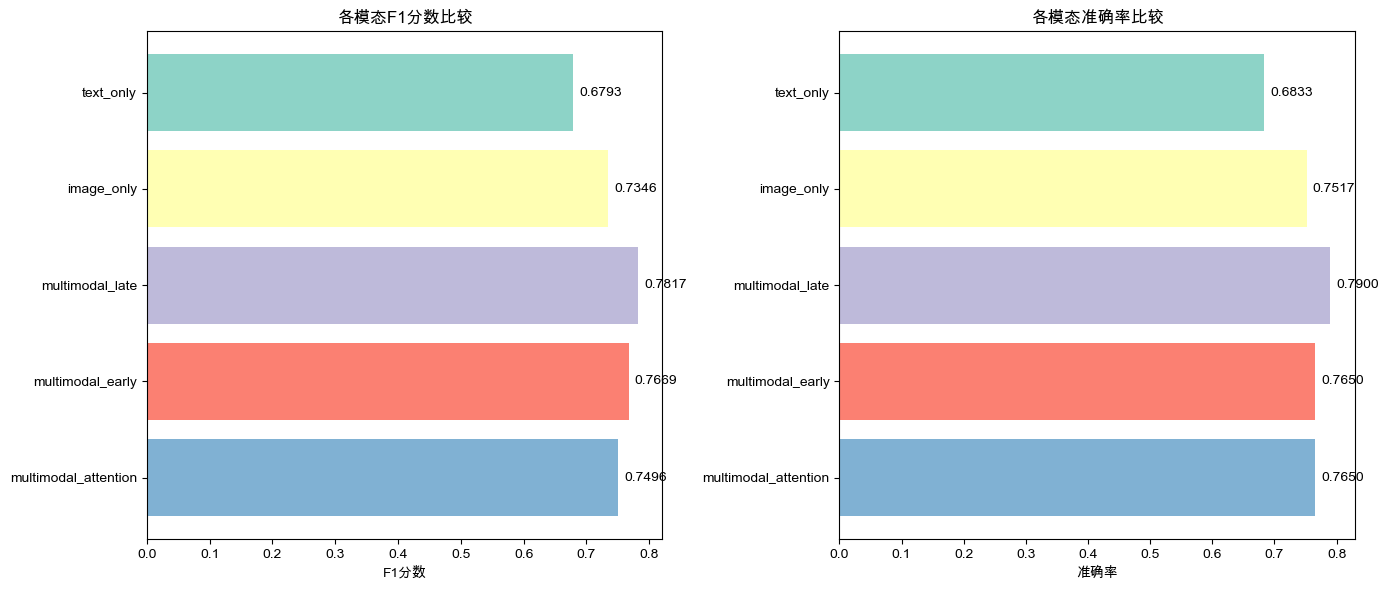

📈 消融实验结果图已保存至: /Users/creator/Desktop/project5/ablation_study_results.png


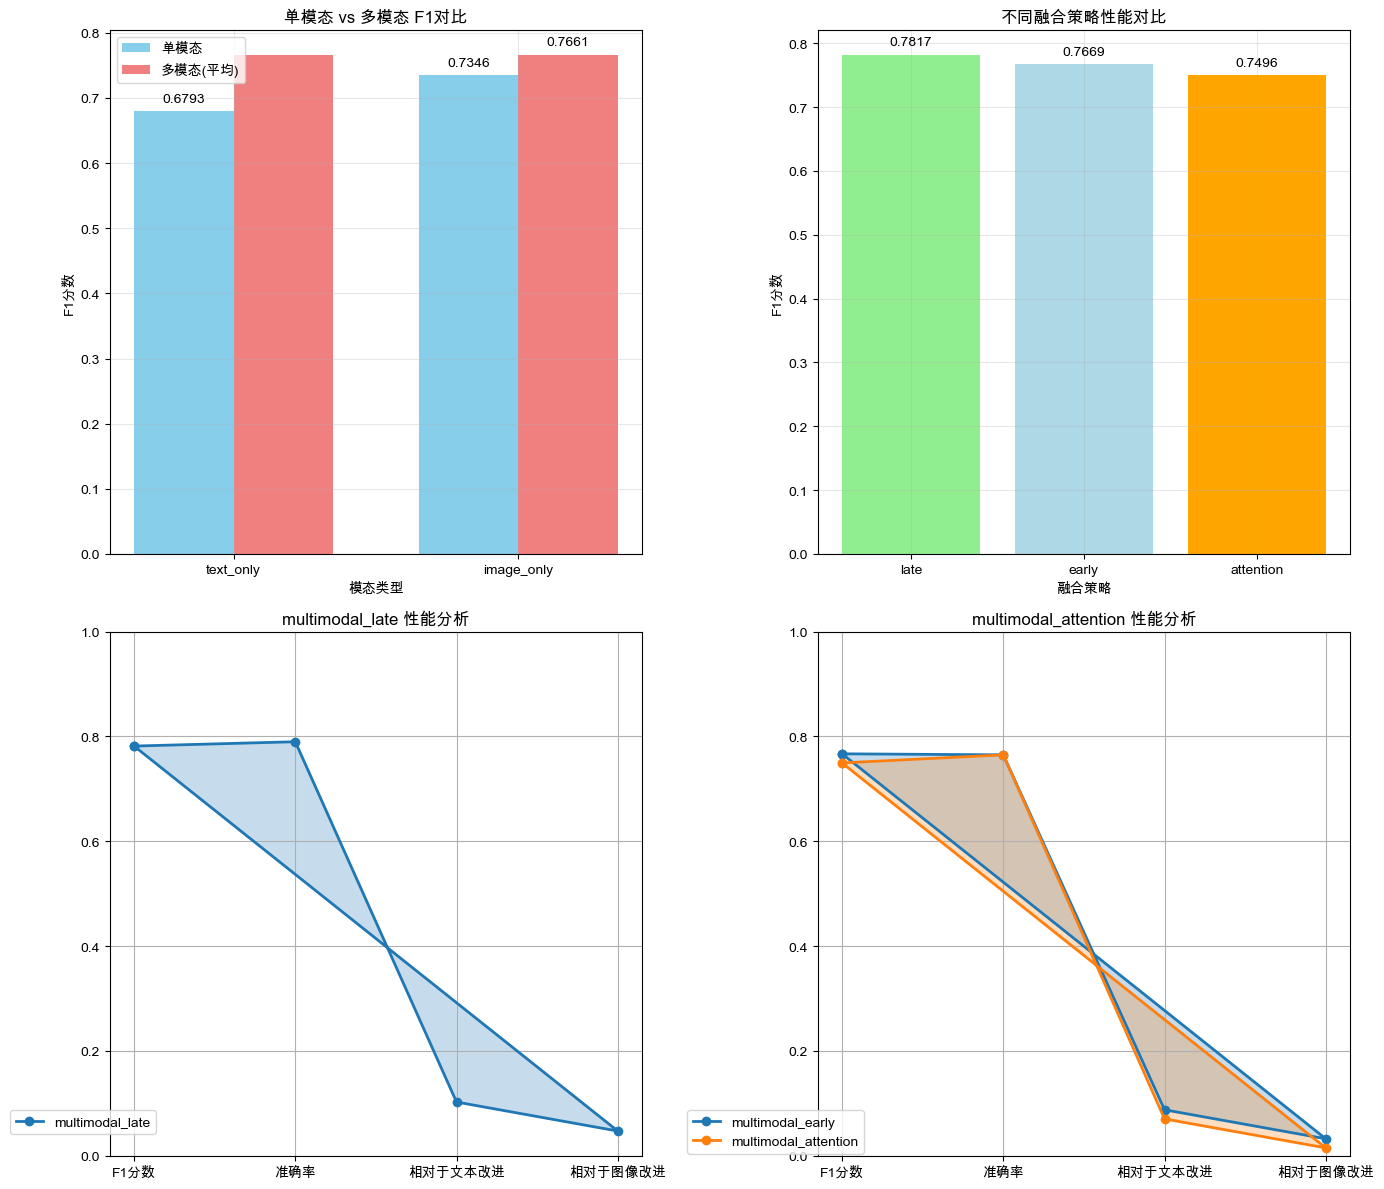

📈 详细对比图已保存至: /Users/creator/Desktop/project5/ablation_detailed_comparison.png
✅ 实验结果已保存:
  JSON文件: /Users/creator/Desktop/project5/ablation_study_results.json
  CSV文件: /Users/creator/Desktop/project5/ablation_study_results.csv

🎉 消融实验完成！

📋 实验总结:
  🏆 最佳配置: multimodal_late
     验证F1: 0.7817
     验证准确率: 0.7900

💡 模型选择建议:
  - 图像模态表现优于文本模态 (0.7346 vs 0.6793)
  - 多模态融合有明显优势，提升0.0471


In [19]:
# ablation_study_multimodal_fusion.py
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel, get_cosine_schedule_with_warmup
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import json
import torchvision.transforms as transforms
import re
import random
import hashlib
from typing import Dict, List, Tuple, Any, Optional
from dataclasses import dataclass
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

# 设置路径
BASE_PATH = "/Users/creator/Desktop/project5"
DATA_PATH = os.path.join(BASE_PATH, "data")
TRAIN_FILE = os.path.join(BASE_PATH, "train.txt")
TEST_FILE = os.path.join(BASE_PATH, "test_without_label.txt")

# ==================== 设备设置 ====================
def setup_device():
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("🎮 使用Apple Silicon GPU (MPS)")
    elif torch.cuda.is_available():
        device = torch.device("cuda")
        print("🎮 使用NVIDIA GPU (CUDA)")
    else:
        device = torch.device("cpu")
        print("⚠️  使用CPU")
    return device

device = setup_device()

# ==================== 1. 数据清洗器 ====================
class DataCleaner:
    """系统化的文本清洗器"""
    
    @staticmethod
    def clean_text(text: str, max_length: int = 512) -> str:
        if not isinstance(text, str):
            return "[EMPTY]"
        
        if not text.strip():
            return "[EMPTY]"
        
        # 保留情感相关的标点（!?.,）
        text = re.sub(r'[^\w\s!?.,\'"-]', ' ', text)
        text = ' '.join(text.split())
        
        if len(text) > max_length:
            text = text[:max_length]
            last_space = text.rfind(' ')
            if last_space > max_length * 0.8:
                text = text[:last_space]
        
        return text.strip()

# ==================== 2. 数据集类 ====================
class MultimodalDataset(Dataset):
    """多模态数据集，支持文本、图像和双模态"""
    
    def __init__(self, df, data_path, image_size=224, mode='train', 
                 augmentation=False, modality='multimodal'):  # 新增modality参数
        self.df = df.copy()
        self.data_path = data_path
        self.mode = mode
        self.image_size = image_size
        self.augmentation = augmentation and mode == 'train'
        self.modality = modality  # 'text_only', 'image_only', 'multimodal'
        
        # 数据清洗器
        self.cleaner = DataCleaner()
        
        # 修复guid格式
        if 'guid' in self.df.columns:
            self.df['guid'] = self.df['guid'].astype(str).str.split('.').str[0]
        
        # 标签编码
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {v: k for k, v in self.label_map.items()}
        
        # 图像变换
        self.setup_transforms()
        
        print(f"📝 准备{mode}数据集 ({modality}模式)...")
    
    def setup_transforms(self):
        """设置图像变换"""
        if self.mode == 'train':
            self.base_transform = transforms.Compose([
                transforms.Resize((self.image_size + 16, self.image_size + 16)),
                transforms.RandomCrop(self.image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
        else:
            self.base_transform = transforms.Compose([
                transforms.Resize((self.image_size, self.image_size)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                                   std=[0.26862954, 0.26130258, 0.27577711])
            ])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        guid = self.df.iloc[idx]['guid']
        
        # 文本特征
        text = "[EMPTY]"
        if self.modality in ['text_only', 'multimodal']:
            text_path = os.path.join(self.data_path, f"{guid}.txt")
            try:
                with open(text_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read().strip()
                    text = self.cleaner.clean_text(text, max_length=200)
            except:
                text = "[EMPTY]"
        
        # 图像特征
        image = torch.zeros((3, self.image_size, self.image_size))
        if self.modality in ['image_only', 'multimodal']:
            image_path = os.path.join(self.data_path, f"{guid}.jpg")
            try:
                img = Image.open(image_path).convert('RGB')
                image = self.base_transform(img)
            except Exception as e:
                # 创建默认图像
                image[0, :, :] = 0.48145466
                image[1, :, :] = 0.4578275
                image[2, :, :] = 0.40821073
        
        # 获取标签
        if 'tag' in self.df.columns and self.df.iloc[idx]['tag'] in self.label_map:
            label_name = self.df.iloc[idx]['tag']
            label = self.label_map[label_name]
            label_tensor = torch.tensor(label, dtype=torch.long)
        else:
            label_tensor = torch.tensor(-1, dtype=torch.long)
        
        return {
            'text': text,
            'image': image,
            'label': label_tensor,
            'guid': guid,
            'modality': self.modality
        }

# ==================== 3. 消融实验模型 ====================
class AblationStudyModel(nn.Module):
    """消融实验模型，支持单模态和多模态"""
    
    def __init__(self, clip_model, clip_processor, num_labels=3, 
                 modality='multimodal', fusion_strategy='late'):
        super().__init__()
        
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        self.modality = modality  # 'text_only', 'image_only', 'multimodal'
        self.fusion_strategy = fusion_strategy
        
        # 标签映射
        self.label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
        self.inverse_label_map = {v: k for k, v in self.label_map.items()}
        
        # 完全冻结CLIP编码器
        for param in clip_model.parameters():
            param.requires_grad = False
        
        # 获取CLIP特征维度
        self.text_dim = clip_model.text_model.config.hidden_size  # 512
        self.image_dim = clip_model.vision_model.config.hidden_size  # 768
        
        print(f"📊 创建{modality}模型")
        print(f"  CLIP特征维度: 文本={self.text_dim}, 图像={self.image_dim}")
        
        # 根据模态类型设置投影层
        if modality == 'text_only':
            # 仅文本模型
            self.text_projection = nn.Sequential(
                nn.Linear(self.text_dim, 512),
                nn.LayerNorm(512),
                nn.ReLU(),
                nn.Dropout(0.3),
            )
            
            self.classifier = nn.Sequential(
                nn.Linear(512, 256),
                nn.LayerNorm(256),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.Linear(256, num_labels)
            )
            
        elif modality == 'image_only':
            # 仅图像模型
            self.image_projection = nn.Sequential(
                nn.Linear(self.image_dim, 512),
                nn.LayerNorm(512),
                nn.ReLU(),
                nn.Dropout(0.3),
            )
            
            self.classifier = nn.Sequential(
                nn.Linear(512, 256),
                nn.LayerNorm(256),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.Linear(256, num_labels)
            )
            
        else:  # multimodal
            # 多模态模型
            self.text_projection = nn.Sequential(
                nn.Linear(self.text_dim, 512),
                nn.LayerNorm(512),
                nn.ReLU(),
                nn.Dropout(0.3),
            )
            
            self.image_projection = nn.Sequential(
                nn.Linear(self.image_dim, 512),
                nn.LayerNorm(512),
                nn.ReLU(),
                nn.Dropout(0.3),
            )
            
            # 融合策略
            if fusion_strategy == 'late':
                classifier_input_dim = 1024  # 512 + 512
            elif fusion_strategy == 'early':
                classifier_input_dim = 512
            elif fusion_strategy == 'attention':
                classifier_input_dim = 512
            
            self.classifier = nn.Sequential(
                nn.Linear(classifier_input_dim, 512),
                nn.LayerNorm(512),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(512, 256),
                nn.LayerNorm(256),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.Linear(256, num_labels)
            )
            
            # 融合模块
            self.fusion_strategy = fusion_strategy
    
    def encode_text(self, texts):
        """编码文本"""
        if not texts:
            return torch.zeros((0, self.text_dim), device=device)
        
        text_inputs = self.clip_processor(
            text=texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=77,
            return_attention_mask=True
        ).to(device)
        
        with torch.no_grad():
            text_outputs = self.clip_model.text_model(**text_inputs)
        
        # 取平均池化
        attention_mask = text_inputs['attention_mask']
        last_hidden_state = text_outputs.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
        sum_mask = input_mask_expanded.sum(1)
        sum_mask = torch.clamp(sum_mask, min=1e-9)
        text_features = sum_embeddings / sum_mask
        
        return text_features
    
    def encode_image(self, images):
        """编码图像"""
        if images.size(0) == 0:
            return torch.zeros((0, self.image_dim), device=device)
        
        if images.dtype != torch.float32:
            images = images.to(torch.float32)
        
        with torch.no_grad():
            image_outputs = self.clip_model.vision_model(pixel_values=images)
            image_features = image_outputs.last_hidden_state[:, 0, :]
        
        return image_features
    
    def late_fusion(self, text_features, image_features):
        """Late Fusion: 拼接特征"""
        return torch.cat([text_features, image_features], dim=-1)
    
    def early_fusion(self, text_features, image_features):
        """Early Fusion: 特征相加"""
        # 调整维度使其匹配
        if text_features.size(1) != image_features.size(1):
            text_features = nn.Linear(text_features.size(1), image_features.size(1)).to(device)(text_features)
        return text_features + image_features
    
    def attention_fusion(self, text_features, image_features):
        """Attention Fusion: 注意力机制融合"""
        # 简单的注意力融合
        combined = torch.cat([text_features.unsqueeze(1), image_features.unsqueeze(1)], dim=1)
        
        # 计算注意力权重
        attention_weights = torch.softmax(
            torch.bmm(combined, combined.transpose(1, 2)).mean(dim=-1),
            dim=-1
        )
        
        # 加权融合
        fused = (attention_weights.unsqueeze(-1) * combined).sum(dim=1)
        return fused
    
    def forward(self, texts, images):
        if self.modality == 'text_only':
            # 仅文本
            text_features = self.encode_text(texts)
            text_proj = self.text_projection(text_features)
            logits = self.classifier(text_proj)
            
        elif self.modality == 'image_only':
            # 仅图像
            image_features = self.encode_image(images)
            image_proj = self.image_projection(image_features)
            logits = self.classifier(image_proj)
            
        else:  # multimodal
            # 多模态
            text_features = self.encode_text(texts)
            image_features = self.encode_image(images)
            
            text_proj = self.text_projection(text_features)
            image_proj = self.image_projection(image_features)
            
            # 融合
            if self.fusion_strategy == 'late':
                fused_features = self.late_fusion(text_proj, image_proj)
            elif self.fusion_strategy == 'early':
                fused_features = self.early_fusion(text_proj, image_proj)
            elif self.fusion_strategy == 'attention':
                fused_features = self.attention_fusion(text_proj, image_proj)
            else:
                fused_features = self.late_fusion(text_proj, image_proj)
            
            logits = self.classifier(fused_features)
        
        return logits

# ==================== 4. 训练器 ====================
class AblationTrainer:
    """消融实验训练器"""
    
    def __init__(self, model, train_loader, val_loader, config):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.config = config
        
        # 损失函数
        self.criterion = nn.CrossEntropyLoss()
        
        # 优化器
        self.optimizer = optim.AdamW(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=config.learning_rate,
            weight_decay=config.weight_decay,
            betas=(0.9, 0.999)
        )
        
        # 学习率调度器
        self.scheduler = get_cosine_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=len(train_loader) * 2,
            num_training_steps=len(train_loader) * config.num_epochs
        )
        
        # 训练历史
        self.train_history = {'loss': [], 'f1': [], 'acc': []}
        self.val_history = {'f1': [], 'acc': []}
        self.best_val_f1 = 0
        self.best_val_acc = 0
    
    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        all_preds = []
        all_labels = []
        
        progress_bar = tqdm(self.train_loader, desc=f"训练 Epoch {epoch}")
        for batch in progress_bar:
            texts = batch['text']
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            
            if images.dtype != torch.float32:
                images = images.to(torch.float32)
            
            self.optimizer.zero_grad()
            
            logits = self.model(texts, images)
            loss = self.criterion(logits, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            self.scheduler.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            progress_bar.set_postfix({
                'loss': loss.item(),
                'lr': self.scheduler.get_last_lr()[0]
            })
        
        # 计算指标
        train_f1 = f1_score(all_labels, all_preds, average='weighted')
        train_acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.train_loader)
        
        self.train_history['loss'].append(avg_loss)
        self.train_history['f1'].append(train_f1)
        self.train_history['acc'].append(train_acc)
        
        return avg_loss, train_f1, train_acc
    
    def validate(self, epoch):
        self.model.eval()
        all_preds = []
        all_labels = []
        all_probs = []
        
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc=f"验证 Epoch {epoch}"):
                texts = batch['text']
                images = batch['image'].to(device)
                labels = batch['label'].to(device)
                
                if images.dtype != torch.float32:
                    images = images.to(torch.float32)
                
                logits = self.model(texts, images)
                probs = torch.softmax(logits, dim=1)
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_acc = accuracy_score(all_labels, all_preds)
        
        self.val_history['f1'].append(val_f1)
        self.val_history['acc'].append(val_acc)
        
        print(f"\n📋 验证集分类报告 (Epoch {epoch}):")
        print(classification_report(all_labels, all_preds, 
                                  target_names=['positive', 'neutral', 'negative'],
                                  digits=4))
        
        # 更新最佳指标
        if val_f1 > self.best_val_f1:
            self.best_val_f1 = val_f1
            self.best_val_acc = val_acc
        
        return val_f1, val_acc, all_probs
    
    def train(self):
        print(f"🚀 开始训练，共{self.config.num_epochs}个epoch")
        
        for epoch in range(1, self.config.num_epochs + 1):
            print(f"\n{'='*60}")
            print(f"Epoch {epoch}/{self.config.num_epochs}")
            print(f"{'='*60}")
            
            # 训练
            train_loss, train_f1, train_acc = self.train_epoch(epoch)
            print(f"📊 训练集 - Loss: {train_loss:.4f}, F1: {train_f1:.4f}, Acc: {train_acc:.4f}")
            
            # 验证
            val_f1, val_acc, _ = self.validate(epoch)
            print(f"📊 验证集 - F1: {val_f1:.4f}, Acc: {val_acc:.4f}")
        
        print(f"\n✅ 训练完成！最佳验证F1: {self.best_val_f1:.4f}, Acc: {self.best_val_acc:.4f}")
        
        return self.model, self.best_val_f1, self.best_val_acc

# ==================== 5. 实验配置 ====================
@dataclass
class ExperimentConfig:
    """实验配置类"""
    # 基础配置
    model_name: str = "openai/clip-vit-base-patch32"
    image_size: int = 224
    batch_size: int = 16
    
    # 训练配置
    learning_rate: float = 5e-4
    num_epochs: int = 10  # 消融实验用较少的epoch
    dropout_rate: float = 0.3
    weight_decay: float = 0.01
    
    # 融合策略（仅多模态使用）
    fusion_strategy: str = 'late'
    
    # 数据配置
    validation_split: float = 0.15
    random_seed: int = 42
    
    def __post_init__(self):
        config_hash = hashlib.md5(str(self.__dict__).encode()).hexdigest()[:8]
        self.experiment_id = f"exp_{config_hash}"
    
    def print_summary(self):
        """打印配置摘要"""
        print("="*60)
        print("🔬 实验配置")
        print("="*60)
        for key, value in self.__dict__.items():
            if key != 'experiment_id':
                print(f"  {key:20}: {value}")
        print("="*60)

# ==================== 6. 消融实验运行器 ====================
class AblationStudyRunner:
    """消融实验运行器"""
    
    def __init__(self):
        self.results = {}
    
    def run_single_experiment(self, modality: str, fusion_strategy: str = 'late'):
        """运行单个消融实验"""
        print(f"\n{'='*80}")
        print(f"🚀 开始{modality}消融实验")
        if modality == 'multimodal':
            print(f"  融合策略: {fusion_strategy}")
        print(f"{'='*80}")
        
        # 配置
        config = ExperimentConfig(
            model_name="openai/clip-vit-base-patch32",
            image_size=224,
            batch_size=16,
            learning_rate=5e-4,
            num_epochs=10,
            dropout_rate=0.3,
            weight_decay=0.01,
            fusion_strategy=fusion_strategy,
            validation_split=0.15,
            random_seed=42
        )
        
        # 加载CLIP模型
        print(f"\n1️⃣ 加载CLIP模型...")
        try:
            clip_model = CLIPModel.from_pretrained(config.model_name)
            clip_processor = CLIPProcessor.from_pretrained(config.model_name)
            clip_model = clip_model.to(device)
            print(f"✅ CLIP模型加载成功")
        except Exception as e:
            print(f"❌ CLIP模型加载失败: {e}")
            return None
        
        # 加载数据
        print(f"\n2️⃣ 加载数据...")
        train_df = pd.read_csv(TRAIN_FILE, sep=',')
        print(f"训练集: {len(train_df)} 样本")
        
        # 划分数据集
        print(f"\n3️⃣ 划分训练集和验证集...")
        train_data, val_data = train_test_split(
            train_df, 
            test_size=config.validation_split,
            random_state=config.random_seed, 
            stratify=train_df['tag']
        )
        
        print(f"训练集: {len(train_data)}")
        print(f"验证集: {len(val_data)}")
        
        # 创建数据集
        print(f"\n4️⃣ 创建{modality}数据集...")
        train_dataset = MultimodalDataset(
            train_data, DATA_PATH, 
            image_size=config.image_size, 
            mode='train',
            augmentation=True,
            modality=modality
        )
        
        val_dataset = MultimodalDataset(
            val_data, DATA_PATH, 
            image_size=config.image_size, 
            mode='val',
            augmentation=False,
            modality=modality
        )
        
        # 创建数据加载器
        print(f"\n5️⃣ 创建数据加载器...")
        train_loader = DataLoader(
            train_dataset, 
            batch_size=config.batch_size, 
            shuffle=True,
            num_workers=0,
            pin_memory=True,
            drop_last=True
        )
        
        val_loader = DataLoader(
            val_dataset, 
            batch_size=config.batch_size, 
            shuffle=False, 
            num_workers=0
        )
        
        print(f"训练批次: {len(train_loader)}")
        print(f"验证批次: {len(val_loader)}")
        
        # 创建模型
        print(f"\n6️⃣ 创建{modality}模型...")
        model = AblationStudyModel(
            clip_model=clip_model,
            clip_processor=clip_processor,
            num_labels=3,
            modality=modality,
            fusion_strategy=fusion_strategy
        )
        
        # 训练
        print(f"\n7️⃣ 训练{modality}模型...")
        trainer = AblationTrainer(
            model, 
            train_loader, 
            val_loader, 
            config
        )
        
        trained_model, best_f1, best_acc = trainer.train()
        
        # 记录结果
        result_key = f"{modality}"
        if modality == 'multimodal':
            result_key += f"_{fusion_strategy}"
        
        self.results[result_key] = {
            'modality': modality,
            'fusion_strategy': fusion_strategy if modality == 'multimodal' else 'N/A',
            'best_val_f1': best_f1,
            'best_val_acc': best_acc,
            'train_samples': len(train_data),
            'val_samples': len(val_data)
        }
        
        print(f"\n✅ {modality}实验完成!")
        print(f"   最佳验证F1: {best_f1:.4f}")
        print(f"   最佳验证准确率: {best_acc:.4f}")
        
        return trained_model, best_f1, best_acc
    
    def run_all_experiments(self):
        """运行所有消融实验"""
        print("="*100)
        print("🧪 多模态情感分类消融实验")
        print("="*100)
        
        # 运行所有模态的实验
        modalities = ['text_only', 'image_only', 'multimodal']
        
        for modality in modalities:
            if modality == 'multimodal':
                # 多模态测试不同融合策略
                fusion_strategies = ['late', 'early', 'attention']
                for fusion_strategy in fusion_strategies:
                    self.run_single_experiment(modality, fusion_strategy)
            else:
                self.run_single_experiment(modality)
        
        # 分析结果
        self.analyze_results()
        
        # 可视化结果
        self.visualize_results()
        
        # 保存结果
        self.save_results()
        
        return self.results
    
    def analyze_results(self):
        """分析消融实验结果"""
        print(f"\n{'='*80}")
        print(f"📊 消融实验结果分析")
        print(f"{'='*80}")
        
        print(f"\n{'实验类型':20} {'融合策略':15} {'验证F1':12} {'验证准确率':12} {'训练样本':12} {'验证样本':12}")
        print(f"{'-'*90}")
        
        for exp_name, result in self.results.items():
            print(f"{result['modality']:20} {result['fusion_strategy']:15} "
                  f"{result['best_val_f1']:.4f}      {result['best_val_acc']:.4f}      "
                  f"{result['train_samples']:12} {result['val_samples']:12}")
        
        # 找出最佳配置
        best_f1 = 0
        best_config = None
        
        for exp_name, result in self.results.items():
            if result['best_val_f1'] > best_f1:
                best_f1 = result['best_val_f1']
                best_config = exp_name
        
        print(f"\n🏆 最佳配置: {best_config}")
        print(f"   最佳验证F1: {best_f1:.4f}")
        
        # 计算多模态相对于单模态的改进
        text_f1 = self.results.get('text_only', {}).get('best_val_f1', 0)
        image_f1 = self.results.get('image_only', {}).get('best_val_f1', 0)
        
        print(f"\n📈 相对于单模态的改进:")
        print(f"  文本单模态F1: {text_f1:.4f}")
        print(f"  图像单模态F1: {image_f1:.4f}")
        
        for exp_name, result in self.results.items():
            if 'multimodal' in exp_name:
                improvement_vs_text = result['best_val_f1'] - text_f1
                improvement_vs_image = result['best_val_f1'] - image_f1
                
                print(f"\n  {exp_name}:")
                print(f"    相对于文本单模态改进: {improvement_vs_text:.4f} ({improvement_vs_text/text_f1*100:.1f}%)")
                print(f"    相对于图像单模态改进: {improvement_vs_image:.4f} ({improvement_vs_image/image_f1*100:.1f}%)")
    
    def visualize_results(self):
        """可视化结果"""
        if not self.results:
            print("⚠️ 没有实验结果可供可视化")
            return
        
        # 准备数据
        exp_names = list(self.results.keys())
        f1_scores = [self.results[name]['best_val_f1'] for name in exp_names]
        acc_scores = [self.results[name]['best_val_acc'] for name in exp_names]
        
        # 创建图表
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # F1分数比较
        colors = plt.cm.Set3(np.arange(len(exp_names)))
        bars1 = axes[0].barh(range(len(exp_names)), f1_scores, color=colors)
        axes[0].set_xlabel('F1分数')
        axes[0].set_title('各模态F1分数比较')
        axes[0].set_yticks(range(len(exp_names)))
        axes[0].set_yticklabels(exp_names)
        axes[0].invert_yaxis()
        
        # 在条形上添加数值
        for i, bar in enumerate(bars1):
            axes[0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                        f'{bar.get_width():.4f}', ha='left', va='center', fontsize=10)
        
        # 准确率比较
        bars2 = axes[1].barh(range(len(exp_names)), acc_scores, color=colors)
        axes[1].set_xlabel('准确率')
        axes[1].set_title('各模态准确率比较')
        axes[1].set_yticks(range(len(exp_names)))
        axes[1].set_yticklabels(exp_names)
        axes[1].invert_yaxis()
        
        # 在条形上添加数值
        for i, bar in enumerate(bars2):
            axes[1].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                        f'{bar.get_width():.4f}', ha='left', va='center', fontsize=10)
        
        plt.tight_layout()
        plot_path = os.path.join(BASE_PATH, 'ablation_study_results.png')
        plt.savefig(plot_path, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"📈 消融实验结果图已保存至: {plot_path}")
        
        # 创建详细对比图
        self._create_detailed_comparison_chart()
    
    def _create_detailed_comparison_chart(self):
        """创建详细对比图表"""
        fig, axes = plt.subplots(2, 2, figsize=(14, 12))
        
        # 数据准备
        modalities = ['text_only', 'image_only']
        multimodal_exps = [k for k in self.results.keys() if 'multimodal' in k]
        
        # 1. 单模态 vs 多模态F1对比
        single_f1 = [self.results[m]['best_val_f1'] for m in modalities if m in self.results]
        multimodal_f1 = [self.results[m]['best_val_f1'] for m in multimodal_exps]
        
        x = np.arange(len(modalities))
        width = 0.35
        
        axes[0, 0].bar(x - width/2, single_f1, width, label='单模态', color='skyblue')
        axes[0, 0].bar(x + width/2, [np.mean(multimodal_f1)] * len(modalities), width, 
                      label='多模态(平均)', color='lightcoral')
        axes[0, 0].set_xlabel('模态类型')
        axes[0, 0].set_ylabel('F1分数')
        axes[0, 0].set_title('单模态 vs 多模态 F1对比')
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels(modalities)
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 在条形上添加数值
        for i, v in enumerate(single_f1):
            axes[0, 0].text(i - width/2, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
        axes[0, 0].text(len(modalities)-1 + width/2, np.mean(multimodal_f1) + 0.01, 
                       f'{np.mean(multimodal_f1):.4f}', ha='center', va='bottom')
        
        # 2. 不同融合策略对比
        if multimodal_exps:
            fusion_names = [exp.replace('multimodal_', '') for exp in multimodal_exps]
            fusion_f1 = [self.results[exp]['best_val_f1'] for exp in multimodal_exps]
            
            axes[0, 1].bar(fusion_names, fusion_f1, color=['lightgreen', 'lightblue', 'orange'])
            axes[0, 1].set_xlabel('融合策略')
            axes[0, 1].set_ylabel('F1分数')
            axes[0, 1].set_title('不同融合策略性能对比')
            axes[0, 1].grid(True, alpha=0.3)
            
            # 在条形上添加数值
            for i, v in enumerate(fusion_f1):
                axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
        
        # 3. 性能改进雷达图
        if 'text_only' in self.results and 'image_only' in self.results:
            text_f1 = self.results['text_only']['best_val_f1']
            image_f1 = self.results['image_only']['best_val_f1']
            
            categories = ['F1分数', '准确率', '相对于文本改进', '相对于图像改进']
            N = len(categories)
            
            for exp_name in multimodal_exps:
                exp_result = self.results[exp_name]
                values = [
                    exp_result['best_val_f1'],
                    exp_result['best_val_acc'],
                    exp_result['best_val_f1'] - text_f1,
                    exp_result['best_val_f1'] - image_f1
                ]
                
                # 标准化到0-1范围
                max_val = max(max(values), 1.0)
                values = [v/max_val for v in values]
                
                angles = [n / float(N) * 2 * np.pi for n in range(N)]
                values += values[:1]
                angles += angles[:1]
                
                ax = axes[1, 0] if multimodal_exps.index(exp_name) == 0 else axes[1, 1]
                ax.plot(angles, values, 'o-', linewidth=2, label=exp_name)
                ax.fill(angles, values, alpha=0.25)
                ax.set_xticks(angles[:-1])
                ax.set_xticklabels(categories)
                ax.set_ylim(0, 1)
                ax.set_title(f'{exp_name} 性能分析')
                ax.grid(True)
                ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
        plt.tight_layout()
        detailed_plot_path = os.path.join(BASE_PATH, 'ablation_detailed_comparison.png')
        plt.savefig(detailed_plot_path, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"📈 详细对比图已保存至: {detailed_plot_path}")
    
    def save_results(self):
        """保存结果到文件"""
        if not self.results:
            print("⚠️ 没有实验结果可供保存")
            return
        
        # 保存为JSON
        results_file = os.path.join(BASE_PATH, 'ablation_study_results.json')
        with open(results_file, 'w') as f:
            json.dump(self.results, f, indent=2, default=str)
        
        # 保存为CSV
        csv_data = []
        for exp_name, result in self.results.items():
            csv_data.append({
                'experiment': exp_name,
                'modality': result['modality'],
                'fusion_strategy': result['fusion_strategy'],
                'best_val_f1': result['best_val_f1'],
                'best_val_acc': result['best_val_acc'],
                'train_samples': result['train_samples'],
                'val_samples': result['val_samples']
            })
        
        csv_df = pd.DataFrame(csv_data)
        csv_file = os.path.join(BASE_PATH, 'ablation_study_results.csv')
        csv_df.to_csv(csv_file, index=False)
        
        print(f"✅ 实验结果已保存:")
        print(f"  JSON文件: {results_file}")
        print(f"  CSV文件: {csv_file}")

# ==================== 7. 主函数 ====================
def main():
    """主函数 - 运行消融实验"""
    print("="*100)
    print("🧪 多模态情感分类消融实验系统")
    print("="*100)
    
    print("\n🔬 实验目标:")
    print("  1. 文本单模态 (text_only)")
    print("  2. 图像单模态 (image_only)")
    print("  3. 多模态融合 (multimodal)")
    print("      - Late Fusion (特征拼接)")
    print("      - Early Fusion (特征相加)")
    print("      - Attention Fusion (注意力融合)")
    
    print("\n📊 预期分析:")
    print("  - 对比不同模态的性能差异")
    print("  - 分析多模态融合的优势")
    print("  - 比较不同融合策略的效果")
    
    # 运行消融实验
    runner = AblationStudyRunner()
    results = runner.run_all_experiments()
    
    print(f"\n{'='*100}")
    print("🎉 消融实验完成！")
    print(f"{'='*100}")
    
    # 总结
    if results:
        print("\n📋 实验总结:")
        
        # 找出最佳配置
        best_f1 = 0
        best_exp = None
        
        for exp_name, result in results.items():
            if result['best_val_f1'] > best_f1:
                best_f1 = result['best_val_f1']
                best_exp = exp_name
        
        print(f"  🏆 最佳配置: {best_exp}")
        print(f"     验证F1: {best_f1:.4f}")
        print(f"     验证准确率: {results[best_exp]['best_val_acc']:.4f}")
        
        # 给出建议
        print(f"\n💡 模型选择建议:")
        if 'text_only' in results and 'image_only' in results:
            text_f1 = results['text_only']['best_val_f1']
            image_f1 = results['image_only']['best_val_f1']
            
            if text_f1 > image_f1:
                print(f"  - 文本模态表现优于图像模态 ({text_f1:.4f} vs {image_f1:.4f})")
            else:
                print(f"  - 图像模态表现优于文本模态 ({image_f1:.4f} vs {text_f1:.4f})")
            
            # 检查多模态是否优于单模态
            multimodal_exps = [k for k in results.keys() if 'multimodal' in k]
            best_multimodal_f1 = max([results[exp]['best_val_f1'] for exp in multimodal_exps])
            
            if best_multimodal_f1 > max(text_f1, image_f1):
                improvement = best_multimodal_f1 - max(text_f1, image_f1)
                print(f"  - 多模态融合有明显优势，提升{improvement:.4f}")
            else:
                print(f"  - 多模态融合未显示明显优势")

# ==================== 8. 主执行 ====================
if __name__ == "__main__":
    print("="*100)
    print("🧪 多模态情感分类消融实验")
    print("="*100)
    
    try:
        # 测试CLIP
        print("\n🔍 第一步：测试CLIP嵌入...")
        try:
            model_name = "openai/clip-vit-base-patch32"
            clip_model = CLIPModel.from_pretrained(model_name)
            clip_processor = CLIPProcessor.from_pretrained(model_name)
            clip_model = clip_model.to(device)
            print("✅ CLIP测试通过")
            
            # 开始消融实验
            main()
            
        except Exception as e:
            print(f"❌ CLIP测试失败: {e}")
            import traceback
            traceback.print_exc()
    
    except Exception as e:
        print(f"\n❌ 运行过程中发生错误: {e}")
        import traceback
        traceback.print_exc()